### "RQs" for analyzing URLs/domain names used for fetching video chunks:
##### Does the same domain name always resolve to the same IP address on a single vantage point?
- most subdomains map to one IP address
- on US West, 4 domain names map to two different IP addresses during the course of the measurement, however these  "alternate" addresses are only seen once for three of the subdomains and twice for the remaining one

##### When does the domain and/or IP address change? 
- the subdomain seems video ID specific, no clear pattern when it changes for a video itself but it seems to be ~ 40%-50% (depending on vantage point) chance for it to change between runs of the same video ID
- for south africa there appears to be a pattern based on time, where we have periods where pretty much every run uses a different subdomain
- for south africa there are a lot more subdomain changes during a measurement run
- the "sn" part appers to change a lot more frequently than the "rr" part across vantage points

##### Is there overlap in the CNAMEs within the domains used by a vantage point?
- no clear pattern based on IP address ranges when looking at "sn" part of the subdomain label; there is some overlap within a /24 sometimes but not always
- rr part stays relatively consistent, mostly 2 or 1 rr number (rr1, rr2) for a single sn (except for Japan where we find rr6)
- all vantage points strip the first r for some of the subdomains
    - 60858 measurements have a subdomain that starts with rr while only 101 start with a single r
        - (Asia Pacific Southeast    32, South America East        20, Europe Central            16, Africa South              15, US East                    8, Asia Pacific Northeast     5, US West                    5)
    - 27 unique subdomains start with "r", 66 start with "rr"
    - unique subdomain count with "r" per vantage point:
        - Europe Central               9
        - Africa South               5
        - Asia Pacific Southeast               5
        - South America East               5
        - US East               4
        - Asia Pacific Northeast               3
        - US West               3
    - all subdomains starting with "r" have a corresponding "rr" domain, and the "r" domain is only seen after the "rr" one
    - the change to "r" never happens within a run, only between measurements

##### Which googlevideo domain is used on which vantage point and with which IP address?
- the 4 domain names that map to two different IP addresses on US West do not appear on other vantage points
- 93 domain names total
    - 77 domain names only occur on one vantage point, except for the 4 above, they all map to one IP address
    - 16 are found on two vantage points
- 67 IP addresses total
    - 51 IP addresses are only resolved on a single vantage point
    - 16 are resolved on two vantage points
       
- 81 domain+IP combinations are only seen on a single vantage point (57 unique IP addresses, 77 unique domain names)
    - 48 domain names are pairs that resolve to the same ip address (24 combinations), 21 combinations just have an "r" removed at the start of the domain name
        - the 3 remaining ones are on US West (subset of the domains that resolve to two different IP addresses):
            - rr2---sn-a5mekn6d.googlevideo.com.->173.194.8.199: 19
            - rr2---sn-o097znsr.googlevideo.com.->173.194.8.199: 1
            - 
            - rr4---sn-o097znse.googlevideo.com.->173.194.8.105: 1
            - rr4---sn-a5mekn6l.googlevideo.com.->173.194.8.105: 20
            - 
            - rr2---sn-o097znsr.googlevideo.com.->173.194.8.7: 2782
            - rr2---sn-n4v7sney.googlevideo.com.->173.194.8.7: 2
    - 6 of them are a subset of the 16 seen on two vantage points where the "rr" changes to "r" on only one vantage point
    - sanity check for numbers:
        - domain name count ==> 81 combinations - 4 US West domain names that map to diff IPs = 77 domain names
        - unique IPs count => 81 - 24 where two domain names point to it = 57 IP addresses
        - 57 IPs seen uniquely here - 6 that are also part of the 16 below = 51 IP addresses that are only seen on one vantage point
- 16 domain+IP combinations are seen on two vantage points (one to one mapping)
    - the mapping here is unique, every domain name corresponds to one IP

##### Overlap between vantage points, if domain names overlap, do IP addresses as well (and vice versa)?
- never three or more vantage points, only sharing between pairs -> probably based on geographical location of vantage point (AWS IPs seeem to geo-locate correctly with maxmind)
- South America East, US East:                       8 domains shared
- Africa South, Europe Central:                      5 domains shared
- Asia Pacific Northeast, Asia Pacific Southeast:    3 domains shared
- they resolve to the same IP address on both vantage points

###### redirector.googlevideo.com
- used by all vantage points
- a lot less occurences in resource timings than dnsproxy, but still visible sometimes
    - resource timings are missing the first few requests due to the resource list being reset (which we are not able to control)
    - not visible in every measurement run even with dnsproxy data (616 out of 57635 successful runs, 20 out of 46 failed runs)
    - for cache warming 563 out of 57681 runs resolve this domain; cache warmings load an empty iframe without a video ID set, so no playback at all
    - since it is sometimes visible in resource timings, it is used even after the iframe is loaded
    - but it must also be used for something when nothing is playing (e.g. while the iframe is loading?) because otherwise it wouldn't have been resolved for cache warming runs
    - not clear what purpose it serves, but it does seem to be used for some kind of video playback even in runs, because resource timings are filtered for \*.googlevideo.com/videoplayback (on the probe)
    - no correlation between "r" subdomains and using redirector in the same measurement run
    
##### video id and unique subdomains correlation using \*.googlevideo.com dnsproxy data (i.e. all resolutions and we don't know if they are all used for downloading a video):
###### includes redirector.google.com but also any domains used for goodput callback to youtube, which doesn't happen in every run
- Africa South
    - aqz-KE-bpKQ: 11 unique subdomains
    - lqiN98z6Dak: 10 unique subdomains
    - intersection: 6 unique subdomains
- Asia Pacific Northeast
    - aqz-KE-bpKQ: 13 unique subdomains
    - lqiN98z6Dak: 10 unique subdomains
    - intersection: 5 unique subdomains
- Asia Pacific Southeast
    - aqz-KE-bpKQ: 10 unique subdomains
    - lqiN98z6Dak: 29 unique subdomains
    - intersection: 3 unique subdomains
- Europe Central
    - aqz-KE-bpKQ: 21 unique subdomains
    - lqiN98z6Dak: 914 unique subdomains
    - intersection: 7 unique subdomains
- South America East
    - aqz-KE-bpKQ: 12 unique subdomains
    - lqiN98z6Dak: 933 unique subdomains
    - intersection: 4 unique subdomains
- US East
    - aqz-KE-bpKQ: 10 unique subdomains
    - lqiN98z6Dak: 10 unique subdomains
    - intersection: 3 unique subdomains
- US West
    - aqz-KE-bpKQ: 8 unique subdomains
    - lqiN98z6Dak: 802 unique subdomains
    - intersection: 3 unique subdomains
    
##### when going back to the lookup data merged with resource timing (i.e. we know it was used for videoplayback)
- Africa South
    - aqz-KE-bpKQ: 9 unique subdomains
    - lqiN98z6Dak: 7 unique subdomains
    - intersection: 3 unique subdomains
- Asia Pacific Northeast
    - aqz-KE-bpKQ: 9 unique subdomains
    - lqiN98z6Dak: 5 unique subdomains
    - intersection: 0 unique subdomains
- Asia Pacific Southeast
    - aqz-KE-bpKQ: 8 unique subdomains
    - lqiN98z6Dak: 7 unique subdomains
    - intersection: 1 unique subdomains
- Europe Central
    - aqz-KE-bpKQ: 16 unique subdomains
    - lqiN98z6Dak: 14 unique subdomains
    - intersection: 0 unique subdomains
- South America East
    - aqz-KE-bpKQ: 10 unique subdomains
    - lqiN98z6Dak: 9 unique subdomains
    - intersection: 1 unique subdomains
- US East
    - aqz-KE-bpKQ: 8 unique subdomains
    - lqiN98z6Dak: 7 unique subdomains
    - intersection: 0 unique subdomains
- US West
    - aqz-KE-bpKQ: 7 unique subdomains
    - lqiN98z6Dak: 5 unique subdomains
    - intersection: 0 unique subdomains
    

##### Assumption: this should be DNS protocol agnostic, and since we are only using a single resolver per vantage point, the only difference between runs could possibly result from requesting a different video ID (resolution is unllikely)
## Caveat: in this run we alternate between videos -> videos seem to have different sets of subdomains at least for the two we measure

In [1]:
import pandas as pd
import sqlite3
import datetime
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import PercentFormatter
import math
import Cdf
import Pmf
from urllib.parse import urlparse, parse_qs
mpl.rcParams['figure.dpi'] = 200
okabe_ito = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
sns.set_context('paper')
sns.set_palette(sns.color_palette(okabe_ito))
#https://stackoverflow.com/a/45846841
def human_format(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])
def make_cdf(series):
    return series.value_counts(normalize=True).sort_index().cumsum()
def make_pdf(series):
    return series.value_counts(normalize=True).sort_index()
from mpl_toolkits.axes_grid1 import make_axes_locatable
from datetime import datetime
mpl.rcParams['figure.dpi'] = 100

In [2]:
conn = sqlite3.connect('first-msm-run-on-all-vms/web-performance-youtube-merged.db')

In [3]:
googlevideo_subdomains = pd.read_sql_query("SELECT * FROM page_resources", conn)
googlevideo_subdomains['googlevideo'] = googlevideo_subdomains.name.str.split('/').str[2]

In [4]:
lookups = pd.read_sql_query('SELECT * FROM lookups', conn)

In [5]:
measurements = pd.read_sql_query("SELECT * FROM measurements", conn)
measurements

msm_id              py_time  \
0       a019d80e-bda1-6022-2330-422d0ff0b319                   -1   
1       ed2ebf9a-57a5-ed44-5b2a-012b8fb3755c                   -1   
2       544b9c53-fb16-e2fe-5fb0-0268b693a586  1646673799468697071   
3       30b40159-f0f0-88d6-3bc6-a1ea77c5ef1f                   -1   
4       7a1a699c-6c32-6b28-f8f1-cac46c3d96c8  1646673842497402384   
...                                      ...                  ...   
115356  892bb7e6-6971-f8e2-dbad-f9193758c29c  1647109802531703775   
115357  31c645c5-08b4-ebaf-9448-a759575f57d7                   -1   
115358  651c800b-d38c-86f8-5228-bdbb1bf68384  1647109844114445223   
115359  8cbf089c-63bb-f1af-efce-73aca6d84a1f                   -1   
115360  d26cd0d1-ce4e-c917-9f5f-d1a416ce98f1  1647109881908274928   

             js_time  resource_time_origin protocol         server  \
0      -1.000000e+00         -1.000000e+00      tls    154.0.173.6   
1      -1.000000e+00         -1.000000e+00      tls  185.121.25.64   
2       1.646674e+12          1.646674e+12      tls  185.121.25.64   
3      -1.000000e+00         -1.000000e+00      tls  185.121.25.64   
4       1.646674e+12          1.646674e+12      tls  185.121.25.64   
...              ...                   ...      ...            ...   
115356  1.647110e+12          1.647110e+12      udp   94.140.14.59   
115357 -1.000000e+00         -1.000000e+00      udp   94.140.14.59   
115358  1.647110e+12          1.647110e+12      udp   94.140.14.59   
115359 -1.000000e+00         -1.000000e+00      udp   94.140.14.59   
115360  1.647110e+12          1.647110e+12      udp   94.140.14.59   

             domain  vantagePoint                   timestamp  \
0       aqz-KE-bpKQ  Africa South  2022-03-07 17:18:09.937705   
1       aqz-KE-bpKQ  Africa South  2022-03-07 17:22:38.140803   
2       aqz-KE-bpKQ  Africa South  2022-03-07 17:22:43.846963   
3       lqiN98z6Dak  Africa South  2022-03-07 17:23:21.023793   
4       lqiN98z6Dak  Africa South  2022-03-07 17:23:26.657266   
...             ...           ...                         ...   
115356  lqiN98z6Dak       US West  2022-03-12 18:29:29.181181   
115357  aqz-KE-bpKQ       US West  2022-03-12 18:30:07.431304   
115358  aqz-KE-bpKQ       US West  2022-03-12 18:30:10.764789   
115359  lqiN98z6Dak       US West  2022-03-12 18:30:45.815109   
115360  lqiN98z6Dak       US West  2022-03-12 18:30:48.770428   

       suggested_quality  player_width  player_height  start_time  play_time  \
0                   auto          1280            720           0         30   
1                   auto          1280            720           0         30   
2                   auto          1280            720           0         30   
3                   auto          1280            720           0         30   
4                   auto          1280            720           0         30   
...                  ...           ...            ...         ...        ...   
115356              auto          2560           1440           0         30   
115357              auto          3840           2160           0         30   
115358              auto          3840           2160           0         30   
115359              auto          3840           2160           0         30   
115360              auto          3840           2160           0         30   

                       video_ids  cacheWarming  \
0       aqz-KE-bpKQ, lqiN98z6Dak             1   
1       aqz-KE-bpKQ, lqiN98z6Dak             1   
2       aqz-KE-bpKQ, lqiN98z6Dak             0   
3       aqz-KE-bpKQ, lqiN98z6Dak             1   
4       aqz-KE-bpKQ, lqiN98z6Dak             0   
...                          ...           ...   
115356  aqz-KE-bpKQ, lqiN98z6Dak             0   
115357  aqz-KE-bpKQ, lqiN98z6Dak             1   
115358  aqz-KE-bpKQ, lqiN98z6Dak             0   
115359  aqz-KE-bpKQ, lqiN98z6Dak             1   
115360  aqz-KE-bpKQ, lqiN98z6Dak             0   

                         

In [6]:
googlevideo_subdomains

connectEnd  connectStart  decodedBodySize  domainLookupEnd  \
0          23281.7       23281.7          1662363          23281.7   
1           6977.4        6977.4           130893           6977.4   
2           9531.6        9531.6           280215           9531.6   
3           4356.7        4018.3            66880           4018.3   
4           5025.8        5025.8            65536           5025.8   
...            ...           ...              ...              ...   
811272     14152.8       14152.8          4410475          14152.8   
811273     11955.9       11955.9          4410475          11955.9   
811274      8319.3        8319.3           161758           8319.3   
811275     18835.6       18835.6          3814532          18835.6   
811276     16571.5       16571.5          4410475          16571.5   

        domainLookupStart  duration  encodedBodySize entryType  fetchStart  \
0                 23281.7     229.6        1662363.0  resource     23281.7   
1                  6977.4     175.4         130893.0  resource      6977.4   
2                  9531.6     187.2         280215.0  resource      9531.6   
3                  3867.0     836.9          66880.0  resource      3866.6   
4                  5025.8     397.1          65536.0  resource      5025.8   
...                   ...       ...              ...       ...         ...   
811272            14152.8     121.8        4410475.0  resource     14152.8   
811273            11955.9     108.8        4410475.0  resource     11955.9   
811274             8319.3       6.8         161758.0  resource      8319.3   
811275            18835.6     164.6        3814532.0  resource     18835.6   
811276            16571.5     128.3        4410475.0  resource     16571.5   

         initiatorType                                               name  \
0       xmlhttprequest  https://rr2---sn-5hnekn7z.googlevideo.com/vide...   
1       xmlhttprequest  https://rr2---sn-5hnekn7z.googlevideo.com/vide...   
2       xmlhttprequest  https://rr2---sn-5hnekn7z.googlevideo.com/vide...   
3       xmlhttprequest  https://rr2---sn-5hnekn7z.googlevideo.com/vide...   
4       xmlhttprequest  https://rr2---sn-5hnekn7z.googlevideo.com/vide...   
...                ...                                                ...   
811272  xmlhttprequest  https://rr4---sn-n4v7snl7.googlevideo.com/vide...   
811273  xmlhttprequest  https://rr4---sn-n4v7snl7.googlevideo.com/vide...   
811274  xmlhttprequest  https://rr4---sn-n4v7snl7.googlevideo.com/vide...   
811275  xmlhttprequest  https://rr4---sn-n4v7snl7.googlevideo.com/vide...   
811276  xmlhttprequest  https://rr4---sn-n4v7snl7.googlevideo.com/vide...   

       nextHopProtocol  requestStart  responseEnd  responseStart  \
0                   h3       23282.3      23511.3        23448.1   
1                   h3        6978.3       7152.8         7144.5   
2                   h3        9532.3       9718.8         9697.2   
3             http/1.1        4356.8       4703.5         4527.6   
4                   h3        5026.4       5422.9         5190.7   
...                ...           ...          ...            ...   
811272              h3       14153.7      14274.6        14157.8   
811273              h3       11956.6      12064.7        11959.7   
811274              h3        8320.0       8326.1         8323.5   
811275              h3       18836.5      19000.2        18840.3   
811276              h3       16572.2      16699.8        16576.2   

        secureConnectionStart  startTime  transferSize  \
0                     23281.7    23281.7       1662663   
1                      6977.4     6977.4        131193   
2                      9531.6     9531.6        280515   
3                      4186.6     3866.6         67180   
4                      5025.8     5025.8         65836   
...                       ...        ...           ...   
811272                14152.8    14152.8       4410775   
811273                11

In [7]:
lookups = lookups[lookups.domain.str.endswith('googlevideo.com.')].copy()

In [8]:
lookups.rename(columns=lambda x: x.replace('measurement_id', 'msm_id'), inplace=True)

In [9]:
lookups[lookups.status == 'SERVFAIL'].answer.unique()

array(['read udp 172.31.27.22:39745->185.121.25.64:53: i/o timeout',
       'read udp 172.31.42.48:60092->202.218.2.19:53: i/o timeout',
       'failed to read response from quic://94.140.15.15:784 due to Application error 0x0, cause: Application error 0x0',
       'read udp 172.31.32.114:57967->94.140.15.15:53: i/o timeout',
       'read udp 172.31.32.114:38146->94.140.15.15:53: i/o timeout',
       'read udp 172.31.32.114:33468->94.140.15.15:53: i/o timeout',
       'read udp 172.31.32.114:44103->94.140.15.15:53: i/o timeout',
       'read udp 172.31.32.114:43613->94.140.15.15:53: i/o timeout',
       'read udp 172.31.32.114:53034->94.140.15.15:53: i/o timeout',
       'read udp 172.31.32.114:55190->94.140.15.15:53: i/o timeout',
       'read udp 172.31.32.114:34535->94.140.15.15:53: i/o timeout',
       'read udp 172.31.32.114:43015->94.140.15.15:53: i/o timeout',
       'read udp 172.31.32.114:34452->94.140.15.15:53: i/o timeout',
       'read udp 172.31.32.114:43213->94.140.15.15:

In [10]:
lookups[lookups.status == 'SERVFAIL'].msm_id.unique()

array(['8c063aa3-50a8-911d-f8d6-4d3dbbc1d359',
       '4e20dce8-f676-71f1-e2f0-0d25b506dbf1',
       '46b41ae2-7728-22fc-3cc9-fe27354f0418',
       '2a351d9b-71e7-e57b-6d6c-11367082ff97',
       '4b8d196d-d6d7-ccd2-af0d-37b028d793dc',
       '2a4f4d4d-29f5-700f-bc19-a5a526e50357',
       '6ba9d8ef-e2d5-2a24-a350-57b5fbb454a7',
       '0fdddd03-7d48-d51a-d3bd-b2d4aad88fa3',
       'be154033-e67a-e62d-7a2f-3529c428724f',
       'd12e2547-0d10-d765-c4de-ea50c6a98703',
       'a7662419-1d7f-a7cc-9b68-58167810ef54',
       '09f35412-60bc-4578-d7bf-de6e90abed67',
       '69b1634b-9161-5999-7285-f72747171c6b',
       '4247e9d7-a4cd-ef57-b492-fcf88bd55b6a',
       '5a7169f3-0e76-f242-2a16-c66a3b24b735',
       '40de5e49-5182-26a6-bbbf-f6fdc6065ca4',
       '5576cfe8-98c8-1734-6cb0-3fb7e850390d',
       'd992d1df-643b-a26c-869e-d0429764b667',
       '23e7f2fb-4354-6105-0500-48be31f8cb5f',
       '847adfbd-4c13-0b91-b0fb-15c4b1eefd5e',
       'd806da72-8c97-671a-6db6-71b05337bd26',
       '498bf

In [11]:
lookups[(lookups.msm_id.isin(lookups[lookups.status == 'SERVFAIL'].msm_id.unique())) & (lookups.status != 'SERVFAIL')]

msm_id  \
102490  8c063aa3-50a8-911d-f8d6-4d3dbbc1d359   
102491  8c063aa3-50a8-911d-f8d6-4d3dbbc1d359   
102493  8c063aa3-50a8-911d-f8d6-4d3dbbc1d359   
102494  8c063aa3-50a8-911d-f8d6-4d3dbbc1d359   
214333  4e20dce8-f676-71f1-e2f0-0d25b506dbf1   
...                                      ...   
693230  1022d240-c617-98be-0090-4c2ae05312ae   
709241  289e7d65-e7e2-d624-a980-22bd6646a6f2   
709242  289e7d65-e7e2-d624-a980-22bd6646a6f2   
711511  9f2d094c-2b7d-4d51-90d1-a260bb78dcf7   
711512  9f2d094c-2b7d-4d51-90d1-a260bb78dcf7   

                                    domain     elapsed   status  \
102490  rr2---sn-woc7ln7y.googlevideo.com.  150.277283  NOERROR   
102491  rr4---sn-woc7ln7y.googlevideo.com.  142.086719  NOERROR   
102493  rr2---sn-5hnekn7z.googlevideo.com.  152.655140  NOERROR   
102494  rr2---sn-5hne6nsr.googlevideo.com.  146.238625  NOERROR   
214333  rr6---sn-3pm7sn7y.googlevideo.com.    2.051518  NOERROR   
...                                    ...         ...      ...   
693230  rr4---sn-p5qlsn76.googlevideo.com.    7.247991  NOERROR   
709241  rr4---sn-p5qs7n7d.googlevideo.com.    7.346006  NOERROR   
709242  rr4---sn-p5qlsn76.googlevideo.com.    7.237861  NOERROR   
711511  rr4---sn-p5qlsn76.googlevideo.com.    7.250123  NOERROR   
711512  rr4---sn-p5qs7n7d.googlevideo.com.    7.321731  NOERROR   

                                                   answer  
102490  rr2---sn-woc7ln7y.googlevideo.com.,628,IN,CNAM...  
102491  rr4---sn-woc7ln7y.googlevideo.com.,1028,IN,CNA...  
102493  rr2---sn-5hnekn7z.googlevideo.com.,1005,IN,CNA...  
102494  rr2---sn-5hne6nsr.googlevideo.com.,642,IN,CNAM...  
214333  rr6---sn-3pm7sn7y.googlevideo.com.,376,IN,CNAM...  
...                                                   ...  
693230  rr4---sn-p5qlsn76.googlevideo.com.,1348,IN,CNA...  
709241  rr4---sn-p5qs7n7d.googlevideo.com.,1135,IN,CNA...  
709242  rr4---sn-p5qlsn76.googlevideo.com.,59,IN,CNAME...  
711511  rr4---sn-p5qlsn76.googlevideo.com.,777,IN,CNAM...  
711512  rr4---sn-p5qs7n7d.googlevideo.com.,78,IN,CNAME...  

[100 rows x 5 columns]

In [12]:
lookups[(lookups.msm_id.isin(lookups[lookups.status == 'SERVFAIL'].msm_id.unique())) & (lookups.status == 'SERVFAIL')]

msm_id  \
102495  8c063aa3-50a8-911d-f8d6-4d3dbbc1d359   
214336  4e20dce8-f676-71f1-e2f0-0d25b506dbf1   
243782  46b41ae2-7728-22fc-3cc9-fe27354f0418   
243783  46b41ae2-7728-22fc-3cc9-fe27354f0418   
243784  46b41ae2-7728-22fc-3cc9-fe27354f0418   
...                                      ...   
688073  b3963a27-ad32-8e81-5b72-a4312f4b4087   
690913  a43ca90d-4761-90cc-51c2-8c099e6027f7   
693232  1022d240-c617-98be-0090-4c2ae05312ae   
709244  289e7d65-e7e2-d624-a980-22bd6646a6f2   
711514  9f2d094c-2b7d-4d51-90d1-a260bb78dcf7   

                                    domain       elapsed    status  \
102495  rr2---sn-5hne6nsr.googlevideo.com.  10002.268395  SERVFAIL   
214336  rr6---sn-oguesnz6.googlevideo.com.  10001.679703  SERVFAIL   
243782  rr2---sn-ntq7yned.googlevideo.com.  31976.263346  SERVFAIL   
243783  rr2---sn-ntq7yned.googlevideo.com.   8334.104645  SERVFAIL   
243784  rr2---sn-oguelnss.googlevideo.com.   7341.614301  SERVFAIL   
...                                    ...           ...       ...   
688073  rr2---sn-p5qddn7k.googlevideo.com.  10002.689707  SERVFAIL   
690913  rr4---sn-p5qs7n7d.googlevideo.com.  10003.956476  SERVFAIL   
693232  rr4---sn-p5qlsn76.googlevideo.com.  10000.455655  SERVFAIL   
709244  rr4---sn-p5qlsn76.googlevideo.com.  10000.438893  SERVFAIL   
711514  rr4---sn-p5qs7n7d.googlevideo.com.  10004.354688  SERVFAIL   

                                                   answer  
102495  read udp 172.31.27.22:39745->185.121.25.64:53:...  
214336  read udp 172.31.42.48:60092->202.218.2.19:53: ...  
243782  failed to read response from quic://94.140.15....  
243783  failed to read response from quic://94.140.15....  
243784  failed to read response from quic://94.140.15....  
...                                                   ...  
688073  read udp 172.31.18.219:43342->94.140.14.14:53:...  
690913  read udp 172.31.18.219:54076->94.140.14.14:53:...  
693232  read udp 172.31.18.219:49271->94.140.14.14:53:...  
709244  read udp 172.31.18.219:47444->94.140.14.14:53:...  
711514  read udp 172.31.18.219:55970->94.140.14.14:53:...  

[63 rows x 5 columns]

In [13]:
measurements[measurements.msm_id.isin(lookups[lookups.status == 'SERVFAIL'].msm_id.unique())].sort_values('timestamp')

msm_id              py_time  \
82554  87a5c79e-31ce-f699-c750-f61ccc7f44de  1646679886987677748   
66386  40de5e49-5182-26a6-bbbf-f6fdc6065ca4  1646688243245388403   
66394  5576cfe8-98c8-1734-6cb0-3fb7e850390d  1646688415411241843   
66480  d992d1df-643b-a26c-869e-d0429764b667  1646690657150221448   
66558  23e7f2fb-4354-6105-0500-48be31f8cb5f  1646692706300049378   
33727  46b41ae2-7728-22fc-3cc9-fe27354f0418                   -1   
66706  847adfbd-4c13-0b91-b0fb-15c4b1eefd5e  1646696642139818660   
66718  d806da72-8c97-671a-6db6-71b05337bd26  1646696900982098133   
66798  498bf81e-9dff-15a0-9bac-7fd29fe8cfa8  1646699317332733828   
83752  f77df5ae-4133-19fb-7228-d2fbc038f145  1646711643841548462   
34714  2a351d9b-71e7-e57b-6d6c-11367082ff97  1646722306193363241   
35512  4b8d196d-d6d7-ccd2-af0d-37b028d793dc  1646743259155723396   
85436  4869a1c8-0944-93c6-b1d5-2bea196a0694  1646755832337421521   
69426  4f162c58-4ec4-963e-0cc0-b99cc7345db0  1646768360634402833   
86466  d2397719-b719-a8c7-0dec-53f19138f557  1646782929233666687   
70078  a2348a32-197d-fd7b-ceb8-53ed58ea1ddd  1646785720305229591   
70156  9ab30317-c9b2-5b8f-caae-5d1913679399  1646787766270583735   
70310  7a15469a-fac7-16d7-c2d7-c36c842f5c43  1646791841781164110   
86948  d1985611-227f-fb4f-9426-3c90b9d5f8a0  1646795862363889615   
87110  eb59715a-ab23-b8db-8e90-42da2f8adb18  1646800103529176177   
37988  2a4f4d4d-29f5-700f-bc19-a5a526e50357  1646808573190451212   
71668  597f9b8f-7df3-595a-ff87-13c11b4598c6  1646827487175150704   
38796  6ba9d8ef-e2d5-2a24-a350-57b5fbb454a7  1646829755271303319   
71992  ecd6c044-2d40-5adc-eb4f-b24f27fe253e  1646835975043395505   
72230  32d28e42-fa05-7730-f9a9-a0b92b85d852  1646842237660410921   
39274  0fdddd03-7d48-d51a-d3bd-b2d4aad88fa3  1646842302623801725   
72546  d03b2e27-e077-b81e-efff-fcaab70d050c  1646850554658734989   
72560  5b940cac-9e0b-aa1f-ed24-7a98a185ef1d  1646850860992120036   
72706  0965edd9-a222-4fcc-4a66-42b27987bde9  1646854752107590542   
73030  eade19c1-46d8-8e3c-e660-804b3ce8e15f  1646863240475358202   
73194  51965660-75f2-db71-7cbf-6475b258d66f  1646867517921019135   
41828  be154033-e67a-e62d-7a2f-3529c428724f  1646909667819421464   
41994  d12e2547-0d10-d765-c4de-ea50c6a98703  1646914004799088838   
42638  a7662419-1d7f-a7cc-9b68-58167810ef54  1646930883193515688   
92628  3f656758-58d1-9d76-515f-8ac7025f7446  1646945270168807204   
78706  8a8cce7a-bf4b-59d5-5e80-842bd215e7f3  1647012852194547846   
45750  09f35412-60bc-4578-d7bf-de6e90abed67  1647012912869045571   
29598  4e20dce8-f676-71f1-e2f0-0d25b506dbf1  1647021340536798728   
95518  b3963a27-ad32-8e81-5b72-a4312f4b4087  1647021368511970386   
79268  4f988f37-d9fd-79ac-53a8-76adbbf2dac1  1647027586340462176   
95916  a43ca90d-4761-90cc-51c2-8c099e6027f7  1647031825727436301   
96240  1022d240-c617-98be-0090-4c2ae05312ae  1647040285446820099   
13990  8c063aa3-50a8-911d-f8d6-4d3dbbc1d359  1647044776494106181   
79912  fd8355fb-f0e7-0264-c46f-a3dbbf9bb5a4  1647044777494403661   
47916  69b1634b-9161-5999-7285-f72747171c6b  1647070044558697042   
48718  4247e9d7-a4cd-ef57-b492-fcf88bd55b6a  1647091090832774593   
49030  5a7169f3-0e76-f242-2a16-c66a3b24b735  1647099284828439159   
98480  289e7d65-e7e2-d624-a980-22bd6646a6f2  1647099395868543844   
98796  9f2d094c-2b7d-4d51-90d1-a260bb78dcf7  1647107716075913442   
82396  87cd9d72-e4ad-8c11-45f2-01e774ad5445  1647109930999454827   

            js_time  resource_time_origin protocol         server  \
82554  1.646680e+12          1.646680e+12      udp   94.140.14.14   
66386  1.646688e+12          1.646688e+12      udp   94.140.14.14   
66394  1.646688e+12          1.646688e+12      udp   94.140.14.14   
66480  1.646691e+12          1.646691e+12      udp   94.140.14.14   
66558  1.646693e+12          1.646693e+12      udp   94.140.14.14   
33727 -1.000000e+00         -1.000000e+00     quic   94.140.15.15   
66706  1.646697e+12          1.646697e+12      udp   94.140.14.14   
66718  1.646697e

In [14]:
measurements[measurements.msm_id.isin(lookups[lookups.status == 'SERVFAIL'].msm_id.unique())].vantagePoint.unique()

array(['Africa South', 'Asia Pacific Northeast', 'Asia Pacific Southeast',
       'South America East', 'US East'], dtype=object)

In [15]:
measurements.rename(columns=lambda x: x.replace('domain', 'video_id'), inplace=True)

In [16]:
measurements = measurements[measurements.cacheWarming == 0]

In [17]:
lookups['ip_addr'] = lookups['answer'].str.split(',').str[-1].str[:-1]

In [18]:
lookups['round_robin_str'] = lookups['domain'].str.split('---').str[0]
lookups['rand_sn_str'] = lookups['domain'].str.split('---').str[1].str.split('.').str[0]
lookups['video_subdomain'] = lookups['domain'].str.split('.').str[0]
lookups['subdomain_and_ip'] = lookups['video_subdomain'] + '-' + lookups['ip_addr']

In [19]:
measurements['player_width'] = measurements['player_width'].astype(str)
measurements['player_height'] = measurements['player_height'].astype(str)
measurements['player_dimensions'] = measurements['player_width']+"x"+measurements['player_height']

/tmp/ipykernel_20197/851542379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measurements['player_width'] = measurements['player_width'].astype(str)
/tmp/ipykernel_20197/851542379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measurements['player_height'] = measurements['player_height'].astype(str)
/tmp/ipykernel_20197/851542379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [20]:
googlevideo_subdomains = pd.merge(googlevideo_subdomains, measurements[['msm_id', 'resource_time_origin']], on='msm_id')

In [21]:
googlevideo_subdomains['time'] = googlevideo_subdomains['startTime'] + googlevideo_subdomains['resource_time_origin']
googlevideo_subdomains['time'] = pd.to_datetime(googlevideo_subdomains['time'], unit='ms', origin='unix')

In [22]:
googlevideo_requests = googlevideo_subdomains[['time', 'googlevideo', 'msm_id']]

In [23]:
measurements['timestamp'] = pd.to_datetime(measurements['timestamp'])

/tmp/ipykernel_20197/2509173728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measurements['timestamp'] = pd.to_datetime(measurements['timestamp'])


In [24]:
googlevideo_requests = googlevideo_requests.groupby(['msm_id', 'googlevideo'], as_index=False).agg(first_time_seen=('time', np.min))
googlevideo_requests

msm_id  \
0      0000c85d-710c-e4df-8f0d-f4bc64dbac17   
1      0000ca8c-557d-f4c0-f38f-9ab4f628316f   
2      00011cc2-bc8e-214c-20b9-4a29610cbdfc   
3      0001402c-2c01-8135-e4c9-a91107183767   
4      00016162-7fd0-7bad-e433-9b925952d80e   
...                                     ...   
60874  fffb4bf1-cf69-04c9-0bb1-c6546f2571e4   
60875  fffbc4d3-c081-c9e3-8970-aae83393cf3e   
60876  fffead2c-a9a9-4ad7-b84d-402e40fcee08   
60877  ffff298b-3fff-8159-9ac6-036e0e494386   
60878  ffff5f20-de62-84f5-5c97-2e36e0ec03ca   

                             googlevideo               first_time_seen  
0      rr4---sn-woc7ln7y.googlevideo.com 2022-03-10 04:26:46.676499968  
1      rr2---sn-bg07dn6r.googlevideo.com 2022-03-08 11:56:15.918500096  
2      rr4---sn-o097znse.googlevideo.com 2022-03-12 03:48:05.934899968  
3      rr6---sn-3pm7sn7y.googlevideo.com 2022-03-10 16:55:10.593600000  
4      rr4---sn-bg07dnsl.googlevideo.com 2022-03-09 13:15:48.470800128  
...                                  ...                           ...  
60874  rr2---sn-ntqe6nez.googlevideo.com 2022-03-09 15:13:06.945100032  
60875  rr4---sn-bg07dnsl.googlevideo.com 2022-03-09 03:20:43.786100224  
60876  rr2---sn-bg07dn6r.googlevideo.com 2022-03-10 04:44:35.814700032  
60877  rr2---sn-ntqe6nez.googlevideo.com 2022-03-11 02:36:09.247200000  
60878  rr2---sn-ntq7yned.googlevideo.com 2022-03-08 13:17:36.791800064  

[60879 rows x 3 columns]

In [25]:
googlevideo_requests['domain'] = googlevideo_requests['googlevideo'] + '.'
googlevideo_requests

msm_id  \
0      0000c85d-710c-e4df-8f0d-f4bc64dbac17   
1      0000ca8c-557d-f4c0-f38f-9ab4f628316f   
2      00011cc2-bc8e-214c-20b9-4a29610cbdfc   
3      0001402c-2c01-8135-e4c9-a91107183767   
4      00016162-7fd0-7bad-e433-9b925952d80e   
...                                     ...   
60874  fffb4bf1-cf69-04c9-0bb1-c6546f2571e4   
60875  fffbc4d3-c081-c9e3-8970-aae83393cf3e   
60876  fffead2c-a9a9-4ad7-b84d-402e40fcee08   
60877  ffff298b-3fff-8159-9ac6-036e0e494386   
60878  ffff5f20-de62-84f5-5c97-2e36e0ec03ca   

                             googlevideo               first_time_seen  \
0      rr4---sn-woc7ln7y.googlevideo.com 2022-03-10 04:26:46.676499968   
1      rr2---sn-bg07dn6r.googlevideo.com 2022-03-08 11:56:15.918500096   
2      rr4---sn-o097znse.googlevideo.com 2022-03-12 03:48:05.934899968   
3      rr6---sn-3pm7sn7y.googlevideo.com 2022-03-10 16:55:10.593600000   
4      rr4---sn-bg07dnsl.googlevideo.com 2022-03-09 13:15:48.470800128   
...                                  ...                           ...   
60874  rr2---sn-ntqe6nez.googlevideo.com 2022-03-09 15:13:06.945100032   
60875  rr4---sn-bg07dnsl.googlevideo.com 2022-03-09 03:20:43.786100224   
60876  rr2---sn-bg07dn6r.googlevideo.com 2022-03-10 04:44:35.814700032   
60877  rr2---sn-ntqe6nez.googlevideo.com 2022-03-11 02:36:09.247200000   
60878  rr2---sn-ntq7yned.googlevideo.com 2022-03-08 13:17:36.791800064   

                                   domain  
0      rr4---sn-woc7ln7y.googlevideo.com.  
1      rr2---sn-bg07dn6r.googlevideo.com.  
2      rr4---sn-o097znse.googlevideo.com.  
3      rr6---sn-3pm7sn7y.googlevideo.com.  
4      rr4---sn-bg07dnsl.googlevideo.com.  
...                                   ...  
60874  rr2---sn-ntqe6nez.googlevideo.com.  
60875  rr4---sn-bg07dnsl.googlevideo.com.  
60876  rr2---sn-bg07dn6r.googlevideo.com.  
60877  rr2---sn-ntqe6nez.googlevideo.com.  
60878  rr2---sn-ntq7yned.googlevideo.com.  

[60879 rows x 4 columns]

In [26]:
lookups

msm_id  \
13      544b9c53-fb16-e2fe-5fb0-0268b693a586   
27      7a1a699c-6c32-6b28-f8f1-cac46c3d96c8   
41      e2576b0d-50a9-f803-e475-4d880109c675   
57      22cb024f-8247-54be-730f-b2b57f8a4074   
72      150bdff4-3e93-9c75-8236-5c550ea665e1   
...                                      ...   
830821  3c7e0c54-cae9-53bd-6256-b9189b271137   
830835  2cf02006-5094-efc4-77ec-750435ef9ad0   
830849  892bb7e6-6971-f8e2-dbad-f9193758c29c   
830864  651c800b-d38c-86f8-5228-bdbb1bf68384   
830878  d26cd0d1-ce4e-c917-9f5f-d1a416ce98f1   

                                    domain     elapsed   status  \
13      rr2---sn-5hnekn7z.googlevideo.com.  152.211291  NOERROR   
27      rr4---sn-5hnekn7k.googlevideo.com.  149.194440  NOERROR   
41      rr2---sn-5hnekn7z.googlevideo.com.  142.190267  NOERROR   
57      rr4---sn-5hnekn7k.googlevideo.com.  171.337583  NOERROR   
72      rr2---sn-5hnekn7z.googlevideo.com.  150.356304  NOERROR   
...                                    ...         ...      ...   
830821  rr4---sn-n4v7snl7.googlevideo.com.    9.886096  NOERROR   
830835  rr2---sn-o097znsr.googlevideo.com.   12.252375  NOERROR   
830849  rr4---sn-o097znse.googlevideo.com.    8.844368  NOERROR   
830864  rr2---sn-n4v7sney.googlevideo.com.    8.729008  NOERROR   
830878  rr4---sn-n4v7snl7.googlevideo.com.    9.915850  NOERROR   

                                                   answer         ip_addr  \
13      rr2---sn-5hnekn7z.googlevideo.com.,699,IN,CNAM...  74.125.100.103   
27      rr4---sn-5hnekn7k.googlevideo.com.,627,IN,CNAM...   209.85.226.73   
41      rr2---sn-5hnekn7z.googlevideo.com.,610,IN,CNAM...  74.125.100.103   
57      rr4---sn-5hnekn7k.googlevideo.com.,538,IN,CNAM...   209.85.226.73   
72      rr2---sn-5hnekn7z.googlevideo.com.,521,IN,CNAM...  74.125.100.103   
...                                                   ...             ...   
830821  rr4---sn-n4v7snl7.googlevideo.com.,860,IN,CNAM...  74.125.103.137   
830835  rr2---sn-o097znsr.googlevideo.com.,1041,IN,CNA...     173.194.8.7   
830849  rr4---sn-o097znse.googlevideo.com.,666,IN,CNAM...   74.125.166.41   
830864  rr2---sn-n4v7sney.googlevideo.com.,179,IN,CNAM...   74.125.103.39   
830878  rr4---sn-n4v7snl7.googlevideo.com.,702,IN,CNAM...  74.125.103.137   

       round_robin_str  rand_sn_str    video_subdomain  \
13                 rr2  sn-5hnekn7z  rr2---sn-5hnekn7z   
27                 rr4  sn-5hnekn7k  rr4---sn-5hnekn7k   
41                 rr2  sn-5hnekn7z  rr2---sn-5hnekn7z   
57                 rr4  sn-5hnekn7k  rr4---sn-5hnekn7k   
72                 rr2  sn-5hnekn7z  rr2---sn-5hnekn7z   
...                ...          ...                ...   
830821             rr4  sn-n4v7snl7  rr4---sn-n4v7snl7   
830835             rr2  sn-o097znsr  rr2---sn-o097znsr   
830849             rr4  sn-o097znse  rr4---sn-o097znse   
830864             rr2  sn-n4v7sney  rr2---sn-n4v7sney   
830878             rr4  sn-n4v7snl7  rr4---sn-n4v7snl7   

                        subdomain_and_ip  
13      rr2---sn-5hnekn7z-74.125.100.103  
27       rr4---sn-5hnekn7k-209.85.226.73  
41      rr2---sn-5hnekn7z-74.125.100.103  
57       rr4---sn-5hnekn7k-209.85.226.73  
72      rr2---sn-5hnekn7z-74.125.100.103  
...                                  ...  
830821  rr4---sn-n4v7snl7-74.125.103.137  
830835     rr2---sn-o097znsr-173.194.8.7  
830849   rr4---sn-o097znse-74.125.166.41  
830864   rr2---sn-n4v7sney-74.125.103.39  
830878  rr4---sn-n4v7snl7-74.125.103.137  

[66576 rows x 10 columns]

In [27]:
lookups = pd.merge(lookups, googlevideo_requests, on=['msm_id', 'domain'])
lookups

msm_id  \
0      544b9c53-fb16-e2fe-5fb0-0268b693a586   
1      7a1a699c-6c32-6b28-f8f1-cac46c3d96c8   
2      e2576b0d-50a9-f803-e475-4d880109c675   
3      22cb024f-8247-54be-730f-b2b57f8a4074   
4      150bdff4-3e93-9c75-8236-5c550ea665e1   
...                                     ...   
60954  3c7e0c54-cae9-53bd-6256-b9189b271137   
60955  2cf02006-5094-efc4-77ec-750435ef9ad0   
60956  892bb7e6-6971-f8e2-dbad-f9193758c29c   
60957  651c800b-d38c-86f8-5228-bdbb1bf68384   
60958  d26cd0d1-ce4e-c917-9f5f-d1a416ce98f1   

                                   domain     elapsed   status  \
0      rr2---sn-5hnekn7z.googlevideo.com.  152.211291  NOERROR   
1      rr4---sn-5hnekn7k.googlevideo.com.  149.194440  NOERROR   
2      rr2---sn-5hnekn7z.googlevideo.com.  142.190267  NOERROR   
3      rr4---sn-5hnekn7k.googlevideo.com.  171.337583  NOERROR   
4      rr2---sn-5hnekn7z.googlevideo.com.  150.356304  NOERROR   
...                                   ...         ...      ...   
60954  rr4---sn-n4v7snl7.googlevideo.com.    9.886096  NOERROR   
60955  rr2---sn-o097znsr.googlevideo.com.   12.252375  NOERROR   
60956  rr4---sn-o097znse.googlevideo.com.    8.844368  NOERROR   
60957  rr2---sn-n4v7sney.googlevideo.com.    8.729008  NOERROR   
60958  rr4---sn-n4v7snl7.googlevideo.com.    9.915850  NOERROR   

                                                  answer         ip_addr  \
0      rr2---sn-5hnekn7z.googlevideo.com.,699,IN,CNAM...  74.125.100.103   
1      rr4---sn-5hnekn7k.googlevideo.com.,627,IN,CNAM...   209.85.226.73   
2      rr2---sn-5hnekn7z.googlevideo.com.,610,IN,CNAM...  74.125.100.103   
3      rr4---sn-5hnekn7k.googlevideo.com.,538,IN,CNAM...   209.85.226.73   
4      rr2---sn-5hnekn7z.googlevideo.com.,521,IN,CNAM...  74.125.100.103   
...                                                  ...             ...   
60954  rr4---sn-n4v7snl7.googlevideo.com.,860,IN,CNAM...  74.125.103.137   
60955  rr2---sn-o097znsr.googlevideo.com.,1041,IN,CNA...     173.194.8.7   
60956  rr4---sn-o097znse.googlevideo.com.,666,IN,CNAM...   74.125.166.41   
60957  rr2---sn-n4v7sney.googlevideo.com.,179,IN,CNAM...   74.125.103.39   
60958  rr4---sn-n4v7snl7.googlevideo.com.,702,IN,CNAM...  74.125.103.137   

      round_robin_str  rand_sn_str    video_subdomain  \
0                 rr2  sn-5hnekn7z  rr2---sn-5hnekn7z   
1                 rr4  sn-5hnekn7k  rr4---sn-5hnekn7k   
2                 rr2  sn-5hnekn7z  rr2---sn-5hnekn7z   
3                 rr4  sn-5hnekn7k  rr4---sn-5hnekn7k   
4                 rr2  sn-5hnekn7z  rr2---sn-5hnekn7z   
...               ...          ...                ...   
60954             rr4  sn-n4v7snl7  rr4---sn-n4v7snl7   
60955             rr2  sn-o097znsr  rr2---sn-o097znsr   
60956             rr4  sn-o097znse  rr4---sn-o097znse   
60957             rr2  sn-n4v7sney  rr2---sn-n4v7sney   
60958             rr4  sn-n4v7snl7  rr4---sn-n4v7snl7   

                       subdomain_and_ip                        googlevideo  \
0      rr2---sn-5hnekn7z-74.125.100.103  rr2---sn-5hnekn7z.googlevideo.com   
1       rr4---sn-5hnekn7k-209.85.226.73  rr4---sn-5hnekn7k.googlevideo.com   
2      rr2---sn-5hnekn7z-74.125.100.103  rr2---sn-5hnekn7z.googlevideo.com   
3       rr4---sn-5hnekn7k-209.85.226.73  rr4---sn-5hnekn7k.googlevideo.com   
4      rr2---sn-5hnekn7z-74.125.100.103  rr2---sn-5hnekn7z.googlevideo.com   
...                                 ...                                ...   
60954  rr4---sn-n4v7snl7-74.125.103.137  rr4---sn-n4v7snl7.googlevideo.com   
60955     rr2---sn-o097znsr-173.194.8.7  rr2---sn-o097znsr.googlevideo.com   
60956   rr4---sn-o097znse-74.125.166.41  rr4---sn-o097znse.googlevideo.com   
60957   rr2---sn-n4v7sney-74.125.103.39  rr2---sn-n4v7sney.googlevideo.com   
60958  rr4---sn-n4v7snl7-74.125.103.137  rr4---sn-n4v7snl7.googlevideo.com   

                    first_time_seen  
0     2022-03-07 17:22:49.099600128  
1     2022-03-07 17:23:32.022299904  
2     2022-03-07 17:24:18.0623

In [28]:
lookups['ip_addr/24'] = lookups['ip_addr'].str.rsplit('.',1).str[0]
lookups['ip_addr/16'] = lookups['ip_addr'].str.rsplit('.',2).str[0]

In [29]:
lookups[lookups.video_subdomain == 'redirector']

msm_id                       domain  \
2893   ca22505b-3797-9b9e-295f-67688c18ee09  redirector.googlevideo.com.   
4151   6583d20e-b07c-b967-0f46-597acd192576  redirector.googlevideo.com.   
8979   22842c55-c7f2-3f86-c3f2-f505be338bba  redirector.googlevideo.com.   
9176   c16fc6c5-1419-2eb3-1e9e-5a385e13e24a  redirector.googlevideo.com.   
9580   0cc1c590-62d5-4ace-e16c-87aecffcef54  redirector.googlevideo.com.   
9960   bd03c8e8-1921-d1f6-e1fb-745296688c9c  redirector.googlevideo.com.   
11144  1e427b6a-49a0-a8bb-6c0f-04f5757fa7d8  redirector.googlevideo.com.   
14131  edc94675-6463-5971-8321-49601de0c588  redirector.googlevideo.com.   
20579  16f332e1-a9e6-3872-3128-e23cde754c17  redirector.googlevideo.com.   
21921  4e83db4e-53c8-9032-e224-8f01fb970b78  redirector.googlevideo.com.   
22418  ba306a22-f175-abf8-0868-7ad7ad3851fe  redirector.googlevideo.com.   
22540  2358f654-ca2a-95c8-f643-24a26941e499  redirector.googlevideo.com.   
22885  efa37cf0-5cca-006e-2065-3304779f8ad3  redirector.googlevideo.com.   
23520  0b42c284-752b-b2cb-50b6-5dbd10ffb44e  redirector.googlevideo.com.   
23590  998658df-5b87-ee68-e269-f1a5ee9e477d  redirector.googlevideo.com.   
23722  f5ffeef2-521b-066c-4063-8c7fe6c2a3ee  redirector.googlevideo.com.   
24066  d9f77456-116a-c414-3053-fa645b2fa2c6  redirector.googlevideo.com.   
24298  29ead078-39c6-a3da-5a12-85387cf1bb01  redirector.googlevideo.com.   
24994  a389a9c4-25fa-e6e8-27b4-416ade2f880c  redirector.googlevideo.com.   
25649  5029cd82-b537-c2b6-b396-d72a890a2498  redirector.googlevideo.com.   
25710  000fdce4-b9fb-f5ce-cfac-4e7a04f84ce6  redirector.googlevideo.com.   
26014  412e6046-ddad-e464-1bdb-8082a4949ceb  redirector.googlevideo.com.   
27176  90431a70-ef88-fdc8-1d93-4607740a553d  redirector.googlevideo.com.   
30877  2357e05e-6d22-8ea6-cce8-c66e1a712579  redirector.googlevideo.com.   
34474  ed884095-ec75-abf6-d454-ca87c1bccf4a  redirector.googlevideo.com.   
36227  2f5764c4-382d-db68-cec6-00497ee533af  redirector.googlevideo.com.   
37648  890c000d-9059-c721-4aa1-fb6202c29a7f  redirector.googlevideo.com.   
38240  c77a07b9-67cf-9ba1-46b2-979f078e1d31  redirector.googlevideo.com.   
38821  73124a7d-f579-18fe-433d-56817fb685f3  redirector.googlevideo.com.   
39727  a940f13a-e4fc-9e67-acb4-cccdb1bca243  redirector.googlevideo.com.   
40968  ce81a07f-c208-41fc-33ba-68b03cdd6443  redirector.googlevideo.com.   
41814  b2c9e180-5e3b-ee18-ea23-cf5ae0233586  redirector.googlevideo.com.   
42888  f01b3603-b447-0a56-4404-aeaca375fae5  redirector.googlevideo.com.   
43183  ffe7be0c-446a-33cf-4b1d-be8a936962f3  redirector.googlevideo.com.   
43973  2643954b-3b5d-bac5-ad3a-5997714d03f1  redirector.googlevideo.com.   
44415  5fa567f0-b1ea-2e4d-9813-7f8179087295  redirector.googlevideo.com.   
56632  f1e691f1-2a30-6410-ae68-b0ccc5095c0e  redirector.googlevideo.com.   
59783  4ba512e0-3c93-0214-a406-8c2b3614c608  redirector.googlevideo.com.   

          elapsed   status                                             answer  \
2893   148.308688  NOERROR  redirector.googlevideo.com.,124,IN,A,142.250.1...   
4151   148.539392  NOERROR  redirector.googlevideo.com.,255,IN,A,142.250.1...   
8979   164.137688  NOERROR  redirector.googlevideo.com.,218,IN,A,172.217.1...   
9176   300.500607  NOERROR  redirector.googlevideo.com.,105,IN,A,142.250.1...   
9580   162.473625  NOERROR  redirector.googlevideo.com.,143,IN,A,142.250.1...   
9960   155.717689  NOERROR  redirector.googlevideo.com.,80,IN,A,172.217.16...   
11144  153.084218  NOERROR  redirector.googlevideo.com.,159,IN,A,142.250.1...   
14131   20.159757  NOERROR  redirector.googlevideo.com.,286,IN,A,216.58.22...   
20579  185.362536  NOERROR  redirector.googlevideo.com.,15,IN,A,74.125.24....   
21921   94.121297  NOERROR  redirector.googlevideo.com.,282,IN,A,74.125.24...   
22418   94.065837  NOERROR  redirector.googlevideo.com.,21,IN,A,74.125.200...   
22540   94.129299  NOERROR  redirector.googlevideo.com.,281,IN,A,74.125.20...   
22885   92.602020  

In [30]:
lookups[lookups.status == 'NOERROR'].groupby('video_subdomain', as_index=False).agg(ip_addr_count=('ip_addr',pd.Series.nunique), ip_addrs=('ip_addr',pd.Series.unique)).sort_values('ip_addr_count')

video_subdomain  ip_addr_count  \
0    r1---sn-1gi7znek              1   
66  rr4---sn-a5mekn6d              1   
65  rr4---sn-5hnekn7k              1   
64  rr4---sn-5hnedn7e              1   
63  rr4---sn-5hne6nz6              1   
..                ...            ...   
78  rr4---sn-o097znse              2   
36  rr2---sn-a5mekn6d              2   
41  rr2---sn-n4v7sney              2   
45  rr2---sn-o097znsr              2   
27         redirector             27   

                                             ip_addrs  
0                                      74.125.108.198  
66                                      173.194.8.201  
65                                      209.85.226.73  
64                                     74.125.100.138  
63                                     74.125.100.201  
..                                                ...  
78                     [74.125.166.41, 173.194.8.105]  
36                     [173.194.8.199, 142.250.68.65]  
41                       [74.125.103.39, 173.194.8.7]  
45                       [173.194.8.7, 173.194.8.199]  
27  [142.250.187.238, 172.217.169.78, 142.250.180....  

[94 rows x 3 columns]

In [31]:
lookups = pd.merge(lookups, measurements[measurements.error == ''][['msm_id', 'video_id', 'player_dimensions', 'timestamp']], on='msm_id')

In [32]:
lookups

msm_id  \
0      544b9c53-fb16-e2fe-5fb0-0268b693a586   
1      7a1a699c-6c32-6b28-f8f1-cac46c3d96c8   
2      e2576b0d-50a9-f803-e475-4d880109c675   
3      22cb024f-8247-54be-730f-b2b57f8a4074   
4      150bdff4-3e93-9c75-8236-5c550ea665e1   
...                                     ...   
60954  3c7e0c54-cae9-53bd-6256-b9189b271137   
60955  2cf02006-5094-efc4-77ec-750435ef9ad0   
60956  892bb7e6-6971-f8e2-dbad-f9193758c29c   
60957  651c800b-d38c-86f8-5228-bdbb1bf68384   
60958  d26cd0d1-ce4e-c917-9f5f-d1a416ce98f1   

                                   domain     elapsed   status  \
0      rr2---sn-5hnekn7z.googlevideo.com.  152.211291  NOERROR   
1      rr4---sn-5hnekn7k.googlevideo.com.  149.194440  NOERROR   
2      rr2---sn-5hnekn7z.googlevideo.com.  142.190267  NOERROR   
3      rr4---sn-5hnekn7k.googlevideo.com.  171.337583  NOERROR   
4      rr2---sn-5hnekn7z.googlevideo.com.  150.356304  NOERROR   
...                                   ...         ...      ...   
60954  rr4---sn-n4v7snl7.googlevideo.com.    9.886096  NOERROR   
60955  rr2---sn-o097znsr.googlevideo.com.   12.252375  NOERROR   
60956  rr4---sn-o097znse.googlevideo.com.    8.844368  NOERROR   
60957  rr2---sn-n4v7sney.googlevideo.com.    8.729008  NOERROR   
60958  rr4---sn-n4v7snl7.googlevideo.com.    9.915850  NOERROR   

                                                  answer         ip_addr  \
0      rr2---sn-5hnekn7z.googlevideo.com.,699,IN,CNAM...  74.125.100.103   
1      rr4---sn-5hnekn7k.googlevideo.com.,627,IN,CNAM...   209.85.226.73   
2      rr2---sn-5hnekn7z.googlevideo.com.,610,IN,CNAM...  74.125.100.103   
3      rr4---sn-5hnekn7k.googlevideo.com.,538,IN,CNAM...   209.85.226.73   
4      rr2---sn-5hnekn7z.googlevideo.com.,521,IN,CNAM...  74.125.100.103   
...                                                  ...             ...   
60954  rr4---sn-n4v7snl7.googlevideo.com.,860,IN,CNAM...  74.125.103.137   
60955  rr2---sn-o097znsr.googlevideo.com.,1041,IN,CNA...     173.194.8.7   
60956  rr4---sn-o097znse.googlevideo.com.,666,IN,CNAM...   74.125.166.41   
60957  rr2---sn-n4v7sney.googlevideo.com.,179,IN,CNAM...   74.125.103.39   
60958  rr4---sn-n4v7snl7.googlevideo.com.,702,IN,CNAM...  74.125.103.137   

      round_robin_str  rand_sn_str    video_subdomain  \
0                 rr2  sn-5hnekn7z  rr2---sn-5hnekn7z   
1                 rr4  sn-5hnekn7k  rr4---sn-5hnekn7k   
2                 rr2  sn-5hnekn7z  rr2---sn-5hnekn7z   
3                 rr4  sn-5hnekn7k  rr4---sn-5hnekn7k   
4                 rr2  sn-5hnekn7z  rr2---sn-5hnekn7z   
...               ...          ...                ...   
60954             rr4  sn-n4v7snl7  rr4---sn-n4v7snl7   
60955             rr2  sn-o097znsr  rr2---sn-o097znsr   
60956             rr4  sn-o097znse  rr4---sn-o097znse   
60957             rr2  sn-n4v7sney  rr2---sn-n4v7sney   
60958             rr4  sn-n4v7snl7  rr4---sn-n4v7snl7   

                       subdomain_and_ip                        googlevideo  \
0      rr2---sn-5hnekn7z-74.125.100.103  rr2---sn-5hnekn7z.googlevideo.com   
1       rr4---sn-5hnekn7k-209.85.226.73  rr4---sn-5hnekn7k.googlevideo.com   
2      rr2---sn-5hnekn7z-74.125.100.103  rr2---sn-5hnekn7z.googlevideo.com   
3       rr4---sn-5hnekn7k-209.85.226.73  rr4---sn-5hnekn7k.googlevideo.com   
4      rr2---sn-5hnekn7z-74.125.100.103  rr2---sn-5hnekn7z.googlevideo.com   
...                                 ...                                ...   
60954  rr4---sn-n4v7snl7-74.125.103.137  rr4---sn-n4v7snl7.googlevideo.com   
60955     rr2---sn-o097znsr-173.194.8.7  rr2---sn-o097znsr.googlevideo.com   
60956   rr4---sn-o097znse-74.125.166.41  rr4---sn-o097znse.googlevideo.com   
60957   rr2---sn-n4v7sney-74.125.103.39  rr2---sn-n4v7sney.googlevideo.com   
60958  rr4---sn-n4v7snl7-74.125.103.137  rr4---sn-n4v7snl7.googlevideo.com   

                    first_time_seen  ip_addr/24 ip_addr/16     video_id  \
0     2022-03-07 17:22:49.099600128  74.125.100     74.125  aqz-KE-bp

### EU central

In [33]:
measurements_eu = measurements[measurements.vantagePoint == 'Europe Central'].copy()
lookups_eu = lookups[lookups.msm_id.isin(measurements_eu.msm_id.unique())].copy()
googlevideo_subdomains_eu = googlevideo_subdomains[googlevideo_subdomains.msm_id.isin(measurements_eu.msm_id.unique())].copy()
googlevideo_subdomains_eu.reset_index(drop=True, inplace=True)
googlevideo_requests_eu = googlevideo_requests[googlevideo_requests.msm_id.isin(measurements_eu.msm_id.unique())].copy()
googlevideo_requests_eu.reset_index(drop=True, inplace=True)
measurements_eu.reset_index(drop=True, inplace=True)
lookups_eu.reset_index(drop=True, inplace=True)

In [34]:
googlevideo_subdomains_eu

connectEnd  connectStart  decodedBodySize  domainLookupEnd  \
0          30761.6       30761.6          1630621          30761.6   
1          13023.5       13023.5          1313025          13023.5   
2          13011.9       13011.9           343516          13011.9   
3           6011.8        6011.8           211950           6011.8   
4          15261.5       15261.5          2082967          15261.5   
...            ...           ...              ...              ...   
108726     23753.1       23753.1          4410475          23753.1   
108727     13431.2       13431.2          4410475          13431.2   
108728     10752.5       10752.5          4410475          10752.5   
108729      2305.3        2305.3          3314245           2305.3   
108730     18960.6       18960.6          3814532          18960.6   

        domainLookupStart  duration  encodedBodySize entryType  fetchStart  \
0                 30761.6      49.5        1630621.0  resource     30761.6   
1                 13023.5      28.0        1313025.0  resource     13023.5   
2                 13011.9       9.6         343516.0  resource     13011.9   
3                  6011.8       8.1         211950.0  resource      6011.8   
4                 15261.5      49.4        2082967.0  resource     15261.5   
...                   ...       ...              ...       ...         ...   
108726            23753.1     183.9        4410475.0  resource     23753.1   
108727            13431.2     107.2        4410475.0  resource     13431.2   
108728            10752.5      88.0        4410475.0  resource     10752.5   
108729             2305.3     114.1        3314245.0  resource      2305.3   
108730            18960.6      98.6        3814532.0  resource     18960.6   

         initiatorType  ... requestStart responseEnd  responseStart  \
0       xmlhttprequest  ...      30762.3     30811.1        30764.3   
1       xmlhttprequest  ...      13025.6     13051.5        13027.2   
2       xmlhttprequest  ...      13012.6     13021.5        13014.5   
3       xmlhttprequest  ...       6012.5      6019.9         6014.9   
4       xmlhttprequest  ...      15262.3     15310.9        15265.1   
...                ...  ...          ...         ...            ...   
108726  xmlhttprequest  ...      23757.0     23937.0        23760.1   
108727  xmlhttprequest  ...      13432.6     13538.4        13436.6   
108728  xmlhttprequest  ...      10753.3     10840.5        10756.5   
108729  xmlhttprequest  ...       2306.1      2419.4         2309.9   
108730  xmlhttprequest  ...      18961.3     19059.2        18965.2   

        secureConnectionStart  startTime  transferSize  \
0                     30761.6    30761.6       1630921   
1                     13023.5    13023.5       1313325   
2                     13011.9    13011.9        343816   
3                      6011.8     6011.8        212250   
4                     15261.5    15261.5       2083267   
...                       ...        ...           ...   
108726                23753.1    23753.1       4410775   
108727                13431.2    13431.2       4410775   
108728                10752.5    10752.5       4410775   
108729                 2305.3     2305.3       3314545   
108730                18960.6    18960.6       3814832   

                                      msm_id  \
0       7519bab4-bac6-d5a3-ba79-a086659e6ede   
1       7519bab4-bac6-d5a3-ba79-a086659e6ede   
2       7519bab4-bac6-d5a3-ba79-a086659e6ede   
3       7519bab4-bac6-d5a3-ba79-a086659e6ede   
4       7519bab4-bac6-d5a3-ba79-a086659e6ede   
...                                      ...   
108726  641aedee-cb1c-67fa-8f4d-d6c4bad9dbf4   
108727  641aedee-cb1c-67fa-8f4d-d6c4bad9dbf4   
108728  641aedee-cb1c-67fa-8f4d-d6c4bad9dbf4   
108729  641aedee-cb1c-67fa-8f4d-d6c4bad9dbf4   
108730  641aedee-cb1c-67fa-8f4d-d6c4bad9dbf4   

                              googlevideo resource_time_origin  \
0       rr2---sn-4g5ednly.googlevideo

In [35]:
googlevideo_requests_eu

msm_id                        googlevideo  \
0     0002d2cd-7203-95eb-6c0a-46349bbb5341  rr2---sn-4g5ednly.googlevideo.com   
1     0002d2cd-7203-95eb-6c0a-46349bbb5341  rr2---sn-4g5lzner.googlevideo.com   
2     000b0b96-2a20-d17a-dda7-bd9300d5a2f1  rr2---sn-4g5lzner.googlevideo.com   
3     002f78f5-0215-0edd-edc2-4fb19e7b9c1e  rr5---sn-1gi7znek.googlevideo.com   
4     003710d5-9554-9c86-a82a-324e46598d17  rr5---sn-1gi7znek.googlevideo.com   
...                                    ...                                ...   
8266  ffd73e9b-cd16-b6dc-a0e8-2971530ec410  rr5---sn-1gieen7e.googlevideo.com   
8267  ffe57e5e-fcde-168f-844d-36851ab27630  rr4---sn-4g5e6nsr.googlevideo.com   
8268  ffe5d6bd-afea-bb33-852b-2dc3f001c28d  rr1---sn-1gi7znek.googlevideo.com   
8269  ffee2a8d-f660-f11e-fa89-fa2c54d98f67  rr5---sn-1gi7znek.googlevideo.com   
8270  fff570d7-ecb4-fbdb-e7a0-b9fa7db8cf71  rr3---sn-1gieen7e.googlevideo.com   

                   first_time_seen                              domain  
0    2022-03-12 09:36:09.635200000  rr2---sn-4g5ednly.googlevideo.com.  
1    2022-03-12 09:35:47.822599936  rr2---sn-4g5lzner.googlevideo.com.  
2    2022-03-09 23:38:31.057999872  rr2---sn-4g5lzner.googlevideo.com.  
3    2022-03-08 06:01:21.912800000  rr5---sn-1gi7znek.googlevideo.com.  
4    2022-03-10 15:34:16.007800064  rr5---sn-1gi7znek.googlevideo.com.  
...                            ...                                 ...  
8266 2022-03-11 13:41:26.249999872  rr5---sn-1gieen7e.googlevideo.com.  
8267 2022-03-07 17:26:01.386700032  rr4---sn-4g5e6nsr.googlevideo.com.  
8268 2022-03-10 22:14:04.457999872  rr1---sn-1gi7znek.googlevideo.com.  
8269 2022-03-10 15:14:41.750000128  rr5---sn-1gi7znek.googlevideo.com.  
8270 2022-03-11 22:52:59.145200128  rr3---sn-1gieen7e.googlevideo.com.  

[8271 rows x 4 columns]

In [36]:
lookups_eu.answer.unique()

array(['rr2---sn-4g5ednly.googlevideo.com.,1593,IN,CNAME,rr2.sn-4g5ednly.googlevideo.com.|rr2.sn-4g5ednly.googlevideo.com.,1593,IN,A,173.194.187.231|',
       'rr4---sn-4g5ednde.googlevideo.com.,1198,IN,CNAME,rr4.sn-4g5ednde.googlevideo.com.|rr4.sn-4g5ednde.googlevideo.com.,1198,IN,A,74.125.162.137|',
       'rr2---sn-4g5lzner.googlevideo.com.,394,IN,CNAME,rr2.sn-4g5lzner.googlevideo.com.|rr2.sn-4g5lzner.googlevideo.com.,170,IN,A,74.125.162.71|',
       ...,
       'rr2---sn-4g5lzner.googlevideo.com.,925,IN,CNAME,rr2.sn-4g5lzner.googlevideo.com.|rr2.sn-4g5lzner.googlevideo.com.,925,IN,A,74.125.162.71|',
       'rr4---sn-4g5e6nsr.googlevideo.com.,101,IN,CNAME,rr4.sn-4g5e6nsr.googlevideo.com.|rr4.sn-4g5e6nsr.googlevideo.com.,101,IN,A,173.194.187.105|',
       'rr4---sn-4g5ednde.googlevideo.com.,66,IN,CNAME,rr4.sn-4g5ednde.googlevideo.com.|rr4.sn-4g5ednde.googlevideo.com.,66,IN,A,74.125.162.137|'],
      dtype=object)

In [37]:
lookups_eu.answer.nunique()

6456

## all subdomains are uniquely resolving to one ip address

In [38]:
lookups_eu.groupby('video_subdomain', as_index=False).agg(ip_addr_count=('ip_addr',pd.Series.nunique), ip_addrs=('ip_addr',pd.Series.unique)).sort_values('ip_addr_count')

video_subdomain  ip_addr_count                           ip_addrs
0    r1---sn-1gi7znek              1                     74.125.108.198
27  rr5---sn-1gi7znek              1                     74.125.108.202
26  rr4---sn-aigzrnld              1                       74.125.97.73
25  rr4---sn-aigl6nsr              1                     74.125.105.137
24  rr4---sn-5hnekn7k              1                      209.85.226.73
23  rr4---sn-5hne6nz6              1                     74.125.100.201
22  rr4---sn-4g5ednly              1                    173.194.187.233
21  rr4---sn-4g5ednde              1                     74.125.162.137
20  rr4---sn-4g5e6nsr              1                    173.194.187.105
19  rr3---sn-1gieen7e              1                     74.125.173.168
18  rr3---sn-1gi7znek              1                     74.125.108.200
17  rr2---sn-aigzrn7k              1                      173.194.139.7
16  rr2---sn-5hnekn7z              1                     74.125.100.103
15  rr2---sn-5hne6nsr              1                     172.217.132.71
14  rr2---sn-4g5lzner              1                      74.125.162.71
13  rr2---sn-4g5ednly              1                    173.194.187.231
12  rr2---sn-4g5e6nsr              1                    173.194.187.103
11  rr1---sn-1gieen7e              1                     74.125.173.166
10  rr1---sn-1gi7znes              1                     173.194.160.70
9   rr1---sn-1gi7znek              1                     74.125.108.198
7    r5---sn-1gieen7e              1                     74.125.173.170
6    r5---sn-1gi7znek              1                     74.125.108.202
5    r4---sn-4g5ednde              1                     74.125.162.137
4    r4---sn-4g5e6nsr              1                    173.194.187.105
3    r3---sn-1gieen7e              1                     74.125.173.168
2    r2---sn-4g5lzner              1                      74.125.162.71
1    r2---sn-4g5ednly              1                    173.194.187.231
28  rr5---sn-1gieen7e              1                     74.125.173.170
29  rr6---sn-aigl6n7s              1                      173.194.5.172
8          redirector              2  [216.58.215.238, 108.177.127.102]

In [39]:
measurements_eu.error.unique()

array(['',
       'failed switching selenium focus to youtube iframe or monitoring loop ### Message: \n'],
      dtype=object)

In [40]:
lookups_eu[lookups_eu.video_subdomain == 'redirector'].head()

msm_id                       domain  \
3120  2357e05e-6d22-8ea6-cce8-c66e1a712579  redirector.googlevideo.com.   
6717  ed884095-ec75-abf6-d454-ca87c1bccf4a  redirector.googlevideo.com.   

        elapsed   status                                             answer  \
3120  96.515056  NOERROR  redirector.googlevideo.com.,148,IN,A,216.58.21...   
6717   1.154310  NOERROR  redirector.googlevideo.com.,60,IN,A,108.177.12...   

              ip_addr              round_robin_str rand_sn_str  \
3120   216.58.215.238  redirector.googlevideo.com.         NaN   
6717  108.177.127.102  redirector.googlevideo.com.         NaN   

     video_subdomain            subdomain_and_ip                 googlevideo  \
3120      redirector   redirector-216.58.215.238  redirector.googlevideo.com   
6717      redirector  redirector-108.177.127.102  redirector.googlevideo.com   

                   first_time_seen   ip_addr/24 ip_addr/16     video_id  \
3120 2022-03-09 15:24:03.763800064   216.58.215     216.58  lqiN98z6Dak   
6717 2022-03-11 19:54:41.804999936  108.177.127    108.177  lqiN98z6Dak   

     player_dimensions                  timestamp  
3120         2560x1440 2022-03-09 15:23:52.626187  
6717         3840x2160 2022-03-11 19:54:39.534298

In [41]:
lookups_eu[lookups_eu.video_subdomain == 'redirector'].video_id.value_counts()

lqiN98z6Dak    2
Name: video_id, dtype: int64

In [42]:
lookups_eu[lookups_eu.video_subdomain != 'redirector'].groupby('rand_sn_str').agg(rr_count=('round_robin_str', pd.Series.nunique)).sort_values('rr_count')

rr_count
rand_sn_str          
sn-1gi7znes         1
sn-5hne6nsr         1
sn-5hne6nz6         1
sn-5hnekn7k         1
sn-5hnekn7z         1
sn-aigl6n7s         1
sn-aigl6nsr         1
sn-aigzrn7k         1
sn-aigzrnld         1
sn-4g5ednde         2
sn-4g5lzner         2
sn-4g5e6nsr         3
sn-4g5ednly         3
sn-1gi7znek         5
sn-1gieen7e         5

In [43]:
lookups_eu[lookups_eu.video_subdomain != 'redirector'].groupby('rand_sn_str').filter(lambda x: pd.Series.nunique(x['round_robin_str']) > 1)

msm_id  \
0     7519bab4-bac6-d5a3-ba79-a086659e6ede   
1     e6ba9a6c-91db-8aed-6db1-4a3f39598ec7   
2     1e2c97e4-a7cc-a5c9-86cc-67dea123f300   
3     ffe57e5e-fcde-168f-844d-36851ab27630   
4     f1133e2f-05ce-72fe-caa7-a030fb5f92b2   
...                                    ...   
8266  df1935b8-3249-6375-d6ff-0a35c1e298a7   
8267  93bd4430-a665-ec4e-9342-b4fc38e85ae2   
8268  cc7dacce-be43-132e-11df-5e0db9ee41b6   
8269  ab1b34e4-16a2-db47-4cfb-1afd5ea75f43   
8270  641aedee-cb1c-67fa-8f4d-d6c4bad9dbf4   

                                  domain     elapsed   status  \
0     rr2---sn-4g5ednly.googlevideo.com.    1.319814  NOERROR   
1     rr4---sn-4g5ednde.googlevideo.com.    1.433083  NOERROR   
2     rr2---sn-4g5lzner.googlevideo.com.    1.502322  NOERROR   
3     rr4---sn-4g5e6nsr.googlevideo.com.  278.775458  NOERROR   
4     rr2---sn-4g5ednly.googlevideo.com.    1.367432  NOERROR   
...                                  ...         ...      ...   
8266  rr4---sn-4g5e6nsr.googlevideo.com.    1.319745  NOERROR   
8267  rr2---sn-4g5lzner.googlevideo.com.    1.367733  NOERROR   
8268  rr4---sn-4g5e6nsr.googlevideo.com.    1.208496  NOERROR   
8269  rr2---sn-4g5ednly.googlevideo.com.    1.955441  NOERROR   
8270  rr4---sn-4g5ednde.googlevideo.com.    2.064614  NOERROR   

                                                 answer          ip_addr  \
0     rr2---sn-4g5ednly.googlevideo.com.,1593,IN,CNA...  173.194.187.231   
1     rr4---sn-4g5ednde.googlevideo.com.,1198,IN,CNA...   74.125.162.137   
2     rr2---sn-4g5lzner.googlevideo.com.,394,IN,CNAM...    74.125.162.71   
3     rr4---sn-4g5e6nsr.googlevideo.com.,259,IN,CNAM...  173.194.187.105   
4     rr2---sn-4g5ednly.googlevideo.com.,156,IN,CNAM...  173.194.187.231   
...                                                 ...              ...   
8266  rr4---sn-4g5e6nsr.googlevideo.com.,1053,IN,CNA...  173.194.187.105   
8267  rr2---sn-4g5lzner.googlevideo.com.,925,IN,CNAM...    74.125.162.71   
8268  rr4---sn-4g5e6nsr.googlevideo.com.,101,IN,CNAM...  173.194.187.105   
8269  rr2---sn-4g5ednly.googlevideo.com.,1511,IN,CNA...  173.194.187.231   
8270  rr4---sn-4g5ednde.googlevideo.com.,66,IN,CNAME...   74.125.162.137   

     round_robin_str  rand_sn_str    video_subdomain  \
0                rr2  sn-4g5ednly  rr2---sn-4g5ednly   
1                rr4  sn-4g5ednde  rr4---sn-4g5ednde   
2                rr2  sn-4g5lzner  rr2---sn-4g5lzner   
3                rr4  sn-4g5e6nsr  rr4---sn-4g5e6nsr   
4                rr2  sn-4g5ednly  rr2---sn-4g5ednly   
...              ...          ...                ...   
8266             rr4  sn-4g5e6nsr  rr4---sn-4g5e6nsr   
8267             rr2  sn-4g5lzner  rr2---sn-4g5lzner   
8268             rr4  sn-4g5e6nsr  rr4---sn-4g5e6nsr   
8269             rr2  sn-4g5ednly  rr2---sn-4g5ednly   
8270             rr4  sn-4g5ednde  rr4---sn-4g5ednde   

                       subdomain_and_ip                        googlevideo  \
0     rr2---sn-4g5ednly-173.194.187.231  rr2---sn-4g5ednly.googlevideo.com   
1      rr4---sn-4g5ednde-74.125.162.137  rr4---sn-4g5ednde.googlevideo.com   
2       rr2---sn-4g5lzner-74.125.162.71  rr2---sn-4g5lzner.googlevideo.com   
3     rr4---sn-4g5e6nsr-173.194.187.105  rr4---sn-4g5e6nsr.googlevideo.com   
4     rr2---sn-4g5ednly-173.194.187.231  rr2---sn-4g5ednly.googlevideo.com   
...                                 ...                                ...   
8266  rr4---sn-4g5e6nsr-173.194.187.105  rr4---sn-4g5e6nsr.googlevideo.com   
8267    rr2---sn-4g5lzner-74.125.162.71  rr2---sn-4g5lzner.googlevideo.com   
8268  rr4---sn-4g5e6nsr-173.194.187.105  rr4---sn-4g5e6nsr.googlevideo.com   
8269  rr2---sn-4g5ednly-173.194.187.231  rr2---sn-4g5ednly.googlevideo.com   
8270   rr4---sn-4g5ednde-74.125.162.137  rr4---sn-4g5ednde.googlevideo.com   

                   first_time_seen   ip_addr/24 ip_addr/16     video_id  \
0    2022-03-07 17:24:00.825200128  173.194.187    173.194  aqz-KE-bpKQ   
1    2022-03-07 17:24:39.4022

In [44]:
lookups_eu[lookups_eu.video_subdomain != 'redirector'].groupby('rand_sn_str').filter(lambda x: pd.Series.nunique(x['round_robin_str']) > 1).groupby('rand_sn_str', as_index=False).agg(rr_strs=('round_robin_str', pd.Series.unique))

rand_sn_str                  rr_strs
0  sn-1gi7znek  [rr5, rr1, rr3, r1, r5]
1  sn-1gieen7e  [rr1, rr5, rr3, r5, r3]
2  sn-4g5e6nsr           [rr4, rr2, r4]
3  sn-4g5ednde                [rr4, r4]
4  sn-4g5ednly           [rr2, rr4, r2]
5  sn-4g5lzner                [rr2, r2]

In [45]:
lookups_eu[lookups_eu.rand_sn_str == 'sn-1gi7znek']

msm_id  \
482   36fb87d8-33d7-6ba6-11b5-7c1bb1c29065   
493   015accfe-2090-d73e-0d5a-f43363ed53cb   
504   16769674-84f8-9a5d-9369-b5ed46c1041b   
529   98e0834a-901a-c66f-cfe0-1354e6f4d0d2   
539   6754e11f-7503-ef06-b638-e18f1bebfaca   
...                                    ...   
7517  90d9632c-8672-8fe8-de57-8cb7f5076c02   
7518  84d0e26a-9f24-5002-ce38-aecc2d66af19   
7519  6bd775e2-e634-35b9-dee9-81a991f9b80c   
7520  414c31ac-02d8-b4fe-60f5-9cd058ebcbab   
7521  a5810d4c-379e-bb2d-6e0f-6bfd5bcf7388   

                                  domain     elapsed   status  \
482   rr5---sn-1gi7znek.googlevideo.com.    1.609540  NOERROR   
493   rr1---sn-1gi7znek.googlevideo.com.    7.370829  NOERROR   
504   rr5---sn-1gi7znek.googlevideo.com.    0.826801  NOERROR   
529   rr1---sn-1gi7znek.googlevideo.com.    1.221687  NOERROR   
539   rr5---sn-1gi7znek.googlevideo.com.    1.421862  NOERROR   
...                                  ...         ...      ...   
7517  rr1---sn-1gi7znek.googlevideo.com.  192.859294  NOERROR   
7518  rr5---sn-1gi7znek.googlevideo.com.    1.601060  NOERROR   
7519  rr1---sn-1gi7znek.googlevideo.com.    1.497039  NOERROR   
7520  rr5---sn-1gi7znek.googlevideo.com.    1.352986  NOERROR   
7521  rr1---sn-1gi7znek.googlevideo.com.    1.521325  NOERROR   

                                                 answer         ip_addr  \
482   rr5---sn-1gi7znek.googlevideo.com.,324,IN,CNAM...  74.125.108.202   
493   rr1---sn-1gi7znek.googlevideo.com.,591,IN,CNAM...  74.125.108.198   
504   rr5---sn-1gi7znek.googlevideo.com.,808,IN,CNAM...  74.125.108.202   
529   rr1---sn-1gi7znek.googlevideo.com.,603,IN,CNAM...  74.125.108.198   
539   rr5---sn-1gi7znek.googlevideo.com.,938,IN,CNAM...  74.125.108.202   
...                                                 ...             ...   
7517  rr1---sn-1gi7znek.googlevideo.com.,562,IN,CNAM...  74.125.108.198   
7518  rr5---sn-1gi7znek.googlevideo.com.,1040,IN,CNA...  74.125.108.202   
7519  rr1---sn-1gi7znek.googlevideo.com.,685,IN,CNAM...  74.125.108.198   
7520  rr5---sn-1gi7znek.googlevideo.com.,259,IN,CNAM...  74.125.108.202   
7521  rr1---sn-1gi7znek.googlevideo.com.,406,IN,CNAM...  74.125.108.198   

     round_robin_str  rand_sn_str    video_subdomain  \
482              rr5  sn-1gi7znek  rr5---sn-1gi7znek   
493              rr1  sn-1gi7znek  rr1---sn-1gi7znek   
504              rr5  sn-1gi7znek  rr5---sn-1gi7znek   
529              rr1  sn-1gi7znek  rr1---sn-1gi7znek   
539              rr5  sn-1gi7znek  rr5---sn-1gi7znek   
...              ...          ...                ...   
7517             rr1  sn-1gi7znek  rr1---sn-1gi7znek   
7518             rr5  sn-1gi7znek  rr5---sn-1gi7znek   
7519             rr1  sn-1gi7znek  rr1---sn-1gi7znek   
7520             rr5  sn-1gi7znek  rr5---sn-1gi7znek   
7521             rr1  sn-1gi7znek  rr1---sn-1gi7znek   

                      subdomain_and_ip                        googlevideo  \
482   rr5---sn-1gi7znek-74.125.108.202  rr5---sn-1gi7znek.googlevideo.com   
493   rr1---sn-1gi7znek-74.125.108.198  rr1---sn-1gi7znek.googlevideo.com   
504   rr5---sn-1gi7znek-74.125.108.202  rr5---sn-1gi7znek.googlevideo.com   
529   rr1---sn-1gi7znek-74.125.108.198  rr1---sn-1gi7znek.googlevideo.com   
539   rr5---sn-1gi7znek-74.125.108.202  rr5---sn-1gi7znek.googlevideo.com   
...                                ...                                ...   
7517  rr1---sn-1gi7znek-74.125.108.198  rr1---sn-1gi7znek.googlevideo.com   
7518  rr5---sn-1gi7znek-74.125.108.202  rr5---sn-1gi7znek.googlevideo.com   
7519  rr1---sn-1gi7znek-74.125.108.198  rr1---sn-1gi7znek.googlevideo.com   
7520  rr5---sn-1gi7znek-74.125.108.202  rr5---sn-1gi7znek.googlevideo.com   
7521  rr1---sn-1gi7znek-74.125.108.198  rr1---sn-1gi7znek.googlevideo.com   

                   first_time_seen  ip_addr/24 ip_addr/16     video_id  \
482  2022-03-08 01:10:48.694600192  74.125.108     74.125  lqiN98z6Dak   
493  2022-03-08 01:18:05.413900032  74.125.108     74.1

In [46]:
lookups_eu[lookups_eu.video_subdomain != 'redirector'].sort_values('timestamp')

msm_id  \
0     7519bab4-bac6-d5a3-ba79-a086659e6ede   
1     e6ba9a6c-91db-8aed-6db1-4a3f39598ec7   
2     1e2c97e4-a7cc-a5c9-86cc-67dea123f300   
3     ffe57e5e-fcde-168f-844d-36851ab27630   
4     f1133e2f-05ce-72fe-caa7-a030fb5f92b2   
...                                    ...   
8266  df1935b8-3249-6375-d6ff-0a35c1e298a7   
8267  93bd4430-a665-ec4e-9342-b4fc38e85ae2   
8268  cc7dacce-be43-132e-11df-5e0db9ee41b6   
8269  ab1b34e4-16a2-db47-4cfb-1afd5ea75f43   
8270  641aedee-cb1c-67fa-8f4d-d6c4bad9dbf4   

                                  domain     elapsed   status  \
0     rr2---sn-4g5ednly.googlevideo.com.    1.319814  NOERROR   
1     rr4---sn-4g5ednde.googlevideo.com.    1.433083  NOERROR   
2     rr2---sn-4g5lzner.googlevideo.com.    1.502322  NOERROR   
3     rr4---sn-4g5e6nsr.googlevideo.com.  278.775458  NOERROR   
4     rr2---sn-4g5ednly.googlevideo.com.    1.367432  NOERROR   
...                                  ...         ...      ...   
8266  rr4---sn-4g5e6nsr.googlevideo.com.    1.319745  NOERROR   
8267  rr2---sn-4g5lzner.googlevideo.com.    1.367733  NOERROR   
8268  rr4---sn-4g5e6nsr.googlevideo.com.    1.208496  NOERROR   
8269  rr2---sn-4g5ednly.googlevideo.com.    1.955441  NOERROR   
8270  rr4---sn-4g5ednde.googlevideo.com.    2.064614  NOERROR   

                                                 answer          ip_addr  \
0     rr2---sn-4g5ednly.googlevideo.com.,1593,IN,CNA...  173.194.187.231   
1     rr4---sn-4g5ednde.googlevideo.com.,1198,IN,CNA...   74.125.162.137   
2     rr2---sn-4g5lzner.googlevideo.com.,394,IN,CNAM...    74.125.162.71   
3     rr4---sn-4g5e6nsr.googlevideo.com.,259,IN,CNAM...  173.194.187.105   
4     rr2---sn-4g5ednly.googlevideo.com.,156,IN,CNAM...  173.194.187.231   
...                                                 ...              ...   
8266  rr4---sn-4g5e6nsr.googlevideo.com.,1053,IN,CNA...  173.194.187.105   
8267  rr2---sn-4g5lzner.googlevideo.com.,925,IN,CNAM...    74.125.162.71   
8268  rr4---sn-4g5e6nsr.googlevideo.com.,101,IN,CNAM...  173.194.187.105   
8269  rr2---sn-4g5ednly.googlevideo.com.,1511,IN,CNA...  173.194.187.231   
8270  rr4---sn-4g5ednde.googlevideo.com.,66,IN,CNAME...   74.125.162.137   

     round_robin_str  rand_sn_str    video_subdomain  \
0                rr2  sn-4g5ednly  rr2---sn-4g5ednly   
1                rr4  sn-4g5ednde  rr4---sn-4g5ednde   
2                rr2  sn-4g5lzner  rr2---sn-4g5lzner   
3                rr4  sn-4g5e6nsr  rr4---sn-4g5e6nsr   
4                rr2  sn-4g5ednly  rr2---sn-4g5ednly   
...              ...          ...                ...   
8266             rr4  sn-4g5e6nsr  rr4---sn-4g5e6nsr   
8267             rr2  sn-4g5lzner  rr2---sn-4g5lzner   
8268             rr4  sn-4g5e6nsr  rr4---sn-4g5e6nsr   
8269             rr2  sn-4g5ednly  rr2---sn-4g5ednly   
8270             rr4  sn-4g5ednde  rr4---sn-4g5ednde   

                       subdomain_and_ip                        googlevideo  \
0     rr2---sn-4g5ednly-173.194.187.231  rr2---sn-4g5ednly.googlevideo.com   
1      rr4---sn-4g5ednde-74.125.162.137  rr4---sn-4g5ednde.googlevideo.com   
2       rr2---sn-4g5lzner-74.125.162.71  rr2---sn-4g5lzner.googlevideo.com   
3     rr4---sn-4g5e6nsr-173.194.187.105  rr4---sn-4g5e6nsr.googlevideo.com   
4     rr2---sn-4g5ednly-173.194.187.231  rr2---sn-4g5ednly.googlevideo.com   
...                                 ...                                ...   
8266  rr4---sn-4g5e6nsr-173.194.187.105  rr4---sn-4g5e6nsr.googlevideo.com   
8267    rr2---sn-4g5lzner-74.125.162.71  rr2---sn-4g5lzner.googlevideo.com   
8268  rr4---sn-4g5e6nsr-173.194.187.105  rr4---sn-4g5e6nsr.googlevideo.com   
8269  rr2---sn-4g5ednly-173.194.187.231  rr2---sn-4g5ednly.googlevideo.com   
8270   rr4---sn-4g5ednde-74.125.162.137  rr4---sn-4g5ednde.googlevideo.com   

                   first_time_seen   ip_addr/24 ip_addr/16     video_id  \
0    2022-03-07 17:24:00.825200128  173.194.187    173.194  aqz-KE-bpKQ   
1    2022-03-07 17:24:39.4022

In [47]:
#lookups_eu = lookups_eu.sort_values('first_time_seen')

In [48]:
lookups_eu = lookups_eu[lookups_eu.video_subdomain != 'redirector']
lookups_eu.reset_index(drop=True, inplace=True)
lookups_eu['rr_changed_btw_msm'] = np.nan
lookups_eu['sn_changed_btw_msm'] = np.nan
lookups_eu['subdomain_changed_btw_msm'] = np.nan
lookups_eu['rr_changed_in_msm'] = np.nan
lookups_eu['sn_changed_in_msm'] = np.nan
lookups_eu['subdomain_changed_in_msm'] = np.nan
lookups_eu = lookups_eu.sort_values('first_time_seen')
last_row = pd.Series()
for index, row in lookups_eu.iterrows():
    if index == 0:
        last_row = row
        continue
    else:
        if row['msm_id'] == last_row['msm_id']:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_eu.loc[index, 'rr_changed_in_msm'] = False
            else:
                lookups_eu.loc[index, 'rr_changed_in_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_eu.loc[index, 'sn_changed_in_msm'] = False
            else:
                lookups_eu.loc[index, 'sn_changed_in_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_eu.loc[index, 'subdomain_changed_in_msm'] = False
            else:
                lookups_eu.loc[index, 'subdomain_changed_in_msm'] = True
        else:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_eu.loc[index, 'rr_changed_btw_msm'] = False
            else:
                lookups_eu.loc[index, 'rr_changed_btw_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_eu.loc[index, 'sn_changed_btw_msm'] = False
            else:
                lookups_eu.loc[index, 'sn_changed_btw_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_eu.loc[index, 'subdomain_changed_btw_msm'] = False
            else:
                lookups_eu.loc[index, 'subdomain_changed_btw_msm'] = True
        last_row = row

/tmp/ipykernel_20197/3692556589.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  last_row = pd.Series()


In [49]:
lookups_eu.sn_changed_btw_msm.value_counts()

True     5378
False    2859
Name: sn_changed_btw_msm, dtype: int64

In [50]:
print(lookups_eu['ip_addr/24'].nunique())
print(lookups_eu['rand_sn_str'].nunique())

12
15


In [51]:
lookups_eu.groupby('rand_sn_str', as_index=False).agg(count24=('ip_addr/24', pd.Series.nunique), count16=('ip_addr/16', pd.Series.nunique)).sort_values('count16')

rand_sn_str  count24  count16
0   sn-1gi7znek        1        1
1   sn-1gi7znes        1        1
2   sn-1gieen7e        1        1
3   sn-4g5e6nsr        1        1
4   sn-4g5ednde        1        1
5   sn-4g5ednly        1        1
6   sn-4g5lzner        1        1
7   sn-5hne6nsr        1        1
8   sn-5hne6nz6        1        1
9   sn-5hnekn7k        1        1
10  sn-5hnekn7z        1        1
11  sn-aigl6n7s        1        1
12  sn-aigl6nsr        1        1
13  sn-aigzrn7k        1        1
14  sn-aigzrnld        1        1

In [52]:
lookups_eu.groupby('ip_addr/24', as_index=False).agg(count_sn=('rand_sn_str', pd.Series.unique))

ip_addr/24                    count_sn
0   172.217.132                 sn-5hne6nsr
1   173.194.139                 sn-aigzrn7k
2   173.194.160                 sn-1gi7znes
3   173.194.187  [sn-4g5ednly, sn-4g5e6nsr]
4     173.194.5                 sn-aigl6n7s
5    209.85.226                 sn-5hnekn7k
6    74.125.100  [sn-5hnekn7z, sn-5hne6nz6]
7    74.125.105                 sn-aigl6nsr
8    74.125.108                 sn-1gi7znek
9    74.125.162  [sn-4g5ednde, sn-4g5lzner]
10   74.125.173                 sn-1gieen7e
11    74.125.97                 sn-aigzrnld

In [53]:
lookups_eu['sn_length'] = lookups_eu['rand_sn_str'].str.len()
print(lookups_eu.sn_length.value_counts())

11    8269
Name: sn_length, dtype: int64


In [54]:
def count_largest_sn_overlap(list_of_sns):
    if len(list_of_sns) == 1:
        return len(list_of_sns[0])
    largest_overlap_str = list_of_sns[0]
    for sn in list_of_sns:
        for curr_largest_overlap_len in reversed(range(len(largest_overlap_str)+1)):
            if sn[:curr_largest_overlap_len] == largest_overlap_str[:curr_largest_overlap_len]:
                largest_overlap_str = largest_overlap_str[:curr_largest_overlap_len]
                break
    return len(largest_overlap_str)
def largest_sn_overlap(list_of_sns):
    if len(list_of_sns) == 1:
        return list_of_sns[0]
    largest_overlap_str = list_of_sns[0]
    for sn in list_of_sns:
        for curr_largest_overlap_len in reversed(range(len(largest_overlap_str)+1)):
            if sn[:curr_largest_overlap_len] == largest_overlap_str[:curr_largest_overlap_len]:
                largest_overlap_str = largest_overlap_str[:curr_largest_overlap_len]
                break
    return largest_overlap_str

In [55]:
test_sn_list = ['sn-hp57yne6', 'sn-5uaeznes', 'sn-hp57knds', 'sn-hp57ynee']
largest_sn_overlap(test_sn_list)

'sn-'

### no clear correlation between the sn ("server name"?) string and /24 ip subnet

In [56]:
lookups_eu.groupby('ip_addr/24', as_index=False).agg(count_sn_overlap=('rand_sn_str', lambda x: count_largest_sn_overlap(pd.Series.unique(x).tolist())), sn_overlap=('rand_sn_str', lambda x: largest_sn_overlap(pd.Series.unique(x).tolist())))

ip_addr/24  count_sn_overlap   sn_overlap
0   172.217.132                11  sn-5hne6nsr
1   173.194.139                11  sn-aigzrn7k
2   173.194.160                11  sn-1gi7znes
3   173.194.187                 7      sn-4g5e
4     173.194.5                11  sn-aigl6n7s
5    209.85.226                11  sn-5hnekn7k
6    74.125.100                 7      sn-5hne
7    74.125.105                11  sn-aigl6nsr
8    74.125.108                11  sn-1gi7znek
9    74.125.162                 6       sn-4g5
10   74.125.173                11  sn-1gieen7e
11    74.125.97                11  sn-aigzrnld

In [57]:
lookups_eu[lookups_eu['ip_addr/24'] == '74.125.97'].rand_sn_str.unique()

array(['sn-aigzrnld'], dtype=object)

In [58]:
lookups_eu

msm_id  \
0     7519bab4-bac6-d5a3-ba79-a086659e6ede   
1     e6ba9a6c-91db-8aed-6db1-4a3f39598ec7   
2     1e2c97e4-a7cc-a5c9-86cc-67dea123f300   
3     ffe57e5e-fcde-168f-844d-36851ab27630   
4     f1133e2f-05ce-72fe-caa7-a030fb5f92b2   
...                                    ...   
8264  df1935b8-3249-6375-d6ff-0a35c1e298a7   
8265  93bd4430-a665-ec4e-9342-b4fc38e85ae2   
8266  cc7dacce-be43-132e-11df-5e0db9ee41b6   
8267  ab1b34e4-16a2-db47-4cfb-1afd5ea75f43   
8268  641aedee-cb1c-67fa-8f4d-d6c4bad9dbf4   

                                  domain     elapsed   status  \
0     rr2---sn-4g5ednly.googlevideo.com.    1.319814  NOERROR   
1     rr4---sn-4g5ednde.googlevideo.com.    1.433083  NOERROR   
2     rr2---sn-4g5lzner.googlevideo.com.    1.502322  NOERROR   
3     rr4---sn-4g5e6nsr.googlevideo.com.  278.775458  NOERROR   
4     rr2---sn-4g5ednly.googlevideo.com.    1.367432  NOERROR   
...                                  ...         ...      ...   
8264  rr4---sn-4g5e6nsr.googlevideo.com.    1.319745  NOERROR   
8265  rr2---sn-4g5lzner.googlevideo.com.    1.367733  NOERROR   
8266  rr4---sn-4g5e6nsr.googlevideo.com.    1.208496  NOERROR   
8267  rr2---sn-4g5ednly.googlevideo.com.    1.955441  NOERROR   
8268  rr4---sn-4g5ednde.googlevideo.com.    2.064614  NOERROR   

                                                 answer          ip_addr  \
0     rr2---sn-4g5ednly.googlevideo.com.,1593,IN,CNA...  173.194.187.231   
1     rr4---sn-4g5ednde.googlevideo.com.,1198,IN,CNA...   74.125.162.137   
2     rr2---sn-4g5lzner.googlevideo.com.,394,IN,CNAM...    74.125.162.71   
3     rr4---sn-4g5e6nsr.googlevideo.com.,259,IN,CNAM...  173.194.187.105   
4     rr2---sn-4g5ednly.googlevideo.com.,156,IN,CNAM...  173.194.187.231   
...                                                 ...              ...   
8264  rr4---sn-4g5e6nsr.googlevideo.com.,1053,IN,CNA...  173.194.187.105   
8265  rr2---sn-4g5lzner.googlevideo.com.,925,IN,CNAM...    74.125.162.71   
8266  rr4---sn-4g5e6nsr.googlevideo.com.,101,IN,CNAM...  173.194.187.105   
8267  rr2---sn-4g5ednly.googlevideo.com.,1511,IN,CNA...  173.194.187.231   
8268  rr4---sn-4g5ednde.googlevideo.com.,66,IN,CNAME...   74.125.162.137   

     round_robin_str  rand_sn_str    video_subdomain  \
0                rr2  sn-4g5ednly  rr2---sn-4g5ednly   
1                rr4  sn-4g5ednde  rr4---sn-4g5ednde   
2                rr2  sn-4g5lzner  rr2---sn-4g5lzner   
3                rr4  sn-4g5e6nsr  rr4---sn-4g5e6nsr   
4                rr2  sn-4g5ednly  rr2---sn-4g5ednly   
...              ...          ...                ...   
8264             rr4  sn-4g5e6nsr  rr4---sn-4g5e6nsr   
8265             rr2  sn-4g5lzner  rr2---sn-4g5lzner   
8266             rr4  sn-4g5e6nsr  rr4---sn-4g5e6nsr   
8267             rr2  sn-4g5ednly  rr2---sn-4g5ednly   
8268             rr4  sn-4g5ednde  rr4---sn-4g5ednde   

                       subdomain_and_ip  ...     video_id player_dimensions  \
0     rr2---sn-4g5ednly-173.194.187.231  ...  aqz-KE-bpKQ          1280x720   
1      rr4---sn-4g5ednde-74.125.162.137  ...  lqiN98z6Dak          1280x720   
2       rr2---sn-4g5lzner-74.125.162.71  ...  aqz-KE-bpKQ         1920x1080   
3     rr4---sn-4g5e6nsr-173.194.187.105  ...  lqiN98z6Dak         1920x1080   
4     rr2---sn-4g5ednly-173.194.187.231  ...  aqz-KE-bpKQ         2560x1440   
...                                 ...  ...          ...               ...   
8264  rr4---sn-4g5e6nsr-173.194.187.105  ...  lqiN98z6Dak         1920x1080   
8265    rr2---sn-4g5lzner-74.125.162.71  ...  aqz-KE-bpKQ         2560x1440   
8266  rr4---sn-4g5e6nsr-173.194.187.105  ...  lqiN98z6Dak         2560x1440   
8267  rr2---sn-4g5ednly-173.194.187.231  ...  aqz-KE-bpKQ         3840x2160   
8268   rr4---sn-4g5ednde-74.125.162.137  ...  lqiN98z6Dak         3840x2160   

                      timestamp rr_changed_btw_msm sn_changed_btw_msm  \
0    2022-03-07 17:23:58.250341                NaN                NaN   
1    2022-03-07 17:24

In [59]:
mpl.rcParams['figure.dpi'] = 250

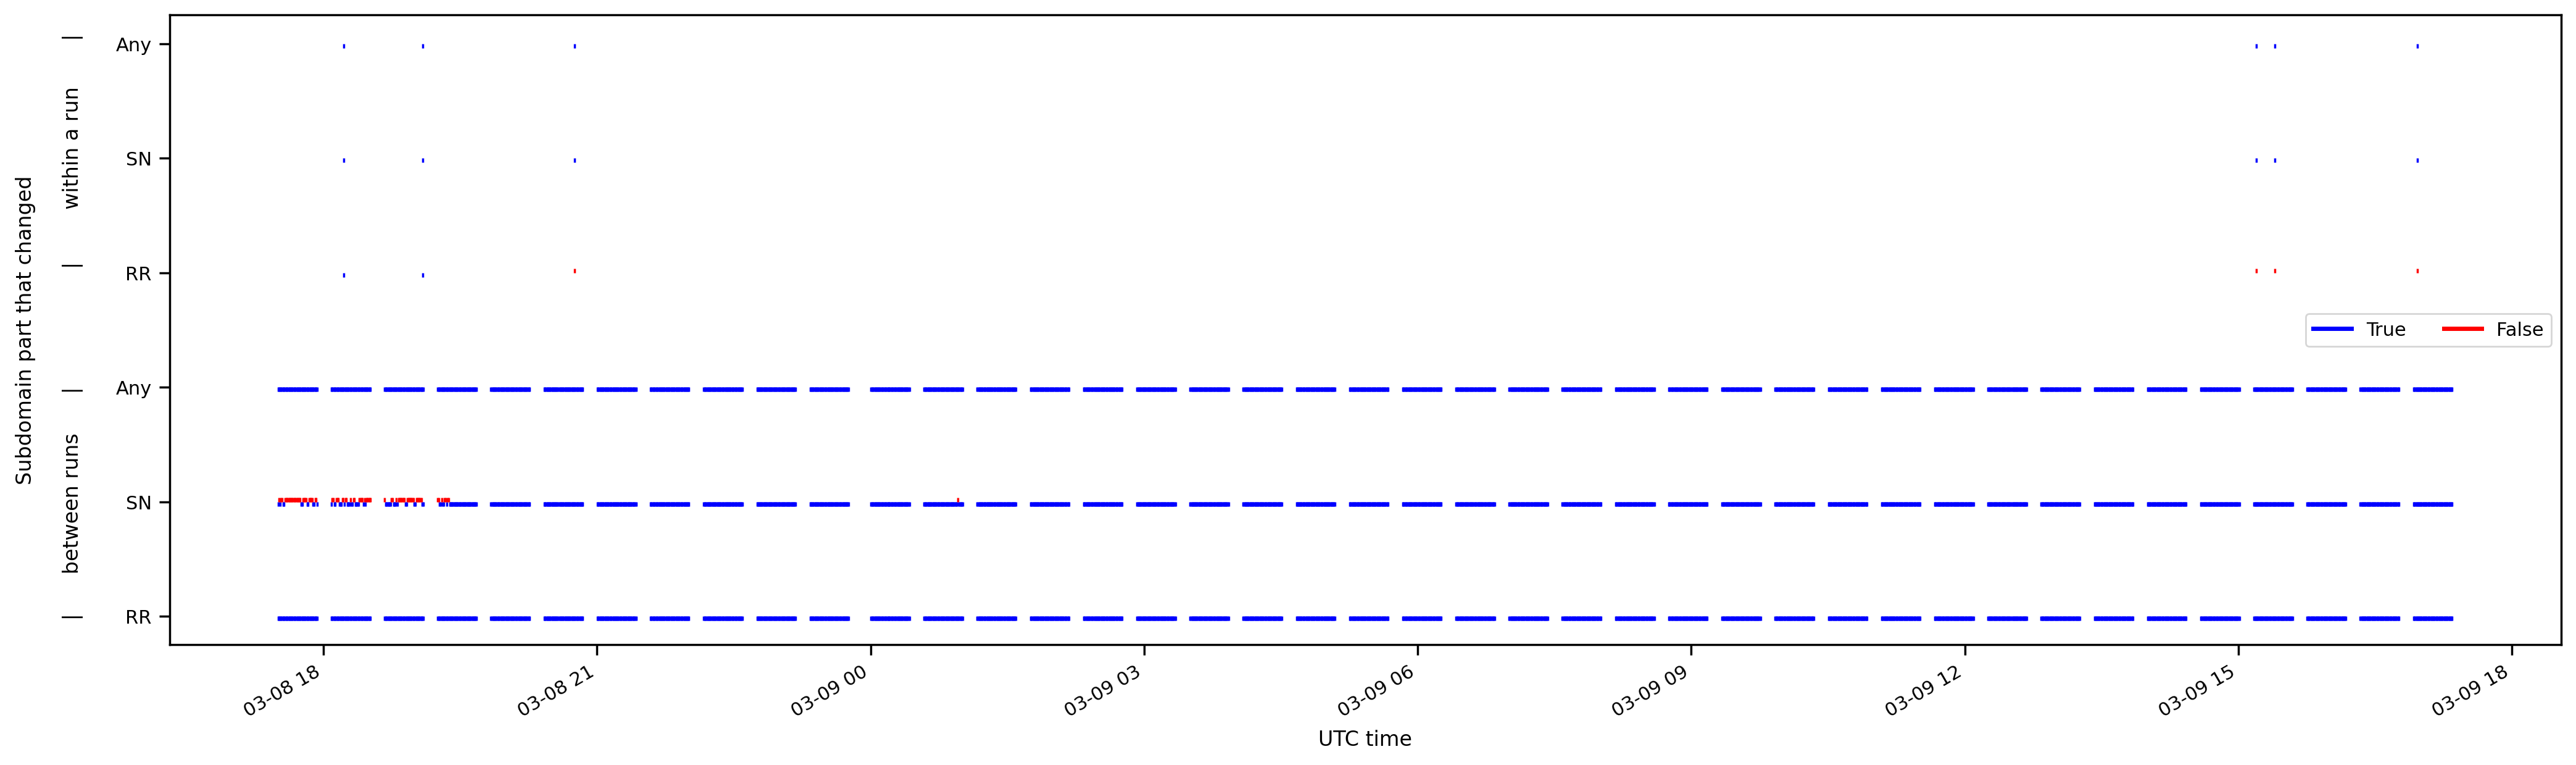

In [60]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111)
labels = ['rr_changed_btw_msm', 'sn_changed_btw_msm', 'subdomain_changed_btw_msm', 
          'rr_changed_in_msm', 'sn_changed_in_msm', 'subdomain_changed_in_msm']
label_map={'rr_changed_btw_msm': 'RR string changed between runs', 
           'sn_changed_btw_msm':'SN string changed between runs', 
           'subdomain_changed_btw_msm':'Whole subdomain changed between runs', 
          'rr_changed_in_msm':'RR string changed within run', 
           'sn_changed_in_msm':'SN string changed within run', 
           'subdomain_changed_in_msm':'Whole subdomain changed within run'}
cmap = {True:'blue', False:'red'}
for idx in range(len(labels)):
    label=labels[idx]
    for is_true in [True, False]:
        df_tmp = lookups_eu[(lookups_eu[label] == is_true) & (lookups_eu.first_time_seen < '2022-03-09 17:30') & (lookups_eu.first_time_seen > '2022-03-08 17:30')][['first_time_seen']].set_index('first_time_seen')
        df_tmp[label_map[label]+' '+str(is_true)] = idx+1.
        df_tmp.plot(y=label_map[label]+' '+str(is_true), ax=ax, marker=is_true+2, markersize=2, drawstyle="default", lw=0, color=cmap[is_true])
#df_tmp.plot(ax=ax, marker=2, markersize=3, drawstyle="default", lw=0, color='C2')
ax.legend_.remove()
ax.set_xlabel("UTC time")
ax.set_yticks([1.,2.,3.,4.,5.,6.])
ax.set_yticklabels(['RR', 'SN', 'Any', 'RR', 'SN', 'Any'])
ax.set_ylabel('Subdomain part that changed\n\n |      between runs      |                  |        within a run       |\n')
legend_elements = [mpl.lines.Line2D([0], [0], color=cmap[legend_item], lw=2, label=legend_item, marker='') for legend_item in cmap.keys()]
plt.gca().legend(handles=legend_elements, loc='best', ncol=2)#, bbox_to_anchor=(.5, -.4))

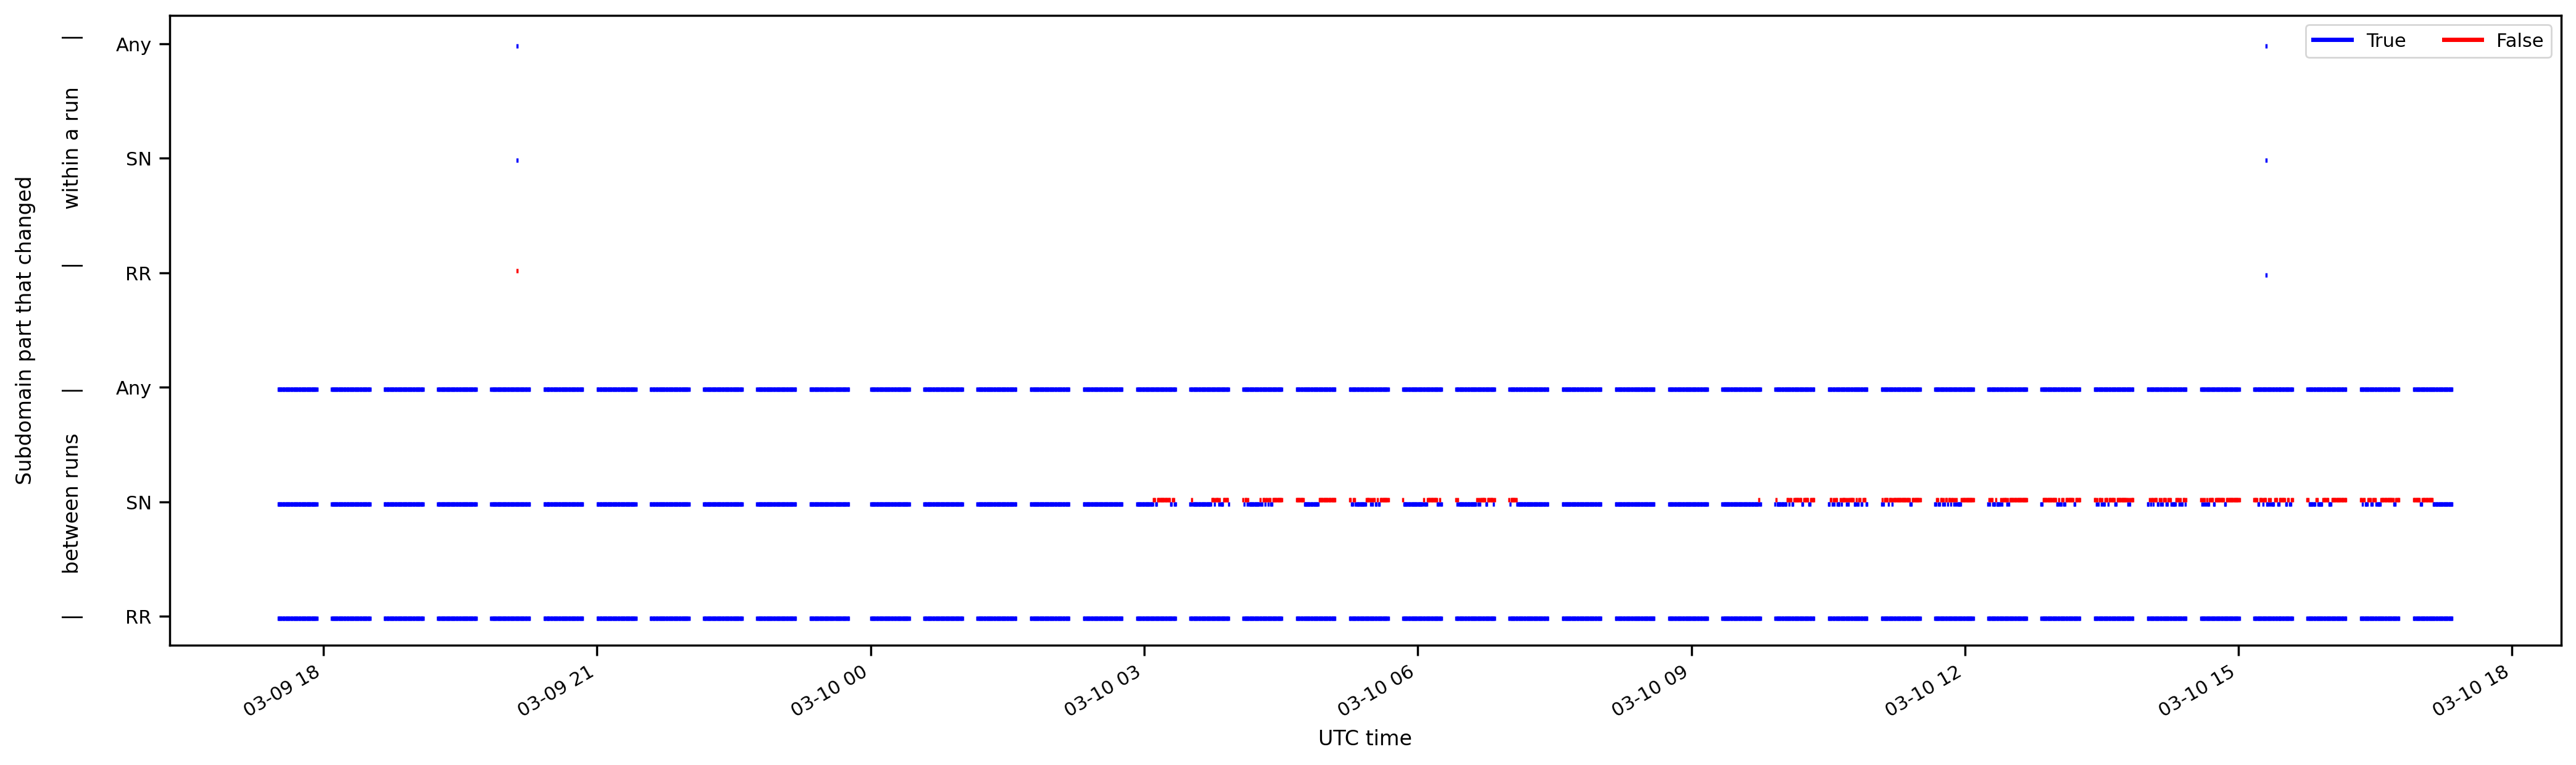

In [61]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111)
labels = ['rr_changed_btw_msm', 'sn_changed_btw_msm', 'subdomain_changed_btw_msm', 
          'rr_changed_in_msm', 'sn_changed_in_msm', 'subdomain_changed_in_msm']
label_map={'rr_changed_btw_msm': 'RR string changed between runs', 
           'sn_changed_btw_msm':'SN string changed between runs', 
           'subdomain_changed_btw_msm':'Whole subdomain changed between runs', 
          'rr_changed_in_msm':'RR string changed within run', 
           'sn_changed_in_msm':'SN string changed within run', 
           'subdomain_changed_in_msm':'Whole subdomain changed within run'}
cmap = {True:'blue', False:'red'}
for idx in range(len(labels)):
    label=labels[idx]
    for is_true in [True, False]:
        df_tmp = lookups_eu[(lookups_eu[label] == is_true) & (lookups_eu.first_time_seen < '2022-03-10 17:30') & (lookups_eu.first_time_seen > '2022-03-09 17:30')][['first_time_seen']].set_index('first_time_seen')
        df_tmp[label_map[label]+' '+str(is_true)] = idx+1.
        df_tmp.plot(y=label_map[label]+' '+str(is_true), ax=ax, marker=is_true+2, markersize=2, drawstyle="default", lw=0, color=cmap[is_true])
#df_tmp.plot(ax=ax, marker=2, markersize=3, drawstyle="default", lw=0, color='C2')
ax.legend_.remove()
ax.set_xlabel("UTC time")
ax.set_yticks([1.,2.,3.,4.,5.,6.])
ax.set_yticklabels(['RR', 'SN', 'Any', 'RR', 'SN', 'Any'])
ax.set_ylabel('Subdomain part that changed\n\n |      between runs      |                  |        within a run       |\n')
legend_elements = [mpl.lines.Line2D([0], [0], color=cmap[legend_item], lw=2, label=legend_item, marker='') for legend_item in cmap.keys()]
plt.gca().legend(handles=legend_elements, loc='best', ncol=2)#, bbox_to_anchor=(.5, -.4))

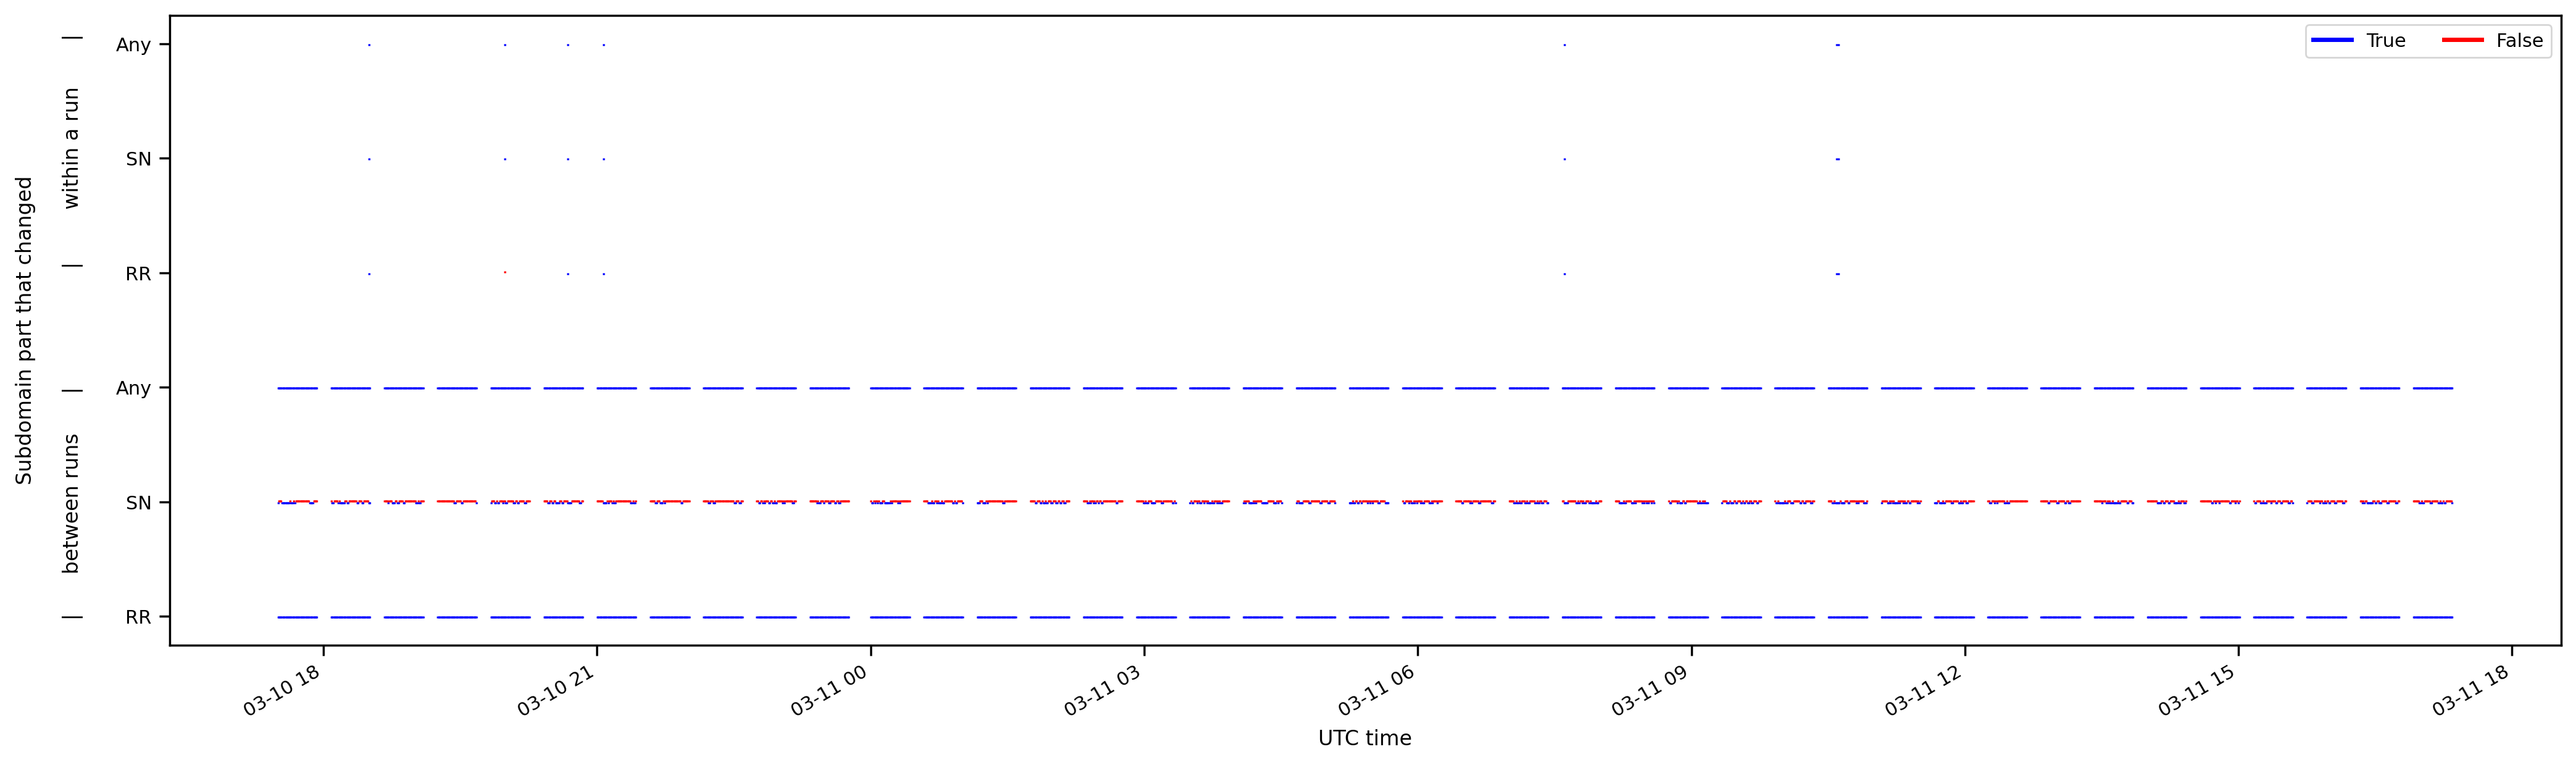

In [62]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111)
labels = ['rr_changed_btw_msm', 'sn_changed_btw_msm', 'subdomain_changed_btw_msm', 
          'rr_changed_in_msm', 'sn_changed_in_msm', 'subdomain_changed_in_msm']
label_map={'rr_changed_btw_msm': 'RR string changed between runs', 
           'sn_changed_btw_msm':'SN string changed between runs', 
           'subdomain_changed_btw_msm':'Whole subdomain changed between runs', 
          'rr_changed_in_msm':'RR string changed within run', 
           'sn_changed_in_msm':'SN string changed within run', 
           'subdomain_changed_in_msm':'Whole subdomain changed within run'}
cmap = {True:'blue', False:'red'}
for idx in range(len(labels)):
    label=labels[idx]
    for is_true in [True, False]:
        df_tmp = lookups_eu[(lookups_eu[label] == is_true) & (lookups_eu.first_time_seen < '2022-03-11 17:30') & (lookups_eu.first_time_seen > '2022-03-10 17:30')][['first_time_seen']].set_index('first_time_seen')
        df_tmp[label_map[label]+' '+str(is_true)] = idx+1.
        df_tmp.plot(y=label_map[label]+' '+str(is_true), ax=ax, marker=is_true+2, markersize=1, drawstyle="default", lw=0, color=cmap[is_true])
#df_tmp.plot(ax=ax, marker=2, markersize=3, drawstyle="default", lw=0, color='C2')
ax.legend_.remove()
ax.set_xlabel("UTC time")
ax.set_yticks([1.,2.,3.,4.,5.,6.])
ax.set_yticklabels(['RR', 'SN', 'Any', 'RR', 'SN', 'Any'])
ax.set_ylabel('Subdomain part that changed\n\n |      between runs      |                  |        within a run       |\n')
legend_elements = [mpl.lines.Line2D([0], [0], color=cmap[legend_item], lw=2, label=legend_item, marker='') for legend_item in cmap.keys()]
plt.gca().legend(handles=legend_elements, loc='best', ncol=2)#, bbox_to_anchor=(.5, -.4))

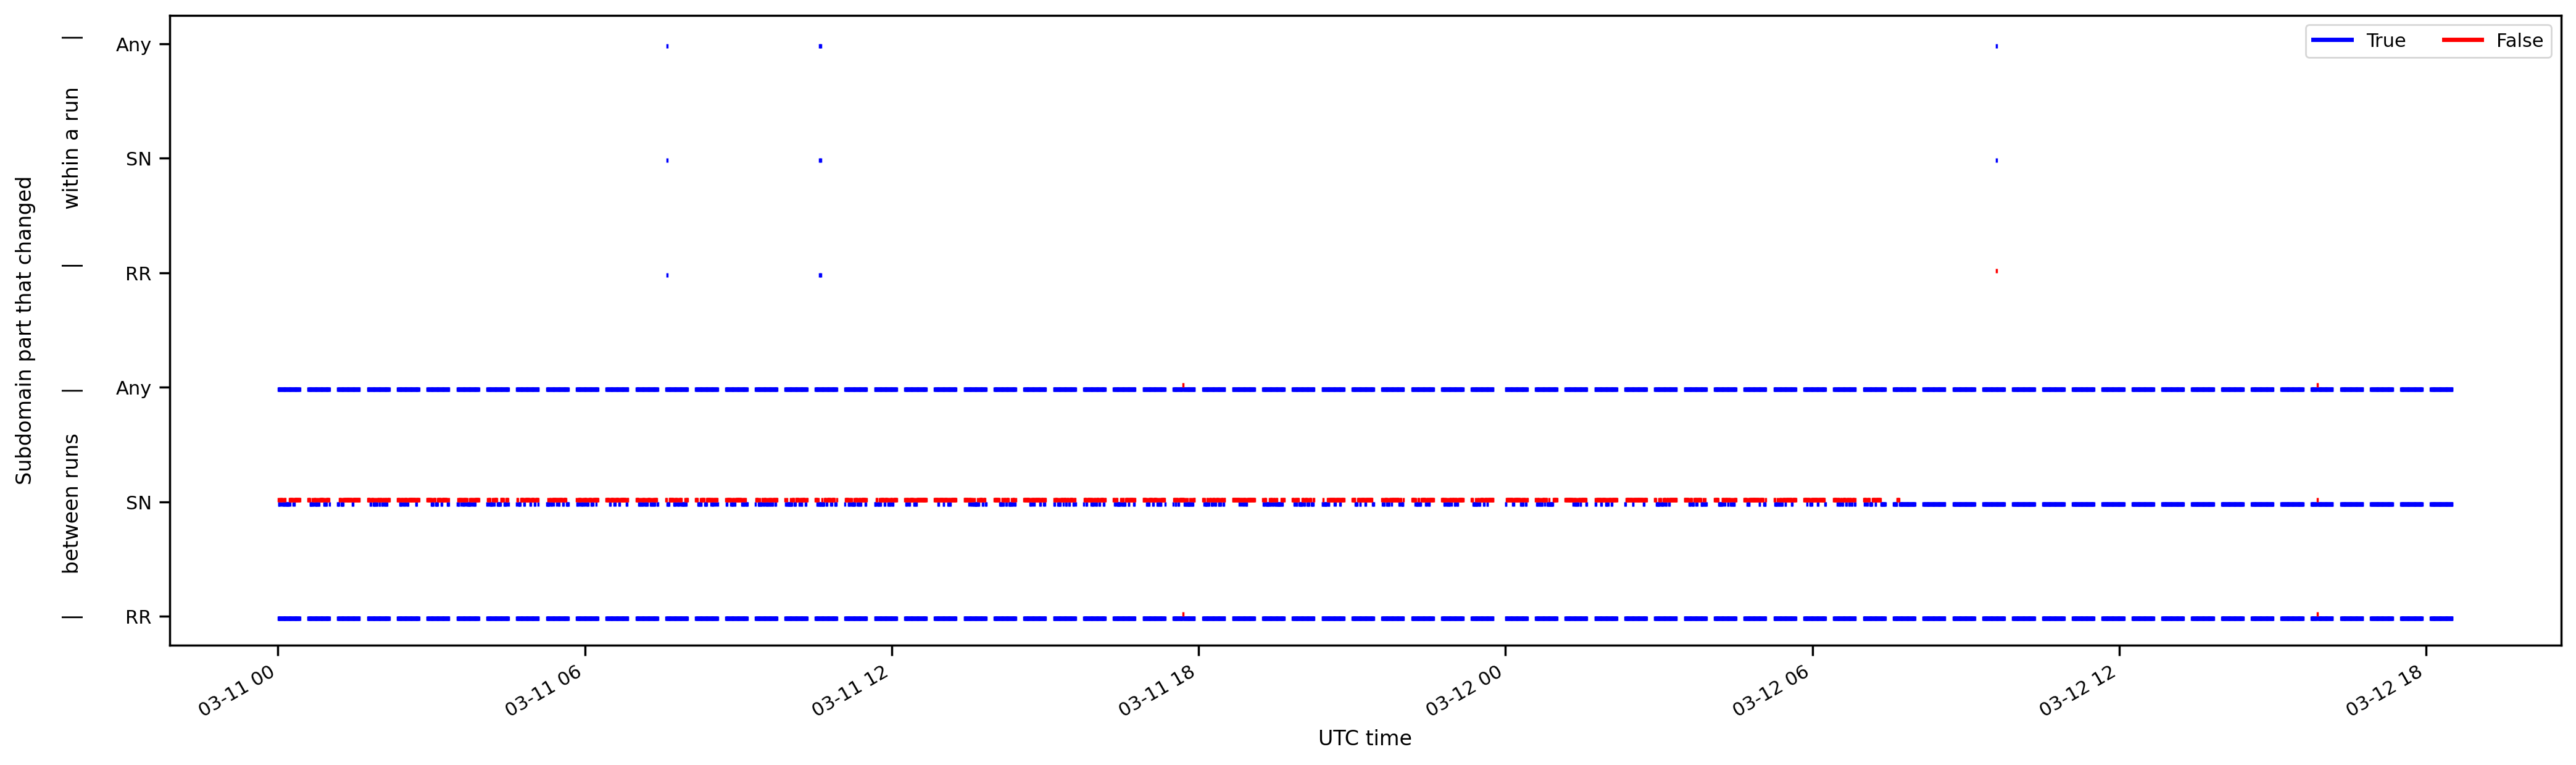

In [63]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111)
labels = ['rr_changed_btw_msm', 'sn_changed_btw_msm', 'subdomain_changed_btw_msm', 
          'rr_changed_in_msm', 'sn_changed_in_msm', 'subdomain_changed_in_msm']
label_map={'rr_changed_btw_msm': 'RR string changed between runs', 
           'sn_changed_btw_msm':'SN string changed between runs', 
           'subdomain_changed_btw_msm':'Whole subdomain changed between runs', 
          'rr_changed_in_msm':'RR string changed within run', 
           'sn_changed_in_msm':'SN string changed within run', 
           'subdomain_changed_in_msm':'Whole subdomain changed within run'}
cmap = {True:'blue', False:'red'}
for idx in range(len(labels)):
    label=labels[idx]
    for is_true in [True, False]:
        df_tmp = lookups_eu[(lookups_eu[label] == is_true) & (lookups_eu.first_time_seen < '2022-03-13 17:30') & (lookups_eu.first_time_seen > '2022-03-11 0:0')][['first_time_seen']].set_index('first_time_seen')
        df_tmp[label_map[label]+' '+str(is_true)] = idx+1.
        df_tmp.plot(y=label_map[label]+' '+str(is_true), ax=ax, marker=is_true+2, markersize=2, drawstyle="default", lw=0, color=cmap[is_true])
#df_tmp.plot(ax=ax, marker=2, markersize=3, drawstyle="default", lw=0, color='C2')
ax.legend_.remove()
ax.set_xlabel("UTC time")
ax.set_yticks([1.,2.,3.,4.,5.,6.])
ax.set_yticklabels(['RR', 'SN', 'Any', 'RR', 'SN', 'Any'])
ax.set_ylabel('Subdomain part that changed\n\n |      between runs      |                  |        within a run       |\n')
legend_elements = [mpl.lines.Line2D([0], [0], color=cmap[legend_item], lw=2, label=legend_item, marker='') for legend_item in cmap.keys()]
plt.gca().legend(handles=legend_elements, loc='best', ncol=2)#, bbox_to_anchor=(.5, -.4))

## googlevideo subdomain changes pretty much every run and sometimes inbetween runs -- this is due to the measurement setup alternating between video IDs
# if we keep the video ID the same, the subdomain changes only 45% of the time

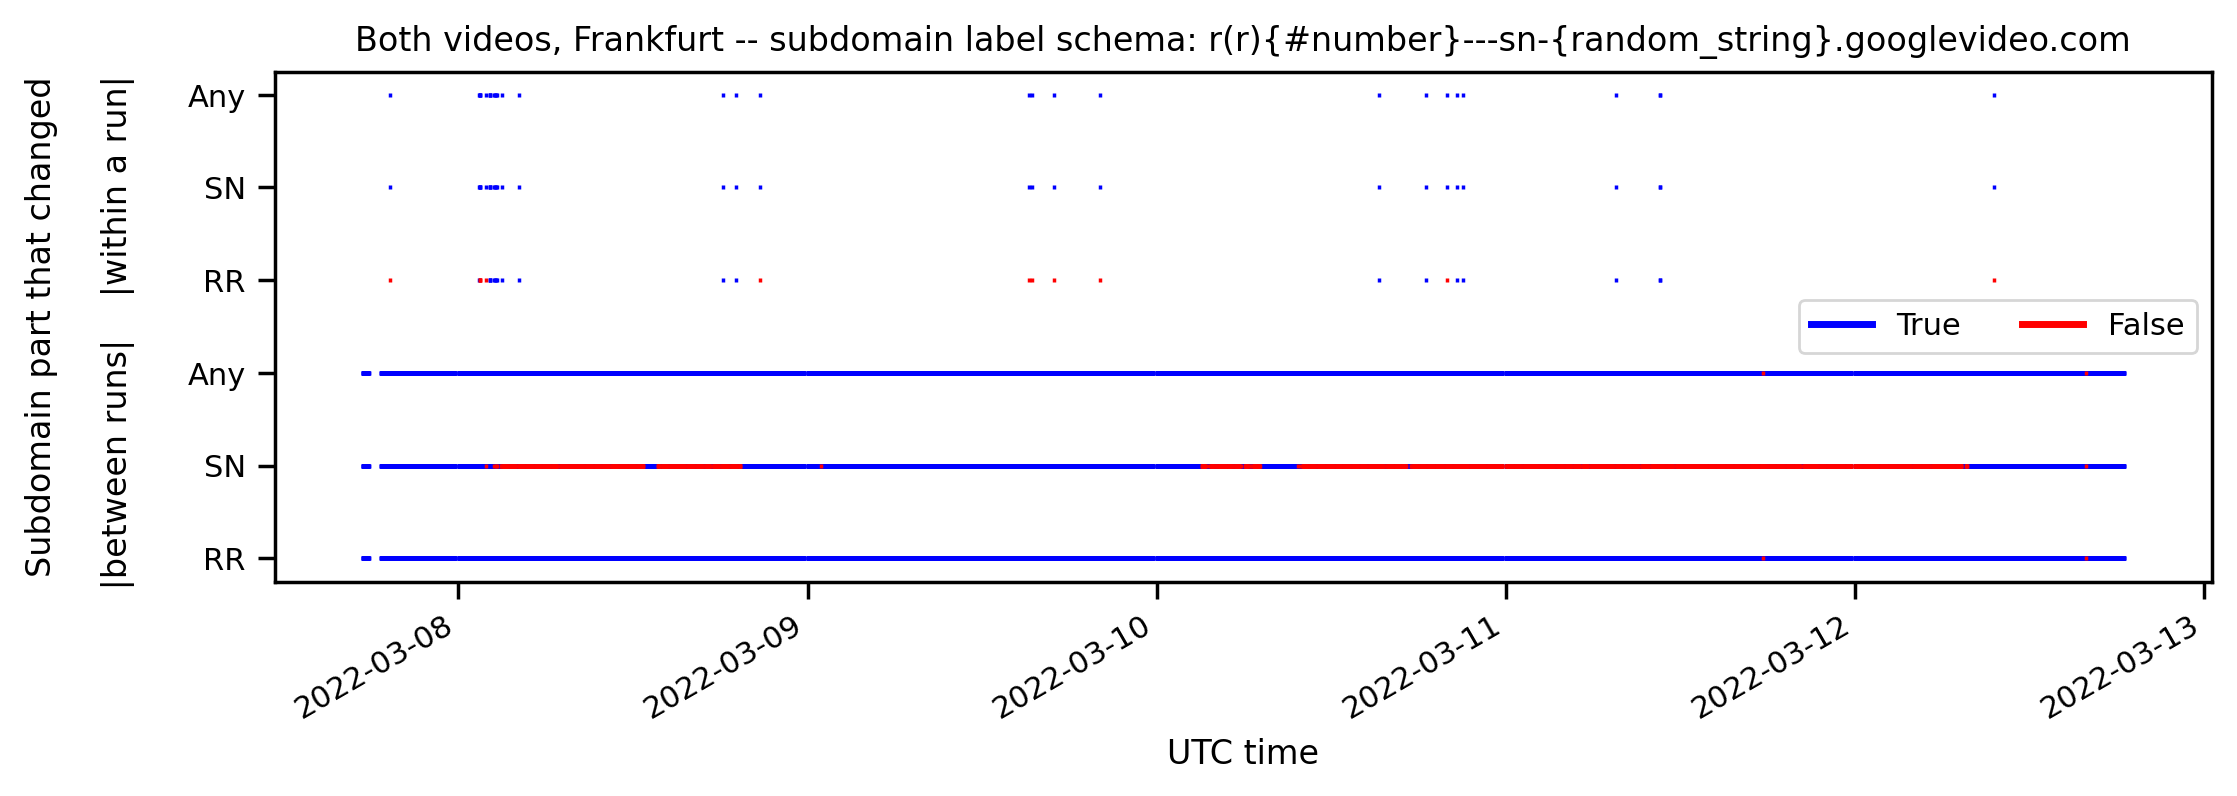

In [64]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
labels = ['rr_changed_btw_msm', 'sn_changed_btw_msm', 'subdomain_changed_btw_msm', 
          'rr_changed_in_msm', 'sn_changed_in_msm', 'subdomain_changed_in_msm']
label_map={'rr_changed_btw_msm': 'RR string changed between runs', 
           'sn_changed_btw_msm':'SN string changed between runs', 
           'subdomain_changed_btw_msm':'Whole subdomain changed between runs', 
          'rr_changed_in_msm':'RR string changed within run', 
           'sn_changed_in_msm':'SN string changed within run', 
           'subdomain_changed_in_msm':'Whole subdomain changed within run'}
cmap = {True:'blue', False:'red'}
for idx in range(len(labels)):
    label=labels[idx]
    for is_true in [True, False]:
        df_tmp = lookups_eu[(lookups_eu[label] == is_true)][['first_time_seen']].set_index('first_time_seen')
        df_tmp[label_map[label]+' '+str(is_true)] = idx+1.
        df_tmp.plot(y=label_map[label]+' '+str(is_true), ax=ax, marker="|", markersize=1, drawstyle="default", lw=0, color=cmap[is_true])
#df_tmp.plot(ax=ax, marker=2, markersize=3, drawstyle="default", lw=0, color='C2')
ax.legend_.remove()
ax.set_title("Both videos, Frankfurt -- subdomain label schema: r(r){#number}---sn-{random_string}.googlevideo.com")
ax.set_yticks([1.,2.,3.,4.,5.,6.])
ax.set_yticklabels(['RR', 'SN', 'Any', 'RR', 'SN', 'Any'])
ax.set_ylabel('Subdomain part that changed\n\n |between runs|    |within a run|  \n')
ax.set_xlabel("UTC time")
legend_elements = [mpl.lines.Line2D([0], [0], color=cmap[legend_item], lw=2, label=legend_item, marker='') for legend_item in cmap.keys()]
plt.gca().legend(handles=legend_elements, loc='best', ncol=2)#, bbox_to_anchor=(.5, -.4))

In [65]:
lookups_eu.video_id.unique()

array(['aqz-KE-bpKQ', 'lqiN98z6Dak'], dtype=object)

/tmp/ipykernel_20197/1293777772.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  last_row = pd.Series()


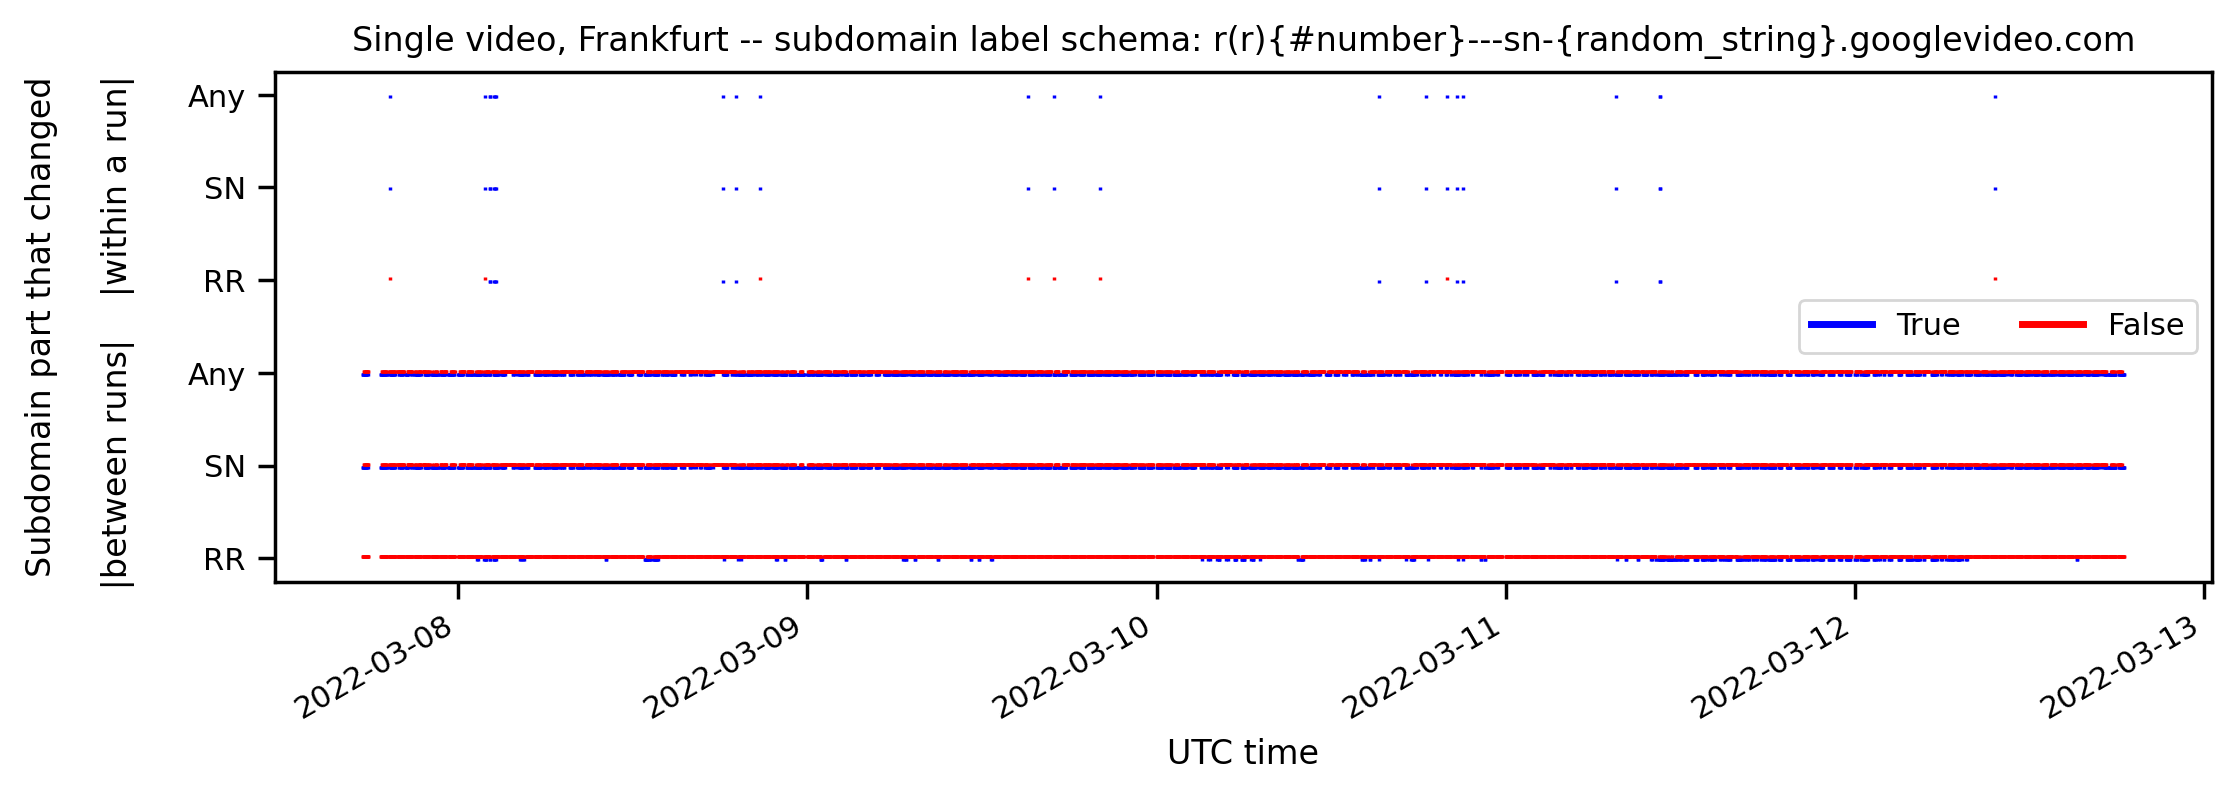

In [66]:
lookups_eu_single_video = lookups_eu[lookups_eu.video_id == 'aqz-KE-bpKQ'].copy()
lookups_eu_single_video.reset_index(drop=True, inplace=True)
lookups_eu_single_video['rr_changed_btw_msm'] = np.nan
lookups_eu_single_video['sn_changed_btw_msm'] = np.nan
lookups_eu_single_video['subdomain_changed_btw_msm'] = np.nan
lookups_eu_single_video['rr_changed_in_msm'] = np.nan
lookups_eu_single_video['sn_changed_in_msm'] = np.nan
lookups_eu_single_video['subdomain_changed_in_msm'] = np.nan
lookups_eu_single_video = lookups_eu_single_video.sort_values('first_time_seen')
last_row = pd.Series()
for index, row in lookups_eu_single_video.iterrows():
    if index == 0:
        last_row = row
        continue
    else:
        if row['msm_id'] == last_row['msm_id']:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_eu_single_video.loc[index, 'rr_changed_in_msm'] = False
            else:
                lookups_eu_single_video.loc[index, 'rr_changed_in_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_eu_single_video.loc[index, 'sn_changed_in_msm'] = False
            else:
                lookups_eu_single_video.loc[index, 'sn_changed_in_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_eu_single_video.loc[index, 'subdomain_changed_in_msm'] = False
            else:
                lookups_eu_single_video.loc[index, 'subdomain_changed_in_msm'] = True
        else:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_eu_single_video.loc[index, 'rr_changed_btw_msm'] = False
            else:
                lookups_eu_single_video.loc[index, 'rr_changed_btw_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_eu_single_video.loc[index, 'sn_changed_btw_msm'] = False
            else:
                lookups_eu_single_video.loc[index, 'sn_changed_btw_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_eu_single_video.loc[index, 'subdomain_changed_btw_msm'] = False
            else:
                lookups_eu_single_video.loc[index, 'subdomain_changed_btw_msm'] = True
        last_row = row
        
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
labels = ['rr_changed_btw_msm', 'sn_changed_btw_msm', 'subdomain_changed_btw_msm', 
          'rr_changed_in_msm', 'sn_changed_in_msm', 'subdomain_changed_in_msm']
label_map={'rr_changed_btw_msm': 'RR string changed between runs', 
           'sn_changed_btw_msm':'SN string changed between runs', 
           'subdomain_changed_btw_msm':'Whole subdomain changed between runs', 
          'rr_changed_in_msm':'RR string changed within run', 
           'sn_changed_in_msm':'SN string changed within run', 
           'subdomain_changed_in_msm':'Whole subdomain changed within run'}
cmap = {True:'blue', False:'red'}
for idx in range(len(labels)):
    label=labels[idx]
    for is_true in [True, False]:
        df_tmp = lookups_eu_single_video[(lookups_eu_single_video[label] == is_true)][['first_time_seen']].set_index('first_time_seen')
        df_tmp[label_map[label]+' '+str(is_true)] = (idx+1)/10
        df_tmp.plot(y=label_map[label]+' '+str(is_true), ax=ax, marker=is_true+2, markersize=1, drawstyle="default", lw=0, color=cmap[is_true])
#df_tmp.plot(ax=ax, marker=2, markersize=3, drawstyle="default", lw=0, color='C2')
ax.legend_.remove()
ax.set_title("Single video, Frankfurt -- subdomain label schema: r(r){#number}---sn-{random_string}.googlevideo.com")
ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6])
ax.set_yticklabels(['RR', 'SN', 'Any', 'RR', 'SN', 'Any'])
ax.set_ylabel('Subdomain part that changed\n\n |      between runs      |                  |        within a run       |\n')
ax.set_ylabel('Subdomain part that changed\n\n |between runs|    |within a run|  \n')
ax.set_xlabel("UTC time")
legend_elements = [mpl.lines.Line2D([0], [0], color=cmap[legend_item], lw=2, label=legend_item, marker='') for legend_item in cmap.keys()]
plt.gca().legend(handles=legend_elements, loc='best', ncol=2)#, bbox_to_anchor=(.5, -.4))
plt.show()

In [67]:
lookups_eu_single_video.subdomain_changed_btw_msm.value_counts()

False    2343
True     1776
Name: subdomain_changed_btw_msm, dtype: int64

/tmp/ipykernel_20197/1827194580.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  last_row = pd.Series()


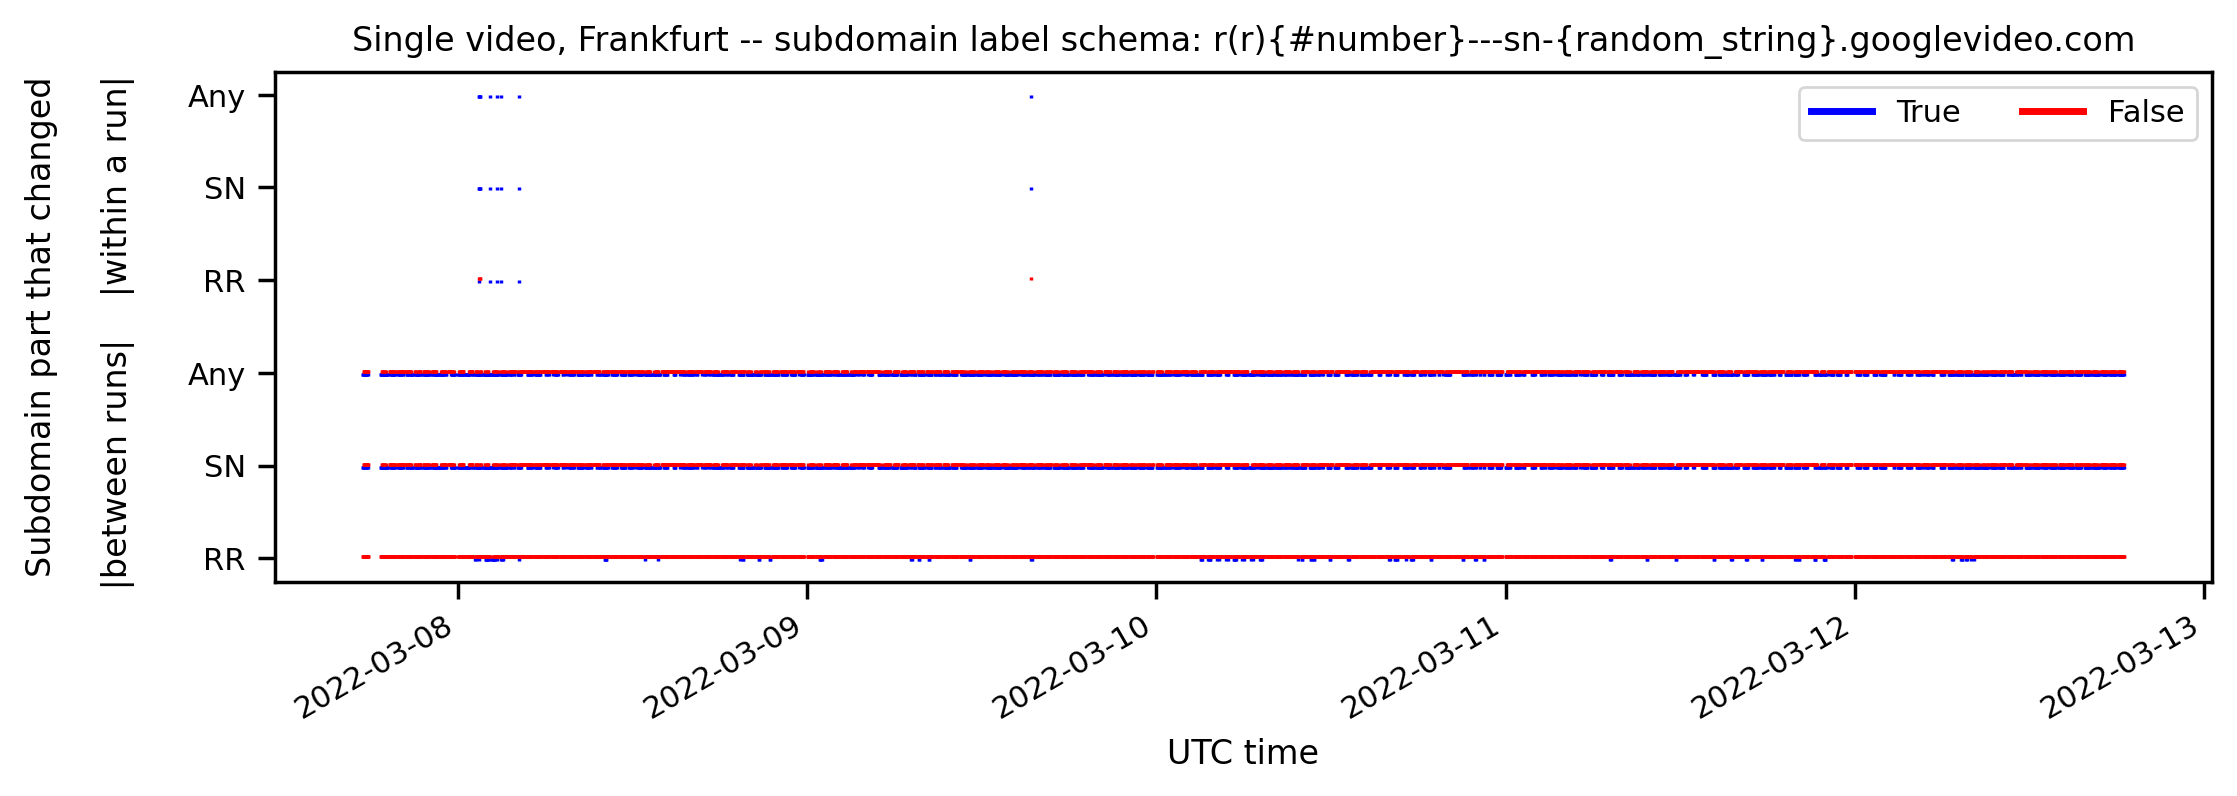

In [68]:
lookups_eu_single_video = lookups_eu[lookups_eu.video_id == 'lqiN98z6Dak'].copy()
lookups_eu_single_video.reset_index(drop=True, inplace=True)
lookups_eu_single_video['rr_changed_btw_msm'] = np.nan
lookups_eu_single_video['sn_changed_btw_msm'] = np.nan
lookups_eu_single_video['subdomain_changed_btw_msm'] = np.nan
lookups_eu_single_video['rr_changed_in_msm'] = np.nan
lookups_eu_single_video['sn_changed_in_msm'] = np.nan
lookups_eu_single_video['subdomain_changed_in_msm'] = np.nan
lookups_eu_single_video = lookups_eu_single_video.sort_values('first_time_seen')
last_row = pd.Series()
for index, row in lookups_eu_single_video.iterrows():
    if index != 0:
        if row['msm_id'] == last_row['msm_id']:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_eu_single_video.loc[index, 'rr_changed_in_msm'] = False
            else:
                lookups_eu_single_video.loc[index, 'rr_changed_in_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_eu_single_video.loc[index, 'sn_changed_in_msm'] = False
            else:
                lookups_eu_single_video.loc[index, 'sn_changed_in_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_eu_single_video.loc[index, 'subdomain_changed_in_msm'] = False
            else:
                lookups_eu_single_video.loc[index, 'subdomain_changed_in_msm'] = True
        else:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_eu_single_video.loc[index, 'rr_changed_btw_msm'] = False
            else:
                lookups_eu_single_video.loc[index, 'rr_changed_btw_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_eu_single_video.loc[index, 'sn_changed_btw_msm'] = False
            else:
                lookups_eu_single_video.loc[index, 'sn_changed_btw_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_eu_single_video.loc[index, 'subdomain_changed_btw_msm'] = False
            else:
                lookups_eu_single_video.loc[index, 'subdomain_changed_btw_msm'] = True
    last_row = row.copy(deep=False)
        
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
labels = ['rr_changed_btw_msm', 'sn_changed_btw_msm', 'subdomain_changed_btw_msm', 
          'rr_changed_in_msm', 'sn_changed_in_msm', 'subdomain_changed_in_msm']
label_map={'rr_changed_btw_msm': 'RR string changed between runs', 
           'sn_changed_btw_msm':'SN string changed between runs', 
           'subdomain_changed_btw_msm':'Whole subdomain changed between runs', 
          'rr_changed_in_msm':'RR string changed within run', 
           'sn_changed_in_msm':'SN string changed within run', 
           'subdomain_changed_in_msm':'Whole subdomain changed within run'}
cmap = {True:'blue', False:'red'}
for idx in range(len(labels)):
    label=labels[idx]
    for is_true in [True, False]:
        df_tmp = lookups_eu_single_video[(lookups_eu_single_video[label] == is_true)][['first_time_seen']].set_index('first_time_seen')
        df_tmp[label_map[label]+' '+str(is_true)] = idx+1.
        df_tmp.plot(y=label_map[label]+' '+str(is_true), ax=ax, marker=is_true+2, markersize=1, drawstyle="default", lw=0, color=cmap[is_true])
#df_tmp.plot(ax=ax, marker=2, markersize=3, drawstyle="default", lw=0, color='C2')
ax.legend_.remove()
ax.set_title("Single video, Frankfurt -- subdomain label schema: r(r){#number}---sn-{random_string}.googlevideo.com")
ax.set_yticks([1.,2.,3.,4.,5.,6.])
ax.set_yticklabels(['RR', 'SN', 'Any', 'RR', 'SN', 'Any'])
ax.set_ylabel('Subdomain part that changed\n\n |      between runs      |                  |        within a run       |\n')
ax.set_ylabel('Subdomain part that changed\n\n |between runs|    |within a run|  \n')
ax.set_xlabel("UTC time")
legend_elements = [mpl.lines.Line2D([0], [0], color=cmap[legend_item], lw=2, label=legend_item, marker='') for legend_item in cmap.keys()]
plt.gca().legend(handles=legend_elements, loc='best', ncol=2)#, bbox_to_anchor=(.5, -.4))
plt.show()

In [69]:
lookups_eu_single_video.subdomain_changed_btw_msm.value_counts()

False    2337
True     1780
Name: subdomain_changed_btw_msm, dtype: int64

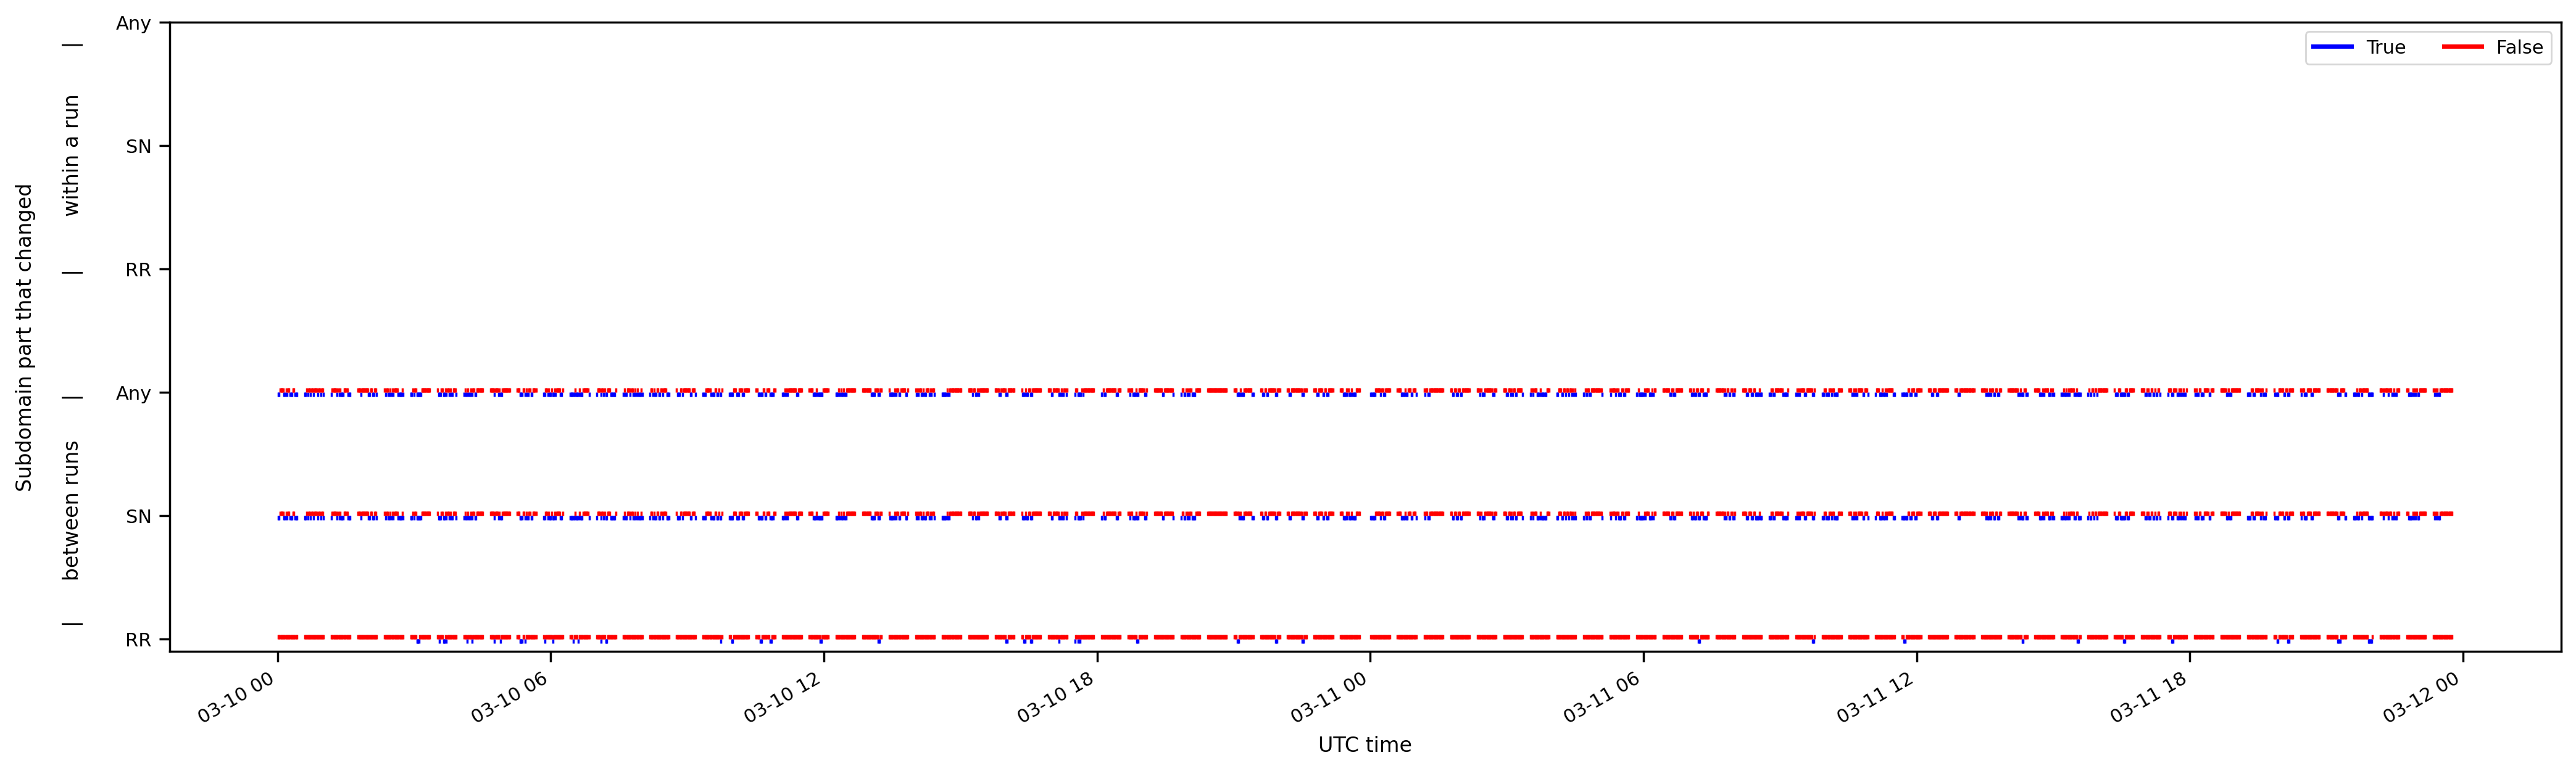

In [70]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111)
labels = ['rr_changed_btw_msm', 'sn_changed_btw_msm', 'subdomain_changed_btw_msm', 
          'rr_changed_in_msm', 'sn_changed_in_msm', 'subdomain_changed_in_msm']
label_map={'rr_changed_btw_msm': 'RR string changed between runs', 
           'sn_changed_btw_msm':'SN string changed between runs', 
           'subdomain_changed_btw_msm':'Whole subdomain changed between runs', 
          'rr_changed_in_msm':'RR string changed within run', 
           'sn_changed_in_msm':'SN string changed within run', 
           'subdomain_changed_in_msm':'Whole subdomain changed within run'}
cmap = {True:'blue', False:'red'}
for idx in range(len(labels)):
    label=labels[idx]
    for is_true in [True, False]:
        df_tmp = lookups_eu_single_video[(lookups_eu_single_video[label] == is_true) & (lookups_eu_single_video.first_time_seen < '2022-03-12 0:0') & (lookups_eu_single_video.first_time_seen > '2022-03-10 0:0')][['first_time_seen']].set_index('first_time_seen')
        df_tmp[label_map[label]+' '+str(is_true)] = idx+1.
        df_tmp.plot(y=label_map[label]+' '+str(is_true), ax=ax, marker=is_true+2, markersize=2, drawstyle="default", lw=0, color=cmap[is_true])
#df_tmp.plot(ax=ax, marker=2, markersize=3, drawstyle="default", lw=0, color='C2')
ax.legend_.remove()
ax.set_xlabel("UTC time")
ax.set_yticks([1.,2.,3.,4.,5.,6.])
ax.set_yticklabels(['RR', 'SN', 'Any', 'RR', 'SN', 'Any'])
ax.set_ylabel('Subdomain part that changed\n\n |      between runs      |                  |        within a run       |\n')
legend_elements = [mpl.lines.Line2D([0], [0], color=cmap[legend_item], lw=2, label=legend_item, marker='') for legend_item in cmap.keys()]
plt.gca().legend(handles=legend_elements, loc='best', ncol=2)#, bbox_to_anchor=(.5, -.4))

In [71]:
measurements.vantagePoint.unique()

array(['Africa South', 'Asia Pacific Northeast', 'Asia Pacific Southeast',
       'Europe Central', 'South America East', 'US East', 'US West'],
      dtype=object)

## US West

In [72]:
measurements_usw = measurements[measurements.vantagePoint == 'US West'].copy()
lookups_usw = lookups[lookups.msm_id.isin(measurements_usw.msm_id.unique())].copy()
googlevideo_subdomains_usw = googlevideo_subdomains[googlevideo_subdomains.msm_id.isin(measurements_usw.msm_id.unique())].copy()
googlevideo_requests_usw = googlevideo_requests[googlevideo_requests.msm_id.isin(measurements_usw.msm_id.unique())].copy()


In [73]:
lookups_usw.status.unique()

array(['NOERROR'], dtype=object)

In [74]:
measurements_usw.reset_index(drop=True, inplace=True)

In [75]:
lookups_usw.reset_index(drop=True, inplace=True)

In [76]:
lookups_usw[lookups_usw.status == 'NOERROR'].groupby('video_subdomain', as_index=False).agg(ip_addr_count=('ip_addr',pd.Series.nunique), ip_addrs=('ip_addr',pd.Series.unique)).sort_values('ip_addr_count')

video_subdomain  ip_addr_count                        ip_addrs
0    r2---sn-n4v7sney              1                   74.125.103.39
1    r4---sn-o097znse              1                   74.125.166.41
4   rr2---sn-a5msen7z              1                  74.125.103.167
7   rr4---sn-a5mekn6d              1                   173.194.8.201
8   rr4---sn-a5mekn6l              1                   173.194.8.105
9   rr4---sn-a5msen7z              1                  74.125.103.169
10  rr4---sn-n4v7snl7              1                  74.125.103.137
2          redirector              2  [142.250.68.14, 142.250.68.78]
3   rr2---sn-a5mekn6d              2  [173.194.8.199, 142.250.68.65]
5   rr2---sn-n4v7sney              2    [74.125.103.39, 173.194.8.7]
6   rr2---sn-o097znsr              2    [173.194.8.7, 173.194.8.199]
11  rr4---sn-o097znse              2  [74.125.166.41, 173.194.8.105]

In [77]:
measurements_usw.error.unique()

array(['',
       'failed switching selenium focus to youtube iframe or monitoring loop ### Message: \n'],
      dtype=object)

In [78]:
lookups_usw[lookups_usw.video_subdomain == 'redirector'].video_id.value_counts()

aqz-KE-bpKQ    2
Name: video_id, dtype: int64

In [79]:
lookups_usw[lookups_usw.status != 'NOERROR']

Empty DataFrame
Columns: [msm_id, domain, elapsed, status, answer, ip_addr, round_robin_str, rand_sn_str, video_subdomain, subdomain_and_ip, googlevideo, first_time_seen, ip_addr/24, ip_addr/16, video_id, player_dimensions, timestamp]
Index: []

#### less SN variety than EU

In [80]:
lookups_usw[lookups_usw.video_subdomain != 'redirector'].groupby('rand_sn_str').agg(rr_count=('round_robin_str', pd.Series.nunique)).sort_values('rr_count')

rr_count
rand_sn_str          
sn-a5mekn6l         1
sn-n4v7snl7         1
sn-o097znsr         1
sn-a5mekn6d         2
sn-a5msen7z         2
sn-n4v7sney         2
sn-o097znse         2

In [81]:
lookups_usw[lookups_usw.video_subdomain != 'redirector'].groupby('rand_sn_str').filter(lambda x: pd.Series.nunique(x['round_robin_str']) > 1).groupby('rand_sn_str', as_index=False).agg(rr_strs=('round_robin_str', pd.Series.unique))

rand_sn_str     rr_strs
0  sn-a5mekn6d  [rr2, rr4]
1  sn-a5msen7z  [rr2, rr4]
2  sn-n4v7sney   [rr2, r2]
3  sn-o097znse   [rr4, r4]

In [82]:
lookups_usw = lookups_usw[lookups_usw.video_subdomain != 'redirector']
lookups_usw.reset_index(drop=True, inplace=True)
lookups_usw['rr_changed_btw_msm'] = np.nan
lookups_usw['sn_changed_btw_msm'] = np.nan
lookups_usw['subdomain_changed_btw_msm'] = np.nan
lookups_usw['rr_changed_in_msm'] = np.nan
lookups_usw['sn_changed_in_msm'] = np.nan
lookups_usw['subdomain_changed_in_msm'] = np.nan
lookups_usw = lookups_usw.sort_values('first_time_seen')
last_row = pd.Series()
for index, row in lookups_usw.iterrows():
    if index == 0:
        last_row = row
        continue
    else:
        if row['msm_id'] == last_row['msm_id']:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_usw.loc[index, 'rr_changed_in_msm'] = False
            else:
                lookups_usw.loc[index, 'rr_changed_in_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_usw.loc[index, 'sn_changed_in_msm'] = False
            else:
                lookups_usw.loc[index, 'sn_changed_in_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_usw.loc[index, 'subdomain_changed_in_msm'] = False
            else:
                lookups_usw.loc[index, 'subdomain_changed_in_msm'] = True
        else:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_usw.loc[index, 'rr_changed_btw_msm'] = False
            else:
                lookups_usw.loc[index, 'rr_changed_btw_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_usw.loc[index, 'sn_changed_btw_msm'] = False
            else:
                lookups_usw.loc[index, 'sn_changed_btw_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_usw.loc[index, 'subdomain_changed_btw_msm'] = False
            else:
                lookups_usw.loc[index, 'subdomain_changed_btw_msm'] = True
        last_row = row

/tmp/ipykernel_20197/1108655007.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  last_row = pd.Series()


In [83]:
print(lookups_usw['ip_addr/24'].nunique())
print(lookups_usw['rand_sn_str'].nunique())

4
7


In [84]:
lookups_usw.groupby('rand_sn_str', as_index=False).agg(count24=('ip_addr/24', pd.Series.nunique), count16=('ip_addr/16', pd.Series.nunique)).sort_values('count16')

rand_sn_str  count24  count16
1  sn-a5mekn6l        1        1
2  sn-a5msen7z        1        1
4  sn-n4v7snl7        1        1
6  sn-o097znsr        1        1
0  sn-a5mekn6d        2        2
3  sn-n4v7sney        2        2
5  sn-o097znse        2        2

In [85]:
lookups_usw.groupby('ip_addr/24', as_index=False).agg(count_sn=('rand_sn_str', pd.Series.unique))

ip_addr/24                                           count_sn
0  142.250.68                                        sn-a5mekn6d
1   173.194.8  [sn-o097znsr, sn-a5mekn6l, sn-a5mekn6d, sn-n4v...
2  74.125.103            [sn-n4v7sney, sn-n4v7snl7, sn-a5msen7z]
3  74.125.166                                        sn-o097znse

In [86]:
lookups_usw['sn_length'] = lookups_usw['rand_sn_str'].str.len()
print(lookups_usw.sn_length.value_counts())

11    8316
Name: sn_length, dtype: int64


In [87]:
lookups_usw.groupby('ip_addr/24', as_index=False).agg(count_sn_overlap=('rand_sn_str', lambda x: count_largest_sn_overlap(pd.Series.unique(x).tolist())), sn_overlap=('rand_sn_str', lambda x: largest_sn_overlap(pd.Series.unique(x).tolist())))

ip_addr/24  count_sn_overlap   sn_overlap
0  142.250.68                11  sn-a5mekn6d
1   173.194.8                 3          sn-
2  74.125.103                 3          sn-
3  74.125.166                11  sn-o097znse

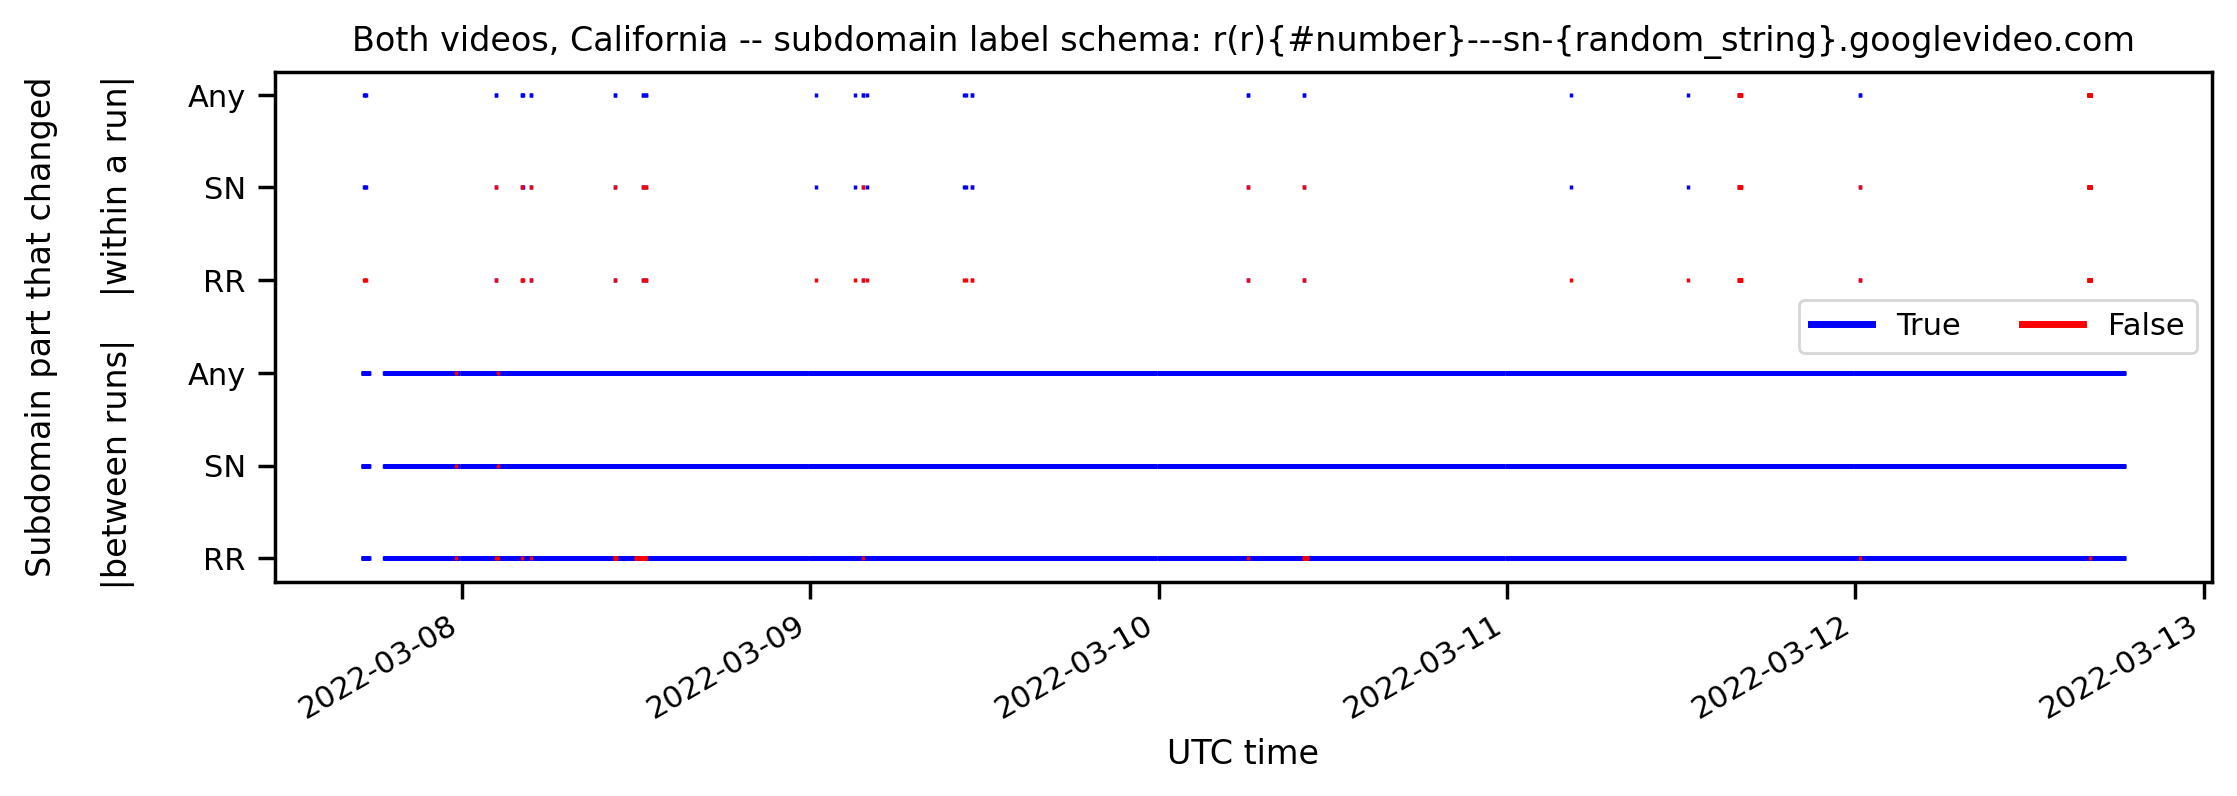

In [88]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
labels = ['rr_changed_btw_msm', 'sn_changed_btw_msm', 'subdomain_changed_btw_msm', 
          'rr_changed_in_msm', 'sn_changed_in_msm', 'subdomain_changed_in_msm']
label_map={'rr_changed_btw_msm': 'RR string changed between runs', 
           'sn_changed_btw_msm':'SN string changed between runs', 
           'subdomain_changed_btw_msm':'Whole subdomain changed between runs', 
          'rr_changed_in_msm':'RR string changed within run', 
           'sn_changed_in_msm':'SN string changed within run', 
           'subdomain_changed_in_msm':'Whole subdomain changed within run'}
cmap = {True:'blue', False:'red'}
for idx in range(len(labels)):
    label=labels[idx]
    for is_true in [True, False]:
        df_tmp = lookups_usw[(lookups_usw[label] == is_true)][['first_time_seen']].set_index('first_time_seen')
        df_tmp[label_map[label]+' '+str(is_true)] = idx+1.
        df_tmp.plot(y=label_map[label]+' '+str(is_true), ax=ax, marker="|", markersize=1, drawstyle="default", lw=0, color=cmap[is_true])
#df_tmp.plot(ax=ax, marker=2, markersize=3, drawstyle="default", lw=0, color='C2')
ax.legend_.remove()
ax.set_title("Both videos, California -- subdomain label schema: r(r){#number}---sn-{random_string}.googlevideo.com")
ax.set_yticks([1.,2.,3.,4.,5.,6.])
ax.set_yticklabels(['RR', 'SN', 'Any', 'RR', 'SN', 'Any'])
ax.set_ylabel('Subdomain part that changed\n\n |between runs|    |within a run|  \n')
ax.set_xlabel("UTC time")
legend_elements = [mpl.lines.Line2D([0], [0], color=cmap[legend_item], lw=2, label=legend_item, marker='') for legend_item in cmap.keys()]
plt.gca().legend(handles=legend_elements, loc='best', ncol=2)#, bbox_to_anchor=(.5, -.4))

/tmp/ipykernel_20197/2137313437.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  last_row = pd.Series()


False    2361
True     1757
Name: subdomain_changed_btw_msm, dtype: int64


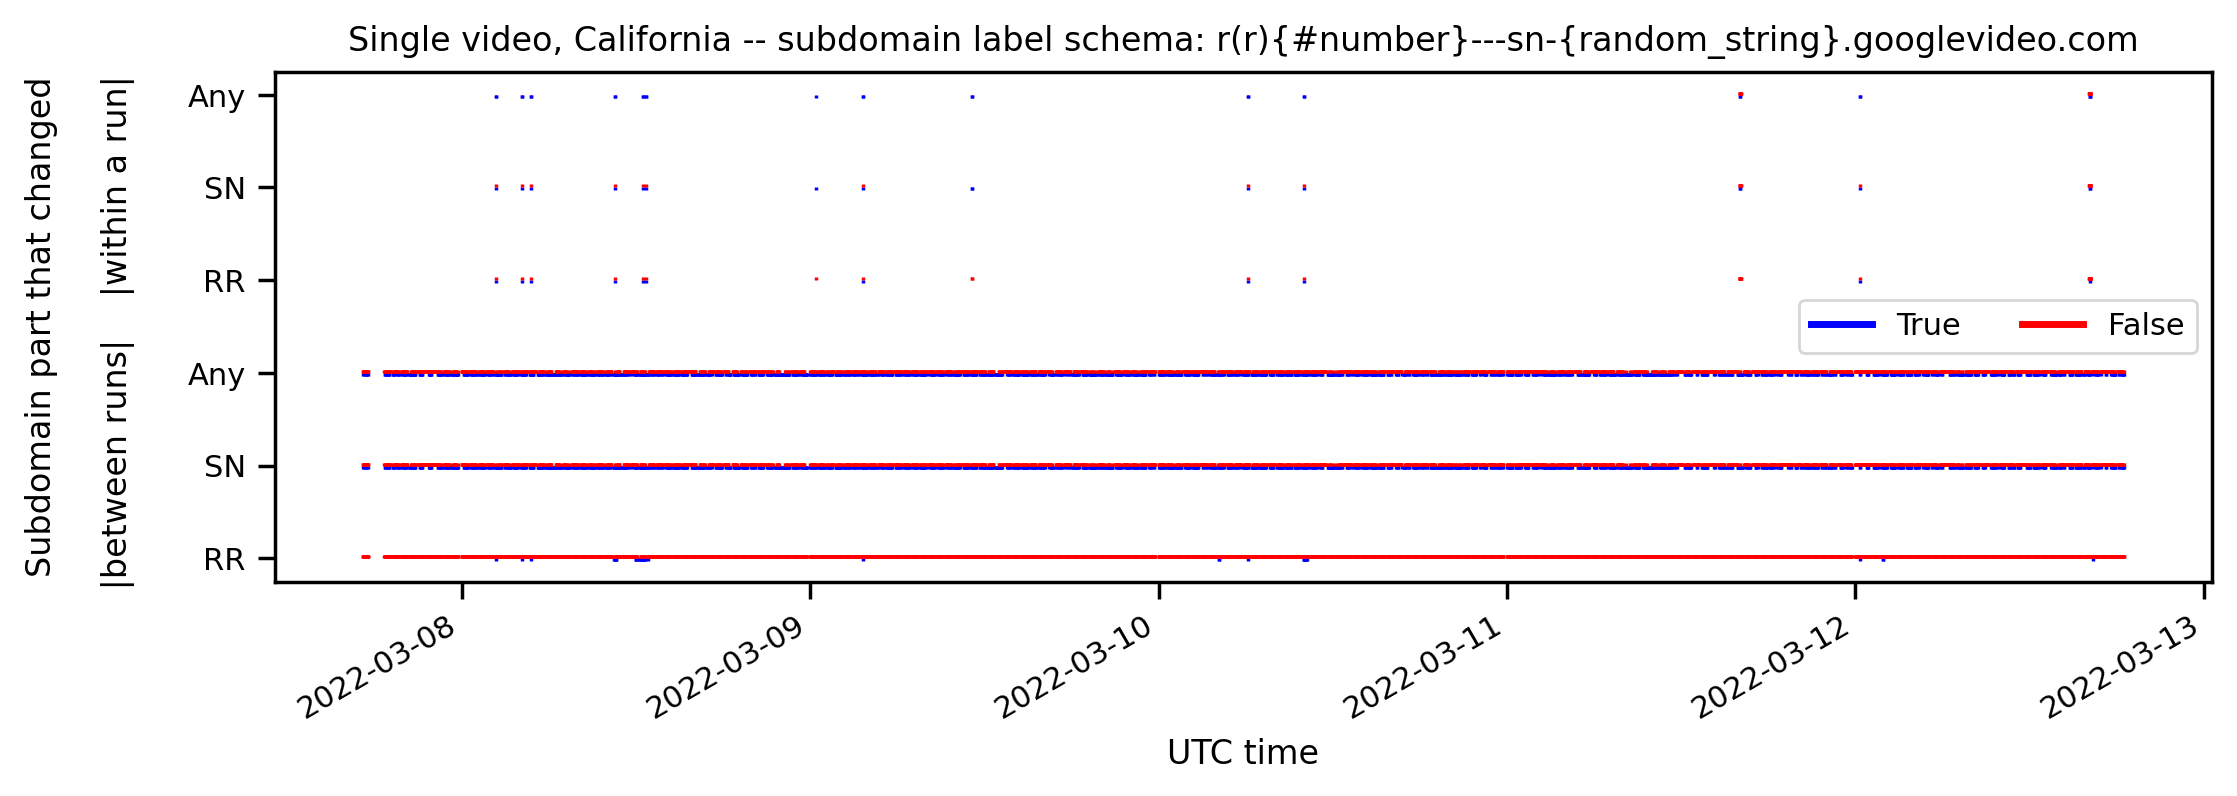

In [89]:
lookups_usw_single_video = lookups_usw[lookups_usw.video_id == 'aqz-KE-bpKQ'].copy()
lookups_usw_single_video.reset_index(drop=True, inplace=True)
lookups_usw_single_video['rr_changed_btw_msm'] = np.nan
lookups_usw_single_video['sn_changed_btw_msm'] = np.nan
lookups_usw_single_video['subdomain_changed_btw_msm'] = np.nan
lookups_usw_single_video['rr_changed_in_msm'] = np.nan
lookups_usw_single_video['sn_changed_in_msm'] = np.nan
lookups_usw_single_video['subdomain_changed_in_msm'] = np.nan
lookups_usw_single_video = lookups_usw_single_video.sort_values('first_time_seen')
last_row = pd.Series()
for index, row in lookups_usw_single_video.iterrows():
    if index == 0:
        last_row = row
        continue
    else:
        if row['msm_id'] == last_row['msm_id']:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_usw_single_video.loc[index, 'rr_changed_in_msm'] = False
            else:
                lookups_usw_single_video.loc[index, 'rr_changed_in_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_usw_single_video.loc[index, 'sn_changed_in_msm'] = False
            else:
                lookups_usw_single_video.loc[index, 'sn_changed_in_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_usw_single_video.loc[index, 'subdomain_changed_in_msm'] = False
            else:
                lookups_usw_single_video.loc[index, 'subdomain_changed_in_msm'] = True
        else:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_usw_single_video.loc[index, 'rr_changed_btw_msm'] = False
            else:
                lookups_usw_single_video.loc[index, 'rr_changed_btw_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_usw_single_video.loc[index, 'sn_changed_btw_msm'] = False
            else:
                lookups_usw_single_video.loc[index, 'sn_changed_btw_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_usw_single_video.loc[index, 'subdomain_changed_btw_msm'] = False
            else:
                lookups_usw_single_video.loc[index, 'subdomain_changed_btw_msm'] = True
        last_row = row
        
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
labels = ['rr_changed_btw_msm', 'sn_changed_btw_msm', 'subdomain_changed_btw_msm', 
          'rr_changed_in_msm', 'sn_changed_in_msm', 'subdomain_changed_in_msm']
label_map={'rr_changed_btw_msm': 'RR string changed between runs', 
           'sn_changed_btw_msm':'SN string changed between runs', 
           'subdomain_changed_btw_msm':'Whole subdomain changed between runs', 
          'rr_changed_in_msm':'RR string changed within run', 
           'sn_changed_in_msm':'SN string changed within run', 
           'subdomain_changed_in_msm':'Whole subdomain changed within run'}
cmap = {True:'blue', False:'red'}
for idx in range(len(labels)):
    label=labels[idx]
    for is_true in [True, False]:
        df_tmp = lookups_usw_single_video[(lookups_usw_single_video[label] == is_true)][['first_time_seen']].set_index('first_time_seen')
        df_tmp[label_map[label]+' '+str(is_true)] = (idx+1)/10
        df_tmp.plot(y=label_map[label]+' '+str(is_true), ax=ax, marker=is_true+2, markersize=1, drawstyle="default", lw=0, color=cmap[is_true])
#df_tmp.plot(ax=ax, marker=2, markersize=3, drawstyle="default", lw=0, color='C2')
ax.legend_.remove()
ax.set_title("Single video, California -- subdomain label schema: r(r){#number}---sn-{random_string}.googlevideo.com")
ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6])
ax.set_yticklabels(['RR', 'SN', 'Any', 'RR', 'SN', 'Any'])
ax.set_ylabel('Subdomain part that changed\n\n |      between runs      |                  |        within a run       |\n')
ax.set_ylabel('Subdomain part that changed\n\n |between runs|    |within a run|  \n')
ax.set_xlabel("UTC time")
legend_elements = [mpl.lines.Line2D([0], [0], color=cmap[legend_item], lw=2, label=legend_item, marker='') for legend_item in cmap.keys()]
plt.gca().legend(handles=legend_elements, loc='best', ncol=2)#, bbox_to_anchor=(.5, -.4))
print(lookups_usw_single_video.subdomain_changed_btw_msm.value_counts())
plt.show()

/tmp/ipykernel_20197/2656216123.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  last_row = pd.Series()


False    2329
True     1789
Name: subdomain_changed_btw_msm, dtype: int64


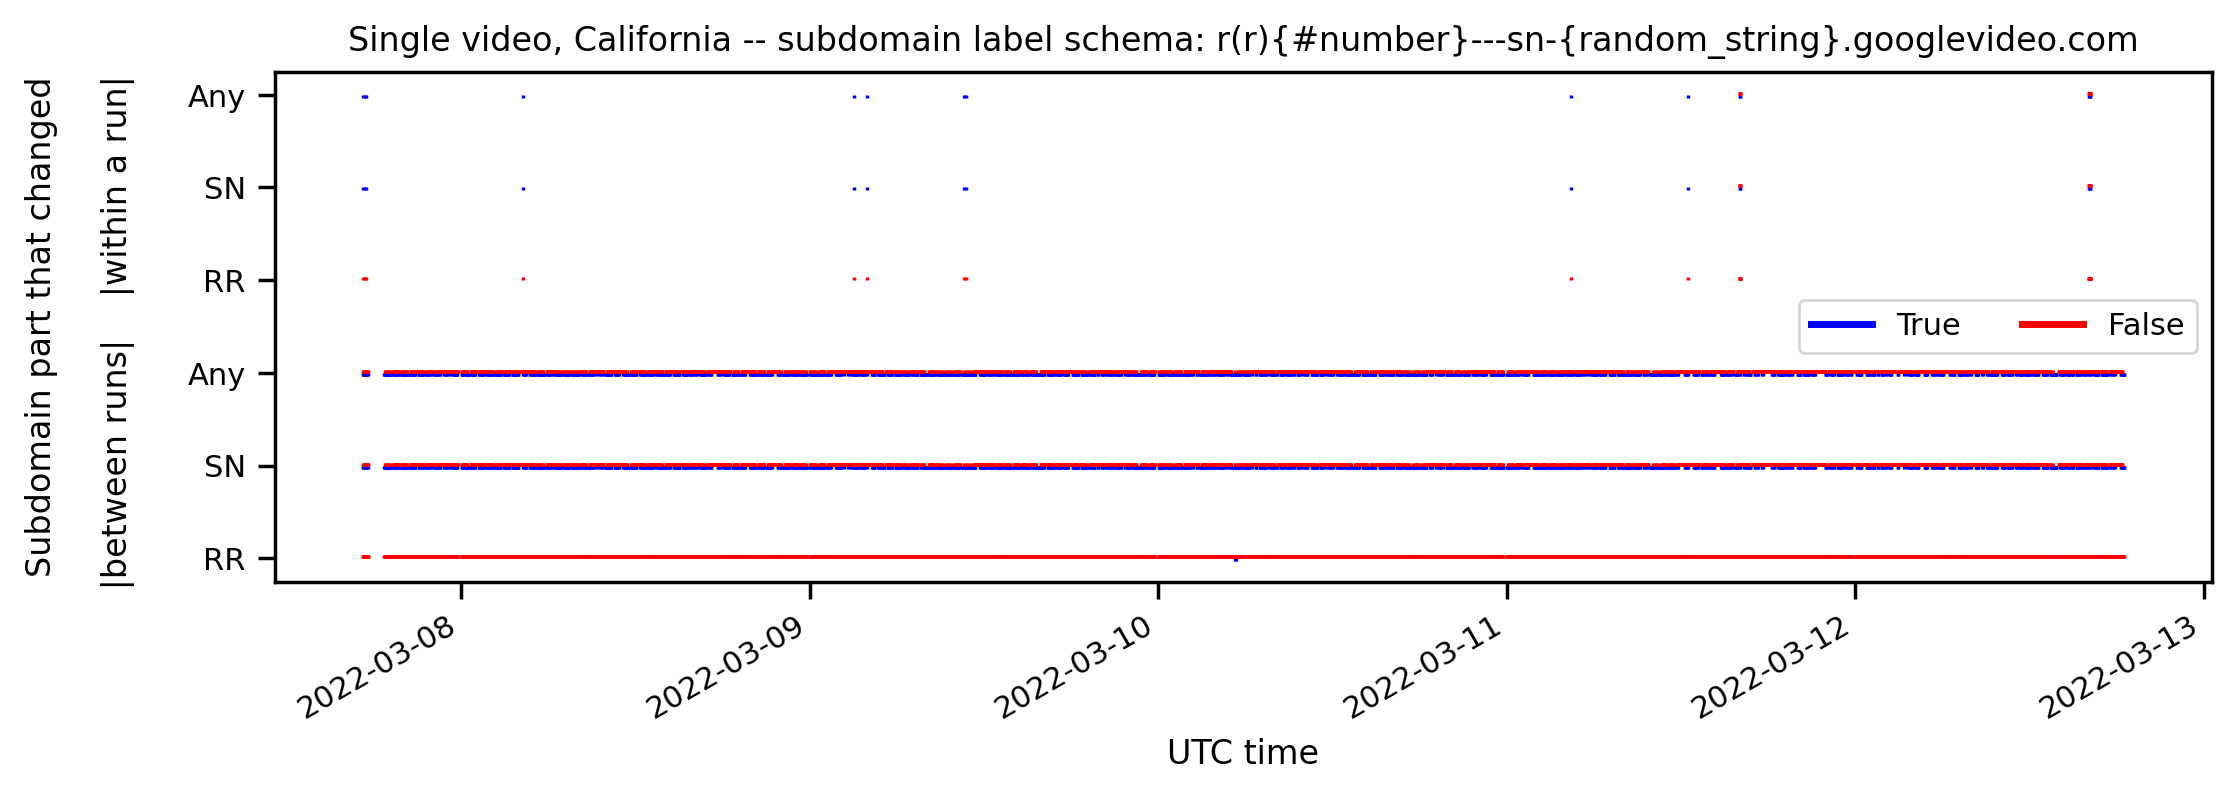

In [90]:
lookups_usw_single_video = lookups_usw[lookups_usw.video_id == 'lqiN98z6Dak'].copy()
lookups_usw_single_video.reset_index(drop=True, inplace=True)
lookups_usw_single_video['rr_changed_btw_msm'] = np.nan
lookups_usw_single_video['sn_changed_btw_msm'] = np.nan
lookups_usw_single_video['subdomain_changed_btw_msm'] = np.nan
lookups_usw_single_video['rr_changed_in_msm'] = np.nan
lookups_usw_single_video['sn_changed_in_msm'] = np.nan
lookups_usw_single_video['subdomain_changed_in_msm'] = np.nan
lookups_usw_single_video = lookups_usw_single_video.sort_values('first_time_seen')
last_row = pd.Series()
for index, row in lookups_usw_single_video.iterrows():
    if index == 0:
        last_row = row
        continue
    else:
        if row['msm_id'] == last_row['msm_id']:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_usw_single_video.loc[index, 'rr_changed_in_msm'] = False
            else:
                lookups_usw_single_video.loc[index, 'rr_changed_in_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_usw_single_video.loc[index, 'sn_changed_in_msm'] = False
            else:
                lookups_usw_single_video.loc[index, 'sn_changed_in_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_usw_single_video.loc[index, 'subdomain_changed_in_msm'] = False
            else:
                lookups_usw_single_video.loc[index, 'subdomain_changed_in_msm'] = True
        else:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_usw_single_video.loc[index, 'rr_changed_btw_msm'] = False
            else:
                lookups_usw_single_video.loc[index, 'rr_changed_btw_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_usw_single_video.loc[index, 'sn_changed_btw_msm'] = False
            else:
                lookups_usw_single_video.loc[index, 'sn_changed_btw_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_usw_single_video.loc[index, 'subdomain_changed_btw_msm'] = False
            else:
                lookups_usw_single_video.loc[index, 'subdomain_changed_btw_msm'] = True
        last_row = row
        
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
labels = ['rr_changed_btw_msm', 'sn_changed_btw_msm', 'subdomain_changed_btw_msm', 
          'rr_changed_in_msm', 'sn_changed_in_msm', 'subdomain_changed_in_msm']
label_map={'rr_changed_btw_msm': 'RR string changed between runs', 
           'sn_changed_btw_msm':'SN string changed between runs', 
           'subdomain_changed_btw_msm':'Whole subdomain changed between runs', 
          'rr_changed_in_msm':'RR string changed within run', 
           'sn_changed_in_msm':'SN string changed within run', 
           'subdomain_changed_in_msm':'Whole subdomain changed within run'}
cmap = {True:'blue', False:'red'}
for idx in range(len(labels)):
    label=labels[idx]
    for is_true in [True, False]:
        df_tmp = lookups_usw_single_video[(lookups_usw_single_video[label] == is_true)][['first_time_seen']].set_index('first_time_seen')
        df_tmp[label_map[label]+' '+str(is_true)] = (idx+1)/10
        df_tmp.plot(y=label_map[label]+' '+str(is_true), ax=ax, marker=is_true+2, markersize=1, drawstyle="default", lw=0, color=cmap[is_true])
#df_tmp.plot(ax=ax, marker=2, markersize=3, drawstyle="default", lw=0, color='C2')
ax.legend_.remove()
ax.set_title("Single video, California -- subdomain label schema: r(r){#number}---sn-{random_string}.googlevideo.com")
ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6])
ax.set_yticklabels(['RR', 'SN', 'Any', 'RR', 'SN', 'Any'])
ax.set_ylabel('Subdomain part that changed\n\n |      between runs      |                  |        within a run       |\n')
ax.set_ylabel('Subdomain part that changed\n\n |between runs|    |within a run|  \n')
ax.set_xlabel("UTC time")
legend_elements = [mpl.lines.Line2D([0], [0], color=cmap[legend_item], lw=2, label=legend_item, marker='') for legend_item in cmap.keys()]
plt.gca().legend(handles=legend_elements, loc='best', ncol=2)#, bbox_to_anchor=(.5, -.4))
print(lookups_usw_single_video.subdomain_changed_btw_msm.value_counts())
plt.show()

### US East

In [91]:
measurements_use = measurements[measurements.vantagePoint == 'US East'].copy()
lookups_use = lookups[lookups.msm_id.isin(measurements_use.msm_id.unique())].copy()
googlevideo_subdomains_use = googlevideo_subdomains[googlevideo_subdomains.msm_id.isin(measurements_use.msm_id.unique())].copy()
googlevideo_requests_use = googlevideo_requests[googlevideo_requests.msm_id.isin(measurements_use.msm_id.unique())].copy()
measurements_use.reset_index(drop=True, inplace=True)
lookups_use.reset_index(drop=True, inplace=True)

In [92]:
lookups_use[lookups_use.status == 'NOERROR'].groupby('video_subdomain', as_index=False).agg(ip_addr_count=('ip_addr',pd.Series.nunique), ip_addrs=('ip_addr',pd.Series.unique)).sort_values('ip_addr_count')

video_subdomain  ip_addr_count         ip_addrs
0    r2---sn-p5qddn7k              1    173.194.7.135
1    r4---sn-p5qlsn76              1  172.217.135.201
2    r4---sn-p5qs7n7d              1   74.125.155.234
3          redirector              1   142.250.81.238
4   rr2---sn-p5qddn7k              1    173.194.7.135
5   rr2---sn-p5qlsn7s              1  172.217.135.167
6   rr2---sn-q4fl6nsd              1     74.125.3.167
7   rr2---sn-vgqsknez              1   173.194.191.71
8   rr2---sn-vgqsrnlk              1   74.125.156.103
9   rr4---sn-p5qlsn76              1  172.217.135.201
10  rr4---sn-p5qs7n7d              1   74.125.155.234
11  rr4---sn-q4flrn7r              1   209.85.165.105
12  rr4---sn-vgqsknez              1   173.194.191.73
13  rr4---sn-vgqsknlr              1     74.125.9.105
14  rr4---sn-vgqsrnlz              1     74.125.156.9

In [93]:
measurements_use.error.unique()

array(['',
       'failed switching selenium focus to youtube iframe or monitoring loop ### Message: \n',
       'failed loading player ### Message: javascript error: player.cueVideoById is not a function\n  (Session info: headless chrome=96.0.4664.45)\nStacktrace:\n#0 0x562f0eb18ee3 <unknown>\n#1 0x562f0e5e6608 <unknown>\n#2 0x562f0e5e948c <unknown>\n#3 0x562f0e5e9286 <unknown>\n#4 0x562f0e5e9e42 <unknown>\n#5 0x562f0e64e0a3 <unknown>\n#6 0x562f0e63a272 <unknown>\n#7 0x562f0e64d3bc <unknown>\n#8 0x562f0e63a163 <unknown>\n#9 0x562f0e60fbfc <unknown>\n#10 0x562f0e610c05 <unknown>\n#11 0x562f0eb4abaa <unknown>\n#12 0x562f0eb60651 <unknown>\n#13 0x562f0eb4bb05 <unknown>\n#14 0x562f0eb61a68 <unknown>\n#15 0x562f0eb4005f <unknown>\n#16 0x562f0eb7c818 <unknown>\n#17 0x562f0eb7c998 <unknown>\n#18 0x562f0eb97eed <unknown>\n#19 0x7fed7eaf2609 <unknown>\n'],
      dtype=object)

In [94]:
lookups_use[lookups_use.status != 'NOERROR']

msm_id  \
79    87a5c79e-31ce-f699-c750-f61ccc7f44de   
681   f77df5ae-4133-19fb-7228-d2fbc038f145   
1536  4869a1c8-0944-93c6-b1d5-2bea196a0694   
2054  d2397719-b719-a8c7-0dec-53f19138f557   
2297  d1985611-227f-fb4f-9426-3c90b9d5f8a0   
2380  eb59715a-ab23-b8db-8e90-42da2f8adb18   
5145  3f656758-58d1-9d76-515f-8ac7025f7446   
6591  b3963a27-ad32-8e81-5b72-a4312f4b4087   
6792  a43ca90d-4761-90cc-51c2-8c099e6027f7   
6955  1022d240-c617-98be-0090-4c2ae05312ae   
8077  289e7d65-e7e2-d624-a980-22bd6646a6f2   
8237  9f2d094c-2b7d-4d51-90d1-a260bb78dcf7   

                                  domain       elapsed    status  \
79    rr2---sn-p5qlsn7s.googlevideo.com.  10003.985578  SERVFAIL   
681   rr4---sn-p5qlsn76.googlevideo.com.  10000.561572  SERVFAIL   
1536  rr4---sn-p5qs7n7d.googlevideo.com.  10000.322132  SERVFAIL   
2054  rr2---sn-p5qlsn7s.googlevideo.com.  10000.252311  SERVFAIL   
2297  rr4---sn-p5qs7n7d.googlevideo.com.  10001.338350  SERVFAIL   
2380  rr2---sn-p5qddn7k.googlevideo.com.  10002.476275  SERVFAIL   
5145  rr4---sn-p5qs7n7d.googlevideo.com.  10003.610092  SERVFAIL   
6591  rr2---sn-p5qddn7k.googlevideo.com.  10002.689707  SERVFAIL   
6792  rr4---sn-p5qs7n7d.googlevideo.com.  10003.956476  SERVFAIL   
6955  rr4---sn-p5qlsn76.googlevideo.com.  10000.455655  SERVFAIL   
8077  rr4---sn-p5qlsn76.googlevideo.com.  10000.438893  SERVFAIL   
8237  rr4---sn-p5qs7n7d.googlevideo.com.  10004.354688  SERVFAIL   

                                                 answer  \
79    read udp 172.31.18.219:34100->94.140.14.14:53:...   
681   read udp 172.31.18.219:52713->94.140.14.14:53:...   
1536  read udp 172.31.18.219:54292->94.140.14.14:53:...   
2054  read udp 172.31.18.219:59929->94.140.14.14:53:...   
2297  read udp 172.31.18.219:54722->94.140.14.14:53:...   
2380  read udp 172.31.18.219:53109->94.140.14.14:53:...   
5145  read udp 172.31.18.219:50974->94.140.14.14:53:...   
6591  read udp 172.31.18.219:43342->94.140.14.14:53:...   
6792  read udp 172.31.18.219:54076->94.140.14.14:53:...   
6955  read udp 172.31.18.219:49271->94.140.14.14:53:...   
8077  read udp 172.31.18.219:47444->94.140.14.14:53:...   
8237  read udp 172.31.18.219:55970->94.140.14.14:53:...   

                                                ip_addr round_robin_str  \
79    read udp 172.31.18.219:34100->94.140.14.14:53:...             rr2   
681   read udp 172.31.18.219:52713->94.140.14.14:53:...             rr4   
1536  read udp 172.31.18.219:54292->94.140.14.14:53:...             rr4   
2054  read udp 172.31.18.219:59929->94.140.14.14:53:...             rr2   
2297  read udp 172.31.18.219:54722->94.140.14.14:53:...             rr4   
2380  read udp 172.31.18.219:53109->94.140.14.14:53:...             rr2   
5145  read udp 172.31.18.219:50974->94.140.14.14:53:...             rr4   
6591  read udp 172.31.18.219:43342->94.140.14.14:53:...             rr2   
6792  read udp 172.31.18.219:54076->94.140.14.14:53:...             rr4   
6955  read udp 172.31.18.219:49271->94.140.14.14:53:...             rr4   
8077  read udp 172.31.18.219:47444->94.140.14.14:53:...             rr4   
8237  read udp 172.31.18.219:55970->94.140.14.14:53:...             rr4   

      rand_sn_str    video_subdomain  \
79    sn-p5qlsn7s  rr2---sn-p5qlsn7s   
681   sn-p5qlsn76  rr4---sn-p5qlsn76   
1536  sn-p5qs7n7d  rr4---sn-p5qs7n7d   
2054  sn-p5qlsn7s  rr2---sn-p5qlsn7s   
2297  sn-p5qs7n7d  rr4---sn-p5qs7n7d   
2380  sn-p5qddn7k  rr2---sn-p5qddn7k   
5145  sn-p5qs7n7d  rr4---sn-p5qs7n7d   
6591  sn-p5qddn7k  rr2---sn-p5qddn7k   
6792  sn-p5qs7n7d  rr4---sn-p5qs7n7d   
6955  sn-p5qlsn76  rr4---sn-p5qlsn76   
8077  sn-p5qlsn76  rr4---sn-p5qlsn76   
8237  sn-p5qs7n7d  rr4---sn-p5qs7n7d   

                                       subdomain_and_ip  \
79    rr2---sn-p5qlsn7s-read udp 172.31.18.219:34100...   
681   rr4---sn-p5qlsn76-read udp 172.31.18.219:52713...   
1536  rr4---sn-p5qs7n7d-read udp 172.31.18.219:54292...   
2054  rr2---sn-p5qlsn7s-read udp 172.31.18.219:5992

In [95]:
lookups_use = lookups_use[lookups_use.status == 'NOERROR']

In [96]:
lookups_use[lookups_use.video_subdomain == 'redirector'].video_id.value_counts()

aqz-KE-bpKQ    1
Name: video_id, dtype: int64

In [97]:
lookups_use[lookups_use.video_subdomain != 'redirector'].groupby('rand_sn_str').agg(rr_count=('round_robin_str', pd.Series.nunique)).sort_values('rr_count')

rr_count
rand_sn_str          
sn-p5qlsn7s         1
sn-q4fl6nsd         1
sn-q4flrn7r         1
sn-vgqsknlr         1
sn-vgqsrnlk         1
sn-vgqsrnlz         1
sn-p5qddn7k         2
sn-p5qlsn76         2
sn-p5qs7n7d         2
sn-vgqsknez         2

In [98]:
lookups_use[lookups_use.video_subdomain != 'redirector'].groupby('rand_sn_str').filter(lambda x: pd.Series.nunique(x['round_robin_str']) > 1).groupby('rand_sn_str', as_index=False).agg(rr_strs=('round_robin_str', pd.Series.unique))

rand_sn_str     rr_strs
0  sn-p5qddn7k   [rr2, r2]
1  sn-p5qlsn76   [rr4, r4]
2  sn-p5qs7n7d   [rr4, r4]
3  sn-vgqsknez  [rr2, rr4]

In [99]:
lookups_use = lookups_use[lookups_use.video_subdomain != 'redirector']
lookups_use.reset_index(drop=True, inplace=True)
lookups_use['rr_changed_btw_msm'] = np.nan
lookups_use['sn_changed_btw_msm'] = np.nan
lookups_use['subdomain_changed_btw_msm'] = np.nan
lookups_use['rr_changed_in_msm'] = np.nan
lookups_use['sn_changed_in_msm'] = np.nan
lookups_use['subdomain_changed_in_msm'] = np.nan
lookups_use = lookups_use.sort_values('first_time_seen')
last_row = pd.Series()
for index, row in lookups_use.iterrows():
    if index == 0:
        last_row = row
        continue
    else:
        if row['msm_id'] == last_row['msm_id']:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_use.loc[index, 'rr_changed_in_msm'] = False
            else:
                lookups_use.loc[index, 'rr_changed_in_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_use.loc[index, 'sn_changed_in_msm'] = False
            else:
                lookups_use.loc[index, 'sn_changed_in_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_use.loc[index, 'subdomain_changed_in_msm'] = False
            else:
                lookups_use.loc[index, 'subdomain_changed_in_msm'] = True
        else:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_use.loc[index, 'rr_changed_btw_msm'] = False
            else:
                lookups_use.loc[index, 'rr_changed_btw_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_use.loc[index, 'sn_changed_btw_msm'] = False
            else:
                lookups_use.loc[index, 'sn_changed_btw_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_use.loc[index, 'subdomain_changed_btw_msm'] = False
            else:
                lookups_use.loc[index, 'subdomain_changed_btw_msm'] = True
        last_row = row

print(lookups_use['ip_addr/24'].nunique())
print(lookups_use['rand_sn_str'].nunique())

/tmp/ipykernel_20197/3776462401.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  last_row = pd.Series()


8
10


In [100]:
lookups_use.groupby('rand_sn_str', as_index=False).agg(count24=('ip_addr/24', pd.Series.nunique), count16=('ip_addr/16', pd.Series.nunique)).sort_values('count16')

rand_sn_str  count24  count16
0  sn-p5qddn7k        1        1
1  sn-p5qlsn76        1        1
2  sn-p5qlsn7s        1        1
3  sn-p5qs7n7d        1        1
4  sn-q4fl6nsd        1        1
5  sn-q4flrn7r        1        1
6  sn-vgqsknez        1        1
7  sn-vgqsknlr        1        1
8  sn-vgqsrnlk        1        1
9  sn-vgqsrnlz        1        1

In [101]:
lookups_use.groupby('ip_addr/24', as_index=False).agg(count_sn=('rand_sn_str', pd.Series.unique))

ip_addr/24                    count_sn
0  172.217.135  [sn-p5qlsn7s, sn-p5qlsn76]
1  173.194.191                 sn-vgqsknez
2    173.194.7                 sn-p5qddn7k
3   209.85.165                 sn-q4flrn7r
4   74.125.155                 sn-p5qs7n7d
5   74.125.156  [sn-vgqsrnlk, sn-vgqsrnlz]
6     74.125.3                 sn-q4fl6nsd
7     74.125.9                 sn-vgqsknlr

In [102]:
lookups_use['sn_length'] = lookups_use['rand_sn_str'].str.len()
print(lookups_use.sn_length.value_counts())

11    8267
Name: sn_length, dtype: int64


In [103]:
lookups_use.groupby('ip_addr/24', as_index=False).agg(count_sn_overlap=('rand_sn_str', lambda x: count_largest_sn_overlap(pd.Series.unique(x).tolist())), sn_overlap=('rand_sn_str', lambda x: largest_sn_overlap(pd.Series.unique(x).tolist())))

ip_addr/24  count_sn_overlap   sn_overlap
0  172.217.135                10   sn-p5qlsn7
1  173.194.191                11  sn-vgqsknez
2    173.194.7                11  sn-p5qddn7k
3   209.85.165                11  sn-q4flrn7r
4   74.125.155                11  sn-p5qs7n7d
5   74.125.156                10   sn-vgqsrnl
6     74.125.3                11  sn-q4fl6nsd
7     74.125.9                11  sn-vgqsknlr

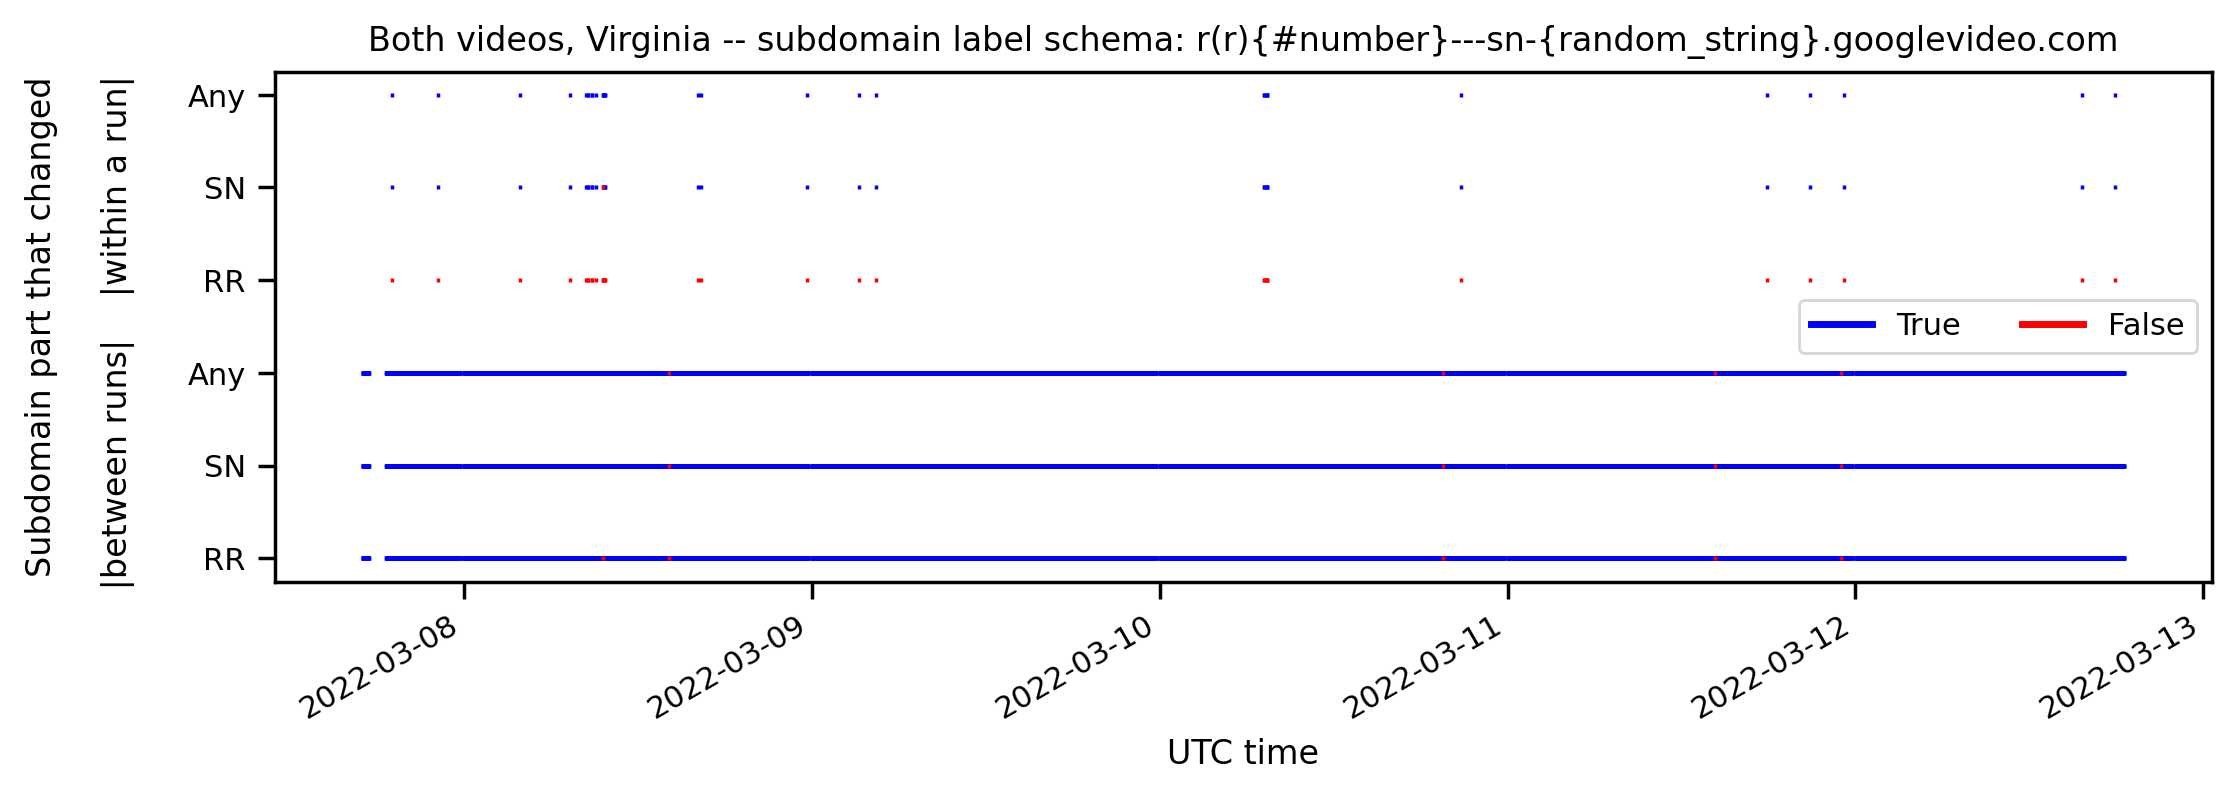

In [104]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
labels = ['rr_changed_btw_msm', 'sn_changed_btw_msm', 'subdomain_changed_btw_msm', 
          'rr_changed_in_msm', 'sn_changed_in_msm', 'subdomain_changed_in_msm']
label_map={'rr_changed_btw_msm': 'RR string changed between runs', 
           'sn_changed_btw_msm':'SN string changed between runs', 
           'subdomain_changed_btw_msm':'Whole subdomain changed between runs', 
          'rr_changed_in_msm':'RR string changed within run', 
           'sn_changed_in_msm':'SN string changed within run', 
           'subdomain_changed_in_msm':'Whole subdomain changed within run'}
cmap = {True:'blue', False:'red'}
for idx in range(len(labels)):
    label=labels[idx]
    for is_true in [True, False]:
        df_tmp = lookups_use[(lookups_use[label] == is_true)][['first_time_seen']].set_index('first_time_seen')
        df_tmp[label_map[label]+' '+str(is_true)] = idx+1.
        df_tmp.plot(y=label_map[label]+' '+str(is_true), ax=ax, marker="|", markersize=1, drawstyle="default", lw=0, color=cmap[is_true])
#df_tmp.plot(ax=ax, marker=2, markersize=3, drawstyle="default", lw=0, color='C2')
ax.legend_.remove()
ax.set_title("Both videos, Virginia -- subdomain label schema: r(r){#number}---sn-{random_string}.googlevideo.com")
ax.set_yticks([1.,2.,3.,4.,5.,6.])
ax.set_yticklabels(['RR', 'SN', 'Any', 'RR', 'SN', 'Any'])
ax.set_ylabel('Subdomain part that changed\n\n |between runs|    |within a run|  \n')
ax.set_xlabel("UTC time")
legend_elements = [mpl.lines.Line2D([0], [0], color=cmap[legend_item], lw=2, label=legend_item, marker='') for legend_item in cmap.keys()]
plt.gca().legend(handles=legend_elements, loc='best', ncol=2)#, bbox_to_anchor=(.5, -.4))

/tmp/ipykernel_20197/1577895619.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  last_row = pd.Series()


False    2078
True     2039
Name: subdomain_changed_btw_msm, dtype: int64


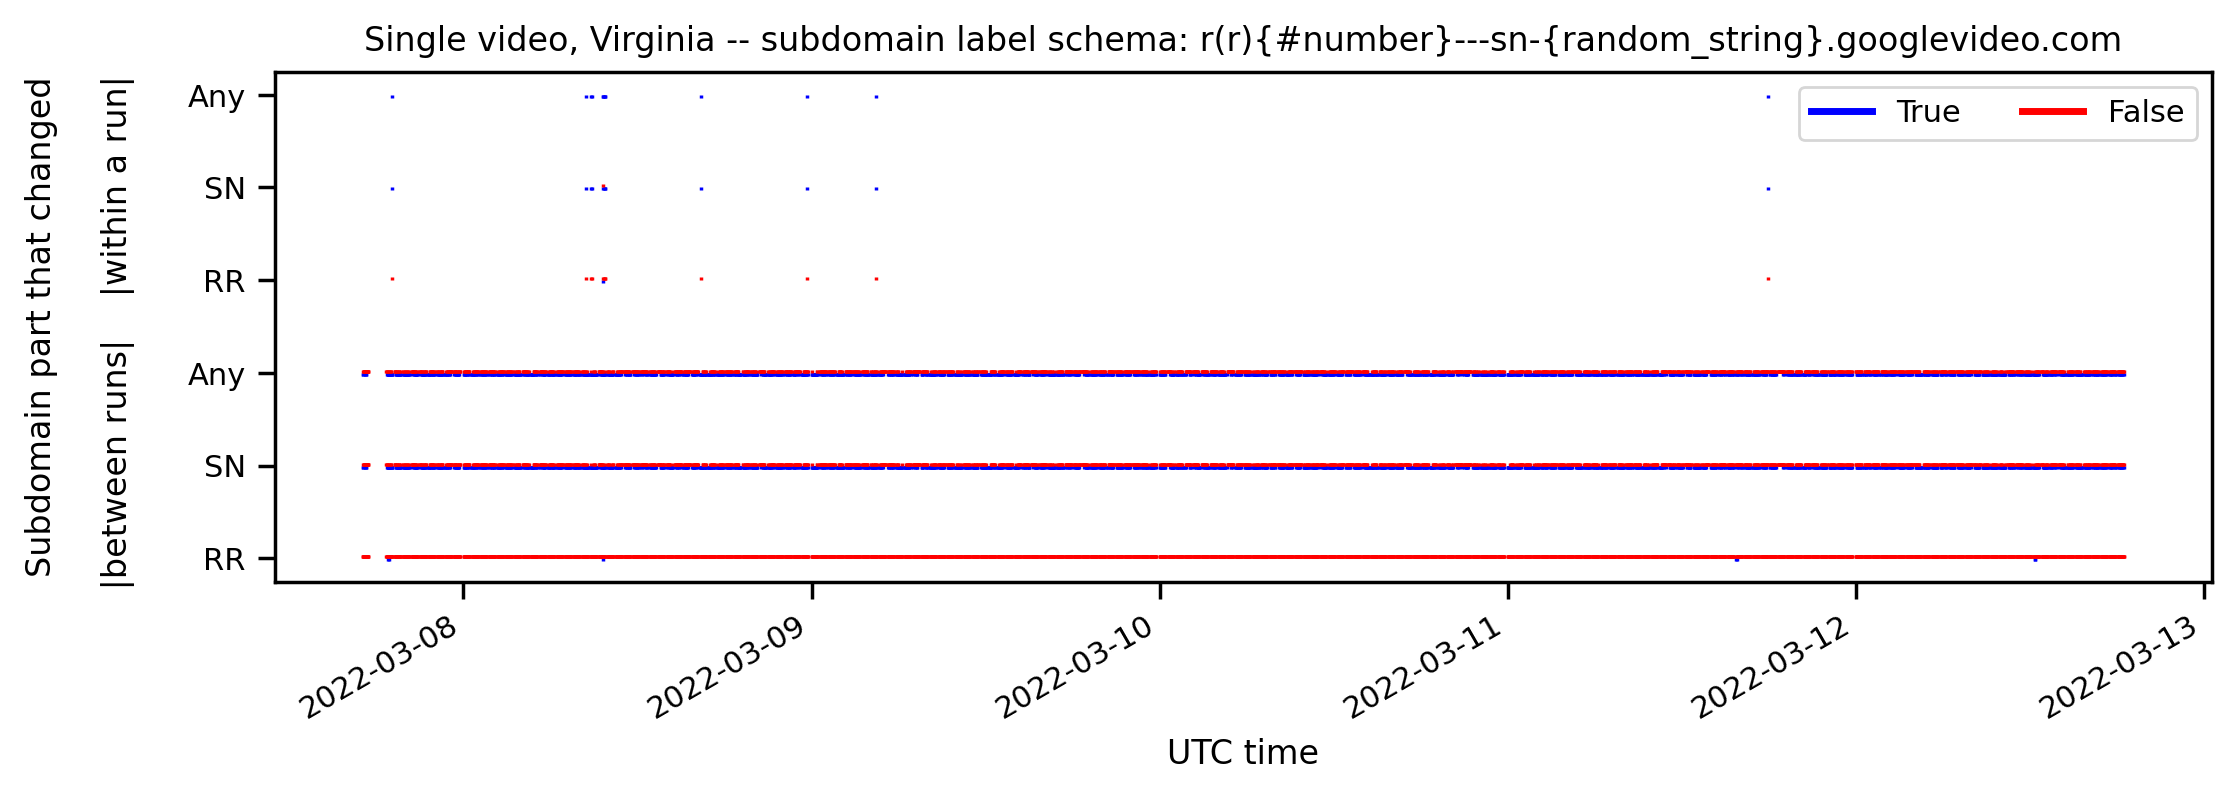

In [105]:
lookups_use_single_video = lookups_use[lookups_use.video_id == 'aqz-KE-bpKQ'].copy()
lookups_use_single_video.reset_index(drop=True, inplace=True)
lookups_use_single_video['rr_changed_btw_msm'] = np.nan
lookups_use_single_video['sn_changed_btw_msm'] = np.nan
lookups_use_single_video['subdomain_changed_btw_msm'] = np.nan
lookups_use_single_video['rr_changed_in_msm'] = np.nan
lookups_use_single_video['sn_changed_in_msm'] = np.nan
lookups_use_single_video['subdomain_changed_in_msm'] = np.nan
lookups_use_single_video = lookups_use_single_video.sort_values('first_time_seen')
last_row = pd.Series()
for index, row in lookups_use_single_video.iterrows():
    if index == 0:
        last_row = row
        continue
    else:
        if row['msm_id'] == last_row['msm_id']:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_use_single_video.loc[index, 'rr_changed_in_msm'] = False
            else:
                lookups_use_single_video.loc[index, 'rr_changed_in_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_use_single_video.loc[index, 'sn_changed_in_msm'] = False
            else:
                lookups_use_single_video.loc[index, 'sn_changed_in_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_use_single_video.loc[index, 'subdomain_changed_in_msm'] = False
            else:
                lookups_use_single_video.loc[index, 'subdomain_changed_in_msm'] = True
        else:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_use_single_video.loc[index, 'rr_changed_btw_msm'] = False
            else:
                lookups_use_single_video.loc[index, 'rr_changed_btw_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_use_single_video.loc[index, 'sn_changed_btw_msm'] = False
            else:
                lookups_use_single_video.loc[index, 'sn_changed_btw_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_use_single_video.loc[index, 'subdomain_changed_btw_msm'] = False
            else:
                lookups_use_single_video.loc[index, 'subdomain_changed_btw_msm'] = True
        last_row = row
        
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
labels = ['rr_changed_btw_msm', 'sn_changed_btw_msm', 'subdomain_changed_btw_msm', 
          'rr_changed_in_msm', 'sn_changed_in_msm', 'subdomain_changed_in_msm']
label_map={'rr_changed_btw_msm': 'RR string changed between runs', 
           'sn_changed_btw_msm':'SN string changed between runs', 
           'subdomain_changed_btw_msm':'Whole subdomain changed between runs', 
          'rr_changed_in_msm':'RR string changed within run', 
           'sn_changed_in_msm':'SN string changed within run', 
           'subdomain_changed_in_msm':'Whole subdomain changed within run'}
cmap = {True:'blue', False:'red'}
for idx in range(len(labels)):
    label=labels[idx]
    for is_true in [True, False]:
        df_tmp = lookups_use_single_video[(lookups_use_single_video[label] == is_true)][['first_time_seen']].set_index('first_time_seen')
        df_tmp[label_map[label]+' '+str(is_true)] = (idx+1)/10
        df_tmp.plot(y=label_map[label]+' '+str(is_true), ax=ax, marker=is_true+2, markersize=1, drawstyle="default", lw=0, color=cmap[is_true])
#df_tmp.plot(ax=ax, marker=2, markersize=3, drawstyle="default", lw=0, color='C2')
ax.legend_.remove()
ax.set_title("Single video, Virginia -- subdomain label schema: r(r){#number}---sn-{random_string}.googlevideo.com")
ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6])
ax.set_yticklabels(['RR', 'SN', 'Any', 'RR', 'SN', 'Any'])
ax.set_ylabel('Subdomain part that changed\n\n |      between runs      |                  |        within a run       |\n')
ax.set_ylabel('Subdomain part that changed\n\n |between runs|    |within a run|  \n')
ax.set_xlabel("UTC time")
legend_elements = [mpl.lines.Line2D([0], [0], color=cmap[legend_item], lw=2, label=legend_item, marker='') for legend_item in cmap.keys()]
plt.gca().legend(handles=legend_elements, loc='best', ncol=2)#, bbox_to_anchor=(.5, -.4))
print(lookups_use_single_video.subdomain_changed_btw_msm.value_counts())
plt.show()

/tmp/ipykernel_20197/2208240698.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  last_row = pd.Series()


True     2067
False    2050
Name: subdomain_changed_btw_msm, dtype: int64


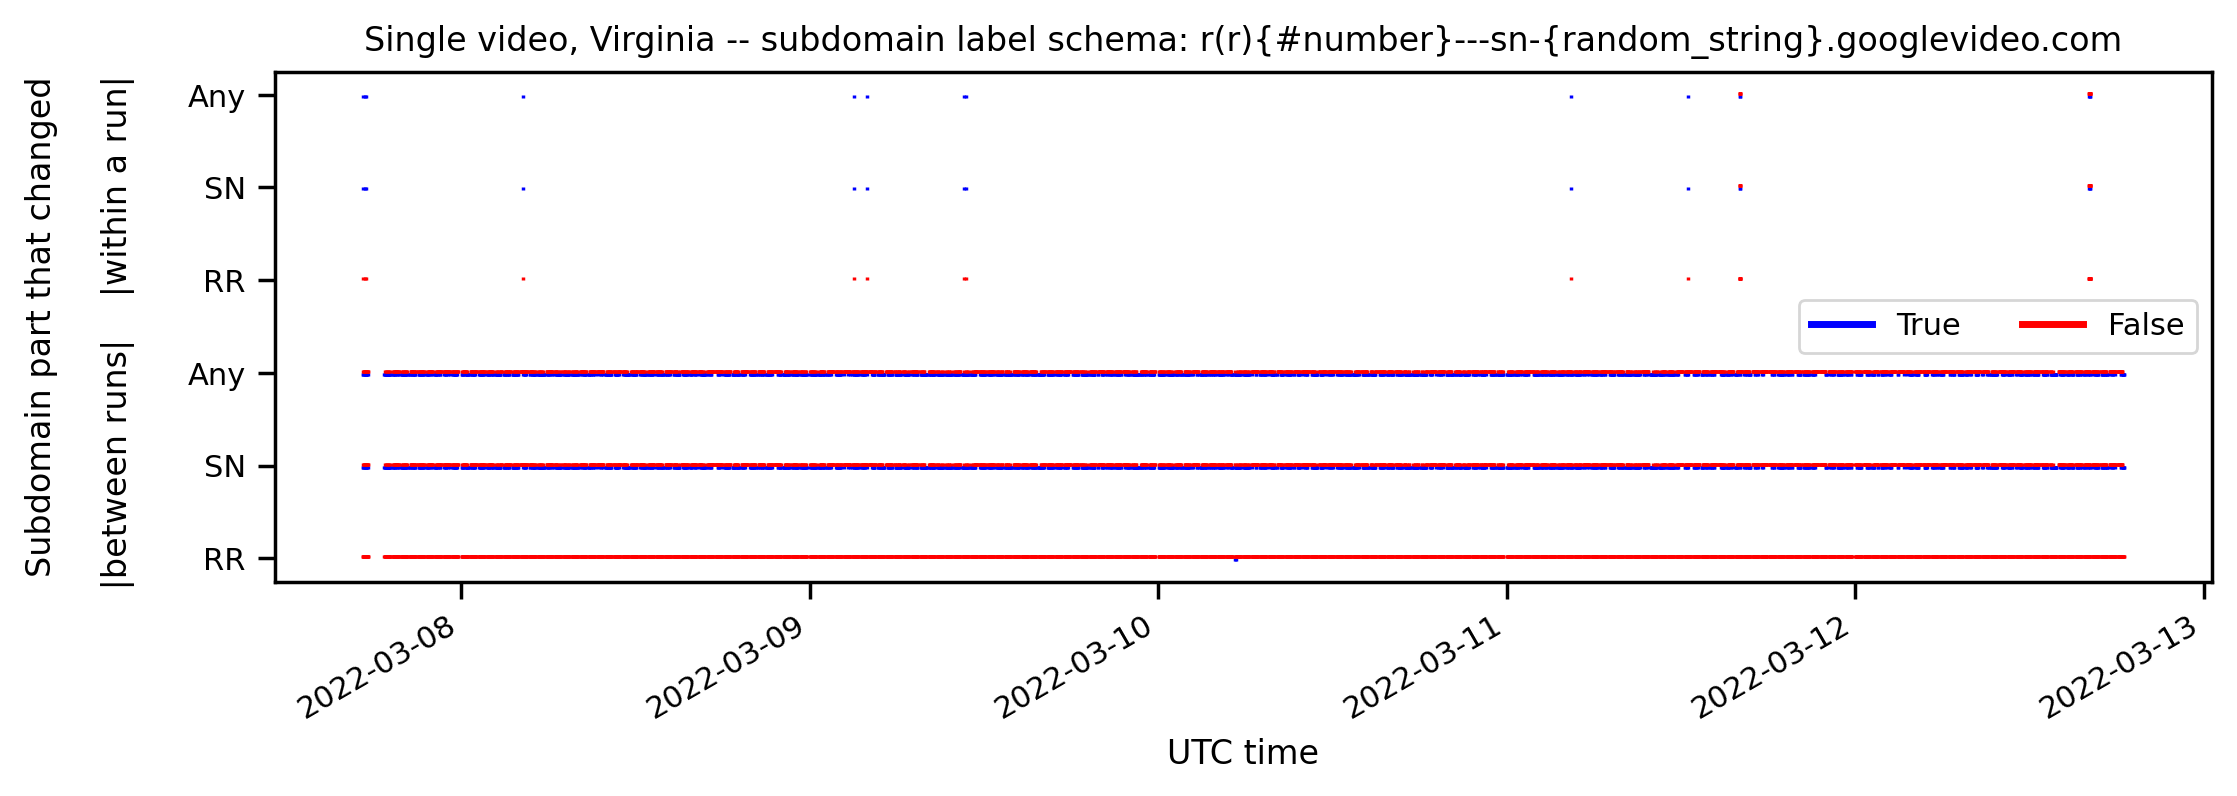

In [106]:
lookups_use_single_video = lookups_use[lookups_use.video_id == 'lqiN98z6Dak'].copy()
lookups_use_single_video.reset_index(drop=True, inplace=True)
lookups_use_single_video['rr_changed_btw_msm'] = np.nan
lookups_use_single_video['sn_changed_btw_msm'] = np.nan
lookups_use_single_video['subdomain_changed_btw_msm'] = np.nan
lookups_use_single_video['rr_changed_in_msm'] = np.nan
lookups_use_single_video['sn_changed_in_msm'] = np.nan
lookups_use_single_video['subdomain_changed_in_msm'] = np.nan
lookups_use_single_video = lookups_use_single_video.sort_values('first_time_seen')
last_row = pd.Series()
for index, row in lookups_use_single_video.iterrows():
    if index == 0:
        last_row = row
        continue
    else:
        if row['msm_id'] == last_row['msm_id']:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_use_single_video.loc[index, 'rr_changed_in_msm'] = False
            else:
                lookups_use_single_video.loc[index, 'rr_changed_in_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_use_single_video.loc[index, 'sn_changed_in_msm'] = False
            else:
                lookups_use_single_video.loc[index, 'sn_changed_in_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_use_single_video.loc[index, 'subdomain_changed_in_msm'] = False
            else:
                lookups_use_single_video.loc[index, 'subdomain_changed_in_msm'] = True
        else:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_use_single_video.loc[index, 'rr_changed_btw_msm'] = False
            else:
                lookups_use_single_video.loc[index, 'rr_changed_btw_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_use_single_video.loc[index, 'sn_changed_btw_msm'] = False
            else:
                lookups_use_single_video.loc[index, 'sn_changed_btw_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_use_single_video.loc[index, 'subdomain_changed_btw_msm'] = False
            else:
                lookups_use_single_video.loc[index, 'subdomain_changed_btw_msm'] = True
        last_row = row
        
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
labels = ['rr_changed_btw_msm', 'sn_changed_btw_msm', 'subdomain_changed_btw_msm', 
          'rr_changed_in_msm', 'sn_changed_in_msm', 'subdomain_changed_in_msm']
label_map={'rr_changed_btw_msm': 'RR string changed between runs', 
           'sn_changed_btw_msm':'SN string changed between runs', 
           'subdomain_changed_btw_msm':'Whole subdomain changed between runs', 
          'rr_changed_in_msm':'RR string changed within run', 
           'sn_changed_in_msm':'SN string changed within run', 
           'subdomain_changed_in_msm':'Whole subdomain changed within run'}
cmap = {True:'blue', False:'red'}
for idx in range(len(labels)):
    label=labels[idx]
    for is_true in [True, False]:
        df_tmp = lookups_usw_single_video[(lookups_usw_single_video[label] == is_true)][['first_time_seen']].set_index('first_time_seen')
        df_tmp[label_map[label]+' '+str(is_true)] = (idx+1)/10
        df_tmp.plot(y=label_map[label]+' '+str(is_true), ax=ax, marker=is_true+2, markersize=1, drawstyle="default", lw=0, color=cmap[is_true])
#df_tmp.plot(ax=ax, marker=2, markersize=3, drawstyle="default", lw=0, color='C2')
ax.legend_.remove()
ax.set_title("Single video, Virginia -- subdomain label schema: r(r){#number}---sn-{random_string}.googlevideo.com")
ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6])
ax.set_yticklabels(['RR', 'SN', 'Any', 'RR', 'SN', 'Any'])
ax.set_ylabel('Subdomain part that changed\n\n |      between runs      |                  |        within a run       |\n')
ax.set_ylabel('Subdomain part that changed\n\n |between runs|    |within a run|  \n')
ax.set_xlabel("UTC time")
legend_elements = [mpl.lines.Line2D([0], [0], color=cmap[legend_item], lw=2, label=legend_item, marker='') for legend_item in cmap.keys()]
plt.gca().legend(handles=legend_elements, loc='best', ncol=2)#, bbox_to_anchor=(.5, -.4))
print(lookups_use_single_video.subdomain_changed_btw_msm.value_counts())
plt.show()

In [107]:
measurements.vantagePoint.unique()

array(['Africa South', 'Asia Pacific Northeast', 'Asia Pacific Southeast',
       'Europe Central', 'South America East', 'US East', 'US West'],
      dtype=object)

### South Africa

In [108]:
measurements_sa = measurements[measurements.vantagePoint == 'Africa South'].copy()
lookups_sa = lookups[lookups.msm_id.isin(measurements_sa.msm_id.unique())].copy()
googlevideo_subdomains_sa = googlevideo_subdomains[googlevideo_subdomains.msm_id.isin(measurements_sa.msm_id.unique())].copy()
googlevideo_requests_sa = googlevideo_requests[googlevideo_requests.msm_id.isin(measurements_sa.msm_id.unique())].copy()
measurements_sa.reset_index(drop=True, inplace=True)
lookups_sa.reset_index(drop=True, inplace=True)

In [109]:
lookups_sa[lookups_sa.status == 'NOERROR'].groupby('video_subdomain', as_index=False).agg(ip_addr_count=('ip_addr',pd.Series.nunique), ip_addrs=('ip_addr',pd.Series.unique)).sort_values('ip_addr_count')

video_subdomain  ip_addr_count  \
0    r2---sn-5hnekn7z              1   
1    r2---sn-woc7ln7y              1   
2    r4---sn-5hnekn7k              1   
3    r4---sn-woc7ln7y              1   
5   rr2---sn-4g5ednly              1   
6   rr2---sn-5hne6nsr              1   
7   rr2---sn-5hnekn7z              1   
8   rr2---sn-woc7ln7y              1   
9   rr4---sn-5hne6nz6              1   
10  rr4---sn-5hnedn7e              1   
11  rr4---sn-5hnekn7k              1   
12  rr4---sn-woc7ln7y              1   
4          redirector              5   

                                             ip_addrs  
0                                      74.125.100.103  
1                                     173.194.128.167  
2                                       209.85.226.73  
3                                     173.194.128.169  
5                                     173.194.187.231  
6                                      172.217.132.71  
7                                      74.125.100.103  
8                                     173.194.128.167  
9                                      74.125.100.201  
10                                     74.125.100.138  
11                                      209.85.226.73  
12                                    173.194.128.169  
4   [142.250.187.238, 172.217.169.78, 142.250.180....

In [110]:
measurements_sa.error.unique()

array(['',
       'failed switching selenium focus to youtube iframe or monitoring loop ### Message: stale element reference: element is not attached to the page document\n  (Session info: headless chrome=96.0.4664.45)\nStacktrace:\n#0 0x5599148e7ee3 <unknown>\n#1 0x5599143b5608 <unknown>\n#2 0x5599143b848c <unknown>\n#3 0x5599143b8286 <unknown>\n#4 0x5599143b8e42 <unknown>\n#5 0x55991441d0a3 <unknown>\n#6 0x559914409272 <unknown>\n#7 0x55991441c3bc <unknown>\n#8 0x559914409163 <unknown>\n#9 0x5599143debfc <unknown>\n#10 0x5599143dfc05 <unknown>\n#11 0x559914919baa <unknown>\n#12 0x55991492f651 <unknown>\n#13 0x55991491ab05 <unknown>\n#14 0x559914930a68 <unknown>\n#15 0x55991490f05f <unknown>\n#16 0x55991494b818 <unknown>\n#17 0x55991494b998 <unknown>\n#18 0x559914966eed <unknown>\n#19 0x7f9aa94a4609 <unknown>\n',
       'failed switching selenium focus to youtube iframe or monitoring loop ### Message: \n',
       'failed switching selenium focus to youtube iframe or monitoring loop ##

In [111]:
lookups_sa[lookups_sa.status != 'NOERROR']

msm_id  \
9656  8c063aa3-50a8-911d-f8d6-4d3dbbc1d359   

                                  domain       elapsed    status  \
9656  rr2---sn-5hne6nsr.googlevideo.com.  10002.268395  SERVFAIL   

                                                 answer  \
9656  read udp 172.31.27.22:39745->185.121.25.64:53:...   

                                                ip_addr round_robin_str  \
9656  read udp 172.31.27.22:39745->185.121.25.64:53:...             rr2   

      rand_sn_str    video_subdomain  \
9656  sn-5hne6nsr  rr2---sn-5hne6nsr   

                                       subdomain_and_ip  \
9656  rr2---sn-5hne6nsr-read udp 172.31.27.22:39745-...   

                            googlevideo               first_time_seen  \
9656  rr2---sn-5hne6nsr.googlevideo.com 2022-03-12 00:25:59.724600064   

                                   ip_addr/24  \
9656  read udp 172.31.27.22:39745->185.121.25   

                                ip_addr/16     video_id player_dimensions  \
9656  read udp 172.31.27.22:39745->185.121  aqz-KE-bpKQ         1920x1080   

                      timestamp  
9656 2022-03-12 00:25:41.031223

In [112]:
lookups_sa = lookups_sa[lookups_sa.status == 'NOERROR']

In [113]:
lookups_sa[lookups_sa.video_subdomain == 'redirector'].video_id.value_counts()

lqiN98z6Dak    4
aqz-KE-bpKQ    3
Name: video_id, dtype: int64

In [114]:
lookups_sa[lookups_sa.video_subdomain != 'redirector'].groupby('rand_sn_str').agg(rr_count=('round_robin_str', pd.Series.nunique)).sort_values('rr_count')

rr_count
rand_sn_str          
sn-4g5ednly         1
sn-5hne6nsr         1
sn-5hne6nz6         1
sn-5hnedn7e         1
sn-5hnekn7k         2
sn-5hnekn7z         2
sn-woc7ln7y         4

In [115]:
lookups_sa[lookups_sa.video_subdomain != 'redirector'].groupby('rand_sn_str').filter(lambda x: pd.Series.nunique(x['round_robin_str']) > 1).groupby('rand_sn_str', as_index=False).agg(rr_strs=('round_robin_str', pd.Series.unique))

rand_sn_str             rr_strs
0  sn-5hnekn7k           [rr4, r4]
1  sn-5hnekn7z           [rr2, r2]
2  sn-woc7ln7y  [rr2, rr4, r4, r2]

In [116]:
lookups_sa = lookups_sa[lookups_sa.video_subdomain != 'redirector']
lookups_sa.reset_index(drop=True, inplace=True)
lookups_sa['rr_changed_btw_msm'] = np.nan
lookups_sa['sn_changed_btw_msm'] = np.nan
lookups_sa['subdomain_changed_btw_msm'] = np.nan
lookups_sa['rr_changed_in_msm'] = np.nan
lookups_sa['sn_changed_in_msm'] = np.nan
lookups_sa['subdomain_changed_in_msm'] = np.nan
lookups_sa = lookups_sa.sort_values('first_time_seen')
last_row = pd.Series()
for index, row in lookups_sa.iterrows():
    if index == 0:
        last_row = row
        continue
    else:
        if row['msm_id'] == last_row['msm_id']:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_sa.loc[index, 'rr_changed_in_msm'] = False
            else:
                lookups_sa.loc[index, 'rr_changed_in_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_sa.loc[index, 'sn_changed_in_msm'] = False
            else:
                lookups_sa.loc[index, 'sn_changed_in_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_sa.loc[index, 'subdomain_changed_in_msm'] = False
            else:
                lookups_sa.loc[index, 'subdomain_changed_in_msm'] = True
        else:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_sa.loc[index, 'rr_changed_btw_msm'] = False
            else:
                lookups_sa.loc[index, 'rr_changed_btw_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_sa.loc[index, 'sn_changed_btw_msm'] = False
            else:
                lookups_sa.loc[index, 'sn_changed_btw_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_sa.loc[index, 'subdomain_changed_btw_msm'] = False
            else:
                lookups_sa.loc[index, 'subdomain_changed_btw_msm'] = True
        last_row = row

print(lookups_sa['ip_addr/24'].nunique())
print(lookups_sa['rand_sn_str'].nunique())

/tmp/ipykernel_20197/3772483349.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  last_row = pd.Series()


5
7


In [117]:
lookups_sa.groupby('rand_sn_str', as_index=False).agg(count24=('ip_addr/24', pd.Series.nunique), count16=('ip_addr/16', pd.Series.nunique)).sort_values('count16')

rand_sn_str  count24  count16
0  sn-4g5ednly        1        1
1  sn-5hne6nsr        1        1
2  sn-5hne6nz6        1        1
3  sn-5hnedn7e        1        1
4  sn-5hnekn7k        1        1
5  sn-5hnekn7z        1        1
6  sn-woc7ln7y        1        1

In [118]:
lookups_sa.groupby('ip_addr/24', as_index=False).agg(count_sn=('rand_sn_str', pd.Series.unique))

ip_addr/24                                 count_sn
0  172.217.132                              sn-5hne6nsr
1  173.194.128                              sn-woc7ln7y
2  173.194.187                              sn-4g5ednly
3   209.85.226                              sn-5hnekn7k
4   74.125.100  [sn-5hnekn7z, sn-5hne6nz6, sn-5hnedn7e]

In [119]:
lookups_sa['sn_length'] = lookups_sa['rand_sn_str'].str.len()
print(lookups_sa.sn_length.value_counts())

11    11206
Name: sn_length, dtype: int64


In [120]:
lookups_sa.groupby('ip_addr/24', as_index=False).agg(count_sn_overlap=('rand_sn_str', lambda x: count_largest_sn_overlap(pd.Series.unique(x).tolist())), sn_overlap=('rand_sn_str', lambda x: largest_sn_overlap(pd.Series.unique(x).tolist())))

ip_addr/24  count_sn_overlap   sn_overlap
0  172.217.132                11  sn-5hne6nsr
1  173.194.128                11  sn-woc7ln7y
2  173.194.187                11  sn-4g5ednly
3   209.85.226                11  sn-5hnekn7k
4   74.125.100                 7      sn-5hne

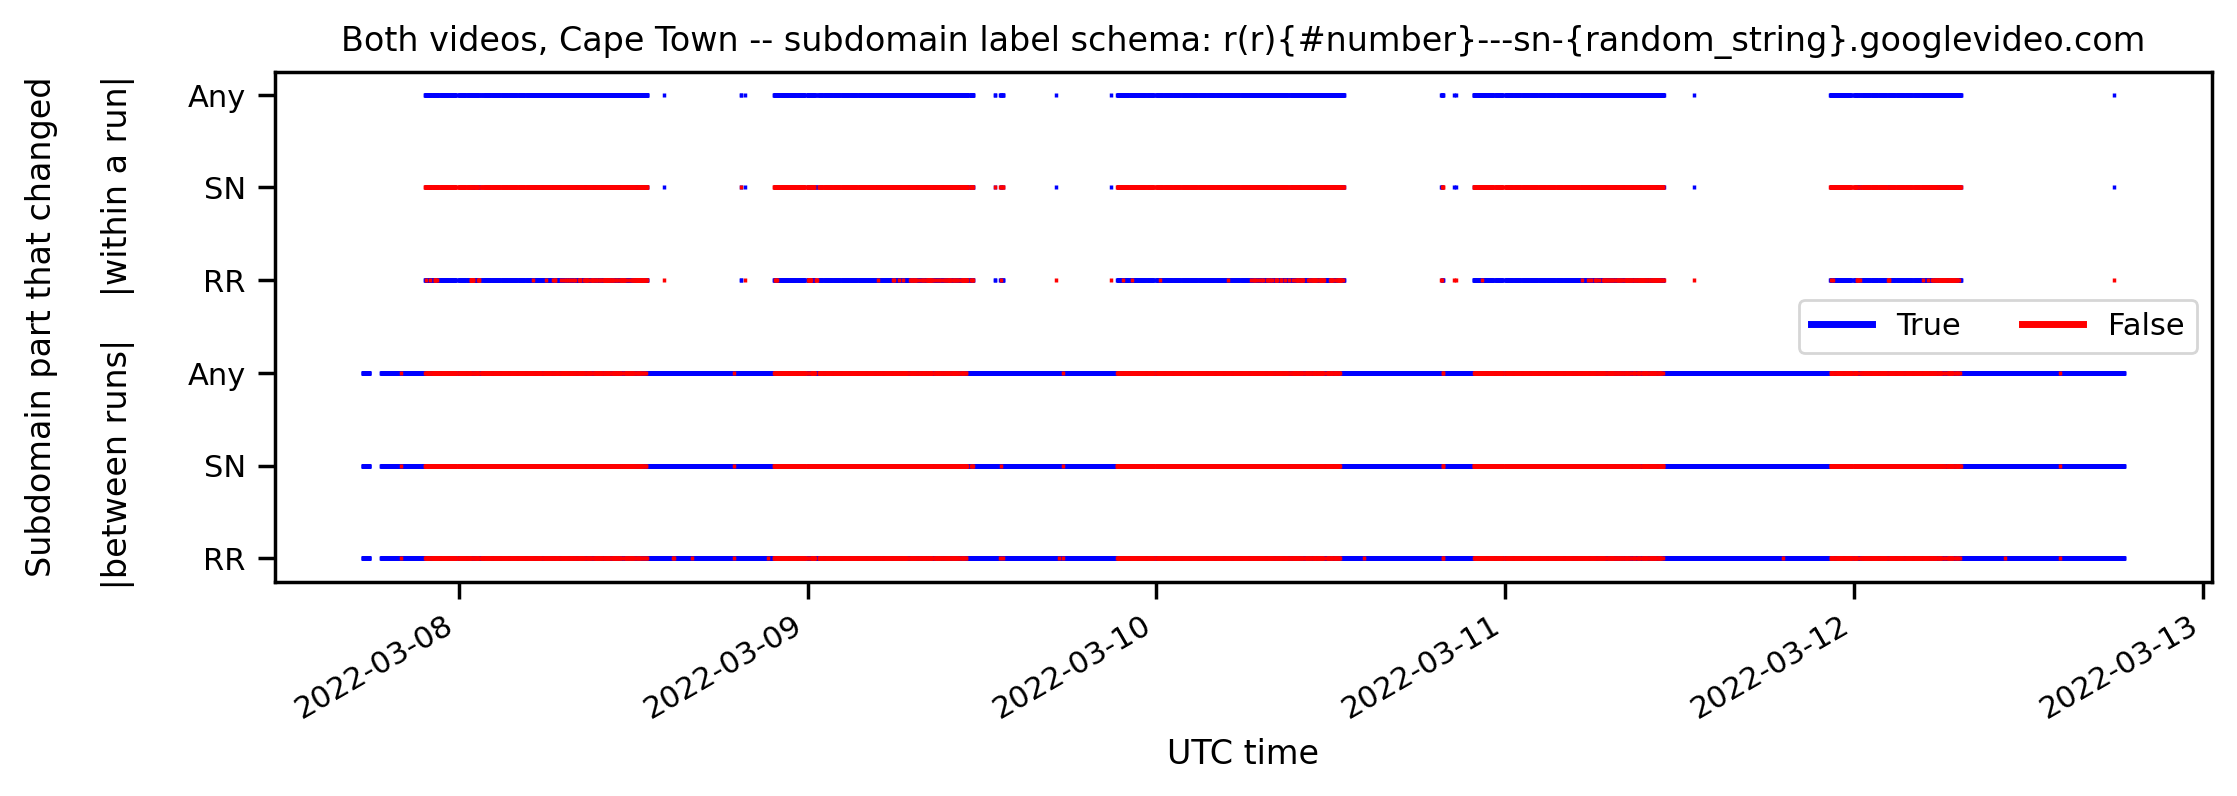

In [121]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
labels = ['rr_changed_btw_msm', 'sn_changed_btw_msm', 'subdomain_changed_btw_msm', 
          'rr_changed_in_msm', 'sn_changed_in_msm', 'subdomain_changed_in_msm']
label_map={'rr_changed_btw_msm': 'RR string changed between runs', 
           'sn_changed_btw_msm':'SN string changed between runs', 
           'subdomain_changed_btw_msm':'Whole subdomain changed between runs', 
          'rr_changed_in_msm':'RR string changed within run', 
           'sn_changed_in_msm':'SN string changed within run', 
           'subdomain_changed_in_msm':'Whole subdomain changed within run'}
cmap = {True:'blue', False:'red'}
for idx in range(len(labels)):
    label=labels[idx]
    for is_true in [True, False]:
        df_tmp = lookups_sa[(lookups_sa[label] == is_true)][['first_time_seen']].set_index('first_time_seen')
        df_tmp[label_map[label]+' '+str(is_true)] = idx+1.
        df_tmp.plot(y=label_map[label]+' '+str(is_true), ax=ax, marker="|", markersize=1, drawstyle="default", lw=0, color=cmap[is_true])
#df_tmp.plot(ax=ax, marker=2, markersize=3, drawstyle="default", lw=0, color='C2')
ax.legend_.remove()
ax.set_title("Both videos, Cape Town -- subdomain label schema: r(r){#number}---sn-{random_string}.googlevideo.com")
ax.set_yticks([1.,2.,3.,4.,5.,6.])
ax.set_yticklabels(['RR', 'SN', 'Any', 'RR', 'SN', 'Any'])
ax.set_ylabel('Subdomain part that changed\n\n |between runs|    |within a run|  \n')
ax.set_xlabel("UTC time")
legend_elements = [mpl.lines.Line2D([0], [0], color=cmap[legend_item], lw=2, label=legend_item, marker='') for legend_item in cmap.keys()]
plt.gca().legend(handles=legend_elements, loc='best', ncol=2)#, bbox_to_anchor=(.5, -.4))

/tmp/ipykernel_20197/1782338029.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  last_row = pd.Series()


True     3056
False    1042
Name: subdomain_changed_btw_msm, dtype: int64


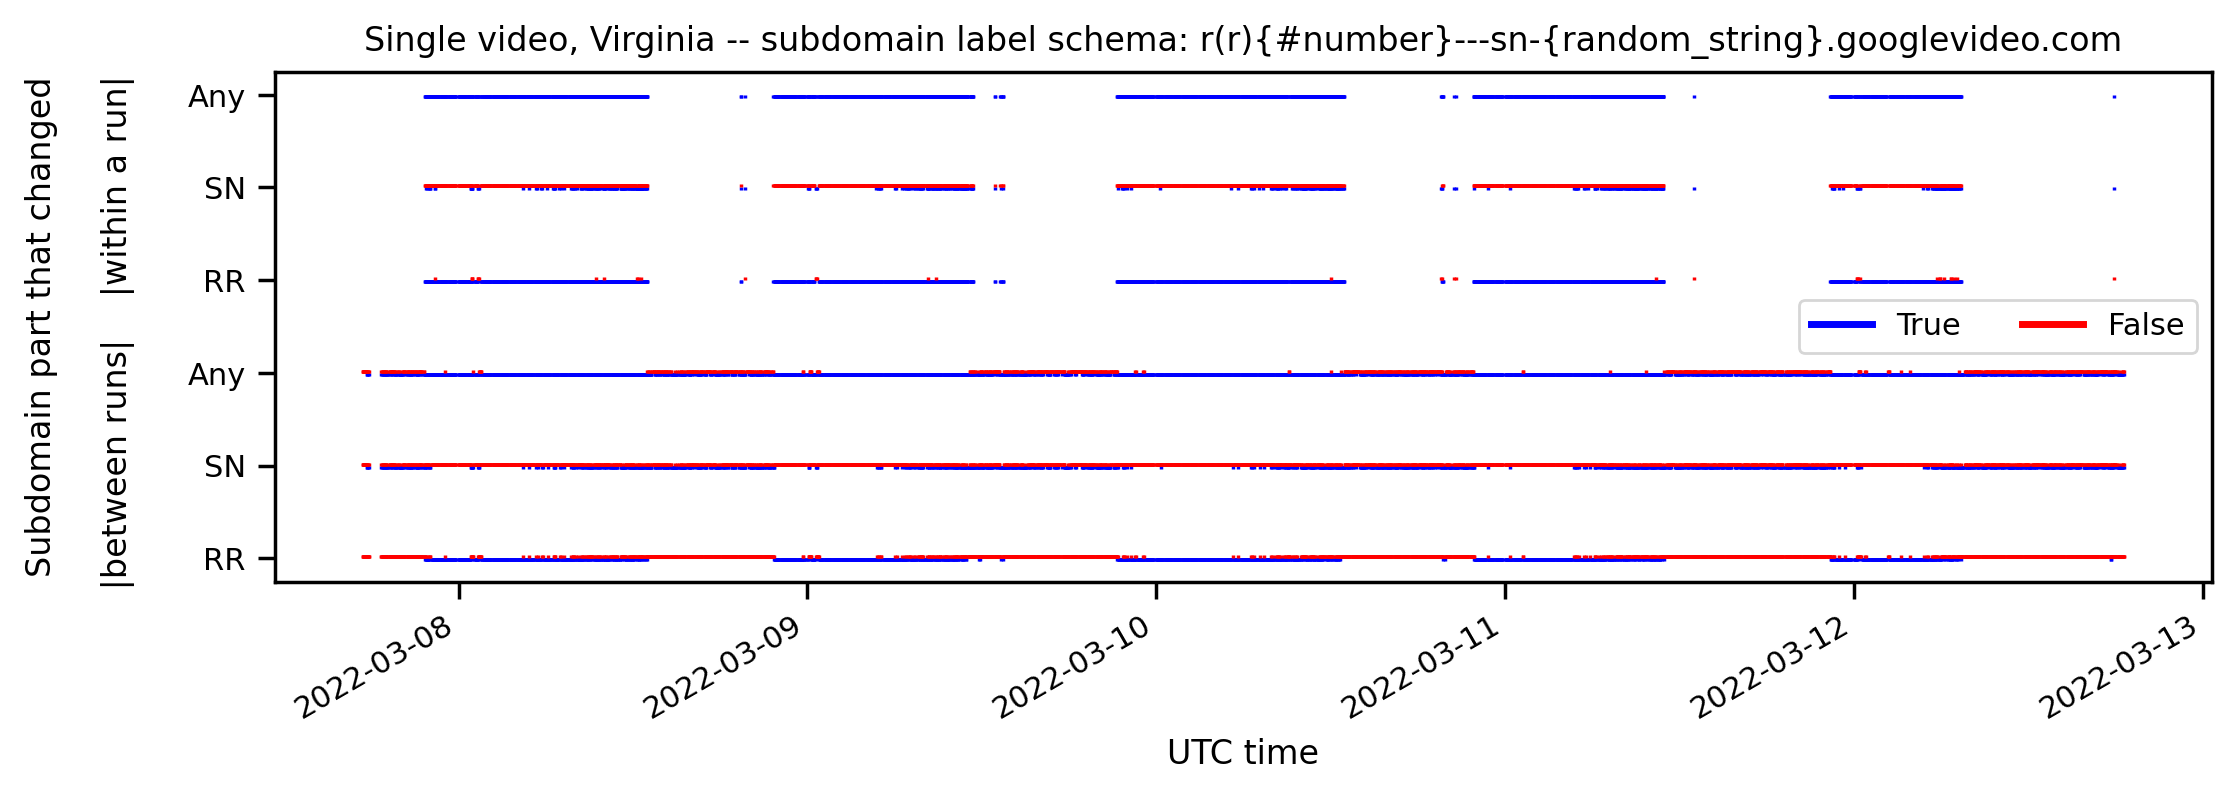

In [122]:
lookups_sa_single_video = lookups_sa[lookups_sa.video_id == 'aqz-KE-bpKQ'].copy()
lookups_sa_single_video.reset_index(drop=True, inplace=True)
lookups_sa_single_video['rr_changed_btw_msm'] = np.nan
lookups_sa_single_video['sn_changed_btw_msm'] = np.nan
lookups_sa_single_video['subdomain_changed_btw_msm'] = np.nan
lookups_sa_single_video['rr_changed_in_msm'] = np.nan
lookups_sa_single_video['sn_changed_in_msm'] = np.nan
lookups_sa_single_video['subdomain_changed_in_msm'] = np.nan
lookups_sa_single_video = lookups_sa_single_video.sort_values('first_time_seen')
last_row = pd.Series()
for index, row in lookups_sa_single_video.iterrows():
    if index == 0:
        last_row = row
        continue
    else:
        if row['msm_id'] == last_row['msm_id']:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_sa_single_video.loc[index, 'rr_changed_in_msm'] = False
            else:
                lookups_sa_single_video.loc[index, 'rr_changed_in_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_sa_single_video.loc[index, 'sn_changed_in_msm'] = False
            else:
                lookups_sa_single_video.loc[index, 'sn_changed_in_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_sa_single_video.loc[index, 'subdomain_changed_in_msm'] = False
            else:
                lookups_sa_single_video.loc[index, 'subdomain_changed_in_msm'] = True
        else:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_sa_single_video.loc[index, 'rr_changed_btw_msm'] = False
            else:
                lookups_sa_single_video.loc[index, 'rr_changed_btw_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_sa_single_video.loc[index, 'sn_changed_btw_msm'] = False
            else:
                lookups_sa_single_video.loc[index, 'sn_changed_btw_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_sa_single_video.loc[index, 'subdomain_changed_btw_msm'] = False
            else:
                lookups_sa_single_video.loc[index, 'subdomain_changed_btw_msm'] = True
        last_row = row
        
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
labels = ['rr_changed_btw_msm', 'sn_changed_btw_msm', 'subdomain_changed_btw_msm', 
          'rr_changed_in_msm', 'sn_changed_in_msm', 'subdomain_changed_in_msm']
label_map={'rr_changed_btw_msm': 'RR string changed between runs', 
           'sn_changed_btw_msm':'SN string changed between runs', 
           'subdomain_changed_btw_msm':'Whole subdomain changed between runs', 
          'rr_changed_in_msm':'RR string changed within run', 
           'sn_changed_in_msm':'SN string changed within run', 
           'subdomain_changed_in_msm':'Whole subdomain changed within run'}
cmap = {True:'blue', False:'red'}
for idx in range(len(labels)):
    label=labels[idx]
    for is_true in [True, False]:
        df_tmp = lookups_sa_single_video[(lookups_sa_single_video[label] == is_true)][['first_time_seen']].set_index('first_time_seen')
        df_tmp[label_map[label]+' '+str(is_true)] = (idx+1)/10
        df_tmp.plot(y=label_map[label]+' '+str(is_true), ax=ax, marker=is_true+2, markersize=1, drawstyle="default", lw=0, color=cmap[is_true])
#df_tmp.plot(ax=ax, marker=2, markersize=3, drawstyle="default", lw=0, color='C2')
ax.legend_.remove()
ax.set_title("Single video, Virginia -- subdomain label schema: r(r){#number}---sn-{random_string}.googlevideo.com")
ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6])
ax.set_yticklabels(['RR', 'SN', 'Any', 'RR', 'SN', 'Any'])
ax.set_ylabel('Subdomain part that changed\n\n |      between runs      |                  |        within a run       |\n')
ax.set_ylabel('Subdomain part that changed\n\n |between runs|    |within a run|  \n')
ax.set_xlabel("UTC time")
legend_elements = [mpl.lines.Line2D([0], [0], color=cmap[legend_item], lw=2, label=legend_item, marker='') for legend_item in cmap.keys()]
plt.gca().legend(handles=legend_elements, loc='best', ncol=2)#, bbox_to_anchor=(.5, -.4))
print(lookups_sa_single_video.subdomain_changed_btw_msm.value_counts())
plt.show()

/tmp/ipykernel_20197/561970849.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  last_row = pd.Series()


False    2946
True     1172
Name: subdomain_changed_btw_msm, dtype: int64


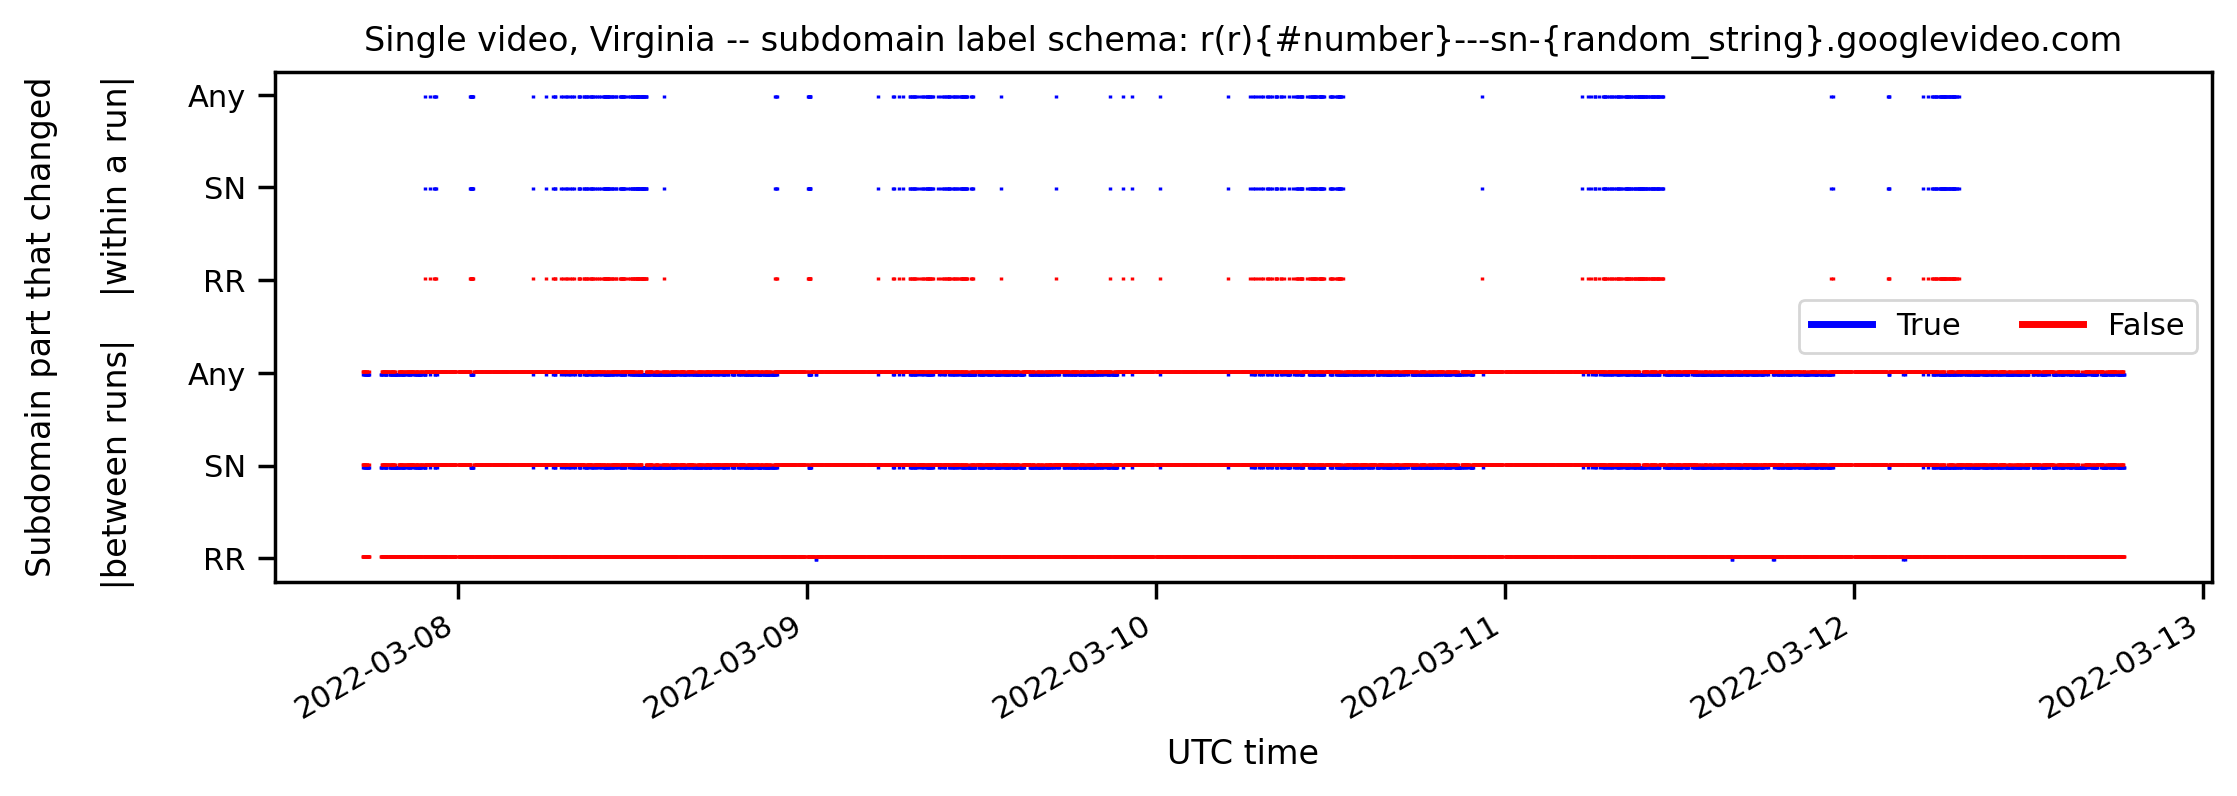

In [123]:
lookups_sa_single_video = lookups_sa[lookups_sa.video_id == 'lqiN98z6Dak'].copy()
lookups_sa_single_video.reset_index(drop=True, inplace=True)
lookups_sa_single_video['rr_changed_btw_msm'] = np.nan
lookups_sa_single_video['sn_changed_btw_msm'] = np.nan
lookups_sa_single_video['subdomain_changed_btw_msm'] = np.nan
lookups_sa_single_video['rr_changed_in_msm'] = np.nan
lookups_sa_single_video['sn_changed_in_msm'] = np.nan
lookups_sa_single_video['subdomain_changed_in_msm'] = np.nan
lookups_sa_single_video = lookups_sa_single_video.sort_values('first_time_seen')
last_row = pd.Series()
for index, row in lookups_sa_single_video.iterrows():
    if index == 0:
        last_row = row
        continue
    else:
        if row['msm_id'] == last_row['msm_id']:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_sa_single_video.loc[index, 'rr_changed_in_msm'] = False
            else:
                lookups_sa_single_video.loc[index, 'rr_changed_in_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_sa_single_video.loc[index, 'sn_changed_in_msm'] = False
            else:
                lookups_sa_single_video.loc[index, 'sn_changed_in_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_sa_single_video.loc[index, 'subdomain_changed_in_msm'] = False
            else:
                lookups_sa_single_video.loc[index, 'subdomain_changed_in_msm'] = True
        else:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_sa_single_video.loc[index, 'rr_changed_btw_msm'] = False
            else:
                lookups_sa_single_video.loc[index, 'rr_changed_btw_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_sa_single_video.loc[index, 'sn_changed_btw_msm'] = False
            else:
                lookups_sa_single_video.loc[index, 'sn_changed_btw_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_sa_single_video.loc[index, 'subdomain_changed_btw_msm'] = False
            else:
                lookups_sa_single_video.loc[index, 'subdomain_changed_btw_msm'] = True
        last_row = row
        
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
labels = ['rr_changed_btw_msm', 'sn_changed_btw_msm', 'subdomain_changed_btw_msm', 
          'rr_changed_in_msm', 'sn_changed_in_msm', 'subdomain_changed_in_msm']
label_map={'rr_changed_btw_msm': 'RR string changed between runs', 
           'sn_changed_btw_msm':'SN string changed between runs', 
           'subdomain_changed_btw_msm':'Whole subdomain changed between runs', 
          'rr_changed_in_msm':'RR string changed within run', 
           'sn_changed_in_msm':'SN string changed within run', 
           'subdomain_changed_in_msm':'Whole subdomain changed within run'}
cmap = {True:'blue', False:'red'}
for idx in range(len(labels)):
    label=labels[idx]
    for is_true in [True, False]:
        df_tmp = lookups_sa_single_video[(lookups_sa_single_video[label] == is_true)][['first_time_seen']].set_index('first_time_seen')
        df_tmp[label_map[label]+' '+str(is_true)] = (idx+1)/10
        df_tmp.plot(y=label_map[label]+' '+str(is_true), ax=ax, marker=is_true+2, markersize=1, drawstyle="default", lw=0, color=cmap[is_true])
#df_tmp.plot(ax=ax, marker=2, markersize=3, drawstyle="default", lw=0, color='C2')
ax.legend_.remove()
ax.set_title("Single video, Virginia -- subdomain label schema: r(r){#number}---sn-{random_string}.googlevideo.com")
ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6])
ax.set_yticklabels(['RR', 'SN', 'Any', 'RR', 'SN', 'Any'])
ax.set_ylabel('Subdomain part that changed\n\n |      between runs      |                  |        within a run       |\n')
ax.set_ylabel('Subdomain part that changed\n\n |between runs|    |within a run|  \n')
ax.set_xlabel("UTC time")
legend_elements = [mpl.lines.Line2D([0], [0], color=cmap[legend_item], lw=2, label=legend_item, marker='') for legend_item in cmap.keys()]
plt.gca().legend(handles=legend_elements, loc='best', ncol=2)#, bbox_to_anchor=(.5, -.4))
print(lookups_sa_single_video.subdomain_changed_btw_msm.value_counts())
plt.show()

### South America

In [124]:
measurements_br = measurements[measurements.vantagePoint == 'South America East'].copy()
lookups_br = lookups[lookups.msm_id.isin(measurements_br.msm_id.unique())].copy()
googlevideo_subdomains_br = googlevideo_subdomains[googlevideo_subdomains.msm_id.isin(measurements_br.msm_id.unique())].copy()
googlevideo_requests_br = googlevideo_requests[googlevideo_requests.msm_id.isin(measurements_br.msm_id.unique())].copy()
measurements_br.reset_index(drop=True, inplace=True)
lookups_br.reset_index(drop=True, inplace=True)

In [125]:
lookups_br[lookups_br.status == 'NOERROR'].groupby('video_subdomain', as_index=False).agg(ip_addr_count=('ip_addr',pd.Series.nunique), ip_addrs=('ip_addr',pd.Series.unique)).sort_values('ip_addr_count')

video_subdomain  ip_addr_count  \
0    r2---sn-bg07dn6r              1   
15  rr4---sn-p5qs7n7d              1   
14  rr4---sn-p5qlsn76              1   
13  rr4---sn-bg0ezn7l              1   
12  rr4---sn-bg07dnsl              1   
11  rr2---sn-vgqsrnlk              1   
10  rr2---sn-vgqsknez              1   
9   rr2---sn-q4flrnss              1   
8   rr2---sn-p5qlsn7s              1   
7   rr2---sn-p5qddn7k              1   
6   rr2---sn-bg0eznek              1   
5   rr2---sn-bg07dn6r              1   
3    r4---sn-bg0ezn7l              1   
2    r4---sn-bg07dnsl              1   
1    r2---sn-bg0eznek              1   
16  rr4---sn-q4flrn7r              1   
17  rr4---sn-vgqsrnlz              1   
4          redirector              5   

                                             ip_addrs  
0                                      173.194.136.39  
15                                     74.125.155.234  
14                                    172.217.135.201  
13                                    173.194.155.137  
12                                     173.194.161.42  
11                                     74.125.156.103  
10                                     173.194.191.71  
9                                      173.194.57.103  
8                                     172.217.135.167  
7                                       173.194.7.135  
6                                      74.125.107.103  
5                                      173.194.136.39  
3                                     173.194.155.137  
2                                      173.194.161.42  
1                                      74.125.107.103  
16                                     209.85.165.105  
17                                       74.125.156.9  
4   [142.251.35.238, 142.250.217.174, 142.250.189....

In [126]:
measurements_br.error.unique()

array(['',
       'failed switching selenium focus to youtube iframe or monitoring loop ### Message: \n'],
      dtype=object)

In [127]:
lookups_br[lookups_br.status != 'NOERROR']

msm_id  \
236   40de5e49-5182-26a6-bbbf-f6fdc6065ca4   
242   5576cfe8-98c8-1734-6cb0-3fb7e850390d   
288   d992d1df-643b-a26c-869e-d0429764b667   
329   23e7f2fb-4354-6105-0500-48be31f8cb5f   
405   847adfbd-4c13-0b91-b0fb-15c4b1eefd5e   
414   d806da72-8c97-671a-6db6-71b05337bd26   
458   498bf81e-9dff-15a0-9bac-7fd29fe8cfa8   
1798  4f162c58-4ec4-963e-0cc0-b99cc7345db0   
2129  a2348a32-197d-fd7b-ceb8-53ed58ea1ddd   
2170  9ab30317-c9b2-5b8f-caae-5d1913679399   
2251  7a15469a-fac7-16d7-c2d7-c36c842f5c43   
3103  ecd6c044-2d40-5adc-eb4f-b24f27fe253e   
3224  32d28e42-fa05-7730-f9a9-a0b92b85d852   
3384  d03b2e27-e077-b81e-efff-fcaab70d050c   
3393  5b940cac-9e0b-aa1f-ed24-7a98a185ef1d   
3468  0965edd9-a222-4fcc-4a66-42b27987bde9   
3632  eade19c1-46d8-8e3c-e660-804b3ce8e15f   
3718  51965660-75f2-db71-7cbf-6475b258d66f   
6478  8a8cce7a-bf4b-59d5-5e80-842bd215e7f3   
6761  4f988f37-d9fd-79ac-53a8-76adbbf2dac1   
7088  fd8355fb-f0e7-0264-c46f-a3dbbf9bb5a4   

                                  domain       elapsed    status  \
236   rr2---sn-bg07dn6r.googlevideo.com.  10002.889890  SERVFAIL   
242   rr2---sn-bg07dn6r.googlevideo.com.  10000.427241  SERVFAIL   
288   rr4---sn-bg07dnsl.googlevideo.com.  10002.191658  SERVFAIL   
329   rr2---sn-bg07dn6r.googlevideo.com.  10003.840722  SERVFAIL   
405   rr2---sn-bg07dn6r.googlevideo.com.  10001.539309  SERVFAIL   
414   rr2---sn-bg0eznek.googlevideo.com.  10001.054882  SERVFAIL   
458   rr2---sn-bg07dn6r.googlevideo.com.  10000.910592  SERVFAIL   
1798  rr2---sn-bg07dn6r.googlevideo.com.  10000.409937  SERVFAIL   
2129  rr2---sn-bg07dn6r.googlevideo.com.  10002.335191  SERVFAIL   
2170  rr4---sn-bg07dnsl.googlevideo.com.  10001.709784  SERVFAIL   
2251  rr2---sn-bg07dn6r.googlevideo.com.  10001.510999  SERVFAIL   
3103  rr4---sn-bg07dnsl.googlevideo.com.  10003.374576  SERVFAIL   
3224  rr2---sn-bg0eznek.googlevideo.com.  10003.157365  SERVFAIL   
3384  rr2---sn-bg0eznek.googlevideo.com.  10000.987700  SERVFAIL   
3393  rr4---sn-bg0ezn7l.googlevideo.com.  10003.668104  SERVFAIL   
3468  rr2---sn-bg0eznek.googlevideo.com.  10001.796199  SERVFAIL   
3632  rr2---sn-bg07dn6r.googlevideo.com.  10001.387047  SERVFAIL   
3718  rr2---sn-bg07dn6r.googlevideo.com.  10003.449304  SERVFAIL   
6478  rr2---sn-bg07dn6r.googlevideo.com.  10002.490425  SERVFAIL   
6761  rr4---sn-bg07dnsl.googlevideo.com.  10000.338664  SERVFAIL   
7088  rr4---sn-bg0ezn7l.googlevideo.com.  10000.329960  SERVFAIL   

                                                 answer  \
236   read udp 172.31.14.247:37841->94.140.14.14:53:...   
242   read udp 172.31.14.247:53445->94.140.14.14:53:...   
288   read udp 172.31.14.247:58414->94.140.14.14:53:...   
329   read udp 172.31.14.247:58680->94.140.14.14:53:...   
405   read udp 172.31.14.247:60318->94.140.14.14:53:...   
414   read udp 172.31.14.247:43530->94.140.14.14:53:...   
458   read udp 172.31.14.247:42041->94.140.14.14:53:...   
1798  read udp 172.31.14.247:34900->94.140.14.14:53:...   
2129  read udp 172.31.14.247:34442->94.140.14.14:53:...   
2170  read udp 172.31.14.247:38461->94.140.14.14:53:...   
2251  read udp 172.31.14.247:46435->94.140.14.14:53:...   
3103  read udp 172.31.14.247:39136->94.140.14.14:53:...   
3224  read udp 172.31.14.247:37515->94.140.14.14:53:...   
3384  read udp 172.31.14.247:60909->94.140.14.14:53:...   
3393  read udp 172.31.14.247:41388->94.140.14.14:53:...   
3468  read udp 172.31.14.247:56167->94.140.14.14:53:...   
3632  read udp 172.31.14.247:41613->94.140.14.14:53:...   
3718  read udp 172.31.14.247:55730->94.140.14.14:53:...   
6478  read udp 172.31.14.247:42775->94.140.14.14:53:...   
6761  read udp 172.31.14.247:51694->94.140.14.14:53:...   
7088  read udp 172.31.14.247:51089->94.140.14.14:53:...   

                                                ip_addr round_robin_str  \
236   read udp 172.31.14.247:37841->94.140.14.14:53:...             rr2   
242   read udp 172.31.14.247:53445->94.140.14.14:53:...             rr2   
28

In [128]:
lookups_br = lookups_br[lookups_br.status == 'NOERROR']

In [129]:
lookups_br[lookups_br.video_subdomain == 'redirector'].video_id.value_counts()

aqz-KE-bpKQ    8
lqiN98z6Dak    2
Name: video_id, dtype: int64

In [130]:
lookups_br[lookups_br.video_subdomain != 'redirector'].groupby('rand_sn_str').agg(rr_count=('round_robin_str', pd.Series.nunique)).sort_values('rr_count')

rr_count
rand_sn_str          
sn-p5qddn7k         1
sn-p5qlsn76         1
sn-p5qlsn7s         1
sn-p5qs7n7d         1
sn-q4flrn7r         1
sn-q4flrnss         1
sn-vgqsknez         1
sn-vgqsrnlk         1
sn-vgqsrnlz         1
sn-bg07dn6r         2
sn-bg07dnsl         2
sn-bg0ezn7l         2
sn-bg0eznek         2

In [131]:
lookups_br[lookups_br.video_subdomain != 'redirector'].groupby('rand_sn_str').filter(lambda x: pd.Series.nunique(x['round_robin_str']) > 1).groupby('rand_sn_str', as_index=False).agg(rr_strs=('round_robin_str', pd.Series.unique))

rand_sn_str    rr_strs
0  sn-bg07dn6r  [rr2, r2]
1  sn-bg07dnsl  [rr4, r4]
2  sn-bg0ezn7l  [rr4, r4]
3  sn-bg0eznek  [rr2, r2]

In [132]:
lookups_br = lookups_br[lookups_br.video_subdomain != 'redirector']
lookups_br.reset_index(drop=True, inplace=True)
lookups_br['rr_changed_btw_msm'] = np.nan
lookups_br['sn_changed_btw_msm'] = np.nan
lookups_br['subdomain_changed_btw_msm'] = np.nan
lookups_br['rr_changed_in_msm'] = np.nan
lookups_br['sn_changed_in_msm'] = np.nan
lookups_br['subdomain_changed_in_msm'] = np.nan
lookups_br = lookups_br.sort_values('first_time_seen')
last_row = pd.Series()
for index, row in lookups_br.iterrows():
    if index == 0:
        last_row = row
        continue
    else:
        if row['msm_id'] == last_row['msm_id']:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_br.loc[index, 'rr_changed_in_msm'] = False
            else:
                lookups_br.loc[index, 'rr_changed_in_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_br.loc[index, 'sn_changed_in_msm'] = False
            else:
                lookups_br.loc[index, 'sn_changed_in_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_br.loc[index, 'subdomain_changed_in_msm'] = False
            else:
                lookups_br.loc[index, 'subdomain_changed_in_msm'] = True
        else:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_br.loc[index, 'rr_changed_btw_msm'] = False
            else:
                lookups_br.loc[index, 'rr_changed_btw_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_br.loc[index, 'sn_changed_btw_msm'] = False
            else:
                lookups_br.loc[index, 'sn_changed_btw_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_br.loc[index, 'subdomain_changed_btw_msm'] = False
            else:
                lookups_br.loc[index, 'subdomain_changed_btw_msm'] = True
        last_row = row

print(lookups_br['ip_addr/24'].nunique())
print(lookups_br['rand_sn_str'].nunique())

/tmp/ipykernel_20197/1713325798.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  last_row = pd.Series()


11
13


In [133]:
lookups_br.groupby('rand_sn_str', as_index=False).agg(count24=('ip_addr/24', pd.Series.nunique), count16=('ip_addr/16', pd.Series.nunique)).sort_values('count16')

rand_sn_str  count24  count16
0   sn-bg07dn6r        1        1
1   sn-bg07dnsl        1        1
2   sn-bg0ezn7l        1        1
3   sn-bg0eznek        1        1
4   sn-p5qddn7k        1        1
5   sn-p5qlsn76        1        1
6   sn-p5qlsn7s        1        1
7   sn-p5qs7n7d        1        1
8   sn-q4flrn7r        1        1
9   sn-q4flrnss        1        1
10  sn-vgqsknez        1        1
11  sn-vgqsrnlk        1        1
12  sn-vgqsrnlz        1        1

In [134]:
lookups_br.groupby('ip_addr/24', as_index=False).agg(count_sn=('rand_sn_str', pd.Series.unique))

ip_addr/24                    count_sn
0   172.217.135  [sn-p5qlsn7s, sn-p5qlsn76]
1   173.194.136                 sn-bg07dn6r
2   173.194.155                 sn-bg0ezn7l
3   173.194.161                 sn-bg07dnsl
4   173.194.191                 sn-vgqsknez
5    173.194.57                 sn-q4flrnss
6     173.194.7                 sn-p5qddn7k
7    209.85.165                 sn-q4flrn7r
8    74.125.107                 sn-bg0eznek
9    74.125.155                 sn-p5qs7n7d
10   74.125.156  [sn-vgqsrnlz, sn-vgqsrnlk]

In [135]:
lookups_br['sn_length'] = lookups_br['rand_sn_str'].str.len()
print(lookups_br.sn_length.value_counts())

11    8302
Name: sn_length, dtype: int64


In [136]:
lookups_br.groupby('ip_addr/24', as_index=False).agg(count_sn_overlap=('rand_sn_str', lambda x: count_largest_sn_overlap(pd.Series.unique(x).tolist())), sn_overlap=('rand_sn_str', lambda x: largest_sn_overlap(pd.Series.unique(x).tolist())))

ip_addr/24  count_sn_overlap   sn_overlap
0   172.217.135                10   sn-p5qlsn7
1   173.194.136                11  sn-bg07dn6r
2   173.194.155                11  sn-bg0ezn7l
3   173.194.161                11  sn-bg07dnsl
4   173.194.191                11  sn-vgqsknez
5    173.194.57                11  sn-q4flrnss
6     173.194.7                11  sn-p5qddn7k
7    209.85.165                11  sn-q4flrn7r
8    74.125.107                11  sn-bg0eznek
9    74.125.155                11  sn-p5qs7n7d
10   74.125.156                10   sn-vgqsrnl

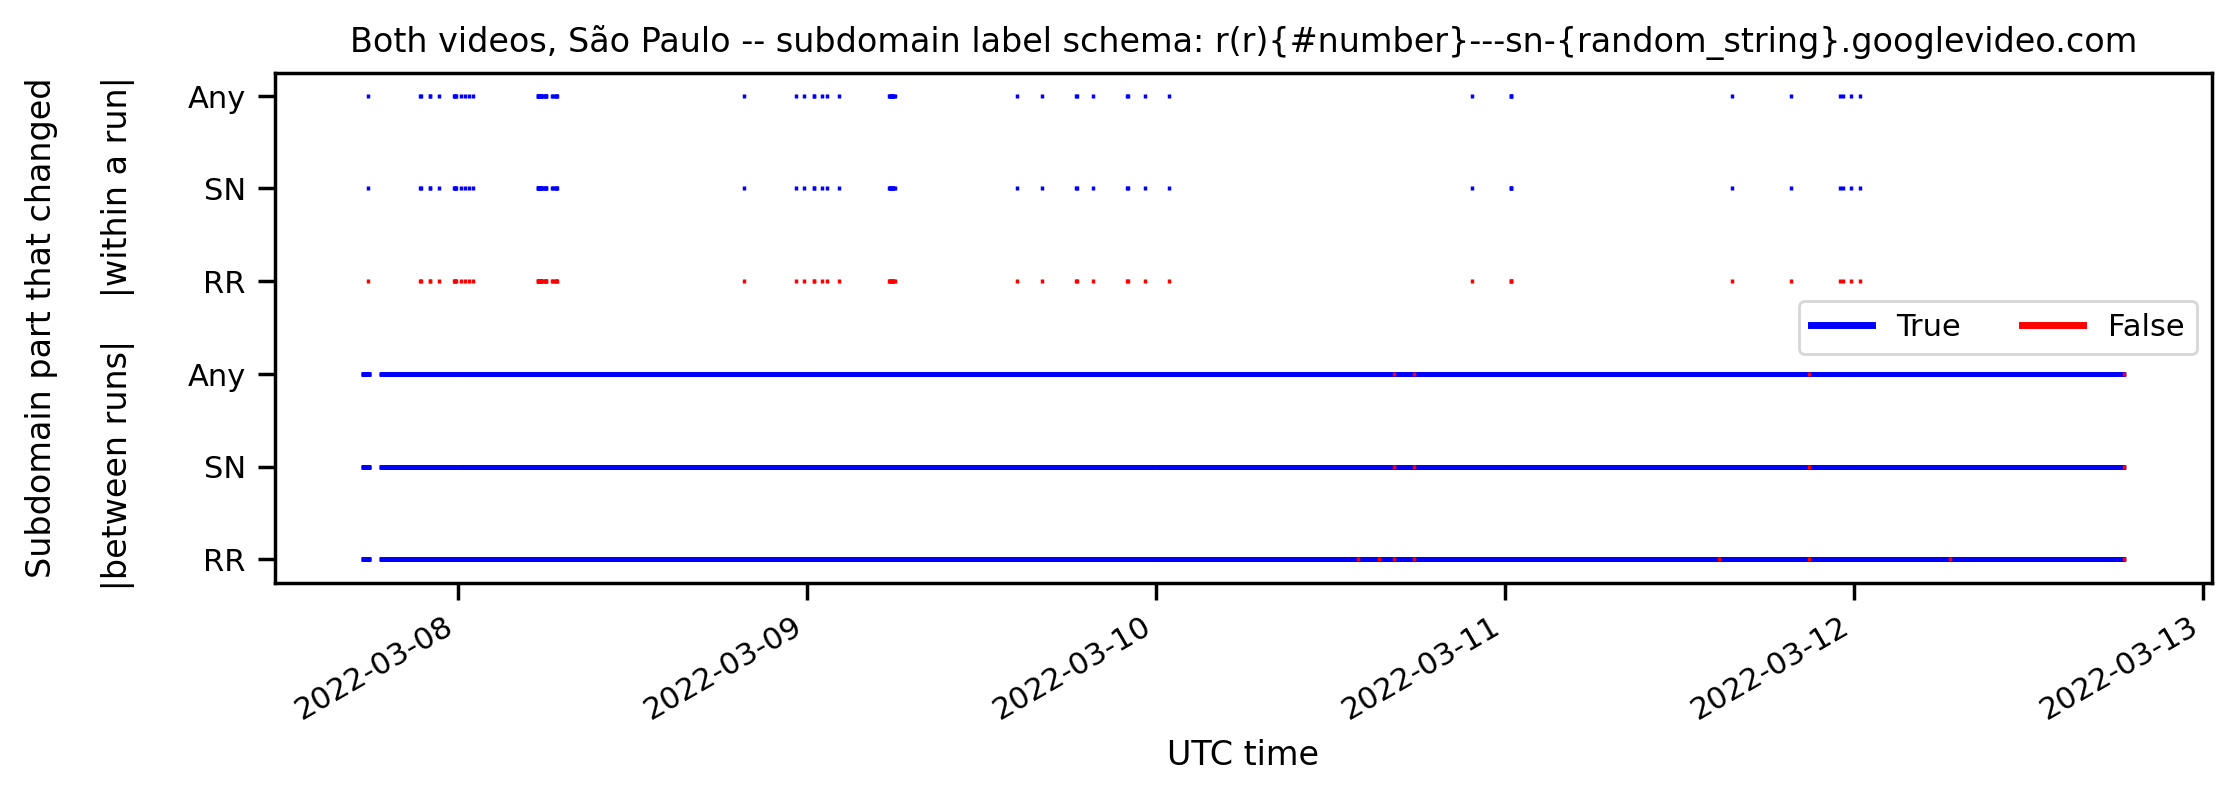

In [137]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
labels = ['rr_changed_btw_msm', 'sn_changed_btw_msm', 'subdomain_changed_btw_msm', 
          'rr_changed_in_msm', 'sn_changed_in_msm', 'subdomain_changed_in_msm']
label_map={'rr_changed_btw_msm': 'RR string changed between runs', 
           'sn_changed_btw_msm':'SN string changed between runs', 
           'subdomain_changed_btw_msm':'Whole subdomain changed between runs', 
          'rr_changed_in_msm':'RR string changed within run', 
           'sn_changed_in_msm':'SN string changed within run', 
           'subdomain_changed_in_msm':'Whole subdomain changed within run'}
cmap = {True:'blue', False:'red'}
for idx in range(len(labels)):
    label=labels[idx]
    for is_true in [True, False]:
        df_tmp = lookups_br[(lookups_br[label] == is_true)][['first_time_seen']].set_index('first_time_seen')
        df_tmp[label_map[label]+' '+str(is_true)] = idx+1.
        df_tmp.plot(y=label_map[label]+' '+str(is_true), ax=ax, marker="|", markersize=1, drawstyle="default", lw=0, color=cmap[is_true])
#df_tmp.plot(ax=ax, marker=2, markersize=3, drawstyle="default", lw=0, color='C2')
ax.legend_.remove()
ax.set_title("Both videos, São Paulo -- subdomain label schema: r(r){#number}---sn-{random_string}.googlevideo.com")
ax.set_yticks([1.,2.,3.,4.,5.,6.])
ax.set_yticklabels(['RR', 'SN', 'Any', 'RR', 'SN', 'Any'])
ax.set_ylabel('Subdomain part that changed\n\n |between runs|    |within a run|  \n')
ax.set_xlabel("UTC time")
legend_elements = [mpl.lines.Line2D([0], [0], color=cmap[legend_item], lw=2, label=legend_item, marker='') for legend_item in cmap.keys()]
plt.gca().legend(handles=legend_elements, loc='best', ncol=2)#, bbox_to_anchor=(.5, -.4))

/tmp/ipykernel_20197/1324926495.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  last_row = pd.Series()


False    2304
True     1807
Name: subdomain_changed_btw_msm, dtype: int64


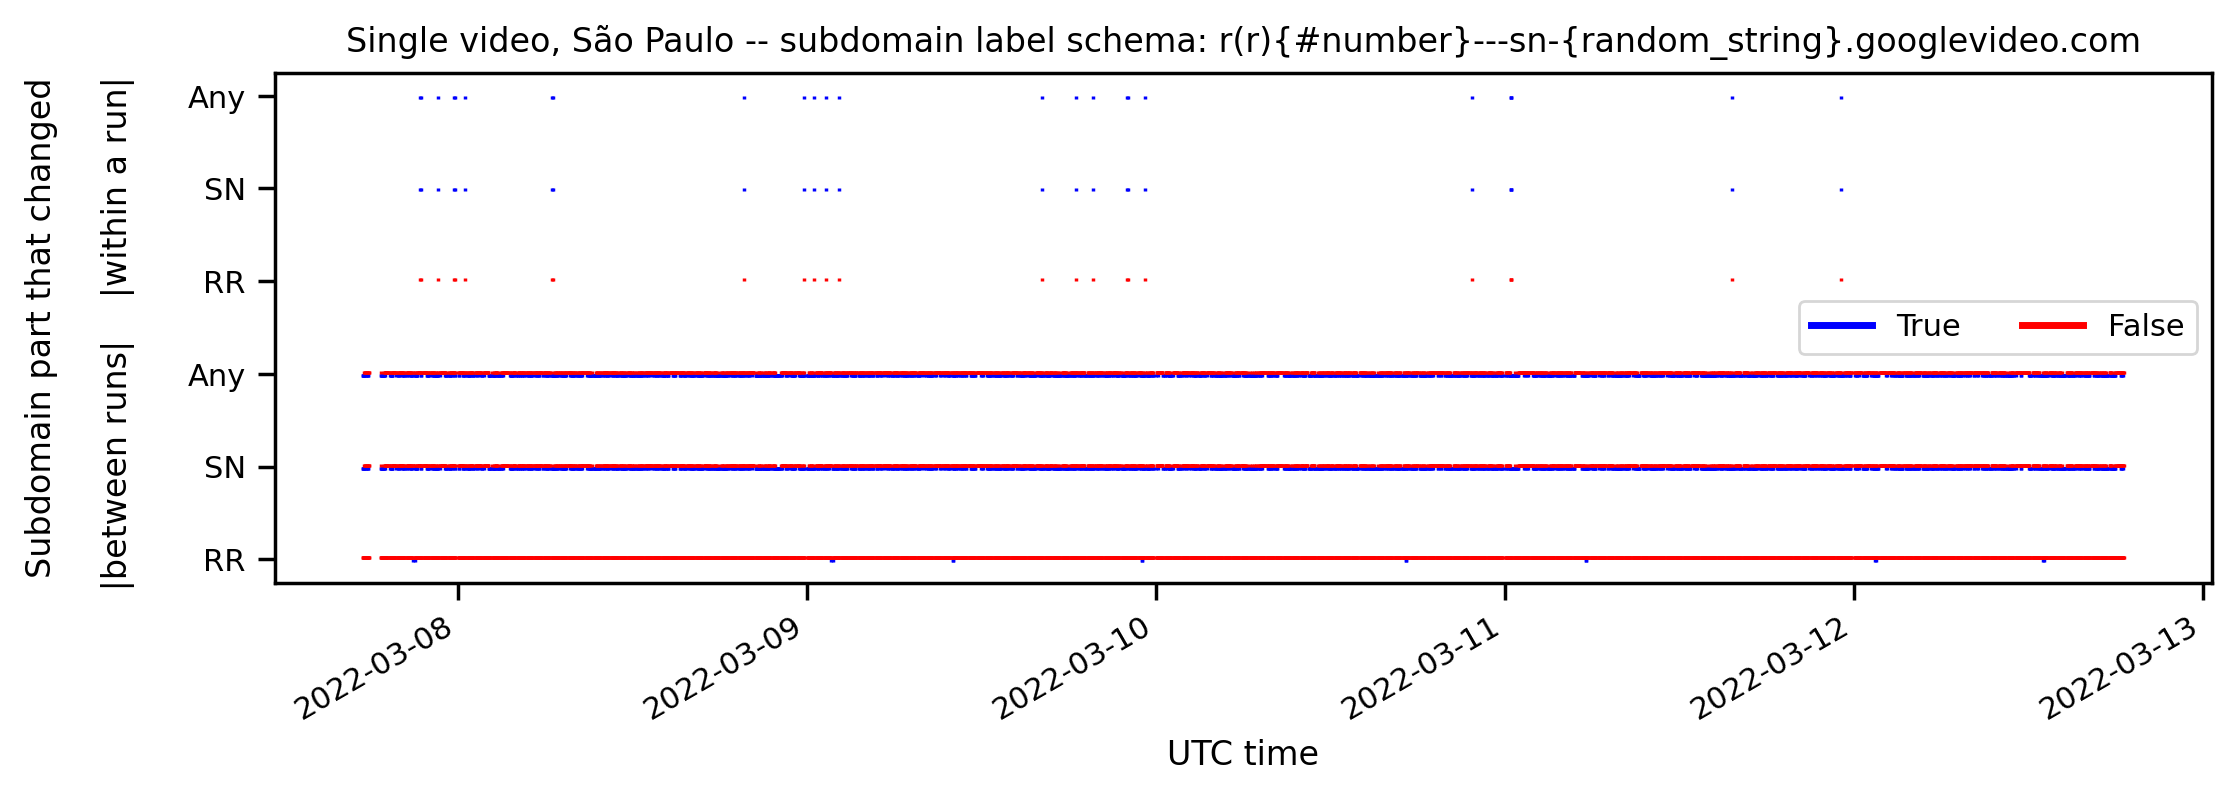

In [138]:
lookups_br_single_video = lookups_br[lookups_br.video_id == 'aqz-KE-bpKQ'].copy()
lookups_br_single_video.reset_index(drop=True, inplace=True)
lookups_br_single_video['rr_changed_btw_msm'] = np.nan
lookups_br_single_video['sn_changed_btw_msm'] = np.nan
lookups_br_single_video['subdomain_changed_btw_msm'] = np.nan
lookups_br_single_video['rr_changed_in_msm'] = np.nan
lookups_br_single_video['sn_changed_in_msm'] = np.nan
lookups_br_single_video['subdomain_changed_in_msm'] = np.nan
lookups_br_single_video = lookups_br_single_video.sort_values('first_time_seen')
last_row = pd.Series()
for index, row in lookups_br_single_video.iterrows():
    if index == 0:
        last_row = row
        continue
    else:
        if row['msm_id'] == last_row['msm_id']:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_br_single_video.loc[index, 'rr_changed_in_msm'] = False
            else:
                lookups_br_single_video.loc[index, 'rr_changed_in_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_br_single_video.loc[index, 'sn_changed_in_msm'] = False
            else:
                lookups_br_single_video.loc[index, 'sn_changed_in_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_br_single_video.loc[index, 'subdomain_changed_in_msm'] = False
            else:
                lookups_br_single_video.loc[index, 'subdomain_changed_in_msm'] = True
        else:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_br_single_video.loc[index, 'rr_changed_btw_msm'] = False
            else:
                lookups_br_single_video.loc[index, 'rr_changed_btw_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_br_single_video.loc[index, 'sn_changed_btw_msm'] = False
            else:
                lookups_br_single_video.loc[index, 'sn_changed_btw_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_br_single_video.loc[index, 'subdomain_changed_btw_msm'] = False
            else:
                lookups_br_single_video.loc[index, 'subdomain_changed_btw_msm'] = True
        last_row = row
        
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
labels = ['rr_changed_btw_msm', 'sn_changed_btw_msm', 'subdomain_changed_btw_msm', 
          'rr_changed_in_msm', 'sn_changed_in_msm', 'subdomain_changed_in_msm']
label_map={'rr_changed_btw_msm': 'RR string changed between runs', 
           'sn_changed_btw_msm':'SN string changed between runs', 
           'subdomain_changed_btw_msm':'Whole subdomain changed between runs', 
          'rr_changed_in_msm':'RR string changed within run', 
           'sn_changed_in_msm':'SN string changed within run', 
           'subdomain_changed_in_msm':'Whole subdomain changed within run'}
cmap = {True:'blue', False:'red'}
for idx in range(len(labels)):
    label=labels[idx]
    for is_true in [True, False]:
        df_tmp = lookups_br_single_video[(lookups_br_single_video[label] == is_true)][['first_time_seen']].set_index('first_time_seen')
        df_tmp[label_map[label]+' '+str(is_true)] = (idx+1)/10
        df_tmp.plot(y=label_map[label]+' '+str(is_true), ax=ax, marker=is_true+2, markersize=1, drawstyle="default", lw=0, color=cmap[is_true])
#df_tmp.plot(ax=ax, marker=2, markersize=3, drawstyle="default", lw=0, color='C2')
ax.legend_.remove()
ax.set_title("Single video, São Paulo -- subdomain label schema: r(r){#number}---sn-{random_string}.googlevideo.com")
ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6])
ax.set_yticklabels(['RR', 'SN', 'Any', 'RR', 'SN', 'Any'])
ax.set_ylabel('Subdomain part that changed\n\n |      between runs      |                  |        within a run       |\n')
ax.set_ylabel('Subdomain part that changed\n\n |between runs|    |within a run|  \n')
ax.set_xlabel("UTC time")
legend_elements = [mpl.lines.Line2D([0], [0], color=cmap[legend_item], lw=2, label=legend_item, marker='') for legend_item in cmap.keys()]
plt.gca().legend(handles=legend_elements, loc='best', ncol=2)#, bbox_to_anchor=(.5, -.4))
print(lookups_br_single_video.subdomain_changed_btw_msm.value_counts())
plt.show()

/tmp/ipykernel_20197/66507357.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  last_row = pd.Series()


False    2314
True     1805
Name: subdomain_changed_btw_msm, dtype: int64


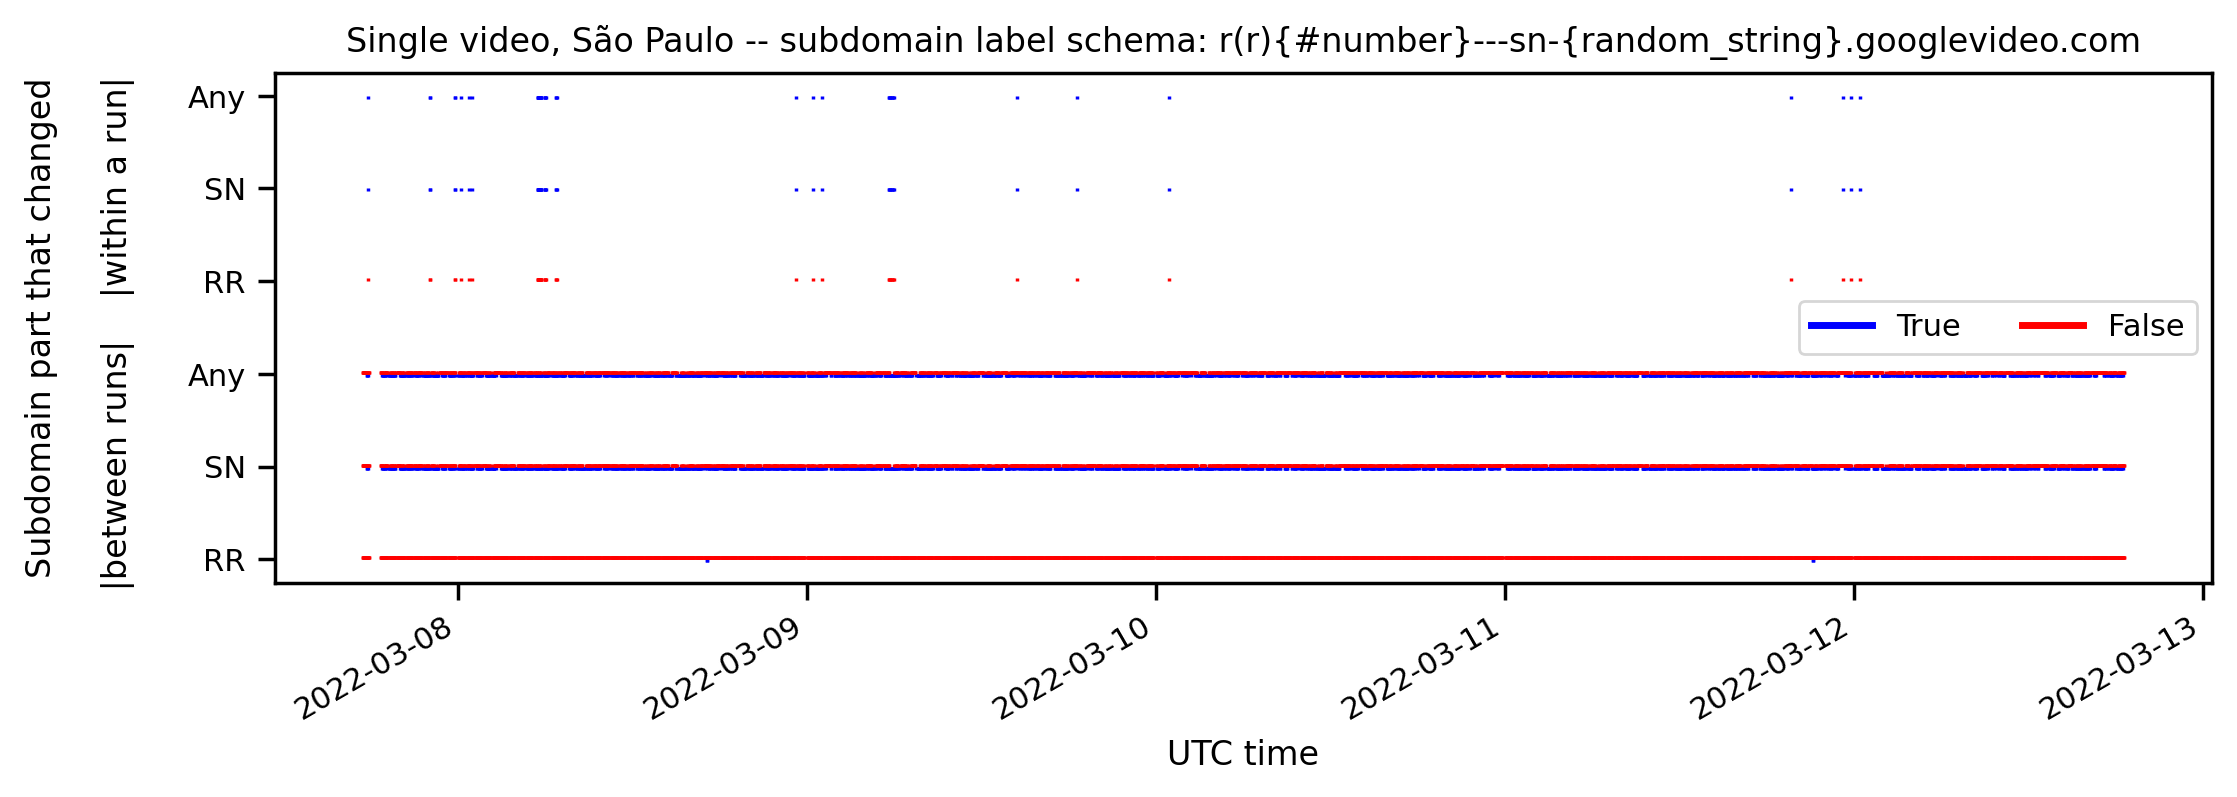

In [139]:
lookups_br_single_video = lookups_br[lookups_br.video_id == 'lqiN98z6Dak'].copy()
lookups_br_single_video.reset_index(drop=True, inplace=True)
lookups_br_single_video['rr_changed_btw_msm'] = np.nan
lookups_br_single_video['sn_changed_btw_msm'] = np.nan
lookups_br_single_video['subdomain_changed_btw_msm'] = np.nan
lookups_br_single_video['rr_changed_in_msm'] = np.nan
lookups_br_single_video['sn_changed_in_msm'] = np.nan
lookups_br_single_video['subdomain_changed_in_msm'] = np.nan
lookups_br_single_video = lookups_br_single_video.sort_values('first_time_seen')
last_row = pd.Series()
for index, row in lookups_br_single_video.iterrows():
    if index == 0:
        last_row = row
        continue
    else:
        if row['msm_id'] == last_row['msm_id']:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_br_single_video.loc[index, 'rr_changed_in_msm'] = False
            else:
                lookups_br_single_video.loc[index, 'rr_changed_in_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_br_single_video.loc[index, 'sn_changed_in_msm'] = False
            else:
                lookups_br_single_video.loc[index, 'sn_changed_in_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_br_single_video.loc[index, 'subdomain_changed_in_msm'] = False
            else:
                lookups_br_single_video.loc[index, 'subdomain_changed_in_msm'] = True
        else:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_br_single_video.loc[index, 'rr_changed_btw_msm'] = False
            else:
                lookups_br_single_video.loc[index, 'rr_changed_btw_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_br_single_video.loc[index, 'sn_changed_btw_msm'] = False
            else:
                lookups_br_single_video.loc[index, 'sn_changed_btw_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_br_single_video.loc[index, 'subdomain_changed_btw_msm'] = False
            else:
                lookups_br_single_video.loc[index, 'subdomain_changed_btw_msm'] = True
        last_row = row
        
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
labels = ['rr_changed_btw_msm', 'sn_changed_btw_msm', 'subdomain_changed_btw_msm', 
          'rr_changed_in_msm', 'sn_changed_in_msm', 'subdomain_changed_in_msm']
label_map={'rr_changed_btw_msm': 'RR string changed between runs', 
           'sn_changed_btw_msm':'SN string changed between runs', 
           'subdomain_changed_btw_msm':'Whole subdomain changed between runs', 
          'rr_changed_in_msm':'RR string changed within run', 
           'sn_changed_in_msm':'SN string changed within run', 
           'subdomain_changed_in_msm':'Whole subdomain changed within run'}
cmap = {True:'blue', False:'red'}
for idx in range(len(labels)):
    label=labels[idx]
    for is_true in [True, False]:
        df_tmp = lookups_br_single_video[(lookups_br_single_video[label] == is_true)][['first_time_seen']].set_index('first_time_seen')
        df_tmp[label_map[label]+' '+str(is_true)] = (idx+1)/10
        df_tmp.plot(y=label_map[label]+' '+str(is_true), ax=ax, marker=is_true+2, markersize=1, drawstyle="default", lw=0, color=cmap[is_true])
#df_tmp.plot(ax=ax, marker=2, markersize=3, drawstyle="default", lw=0, color='C2')
ax.legend_.remove()
ax.set_title("Single video, São Paulo -- subdomain label schema: r(r){#number}---sn-{random_string}.googlevideo.com")
ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6])
ax.set_yticklabels(['RR', 'SN', 'Any', 'RR', 'SN', 'Any'])
ax.set_ylabel('Subdomain part that changed\n\n |      between runs      |                  |        within a run       |\n')
ax.set_ylabel('Subdomain part that changed\n\n |between runs|    |within a run|  \n')
ax.set_xlabel("UTC time")
legend_elements = [mpl.lines.Line2D([0], [0], color=cmap[legend_item], lw=2, label=legend_item, marker='') for legend_item in cmap.keys()]
plt.gca().legend(handles=legend_elements, loc='best', ncol=2)#, bbox_to_anchor=(.5, -.4))
print(lookups_br_single_video.subdomain_changed_btw_msm.value_counts())
plt.show()

In [140]:
measurements.vantagePoint.unique()

array(['Africa South', 'Asia Pacific Northeast', 'Asia Pacific Southeast',
       'Europe Central', 'South America East', 'US East', 'US West'],
      dtype=object)

### Japan

In [141]:
measurements_jp = measurements[measurements.vantagePoint == 'Asia Pacific Northeast'].copy()
lookups_jp = lookups[lookups.msm_id.isin(measurements_jp.msm_id.unique())].copy()
googlevideo_subdomains_jp = googlevideo_subdomains[googlevideo_subdomains.msm_id.isin(measurements_jp.msm_id.unique())].copy()
googlevideo_requests_jp = googlevideo_requests[googlevideo_requests.msm_id.isin(measurements_jp.msm_id.unique())].copy()
measurements_jp.reset_index(drop=True, inplace=True)
lookups_jp.reset_index(drop=True, inplace=True)

In [142]:
lookups_jp[lookups_jp.status == 'NOERROR'].groupby('video_subdomain', as_index=False).agg(ip_addr_count=('ip_addr',pd.Series.nunique), ip_addrs=('ip_addr',pd.Series.unique)).sort_values('ip_addr_count')

video_subdomain  ip_addr_count        ip_addrs
0    r6---sn-3pm76n7s              1  209.85.229.172
1    r6---sn-3pm7sn7y              1  74.125.171.172
2          redirector              1  216.58.220.142
3   rr2---sn-npoe7nsl              1   173.194.59.39
4   rr2---sn-oguelnss              1   173.194.51.39
5   rr3---sn-npoe7nsl              1   173.194.59.40
6   rr4---sn-3pm76n7d              1  173.194.22.154
7   rr4---sn-3pm7dn7k              1  74.125.102.169
8   rr4---sn-npoe7nss              1   173.194.59.73
9   rr4---sn-oguelnl7              1   173.194.49.41
10  rr4---sn-oguesn6k              1   209.85.229.41
11  rr6---sn-3pm76n7s              1  209.85.229.172
12  rr6---sn-3pm7sn7y              1  74.125.171.172
13  rr6---sn-oguesnz6              1  74.125.171.252

In [143]:
measurements_jp.error.unique()

array(['',
       'failed switching selenium focus to youtube iframe or monitoring loop ### Message: \n'],
      dtype=object)

In [144]:
lookups_jp[lookups_jp.status != 'NOERROR']

msm_id  \
6571  4e20dce8-f676-71f1-e2f0-0d25b506dbf1   

                                  domain       elapsed    status  \
6571  rr6---sn-oguesnz6.googlevideo.com.  10001.679703  SERVFAIL   

                                                 answer  \
6571  read udp 172.31.42.48:60092->202.218.2.19:53: ...   

                                                ip_addr round_robin_str  \
6571  read udp 172.31.42.48:60092->202.218.2.19:53: ...             rr6   

      rand_sn_str    video_subdomain  \
6571  sn-oguesnz6  rr6---sn-oguesnz6   

                                       subdomain_and_ip  \
6571  rr6---sn-oguesnz6-read udp 172.31.42.48:60092-...   

                            googlevideo            first_time_seen  \
6571  rr6---sn-oguesnz6.googlevideo.com 2022-03-11 17:55:09.782400   

                                  ip_addr/24  \
6571  read udp 172.31.42.48:60092->202.218.2   

                                ip_addr/16     video_id player_dimensions  \
6571  read udp 172.31.42.48:60092->202.218  aqz-KE-bpKQ         3840x2160   

                      timestamp  
6571 2022-03-11 17:55:07.344252

In [145]:
lookups_jp = lookups_jp[lookups_jp.status == 'NOERROR']

In [146]:
lookups_jp[lookups_jp.video_subdomain == 'redirector'].video_id.value_counts()

aqz-KE-bpKQ    1
Name: video_id, dtype: int64

In [147]:
lookups_jp[lookups_jp.video_subdomain != 'redirector'].groupby('rand_sn_str').agg(rr_count=('round_robin_str', pd.Series.nunique)).sort_values('rr_count')

rr_count
rand_sn_str          
sn-3pm76n7d         1
sn-3pm7dn7k         1
sn-npoe7nss         1
sn-oguelnl7         1
sn-oguelnss         1
sn-oguesn6k         1
sn-oguesnz6         1
sn-3pm76n7s         2
sn-3pm7sn7y         2
sn-npoe7nsl         2

In [148]:
lookups_jp[lookups_jp.video_subdomain != 'redirector'].groupby('rand_sn_str').filter(lambda x: pd.Series.nunique(x['round_robin_str']) > 1).groupby('rand_sn_str', as_index=False).agg(rr_strs=('round_robin_str', pd.Series.unique))

rand_sn_str     rr_strs
0  sn-3pm76n7s   [rr6, r6]
1  sn-3pm7sn7y   [rr6, r6]
2  sn-npoe7nsl  [rr2, rr3]

In [149]:
lookups_jp = lookups_jp[lookups_jp.video_subdomain != 'redirector']
lookups_jp.reset_index(drop=True, inplace=True)
lookups_jp['rr_changed_btw_msm'] = np.nan
lookups_jp['sn_changed_btw_msm'] = np.nan
lookups_jp['subdomain_changed_btw_msm'] = np.nan
lookups_jp['rr_changed_in_msm'] = np.nan
lookups_jp['sn_changed_in_msm'] = np.nan
lookups_jp['subdomain_changed_in_msm'] = np.nan
lookups_jp = lookups_jp.sort_values('first_time_seen')
last_row = pd.Series()
for index, row in lookups_jp.iterrows():
    if index == 0:
        last_row = row
        continue
    else:
        if row['msm_id'] == last_row['msm_id']:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_jp.loc[index, 'rr_changed_in_msm'] = False
            else:
                lookups_jp.loc[index, 'rr_changed_in_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_jp.loc[index, 'sn_changed_in_msm'] = False
            else:
                lookups_jp.loc[index, 'sn_changed_in_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_jp.loc[index, 'subdomain_changed_in_msm'] = False
            else:
                lookups_jp.loc[index, 'subdomain_changed_in_msm'] = True
        else:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_jp.loc[index, 'rr_changed_btw_msm'] = False
            else:
                lookups_jp.loc[index, 'rr_changed_btw_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_jp.loc[index, 'sn_changed_btw_msm'] = False
            else:
                lookups_jp.loc[index, 'sn_changed_btw_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_jp.loc[index, 'subdomain_changed_btw_msm'] = False
            else:
                lookups_jp.loc[index, 'subdomain_changed_btw_msm'] = True
        last_row = row

print(lookups_jp['ip_addr/24'].nunique())
print(lookups_jp['rand_sn_str'].nunique())

/tmp/ipykernel_20197/2898356520.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  last_row = pd.Series()


7
10


In [150]:
lookups_jp.groupby('rand_sn_str', as_index=False).agg(count24=('ip_addr/24', pd.Series.nunique), count16=('ip_addr/16', pd.Series.nunique)).sort_values('count16')

rand_sn_str  count24  count16
0  sn-3pm76n7d        1        1
1  sn-3pm76n7s        1        1
2  sn-3pm7dn7k        1        1
3  sn-3pm7sn7y        1        1
4  sn-npoe7nsl        1        1
5  sn-npoe7nss        1        1
6  sn-oguelnl7        1        1
7  sn-oguelnss        1        1
8  sn-oguesn6k        1        1
9  sn-oguesnz6        1        1

In [151]:
lookups_jp.groupby('ip_addr/24', as_index=False).agg(count_sn=('rand_sn_str', pd.Series.unique))

ip_addr/24                    count_sn
0  173.194.22                 sn-3pm76n7d
1  173.194.49                 sn-oguelnl7
2  173.194.51                 sn-oguelnss
3  173.194.59  [sn-npoe7nss, sn-npoe7nsl]
4  209.85.229  [sn-3pm76n7s, sn-oguesn6k]
5  74.125.102                 sn-3pm7dn7k
6  74.125.171  [sn-3pm7sn7y, sn-oguesnz6]

In [152]:
lookups_jp['sn_length'] = lookups_jp['rand_sn_str'].str.len()
print(lookups_jp.sn_length.value_counts())

11    8252
Name: sn_length, dtype: int64


In [153]:
lookups_jp.groupby('ip_addr/24', as_index=False).agg(count_sn_overlap=('rand_sn_str', lambda x: count_largest_sn_overlap(pd.Series.unique(x).tolist())), sn_overlap=('rand_sn_str', lambda x: largest_sn_overlap(pd.Series.unique(x).tolist())))

ip_addr/24  count_sn_overlap   sn_overlap
0  173.194.22                11  sn-3pm76n7d
1  173.194.49                11  sn-oguelnl7
2  173.194.51                11  sn-oguelnss
3  173.194.59                10   sn-npoe7ns
4  209.85.229                 3          sn-
5  74.125.102                11  sn-3pm7dn7k
6  74.125.171                 3          sn-

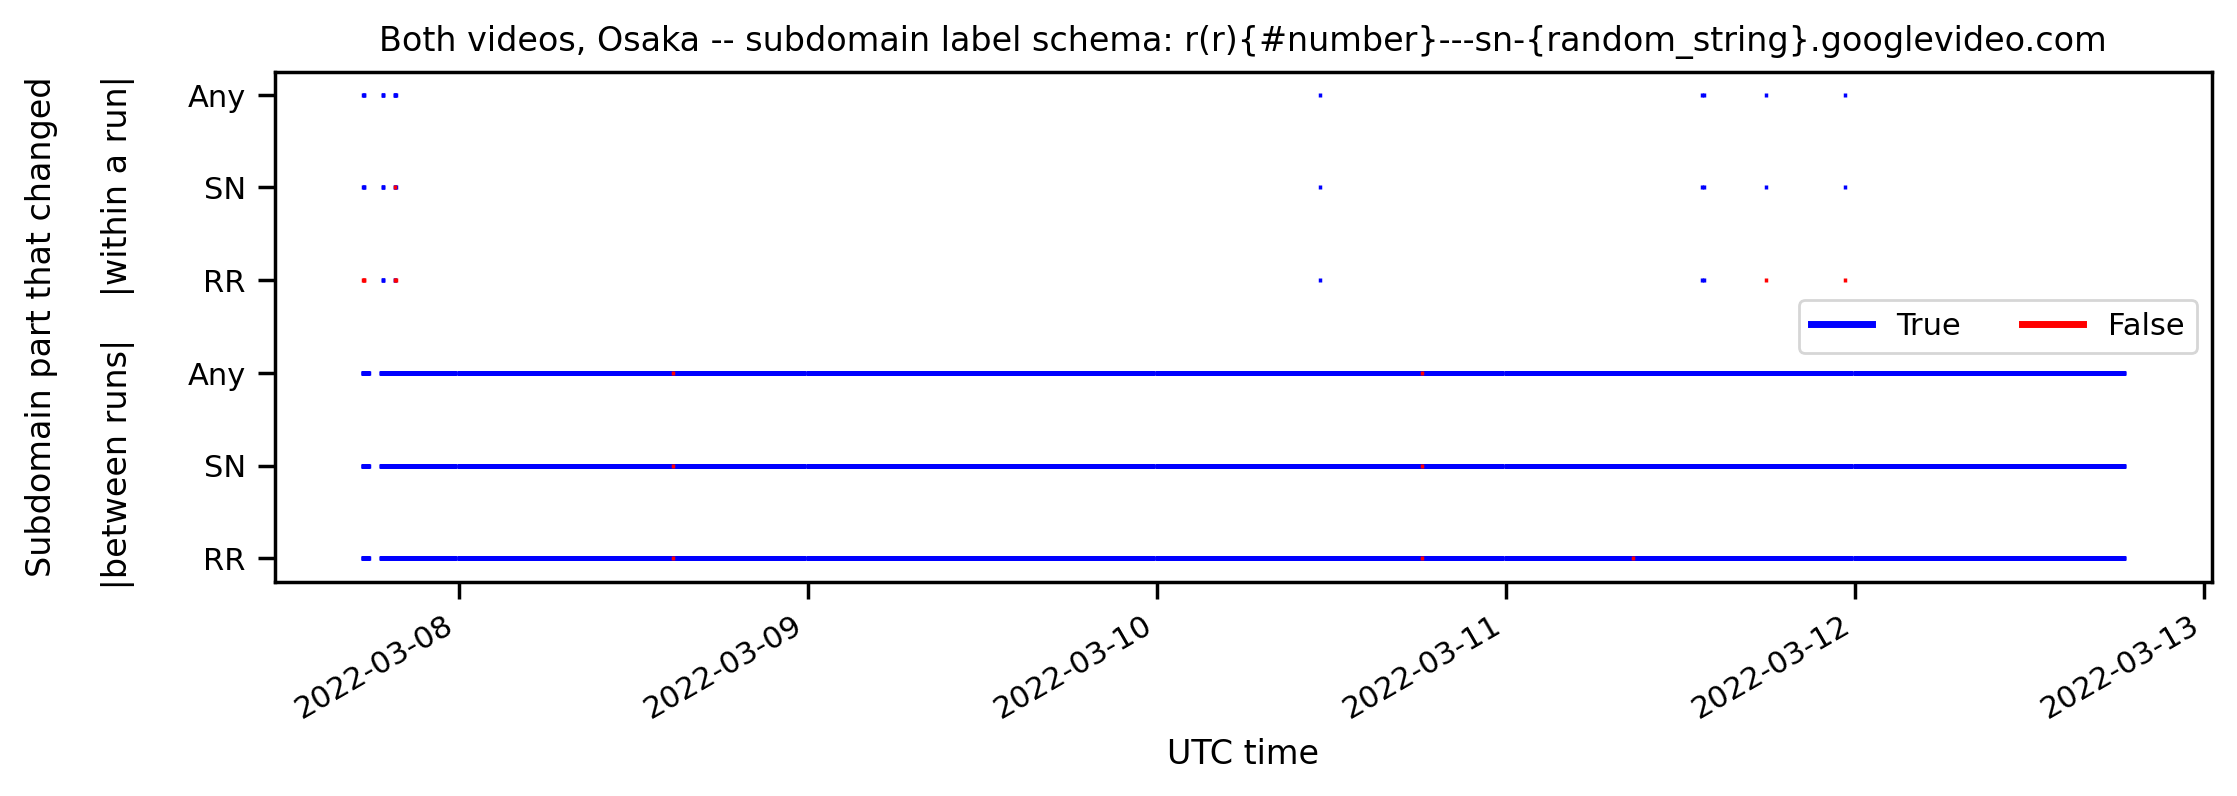

In [154]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
labels = ['rr_changed_btw_msm', 'sn_changed_btw_msm', 'subdomain_changed_btw_msm', 
          'rr_changed_in_msm', 'sn_changed_in_msm', 'subdomain_changed_in_msm']
label_map={'rr_changed_btw_msm': 'RR string changed between runs', 
           'sn_changed_btw_msm':'SN string changed between runs', 
           'subdomain_changed_btw_msm':'Whole subdomain changed between runs', 
          'rr_changed_in_msm':'RR string changed within run', 
           'sn_changed_in_msm':'SN string changed within run', 
           'subdomain_changed_in_msm':'Whole subdomain changed within run'}
cmap = {True:'blue', False:'red'}
for idx in range(len(labels)):
    label=labels[idx]
    for is_true in [True, False]:
        df_tmp = lookups_jp[(lookups_jp[label] == is_true)][['first_time_seen']].set_index('first_time_seen')
        df_tmp[label_map[label]+' '+str(is_true)] = idx+1.
        df_tmp.plot(y=label_map[label]+' '+str(is_true), ax=ax, marker="|", markersize=1, drawstyle="default", lw=0, color=cmap[is_true])
#df_tmp.plot(ax=ax, marker=2, markersize=3, drawstyle="default", lw=0, color='C2')
ax.legend_.remove()
ax.set_title("Both videos, Osaka -- subdomain label schema: r(r){#number}---sn-{random_string}.googlevideo.com")
ax.set_yticks([1.,2.,3.,4.,5.,6.])
ax.set_yticklabels(['RR', 'SN', 'Any', 'RR', 'SN', 'Any'])
ax.set_ylabel('Subdomain part that changed\n\n |between runs|    |within a run|  \n')
ax.set_xlabel("UTC time")
legend_elements = [mpl.lines.Line2D([0], [0], color=cmap[legend_item], lw=2, label=legend_item, marker='') for legend_item in cmap.keys()]
plt.gca().legend(handles=legend_elements, loc='best', ncol=2)#, bbox_to_anchor=(.5, -.4))

/tmp/ipykernel_20197/3126872286.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  last_row = pd.Series()


False    2476
True     1642
Name: subdomain_changed_btw_msm, dtype: int64


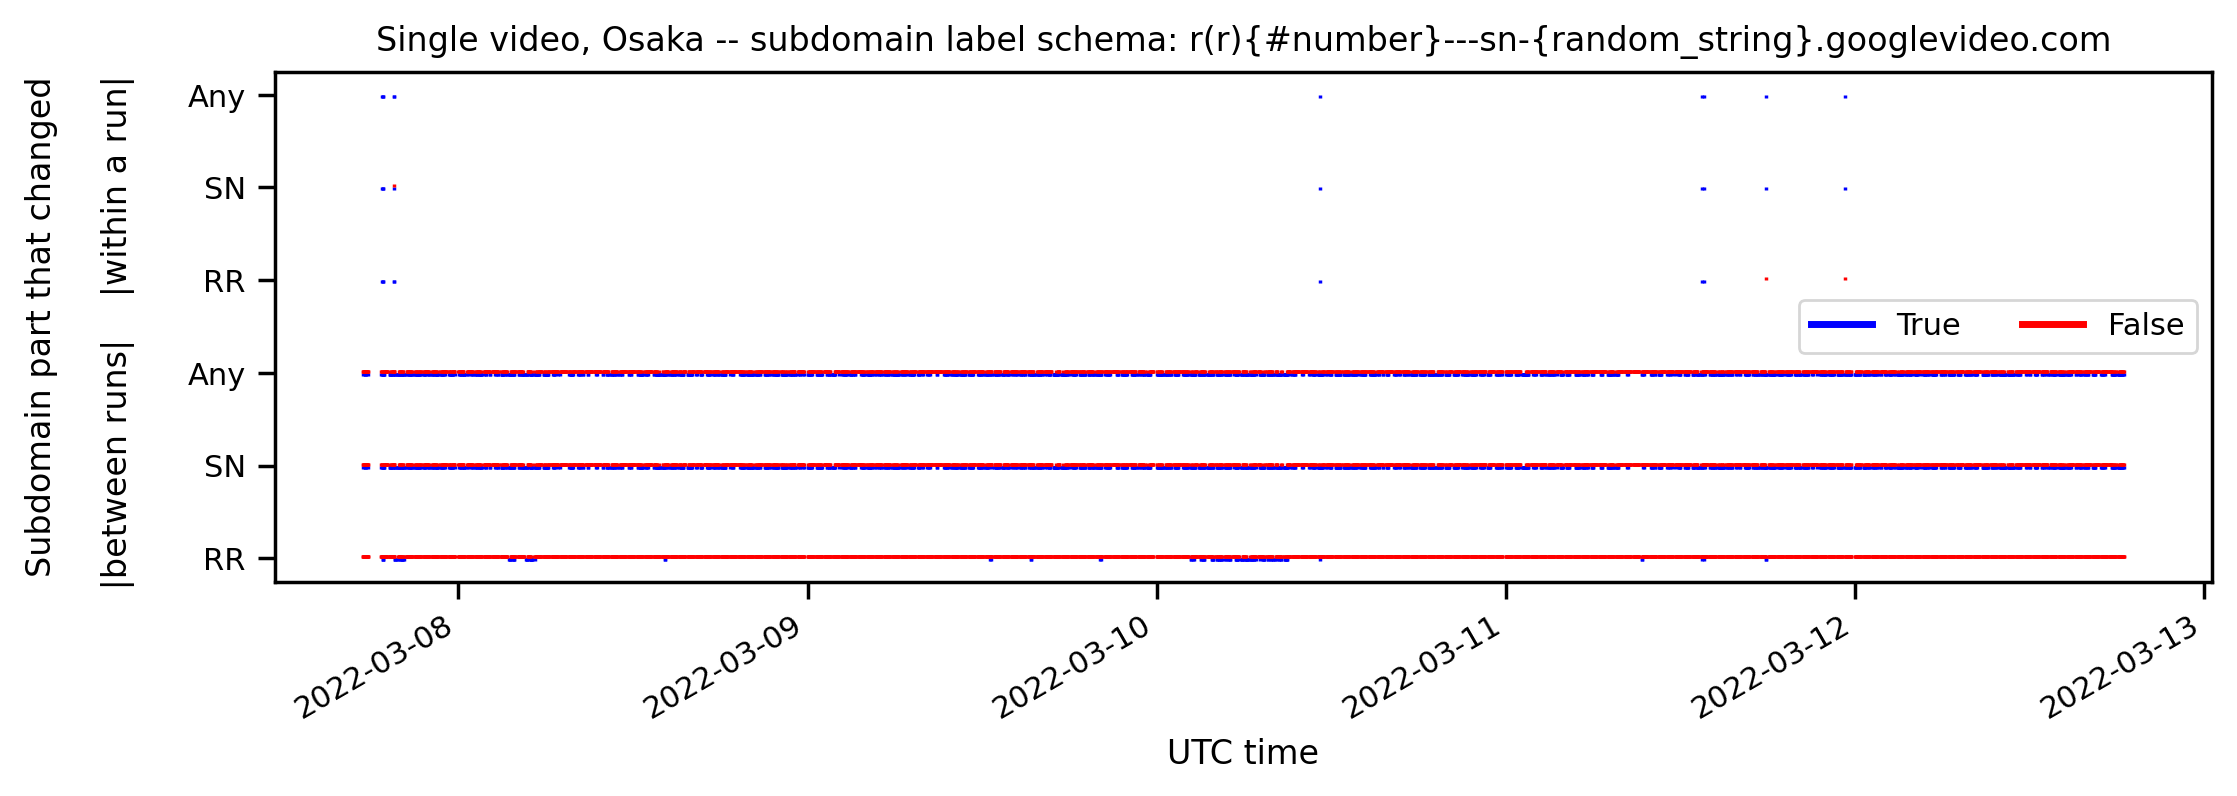

In [155]:
lookups_jp_single_video = lookups_jp[lookups_jp.video_id == 'aqz-KE-bpKQ'].copy()
lookups_jp_single_video.reset_index(drop=True, inplace=True)
lookups_jp_single_video['rr_changed_btw_msm'] = np.nan
lookups_jp_single_video['sn_changed_btw_msm'] = np.nan
lookups_jp_single_video['subdomain_changed_btw_msm'] = np.nan
lookups_jp_single_video['rr_changed_in_msm'] = np.nan
lookups_jp_single_video['sn_changed_in_msm'] = np.nan
lookups_jp_single_video['subdomain_changed_in_msm'] = np.nan
lookups_jp_single_video = lookups_jp_single_video.sort_values('first_time_seen')
last_row = pd.Series()
for index, row in lookups_jp_single_video.iterrows():
    if index == 0:
        last_row = row
        continue
    else:
        if row['msm_id'] == last_row['msm_id']:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_jp_single_video.loc[index, 'rr_changed_in_msm'] = False
            else:
                lookups_jp_single_video.loc[index, 'rr_changed_in_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_jp_single_video.loc[index, 'sn_changed_in_msm'] = False
            else:
                lookups_jp_single_video.loc[index, 'sn_changed_in_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_jp_single_video.loc[index, 'subdomain_changed_in_msm'] = False
            else:
                lookups_jp_single_video.loc[index, 'subdomain_changed_in_msm'] = True
        else:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_jp_single_video.loc[index, 'rr_changed_btw_msm'] = False
            else:
                lookups_jp_single_video.loc[index, 'rr_changed_btw_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_jp_single_video.loc[index, 'sn_changed_btw_msm'] = False
            else:
                lookups_jp_single_video.loc[index, 'sn_changed_btw_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_jp_single_video.loc[index, 'subdomain_changed_btw_msm'] = False
            else:
                lookups_jp_single_video.loc[index, 'subdomain_changed_btw_msm'] = True
        last_row = row
        
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
labels = ['rr_changed_btw_msm', 'sn_changed_btw_msm', 'subdomain_changed_btw_msm', 
          'rr_changed_in_msm', 'sn_changed_in_msm', 'subdomain_changed_in_msm']
label_map={'rr_changed_btw_msm': 'RR string changed between runs', 
           'sn_changed_btw_msm':'SN string changed between runs', 
           'subdomain_changed_btw_msm':'Whole subdomain changed between runs', 
          'rr_changed_in_msm':'RR string changed within run', 
           'sn_changed_in_msm':'SN string changed within run', 
           'subdomain_changed_in_msm':'Whole subdomain changed within run'}
cmap = {True:'blue', False:'red'}
for idx in range(len(labels)):
    label=labels[idx]
    for is_true in [True, False]:
        df_tmp = lookups_jp_single_video[(lookups_jp_single_video[label] == is_true)][['first_time_seen']].set_index('first_time_seen')
        df_tmp[label_map[label]+' '+str(is_true)] = (idx+1)/10
        df_tmp.plot(y=label_map[label]+' '+str(is_true), ax=ax, marker=is_true+2, markersize=1, drawstyle="default", lw=0, color=cmap[is_true])
#df_tmp.plot(ax=ax, marker=2, markersize=3, drawstyle="default", lw=0, color='C2')
ax.legend_.remove()
ax.set_title("Single video, Osaka -- subdomain label schema: r(r){#number}---sn-{random_string}.googlevideo.com")
ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6])
ax.set_yticklabels(['RR', 'SN', 'Any', 'RR', 'SN', 'Any'])
ax.set_ylabel('Subdomain part that changed\n\n |      between runs      |                  |        within a run       |\n')
ax.set_ylabel('Subdomain part that changed\n\n |between runs|    |within a run|  \n')
ax.set_xlabel("UTC time")
legend_elements = [mpl.lines.Line2D([0], [0], color=cmap[legend_item], lw=2, label=legend_item, marker='') for legend_item in cmap.keys()]
plt.gca().legend(handles=legend_elements, loc='best', ncol=2)#, bbox_to_anchor=(.5, -.4))
print(lookups_jp_single_video.subdomain_changed_btw_msm.value_counts())
plt.show()

/tmp/ipykernel_20197/4047212799.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  last_row = pd.Series()


False    2536
True     1581
Name: subdomain_changed_btw_msm, dtype: int64


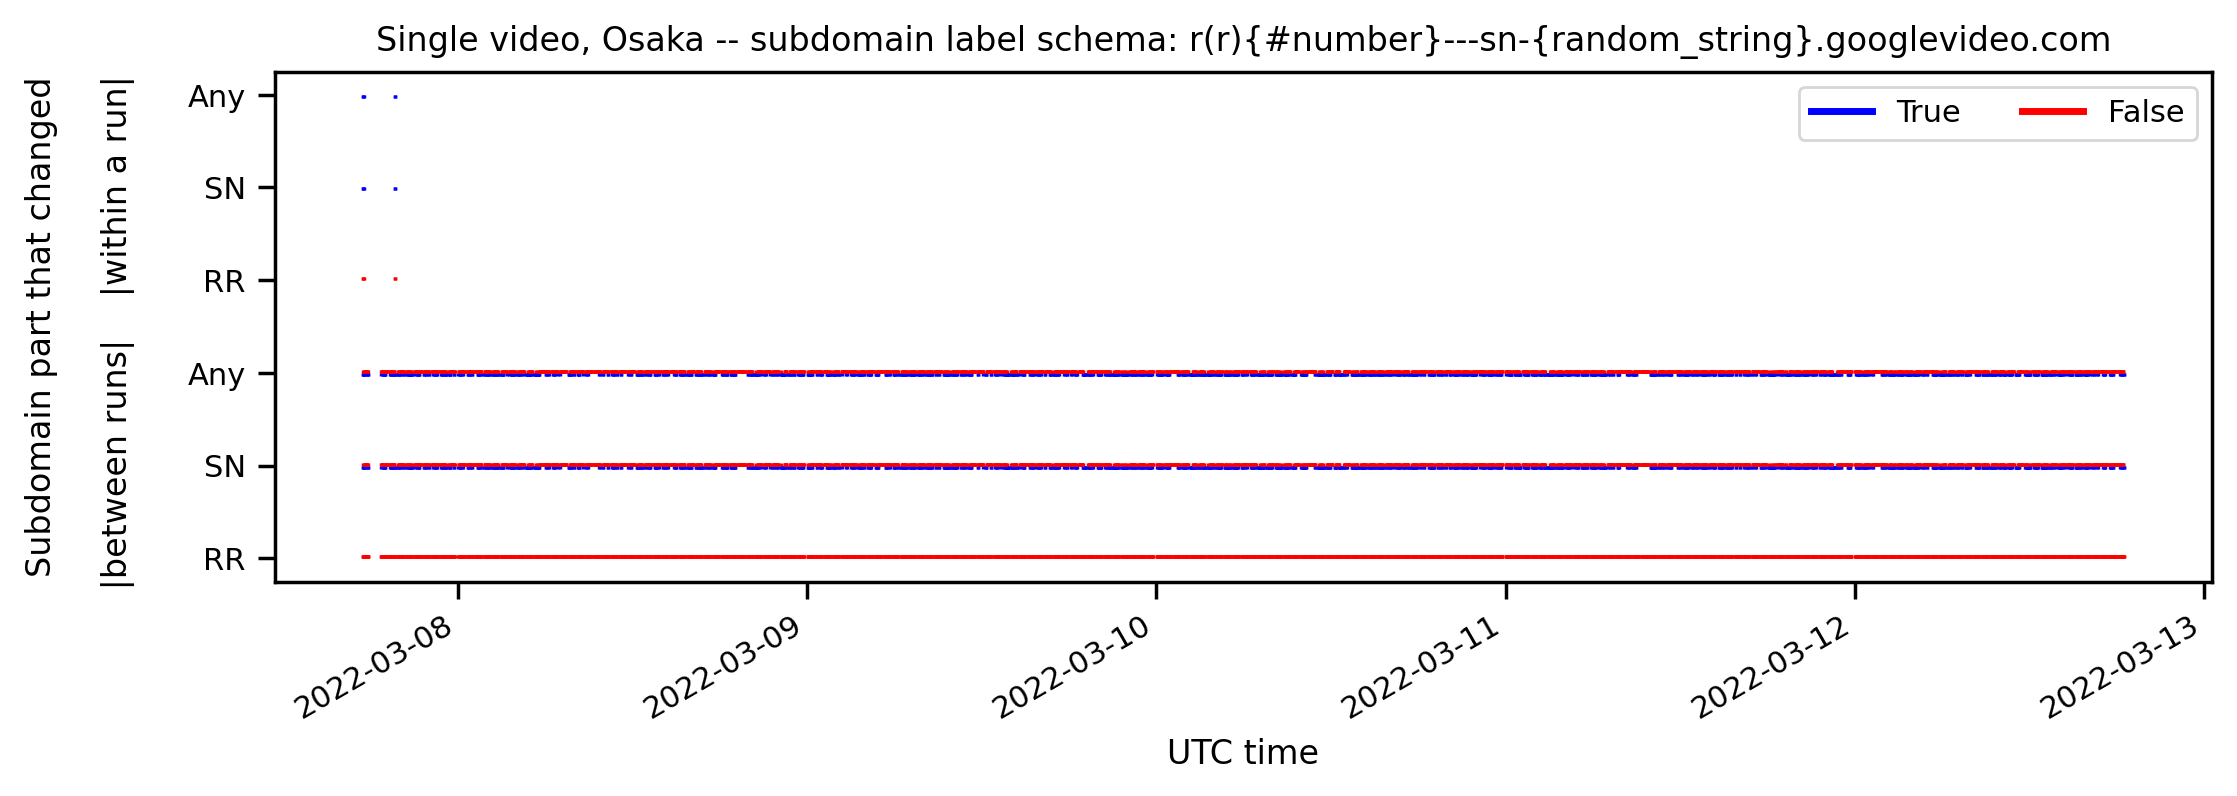

In [156]:
lookups_jp_single_video = lookups_jp[lookups_jp.video_id == 'lqiN98z6Dak'].copy()
lookups_jp_single_video.reset_index(drop=True, inplace=True)
lookups_jp_single_video['rr_changed_btw_msm'] = np.nan
lookups_jp_single_video['sn_changed_btw_msm'] = np.nan
lookups_jp_single_video['subdomain_changed_btw_msm'] = np.nan
lookups_jp_single_video['rr_changed_in_msm'] = np.nan
lookups_jp_single_video['sn_changed_in_msm'] = np.nan
lookups_jp_single_video['subdomain_changed_in_msm'] = np.nan
lookups_jp_single_video = lookups_jp_single_video.sort_values('first_time_seen')
last_row = pd.Series()
for index, row in lookups_jp_single_video.iterrows():
    if index == 0:
        last_row = row
        continue
    else:
        if row['msm_id'] == last_row['msm_id']:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_jp_single_video.loc[index, 'rr_changed_in_msm'] = False
            else:
                lookups_jp_single_video.loc[index, 'rr_changed_in_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_jp_single_video.loc[index, 'sn_changed_in_msm'] = False
            else:
                lookups_jp_single_video.loc[index, 'sn_changed_in_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_jp_single_video.loc[index, 'subdomain_changed_in_msm'] = False
            else:
                lookups_jp_single_video.loc[index, 'subdomain_changed_in_msm'] = True
        else:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_jp_single_video.loc[index, 'rr_changed_btw_msm'] = False
            else:
                lookups_jp_single_video.loc[index, 'rr_changed_btw_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_jp_single_video.loc[index, 'sn_changed_btw_msm'] = False
            else:
                lookups_jp_single_video.loc[index, 'sn_changed_btw_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_jp_single_video.loc[index, 'subdomain_changed_btw_msm'] = False
            else:
                lookups_jp_single_video.loc[index, 'subdomain_changed_btw_msm'] = True
        last_row = row
        
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
labels = ['rr_changed_btw_msm', 'sn_changed_btw_msm', 'subdomain_changed_btw_msm', 
          'rr_changed_in_msm', 'sn_changed_in_msm', 'subdomain_changed_in_msm']
label_map={'rr_changed_btw_msm': 'RR string changed between runs', 
           'sn_changed_btw_msm':'SN string changed between runs', 
           'subdomain_changed_btw_msm':'Whole subdomain changed between runs', 
          'rr_changed_in_msm':'RR string changed within run', 
           'sn_changed_in_msm':'SN string changed within run', 
           'subdomain_changed_in_msm':'Whole subdomain changed within run'}
cmap = {True:'blue', False:'red'}
for idx in range(len(labels)):
    label=labels[idx]
    for is_true in [True, False]:
        df_tmp = lookups_jp_single_video[(lookups_jp_single_video[label] == is_true)][['first_time_seen']].set_index('first_time_seen')
        df_tmp[label_map[label]+' '+str(is_true)] = (idx+1)/10
        df_tmp.plot(y=label_map[label]+' '+str(is_true), ax=ax, marker=is_true+2, markersize=1, drawstyle="default", lw=0, color=cmap[is_true])
#df_tmp.plot(ax=ax, marker=2, markersize=3, drawstyle="default", lw=0, color='C2')
ax.legend_.remove()
ax.set_title("Single video, Osaka -- subdomain label schema: r(r){#number}---sn-{random_string}.googlevideo.com")
ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6])
ax.set_yticklabels(['RR', 'SN', 'Any', 'RR', 'SN', 'Any'])
ax.set_ylabel('Subdomain part that changed\n\n |      between runs      |                  |        within a run       |\n')
ax.set_ylabel('Subdomain part that changed\n\n |between runs|    |within a run|  \n')
ax.set_xlabel("UTC time")
legend_elements = [mpl.lines.Line2D([0], [0], color=cmap[legend_item], lw=2, label=legend_item, marker='') for legend_item in cmap.keys()]
plt.gca().legend(handles=legend_elements, loc='best', ncol=2)#, bbox_to_anchor=(.5, -.4))
print(lookups_jp_single_video.subdomain_changed_btw_msm.value_counts())
plt.show()

### Australia

In [157]:
measurements_au = measurements[measurements.vantagePoint == 'Asia Pacific Southeast'].copy()
lookups_au = lookups[lookups.msm_id.isin(measurements_au.msm_id.unique())].copy()
googlevideo_subdomains_au = googlevideo_subdomains[googlevideo_subdomains.msm_id.isin(measurements_au.msm_id.unique())].copy()
googlevideo_requests_au = googlevideo_requests[googlevideo_requests.msm_id.isin(measurements_au.msm_id.unique())].copy()
measurements_au.reset_index(drop=True, inplace=True)
lookups_au.reset_index(drop=True, inplace=True)

In [158]:
lookups_au[lookups_au.status == 'NOERROR'].groupby('video_subdomain', as_index=False).agg(ip_addr_count=('ip_addr',pd.Series.nunique), ip_addrs=('ip_addr',pd.Series.unique)).sort_values('ip_addr_count')

video_subdomain  ip_addr_count  \
0    r2---sn-ntq7yned              1   
1    r2---sn-ntqe6nez              1   
2    r4---sn-ntq7ynle              1   
3    r4---sn-ntqe6n76              1   
5   rr2---sn-npoe7nsl              1   
6   rr2---sn-ntq7yned              1   
7   rr2---sn-ntqe6nez              1   
8   rr3---sn-npoe7nsl              1   
9   rr3---sn-npoeened              1   
10  rr4---sn-npoe7nss              1   
11  rr4---sn-npoldn7s              1   
12  rr4---sn-ntq7ynle              1   
13  rr4---sn-ntqe6n76              1   
4          redirector             11   

                                             ip_addrs  
0                                       173.194.28.39  
1                                       74.125.152.39  
2                                      74.125.109.233  
3                                        173.194.28.9  
5                                       173.194.59.39  
6                                       173.194.28.39  
7                                       74.125.152.39  
8                                       173.194.59.40  
9                                      74.125.101.200  
10                                      173.194.59.73  
11                                      142.251.85.41  
12                                     74.125.109.233  
13                                       173.194.28.9  
4   [74.125.24.100, 74.125.200.139, 74.125.200.113...

In [159]:
measurements_au.error.unique()

array(['',
       'failed switching selenium focus to youtube iframe or monitoring loop ### Message: \n',
       'failed loading player ### Message: \n'], dtype=object)

In [160]:
lookups_au[lookups_au.status != 'NOERROR']

msm_id  \
883   2a351d9b-71e7-e57b-6d6c-11367082ff97   
1285  4b8d196d-d6d7-ccd2-af0d-37b028d793dc   
2530  2a4f4d4d-29f5-700f-bc19-a5a526e50357   
2936  6ba9d8ef-e2d5-2a24-a350-57b5fbb454a7   
3179  0fdddd03-7d48-d51a-d3bd-b2d4aad88fa3   
4462  be154033-e67a-e62d-7a2f-3529c428724f   
4547  d12e2547-0d10-d765-c4de-ea50c6a98703   
4876  a7662419-1d7f-a7cc-9b68-58167810ef54   
6437  09f35412-60bc-4578-d7bf-de6e90abed67   
7523  69b1634b-9161-5999-7285-f72747171c6b   
7926  4247e9d7-a4cd-ef57-b492-fcf88bd55b6a   
8083  5a7169f3-0e76-f242-2a16-c66a3b24b735   

                                  domain       elapsed    status  \
883   rr2---sn-ntqe6nez.googlevideo.com.  10001.943156  SERVFAIL   
1285  rr4---sn-ntqe6n76.googlevideo.com.  10002.130893  SERVFAIL   
2530  rr4---sn-ntq7ynle.googlevideo.com.  10004.395058  SERVFAIL   
2936  rr4---sn-ntqe6n76.googlevideo.com.  10000.685011  SERVFAIL   
3179  rr2---sn-ntqe6nez.googlevideo.com.  10003.922966  SERVFAIL   
4462  rr4---sn-ntqe6n76.googlevideo.com.  10002.480761  SERVFAIL   
4547  rr2---sn-ntqe6nez.googlevideo.com.  10002.483594  SERVFAIL   
4876  rr2---sn-ntq7yned.googlevideo.com.  10003.289771  SERVFAIL   
6437  rr2---sn-ntqe6nez.googlevideo.com.  10001.968658  SERVFAIL   
7523  rr4---sn-ntqe6n76.googlevideo.com.  10002.223409  SERVFAIL   
7926  rr2---sn-ntqe6nez.googlevideo.com.  10000.414150  SERVFAIL   
8083  rr2---sn-ntqe6nez.googlevideo.com.  10001.454615  SERVFAIL   

                                                 answer  \
883   read udp 172.31.32.114:57967->94.140.15.15:53:...   
1285  read udp 172.31.32.114:38146->94.140.15.15:53:...   
2530  read udp 172.31.32.114:33468->94.140.15.15:53:...   
2936  read udp 172.31.32.114:44103->94.140.15.15:53:...   
3179  read udp 172.31.32.114:43613->94.140.15.15:53:...   
4462  read udp 172.31.32.114:53034->94.140.15.15:53:...   
4547  read udp 172.31.32.114:55190->94.140.15.15:53:...   
4876  read udp 172.31.32.114:34535->94.140.15.15:53:...   
6437  read udp 172.31.32.114:43015->94.140.15.15:53:...   
7523  read udp 172.31.32.114:34452->94.140.15.15:53:...   
7926  read udp 172.31.32.114:43213->94.140.15.15:53:...   
8083  read udp 172.31.32.114:41356->94.140.15.15:53:...   

                                                ip_addr round_robin_str  \
883   read udp 172.31.32.114:57967->94.140.15.15:53:...             rr2   
1285  read udp 172.31.32.114:38146->94.140.15.15:53:...             rr4   
2530  read udp 172.31.32.114:33468->94.140.15.15:53:...             rr4   
2936  read udp 172.31.32.114:44103->94.140.15.15:53:...             rr4   
3179  read udp 172.31.32.114:43613->94.140.15.15:53:...             rr2   
4462  read udp 172.31.32.114:53034->94.140.15.15:53:...             rr4   
4547  read udp 172.31.32.114:55190->94.140.15.15:53:...             rr2   
4876  read udp 172.31.32.114:34535->94.140.15.15:53:...             rr2   
6437  read udp 172.31.32.114:43015->94.140.15.15:53:...             rr2   
7523  read udp 172.31.32.114:34452->94.140.15.15:53:...             rr4   
7926  read udp 172.31.32.114:43213->94.140.15.15:53:...             rr2   
8083  read udp 172.31.32.114:41356->94.140.15.15:53:...             rr2   

      rand_sn_str    video_subdomain  \
883   sn-ntqe6nez  rr2---sn-ntqe6nez   
1285  sn-ntqe6n76  rr4---sn-ntqe6n76   
2530  sn-ntq7ynle  rr4---sn-ntq7ynle   
2936  sn-ntqe6n76  rr4---sn-ntqe6n76   
3179  sn-ntqe6nez  rr2---sn-ntqe6nez   
4462  sn-ntqe6n76  rr4---sn-ntqe6n76   
4547  sn-ntqe6nez  rr2---sn-ntqe6nez   
4876  sn-ntq7yned  rr2---sn-ntq7yned   
6437  sn-ntqe6nez  rr2---sn-ntqe6nez   
7523  sn-ntqe6n76  rr4---sn-ntqe6n76   
7926  sn-ntqe6nez  rr2---sn-ntqe6nez   
8083  sn-ntqe6nez  rr2---sn-ntqe6nez   

                                       subdomain_and_ip  \
883   rr2---sn-ntqe6nez-read udp 172.31.32.114:57967...   
1285  rr4---sn-ntqe6n76-read udp 172.31.32.114:38146...   
2530  rr4---sn-ntq7ynle-read udp 172.31.32.114:33468...   
2936  rr4---sn-ntqe6n76-read udp 172.31.32.114:4410

In [161]:
lookups_au = lookups_au[lookups_au.status == 'NOERROR']

In [162]:
lookups_au[lookups_au.video_subdomain == 'redirector'].video_id.value_counts()

aqz-KE-bpKQ    9
lqiN98z6Dak    6
Name: video_id, dtype: int64

In [163]:
lookups_au[lookups_au.video_subdomain != 'redirector'].groupby('rand_sn_str').agg(rr_count=('round_robin_str', pd.Series.nunique)).sort_values('rr_count')

rr_count
rand_sn_str          
sn-npoe7nss         1
sn-npoeened         1
sn-npoldn7s         1
sn-npoe7nsl         2
sn-ntq7yned         2
sn-ntq7ynle         2
sn-ntqe6n76         2
sn-ntqe6nez         2

In [164]:
lookups_au[lookups_au.video_subdomain != 'redirector'].groupby('rand_sn_str').filter(lambda x: pd.Series.nunique(x['round_robin_str']) > 1).groupby('rand_sn_str', as_index=False).agg(rr_strs=('round_robin_str', pd.Series.unique))

rand_sn_str     rr_strs
0  sn-npoe7nsl  [rr2, rr3]
1  sn-ntq7yned   [rr2, r2]
2  sn-ntq7ynle   [rr4, r4]
3  sn-ntqe6n76   [rr4, r4]
4  sn-ntqe6nez   [rr2, r2]

In [165]:
lookups_au = lookups_au[lookups_au.video_subdomain != 'redirector']
lookups_au.reset_index(drop=True, inplace=True)
lookups_au['rr_changed_btw_msm'] = np.nan
lookups_au['sn_changed_btw_msm'] = np.nan
lookups_au['subdomain_changed_btw_msm'] = np.nan
lookups_au['rr_changed_in_msm'] = np.nan
lookups_au['sn_changed_in_msm'] = np.nan
lookups_au['subdomain_changed_in_msm'] = np.nan
lookups_au = lookups_au.sort_values('first_time_seen')
last_row = pd.Series()
for index, row in lookups_au.iterrows():
    if index == 0:
        last_row = row
        continue
    else:
        if row['msm_id'] == last_row['msm_id']:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_au.loc[index, 'rr_changed_in_msm'] = False
            else:
                lookups_au.loc[index, 'rr_changed_in_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_au.loc[index, 'sn_changed_in_msm'] = False
            else:
                lookups_au.loc[index, 'sn_changed_in_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_au.loc[index, 'subdomain_changed_in_msm'] = False
            else:
                lookups_au.loc[index, 'subdomain_changed_in_msm'] = True
        else:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_au.loc[index, 'rr_changed_btw_msm'] = False
            else:
                lookups_au.loc[index, 'rr_changed_btw_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_au.loc[index, 'sn_changed_btw_msm'] = False
            else:
                lookups_au.loc[index, 'sn_changed_btw_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_au.loc[index, 'subdomain_changed_btw_msm'] = False
            else:
                lookups_au.loc[index, 'subdomain_changed_btw_msm'] = True
        last_row = row

print(lookups_au['ip_addr/24'].nunique())
print(lookups_au['rand_sn_str'].nunique())

/tmp/ipykernel_20197/3769661092.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  last_row = pd.Series()


6
8


In [166]:
lookups_au.groupby('rand_sn_str', as_index=False).agg(count24=('ip_addr/24', pd.Series.nunique), count16=('ip_addr/16', pd.Series.nunique)).sort_values('count16')

rand_sn_str  count24  count16
0  sn-npoe7nsl        1        1
1  sn-npoe7nss        1        1
2  sn-npoeened        1        1
3  sn-npoldn7s        1        1
4  sn-ntq7yned        1        1
5  sn-ntq7ynle        1        1
6  sn-ntqe6n76        1        1
7  sn-ntqe6nez        1        1

In [167]:
lookups_au.groupby('ip_addr/24', as_index=False).agg(count_sn=('rand_sn_str', pd.Series.unique))

ip_addr/24                    count_sn
0  142.251.85                 sn-npoldn7s
1  173.194.28  [sn-ntq7yned, sn-ntqe6n76]
2  173.194.59  [sn-npoe7nss, sn-npoe7nsl]
3  74.125.101                 sn-npoeened
4  74.125.109                 sn-ntq7ynle
5  74.125.152                 sn-ntqe6nez

In [168]:
lookups_au['sn_length'] = lookups_au['rand_sn_str'].str.len()
print(lookups_au.sn_length.value_counts())

11    8262
Name: sn_length, dtype: int64


In [169]:
lookups_au.groupby('ip_addr/24', as_index=False).agg(count_sn_overlap=('rand_sn_str', lambda x: count_largest_sn_overlap(pd.Series.unique(x).tolist())), sn_overlap=('rand_sn_str', lambda x: largest_sn_overlap(pd.Series.unique(x).tolist())))

ip_addr/24  count_sn_overlap   sn_overlap
0  142.251.85                11  sn-npoldn7s
1  173.194.28                 6       sn-ntq
2  173.194.59                10   sn-npoe7ns
3  74.125.101                11  sn-npoeened
4  74.125.109                11  sn-ntq7ynle
5  74.125.152                11  sn-ntqe6nez

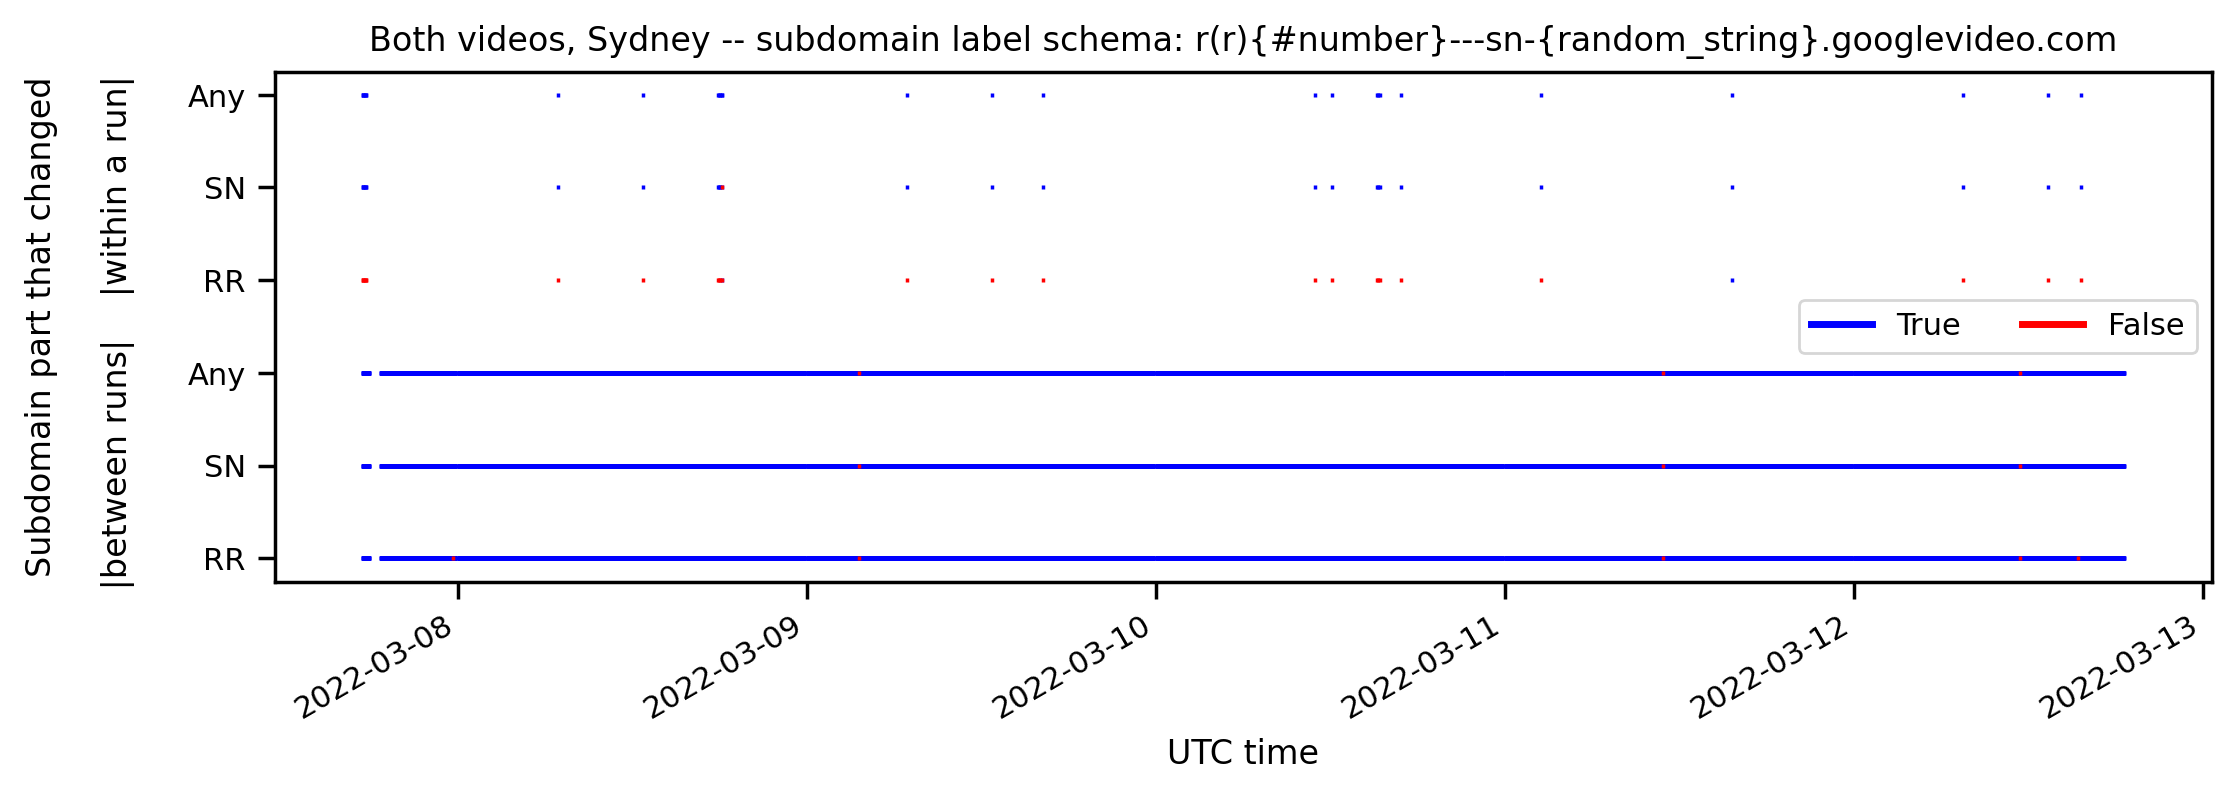

In [170]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
labels = ['rr_changed_btw_msm', 'sn_changed_btw_msm', 'subdomain_changed_btw_msm', 
          'rr_changed_in_msm', 'sn_changed_in_msm', 'subdomain_changed_in_msm']
label_map={'rr_changed_btw_msm': 'RR string changed between runs', 
           'sn_changed_btw_msm':'SN string changed between runs', 
           'subdomain_changed_btw_msm':'Whole subdomain changed between runs', 
          'rr_changed_in_msm':'RR string changed within run', 
           'sn_changed_in_msm':'SN string changed within run', 
           'subdomain_changed_in_msm':'Whole subdomain changed within run'}
cmap = {True:'blue', False:'red'}
for idx in range(len(labels)):
    label=labels[idx]
    for is_true in [True, False]:
        df_tmp = lookups_au[(lookups_au[label] == is_true)][['first_time_seen']].set_index('first_time_seen')
        df_tmp[label_map[label]+' '+str(is_true)] = idx+1.
        df_tmp.plot(y=label_map[label]+' '+str(is_true), ax=ax, marker="|", markersize=1, drawstyle="default", lw=0, color=cmap[is_true])
#df_tmp.plot(ax=ax, marker=2, markersize=3, drawstyle="default", lw=0, color='C2')
ax.legend_.remove()
ax.set_title("Both videos, Sydney -- subdomain label schema: r(r){#number}---sn-{random_string}.googlevideo.com")
ax.set_yticks([1.,2.,3.,4.,5.,6.])
ax.set_yticklabels(['RR', 'SN', 'Any', 'RR', 'SN', 'Any'])
ax.set_ylabel('Subdomain part that changed\n\n |between runs|    |within a run|  \n')
ax.set_xlabel("UTC time")
legend_elements = [mpl.lines.Line2D([0], [0], color=cmap[legend_item], lw=2, label=legend_item, marker='') for legend_item in cmap.keys()]
plt.gca().legend(handles=legend_elements, loc='best', ncol=2)#, bbox_to_anchor=(.5, -.4))

/tmp/ipykernel_20197/549990609.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  last_row = pd.Series()


False    2124
True     1993
Name: subdomain_changed_btw_msm, dtype: int64


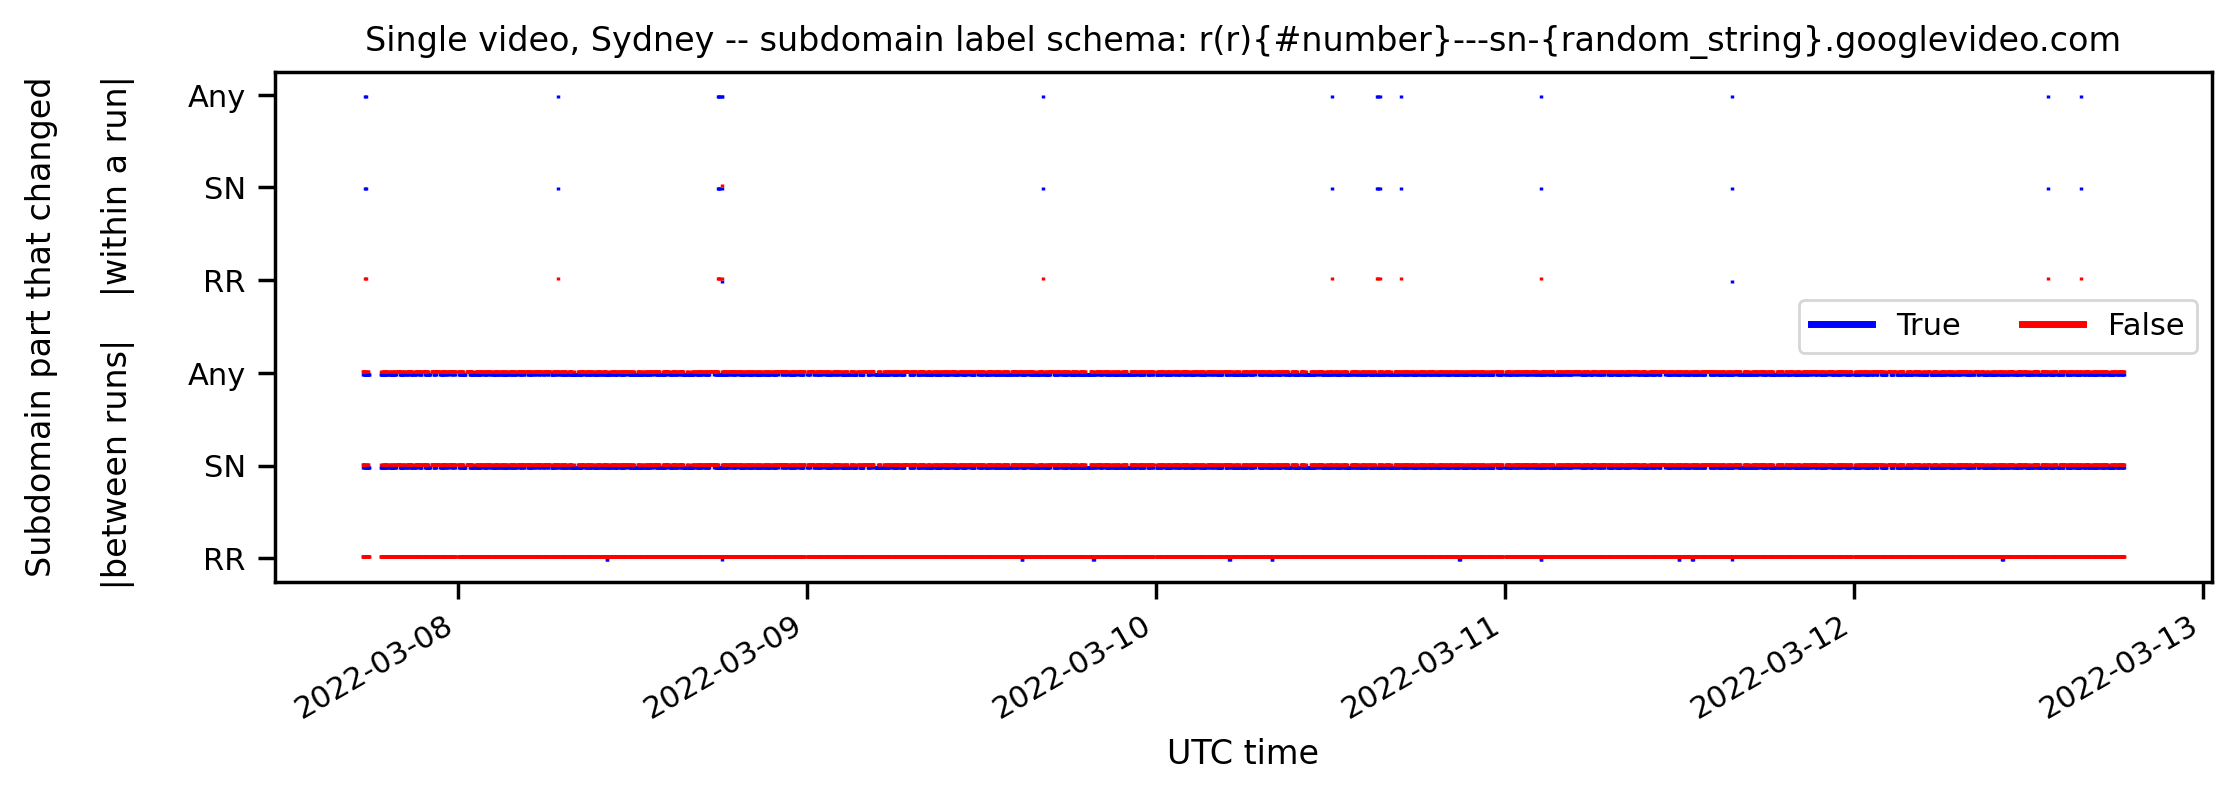

In [171]:
lookups_au_single_video = lookups_au[lookups_au.video_id == 'aqz-KE-bpKQ'].copy()
lookups_au_single_video.reset_index(drop=True, inplace=True)
lookups_au_single_video['rr_changed_btw_msm'] = np.nan
lookups_au_single_video['sn_changed_btw_msm'] = np.nan
lookups_au_single_video['subdomain_changed_btw_msm'] = np.nan
lookups_au_single_video['rr_changed_in_msm'] = np.nan
lookups_au_single_video['sn_changed_in_msm'] = np.nan
lookups_au_single_video['subdomain_changed_in_msm'] = np.nan
lookups_au_single_video = lookups_au_single_video.sort_values('first_time_seen')
last_row = pd.Series()
for index, row in lookups_au_single_video.iterrows():
    if index == 0:
        last_row = row
        continue
    else:
        if row['msm_id'] == last_row['msm_id']:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_au_single_video.loc[index, 'rr_changed_in_msm'] = False
            else:
                lookups_au_single_video.loc[index, 'rr_changed_in_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_au_single_video.loc[index, 'sn_changed_in_msm'] = False
            else:
                lookups_au_single_video.loc[index, 'sn_changed_in_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_au_single_video.loc[index, 'subdomain_changed_in_msm'] = False
            else:
                lookups_au_single_video.loc[index, 'subdomain_changed_in_msm'] = True
        else:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_au_single_video.loc[index, 'rr_changed_btw_msm'] = False
            else:
                lookups_au_single_video.loc[index, 'rr_changed_btw_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_au_single_video.loc[index, 'sn_changed_btw_msm'] = False
            else:
                lookups_au_single_video.loc[index, 'sn_changed_btw_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_au_single_video.loc[index, 'subdomain_changed_btw_msm'] = False
            else:
                lookups_au_single_video.loc[index, 'subdomain_changed_btw_msm'] = True
        last_row = row
        
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
labels = ['rr_changed_btw_msm', 'sn_changed_btw_msm', 'subdomain_changed_btw_msm', 
          'rr_changed_in_msm', 'sn_changed_in_msm', 'subdomain_changed_in_msm']
label_map={'rr_changed_btw_msm': 'RR string changed between runs', 
           'sn_changed_btw_msm':'SN string changed between runs', 
           'subdomain_changed_btw_msm':'Whole subdomain changed between runs', 
          'rr_changed_in_msm':'RR string changed within run', 
           'sn_changed_in_msm':'SN string changed within run', 
           'subdomain_changed_in_msm':'Whole subdomain changed within run'}
cmap = {True:'blue', False:'red'}
for idx in range(len(labels)):
    label=labels[idx]
    for is_true in [True, False]:
        df_tmp = lookups_au_single_video[(lookups_au_single_video[label] == is_true)][['first_time_seen']].set_index('first_time_seen')
        df_tmp[label_map[label]+' '+str(is_true)] = (idx+1)/10
        df_tmp.plot(y=label_map[label]+' '+str(is_true), ax=ax, marker=is_true+2, markersize=1, drawstyle="default", lw=0, color=cmap[is_true])
#df_tmp.plot(ax=ax, marker=2, markersize=3, drawstyle="default", lw=0, color='C2')
ax.legend_.remove()
ax.set_title("Single video, Sydney -- subdomain label schema: r(r){#number}---sn-{random_string}.googlevideo.com")
ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6])
ax.set_yticklabels(['RR', 'SN', 'Any', 'RR', 'SN', 'Any'])
ax.set_ylabel('Subdomain part that changed\n\n |      between runs      |                  |        within a run       |\n')
ax.set_ylabel('Subdomain part that changed\n\n |between runs|    |within a run|  \n')
ax.set_xlabel("UTC time")
legend_elements = [mpl.lines.Line2D([0], [0], color=cmap[legend_item], lw=2, label=legend_item, marker='') for legend_item in cmap.keys()]
plt.gca().legend(handles=legend_elements, loc='best', ncol=2)#, bbox_to_anchor=(.5, -.4))
print(lookups_au_single_video.subdomain_changed_btw_msm.value_counts())
plt.show()

/tmp/ipykernel_20197/229522847.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  last_row = pd.Series()


False    2195
True     1921
Name: subdomain_changed_btw_msm, dtype: int64


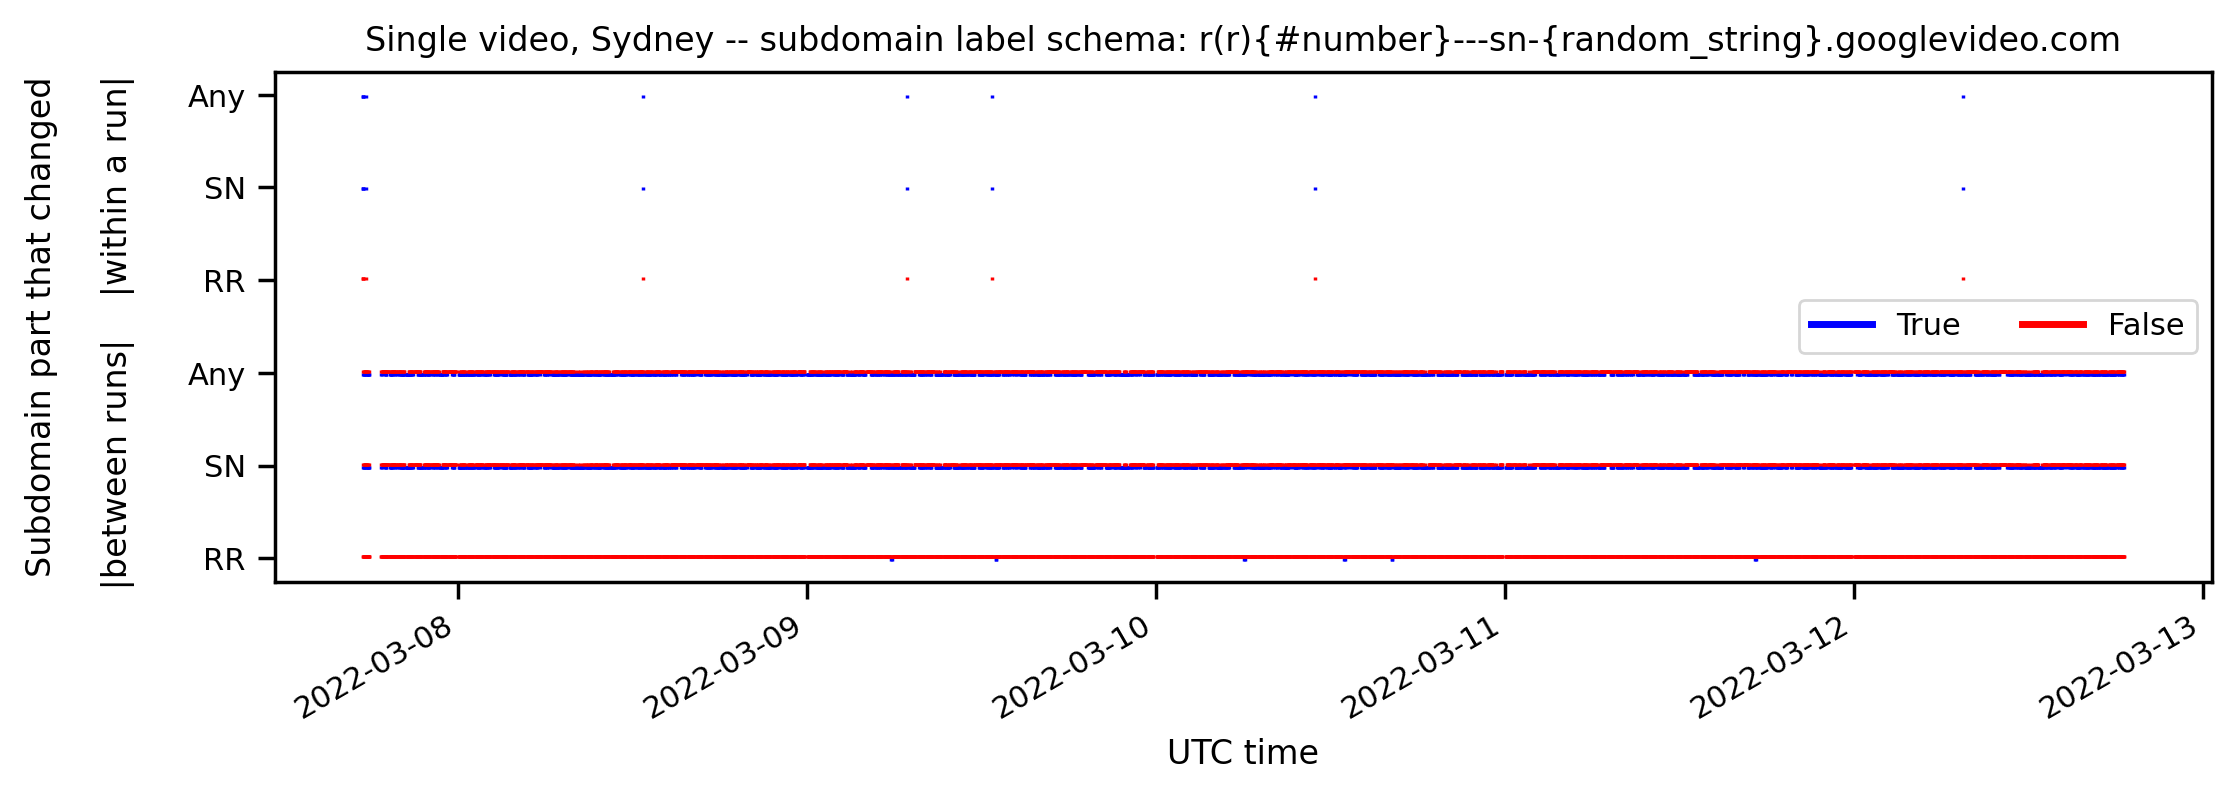

In [172]:
lookups_au_single_video = lookups_au[lookups_au.video_id == 'lqiN98z6Dak'].copy()
lookups_au_single_video.reset_index(drop=True, inplace=True)
lookups_au_single_video['rr_changed_btw_msm'] = np.nan
lookups_au_single_video['sn_changed_btw_msm'] = np.nan
lookups_au_single_video['subdomain_changed_btw_msm'] = np.nan
lookups_au_single_video['rr_changed_in_msm'] = np.nan
lookups_au_single_video['sn_changed_in_msm'] = np.nan
lookups_au_single_video['subdomain_changed_in_msm'] = np.nan
lookups_au_single_video = lookups_au_single_video.sort_values('first_time_seen')
last_row = pd.Series()
for index, row in lookups_au_single_video.iterrows():
    if index == 0:
        last_row = row
        continue
    else:
        if row['msm_id'] == last_row['msm_id']:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_au_single_video.loc[index, 'rr_changed_in_msm'] = False
            else:
                lookups_au_single_video.loc[index, 'rr_changed_in_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_au_single_video.loc[index, 'sn_changed_in_msm'] = False
            else:
                lookups_au_single_video.loc[index, 'sn_changed_in_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_au_single_video.loc[index, 'subdomain_changed_in_msm'] = False
            else:
                lookups_au_single_video.loc[index, 'subdomain_changed_in_msm'] = True
        else:
            if row['round_robin_str'] == last_row['round_robin_str']:
                lookups_au_single_video.loc[index, 'rr_changed_btw_msm'] = False
            else:
                lookups_au_single_video.loc[index, 'rr_changed_btw_msm'] = True
            if row['rand_sn_str'] == last_row['rand_sn_str']:
                lookups_au_single_video.loc[index, 'sn_changed_btw_msm'] = False
            else:
                lookups_au_single_video.loc[index, 'sn_changed_btw_msm'] = True
            if row['video_subdomain'] == last_row['video_subdomain']:
                lookups_au_single_video.loc[index, 'subdomain_changed_btw_msm'] = False
            else:
                lookups_au_single_video.loc[index, 'subdomain_changed_btw_msm'] = True
        last_row = row
        
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
labels = ['rr_changed_btw_msm', 'sn_changed_btw_msm', 'subdomain_changed_btw_msm', 
          'rr_changed_in_msm', 'sn_changed_in_msm', 'subdomain_changed_in_msm']
label_map={'rr_changed_btw_msm': 'RR string changed between runs', 
           'sn_changed_btw_msm':'SN string changed between runs', 
           'subdomain_changed_btw_msm':'Whole subdomain changed between runs', 
          'rr_changed_in_msm':'RR string changed within run', 
           'sn_changed_in_msm':'SN string changed within run', 
           'subdomain_changed_in_msm':'Whole subdomain changed within run'}
cmap = {True:'blue', False:'red'}
for idx in range(len(labels)):
    label=labels[idx]
    for is_true in [True, False]:
        df_tmp = lookups_au_single_video[(lookups_au_single_video[label] == is_true)][['first_time_seen']].set_index('first_time_seen')
        df_tmp[label_map[label]+' '+str(is_true)] = (idx+1)/10
        df_tmp.plot(y=label_map[label]+' '+str(is_true), ax=ax, marker=is_true+2, markersize=1, drawstyle="default", lw=0, color=cmap[is_true])
#df_tmp.plot(ax=ax, marker=2, markersize=3, drawstyle="default", lw=0, color='C2')
ax.legend_.remove()
ax.set_title("Single video, Sydney -- subdomain label schema: r(r){#number}---sn-{random_string}.googlevideo.com")
ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6])
ax.set_yticklabels(['RR', 'SN', 'Any', 'RR', 'SN', 'Any'])
ax.set_ylabel('Subdomain part that changed\n\n |      between runs      |                  |        within a run       |\n')
ax.set_ylabel('Subdomain part that changed\n\n |between runs|    |within a run|  \n')
ax.set_xlabel("UTC time")
legend_elements = [mpl.lines.Line2D([0], [0], color=cmap[legend_item], lw=2, label=legend_item, marker='') for legend_item in cmap.keys()]
plt.gca().legend(handles=legend_elements, loc='best', ncol=2)#, bbox_to_anchor=(.5, -.4))
print(lookups_au_single_video.subdomain_changed_btw_msm.value_counts())
plt.show()

In [173]:
lookups = pd.merge(lookups, measurements[measurements.error == ''][['msm_id', 'vantagePoint']], on='msm_id')

In [174]:
lookups

msm_id  \
0      544b9c53-fb16-e2fe-5fb0-0268b693a586   
1      7a1a699c-6c32-6b28-f8f1-cac46c3d96c8   
2      e2576b0d-50a9-f803-e475-4d880109c675   
3      22cb024f-8247-54be-730f-b2b57f8a4074   
4      150bdff4-3e93-9c75-8236-5c550ea665e1   
...                                     ...   
60954  3c7e0c54-cae9-53bd-6256-b9189b271137   
60955  2cf02006-5094-efc4-77ec-750435ef9ad0   
60956  892bb7e6-6971-f8e2-dbad-f9193758c29c   
60957  651c800b-d38c-86f8-5228-bdbb1bf68384   
60958  d26cd0d1-ce4e-c917-9f5f-d1a416ce98f1   

                                   domain     elapsed   status  \
0      rr2---sn-5hnekn7z.googlevideo.com.  152.211291  NOERROR   
1      rr4---sn-5hnekn7k.googlevideo.com.  149.194440  NOERROR   
2      rr2---sn-5hnekn7z.googlevideo.com.  142.190267  NOERROR   
3      rr4---sn-5hnekn7k.googlevideo.com.  171.337583  NOERROR   
4      rr2---sn-5hnekn7z.googlevideo.com.  150.356304  NOERROR   
...                                   ...         ...      ...   
60954  rr4---sn-n4v7snl7.googlevideo.com.    9.886096  NOERROR   
60955  rr2---sn-o097znsr.googlevideo.com.   12.252375  NOERROR   
60956  rr4---sn-o097znse.googlevideo.com.    8.844368  NOERROR   
60957  rr2---sn-n4v7sney.googlevideo.com.    8.729008  NOERROR   
60958  rr4---sn-n4v7snl7.googlevideo.com.    9.915850  NOERROR   

                                                  answer         ip_addr  \
0      rr2---sn-5hnekn7z.googlevideo.com.,699,IN,CNAM...  74.125.100.103   
1      rr4---sn-5hnekn7k.googlevideo.com.,627,IN,CNAM...   209.85.226.73   
2      rr2---sn-5hnekn7z.googlevideo.com.,610,IN,CNAM...  74.125.100.103   
3      rr4---sn-5hnekn7k.googlevideo.com.,538,IN,CNAM...   209.85.226.73   
4      rr2---sn-5hnekn7z.googlevideo.com.,521,IN,CNAM...  74.125.100.103   
...                                                  ...             ...   
60954  rr4---sn-n4v7snl7.googlevideo.com.,860,IN,CNAM...  74.125.103.137   
60955  rr2---sn-o097znsr.googlevideo.com.,1041,IN,CNA...     173.194.8.7   
60956  rr4---sn-o097znse.googlevideo.com.,666,IN,CNAM...   74.125.166.41   
60957  rr2---sn-n4v7sney.googlevideo.com.,179,IN,CNAM...   74.125.103.39   
60958  rr4---sn-n4v7snl7.googlevideo.com.,702,IN,CNAM...  74.125.103.137   

      round_robin_str  rand_sn_str    video_subdomain  \
0                 rr2  sn-5hnekn7z  rr2---sn-5hnekn7z   
1                 rr4  sn-5hnekn7k  rr4---sn-5hnekn7k   
2                 rr2  sn-5hnekn7z  rr2---sn-5hnekn7z   
3                 rr4  sn-5hnekn7k  rr4---sn-5hnekn7k   
4                 rr2  sn-5hnekn7z  rr2---sn-5hnekn7z   
...               ...          ...                ...   
60954             rr4  sn-n4v7snl7  rr4---sn-n4v7snl7   
60955             rr2  sn-o097znsr  rr2---sn-o097znsr   
60956             rr4  sn-o097znse  rr4---sn-o097znse   
60957             rr2  sn-n4v7sney  rr2---sn-n4v7sney   
60958             rr4  sn-n4v7snl7  rr4---sn-n4v7snl7   

                       subdomain_and_ip                        googlevideo  \
0      rr2---sn-5hnekn7z-74.125.100.103  rr2---sn-5hnekn7z.googlevideo.com   
1       rr4---sn-5hnekn7k-209.85.226.73  rr4---sn-5hnekn7k.googlevideo.com   
2      rr2---sn-5hnekn7z-74.125.100.103  rr2---sn-5hnekn7z.googlevideo.com   
3       rr4---sn-5hnekn7k-209.85.226.73  rr4---sn-5hnekn7k.googlevideo.com   
4      rr2---sn-5hnekn7z-74.125.100.103  rr2---sn-5hnekn7z.googlevideo.com   
...                                 ...                                ...   
60954  rr4---sn-n4v7snl7-74.125.103.137  rr4---sn-n4v7snl7.googlevideo.com   
60955     rr2---sn-o097znsr-173.194.8.7  rr2---sn-o097znsr.googlevideo.com   
60956   rr4---sn-o097znse-74.125.166.41  rr4---sn-o097znse.googlevideo.com   
60957   rr2---sn-n4v7sney-74.125.103.39  rr2---sn-n4v7sney.googlevideo.com   
60958  rr4---sn-n4v7snl7-74.125.103.137  rr4---sn-n4v7snl7.googlevideo.com   

                    first_time_seen  ip_addr/24 ip_addr/16     video_id  \
0     2022-03-07 17:22:49.099600128  74.125.100     74.125  aqz-KE-bp

In [175]:
video_subdomain_vp_map = lookups.groupby('domain', as_index=False).agg(vp_count=('vantagePoint', pd.Series.nunique), vps=('vantagePoint', pd.Series.unique)).sort_values('vp_count')

In [176]:
video_subdomain_vp_map.vp_count.value_counts()

1    77
2    16
7     1
Name: vp_count, dtype: int64

In [177]:
lookups[(lookups.status == 'NOERROR')&(lookups.domain.isin(video_subdomain_vp_map[video_subdomain_vp_map.vp_count == 1].domain.unique()))].groupby('domain', as_index=False).agg(ip_count=('ip_addr',pd.Series.nunique)).sort_values('ip_count')

domain  ip_count
0    r1---sn-1gi7znek.googlevideo.com.         1
54  rr4---sn-a5mekn6d.googlevideo.com.         1
53  rr4---sn-5hnedn7e.googlevideo.com.         1
52  rr4---sn-4g5ednly.googlevideo.com.         1
51  rr4---sn-4g5ednde.googlevideo.com.         1
..                                 ...       ...
21   r4---sn-p5qs7n7d.googlevideo.com.         1
32  rr2---sn-a5mekn6d.googlevideo.com.         2
40  rr2---sn-o097znsr.googlevideo.com.         2
65  rr4---sn-o097znse.googlevideo.com.         2
37  rr2---sn-n4v7sney.googlevideo.com.         2

[77 rows x 2 columns]

In [178]:
print(lookups[lookups.domain == 'rr2---sn-a5mekn6d.googlevideo.com.'].ip_addr.unique())
print(lookups[lookups.domain == 'rr2---sn-o097znsr.googlevideo.com.'].ip_addr.unique())
print(lookups[lookups.domain == 'rr4---sn-o097znse.googlevideo.com.'].ip_addr.unique())
print(lookups[lookups.domain == 'rr2---sn-n4v7sney.googlevideo.com.'].ip_addr.unique())


['173.194.8.199' '142.250.68.65']
['173.194.8.7' '173.194.8.199']
['74.125.166.41' '173.194.8.105']
['74.125.103.39' '173.194.8.7']


In [179]:
print(lookups[lookups.domain == 'rr2---sn-a5mekn6d.googlevideo.com.'].timestamp.unique())
print('--')
print(lookups[lookups.domain == 'rr2---sn-o097znsr.googlevideo.com.'].timestamp.unique())
print('--')
print(lookups[lookups.domain == 'rr4---sn-o097znse.googlevideo.com.'].timestamp.unique())
print('--')
print(lookups[lookups.domain == 'rr2---sn-n4v7sney.googlevideo.com.'].timestamp.unique())
print('--')

['2022-03-08T02:20:07.816970000' '2022-03-08T04:09:06.260629000'
 '2022-03-08T04:45:26.633692000' '2022-03-08T10:34:07.387131000'
 '2022-03-08T12:28:26.134450000' '2022-03-08T12:40:26.879620000'
 '2022-03-09T03:38:05.062937000' '2022-03-09T11:06:26.556120000'
 '2022-03-09T11:07:45.351217000' '2022-03-09T11:09:04.867605000'
 '2022-03-09T11:10:24.159472000' '2022-03-09T11:11:43.612974000'
 '2022-03-09T11:13:02.447124000' '2022-03-10T06:08:37.263685000'
 '2022-03-10T09:59:04.616025000' '2022-03-11T16:04:05.905554000'
 '2022-03-12T00:18:39.503791000' '2022-03-12T16:10:50.543870000']
--
['2022-03-07T17:10:41.534764000' '2022-03-07T17:12:00.956360000'
 '2022-03-07T17:13:20.708278000' ... '2022-03-12T18:24:54.700550000'
 '2022-03-12T18:27:32.364633000' '2022-03-12T18:28:51.125717000']
--
['2022-03-07T17:11:19.848882000' '2022-03-07T17:12:39.582123000'
 '2022-03-07T17:15:18.794988000' ... '2022-03-12T18:24:13.691802000'
 '2022-03-12T18:26:51.445962000' '2022-03-12T18:29:29.181181000']
--
['202

rr2---sn-a5mekn6d.googlevideo.com.->173.194.8.199: 19
rr2---sn-a5mekn6d.googlevideo.com.->142.250.68.65: 1
rr2---sn-o097znsr.googlevideo.com.->173.194.8.7: 2782
rr2---sn-o097znsr.googlevideo.com.->173.194.8.199: 1
rr4---sn-o097znse.googlevideo.com.->74.125.166.41: 2770
rr4---sn-o097znse.googlevideo.com.->173.194.8.105: 1
rr2---sn-n4v7sney.googlevideo.com.->74.125.103.39: 1330
rr2---sn-n4v7sney.googlevideo.com.->173.194.8.7: 2


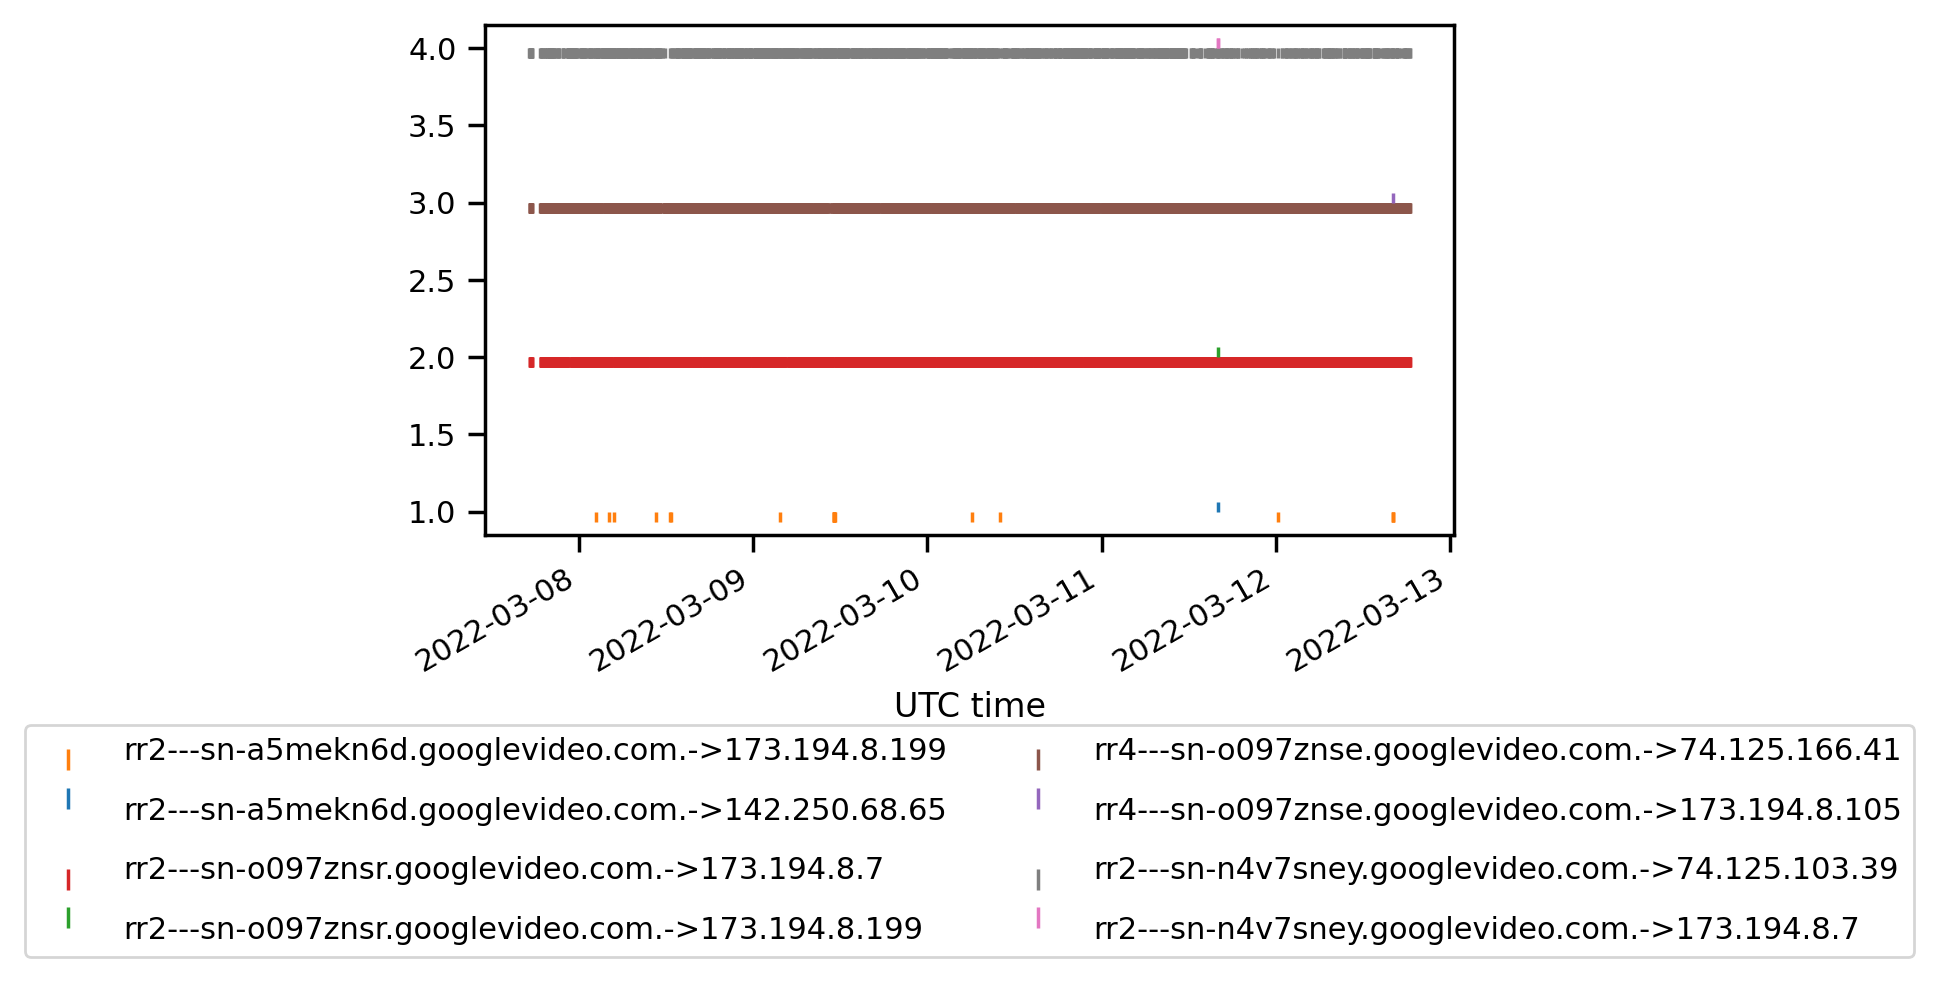

In [180]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)
us_west_subdomain_with_two_ip = ['rr2---sn-a5mekn6d.googlevideo.com.', 'rr2---sn-o097znsr.googlevideo.com.', 
                                'rr4---sn-o097znse.googlevideo.com.', 'rr2---sn-n4v7sney.googlevideo.com.']

with sns.color_palette('tab10'):
    for idx in range(len(us_west_subdomain_with_two_ip)):
        dn = us_west_subdomain_with_two_ip[idx]
        is_first_ip = True
        ips = lookups[lookups.domain == dn].ip_addr.unique().tolist()
        for ip in ips:
            df_tmp = lookups[(lookups.domain == dn) & (lookups.ip_addr == ip)][['first_time_seen']].set_index('first_time_seen')
            print(dn+'->'+ip+': '+str(len(df_tmp)))
            df_tmp['dummy'] = idx+1.
            df_tmp.plot(y='dummy', ax=ax, marker=is_first_ip+2, markersize=3, drawstyle="default", lw=0, label=dn+'->'+ip, color='C'+str(2*idx+is_first_ip))
            is_first_ip=False

    #ax.legend_.remove()
    ax.set_title("")
    #ax.set_yticks([1.,2.,3.,4.,5.,6.])
    #ax.set_yticklabels(['RR', 'SN', 'Any', 'RR', 'SN', 'Any'])
    ax.set_ylabel('')
    ax.set_xlabel("UTC time")
    ax.legend(loc='center', ncol=2, markerscale=2, bbox_to_anchor=(.5, -.6), labelspacing=1)
    plt.show()

In [181]:

video_subdomain_vp_map['vp_list_as_str'] = ''
for index, row in video_subdomain_vp_map.iterrows():
    if isinstance(row['vps'], str):
        video_subdomain_vp_map.loc[index, 'vp_list_as_str'] = row['vps']
    else:
        video_subdomain_vp_map.loc[index, 'vp_list_as_str'] = ', '.join(sorted(row['vps'].tolist()))
video_subdomain_vp_map

domain  vp_count  \
0    r1---sn-1gi7znek.googlevideo.com.         1   
64  rr4---sn-5hnedn7e.googlevideo.com.         1   
62  rr4---sn-4g5ednly.googlevideo.com.         1   
61  rr4---sn-4g5ednde.googlevideo.com.         1   
60  rr4---sn-4g5e6nsr.googlevideo.com.         1   
..                                 ...       ...   
74  rr4---sn-npoe7nss.googlevideo.com.         2   
56  rr3---sn-npoe7nsl.googlevideo.com.         2   
83  rr4---sn-q4flrn7r.googlevideo.com.         2   
32  rr2---sn-4g5ednly.googlevideo.com.         2   
27         redirector.googlevideo.com.         7   

                                                  vps  \
0                                      Europe Central   
64                                       Africa South   
62                                     Europe Central   
61                                     Europe Central   
60                                     Europe Central   
..                                                ...   
74   [Asia Pacific Northeast, Asia Pacific Southeast]   
56   [Asia Pacific Northeast, Asia Pacific Southeast]   
83                      [South America East, US East]   
32                     [Africa South, Europe Central]   
27  [Africa South, Asia Pacific Northeast, Asia Pa...   

                                       vp_list_as_str  
0                                      Europe Central  
64                                       Africa South  
62                                     Europe Central  
61                                     Europe Central  
60                                     Europe Central  
..                                                ...  
74     Asia Pacific Northeast, Asia Pacific Southeast  
56     Asia Pacific Northeast, Asia Pacific Southeast  
83                        South America East, US East  
32                       Africa South, Europe Central  
27  Africa South, Asia Pacific Northeast, Asia Pac...  

[94 rows x 4 columns]

In [182]:
video_subdomain_vp_map[video_subdomain_vp_map.vp_count == 2].vp_list_as_str.value_counts()

South America East, US East                       8
Africa South, Europe Central                      5
Asia Pacific Northeast, Asia Pacific Southeast    3
Name: vp_list_as_str, dtype: int64

In [183]:
video_subdomain_vp_map[video_subdomain_vp_map.vp_count == 2].domain.unique()

array(['rr2---sn-npoe7nsl.googlevideo.com.',
       'rr2---sn-p5qddn7k.googlevideo.com.',
       'rr2---sn-5hnekn7z.googlevideo.com.',
       'rr2---sn-5hne6nsr.googlevideo.com.',
       'rr4---sn-vgqsrnlz.googlevideo.com.',
       'rr2---sn-p5qlsn7s.googlevideo.com.',
       'rr4---sn-5hnekn7k.googlevideo.com.',
       'rr4---sn-p5qs7n7d.googlevideo.com.',
       'rr4---sn-p5qlsn76.googlevideo.com.',
       'rr4---sn-5hne6nz6.googlevideo.com.',
       'rr2---sn-vgqsknez.googlevideo.com.',
       'rr2---sn-vgqsrnlk.googlevideo.com.',
       'rr4---sn-npoe7nss.googlevideo.com.',
       'rr3---sn-npoe7nsl.googlevideo.com.',
       'rr4---sn-q4flrn7r.googlevideo.com.',
       'rr2---sn-4g5ednly.googlevideo.com.'], dtype=object)

In [184]:
lookups[(lookups.status == 'NOERROR') & (lookups.domain.isin(video_subdomain_vp_map[video_subdomain_vp_map.vp_count == 2].domain.unique()))].groupby(['domain', 'ip_addr']).agg(vps=('vantagePoint', pd.Series.unique))

vps
domain                             ip_addr                                                          
rr2---sn-4g5ednly.googlevideo.com. 173.194.187.231                    [Africa South, Europe Central]
rr2---sn-5hne6nsr.googlevideo.com. 172.217.132.71                     [Africa South, Europe Central]
rr2---sn-5hnekn7z.googlevideo.com. 74.125.100.103                     [Africa South, Europe Central]
rr2---sn-npoe7nsl.googlevideo.com. 173.194.59.39    [Asia Pacific Northeast, Asia Pacific Southeast]
rr2---sn-p5qddn7k.googlevideo.com. 173.194.7.135                       [South America East, US East]
rr2---sn-p5qlsn7s.googlevideo.com. 172.217.135.167                     [South America East, US East]
rr2---sn-vgqsknez.googlevideo.com. 173.194.191.71                      [South America East, US East]
rr2---sn-vgqsrnlk.googlevideo.com. 74.125.156.103                      [South America East, US East]
rr3---sn-npoe7nsl.googlevideo.com. 173.194.59.40    [Asia Pacific Northeast, Asia Pacific Southeast]
rr4---sn-5hne6nz6.googlevideo.com. 74.125.100.201                     [Africa South, Europe Central]
rr4---sn-5hnekn7k.googlevideo.com. 209.85.226.73                      [Africa South, Europe Central]
rr4---sn-npoe7nss.googlevideo.com. 173.194.59.73    [Asia Pacific Northeast, Asia Pacific Southeast]
rr4---sn-p5qlsn76.googlevideo.com. 172.217.135.201                     [South America East, US East]
rr4---sn-p5qs7n7d.googlevideo.com. 74.125.155.234                      [South America East, US East]
rr4---sn-q4flrn7r.googlevideo.com. 209.85.165.105                      [South America East, US East]
rr4---sn-vgqsrnlz.googlevideo.com. 74.125.156.9                        [South America East, US East]

In [185]:
video_ip_vp_map = lookups[(lookups.status == 'NOERROR') & (lookups.video_subdomain != 'redirector')].groupby('ip_addr', as_index=False).agg(vp_count=('vantagePoint', pd.Series.nunique), vps=('vantagePoint', pd.Series.unique)).sort_values('vp_count')

In [186]:
video_ip_vp_map

ip_addr  vp_count                                               vps
0    142.250.68.65         1                                           US West
32     173.194.8.7         1                                           US West
65    74.125.9.105         1                                           US East
35  209.85.229.172         1                            Asia Pacific Northeast
36   209.85.229.41         1                            Asia Pacific Northeast
..             ...       ...                                               ...
34   209.85.226.73         2                    [Africa South, Europe Central]
26   173.194.59.40         2  [Asia Pacific Northeast, Asia Pacific Southeast]
27   173.194.59.73         2  [Asia Pacific Northeast, Asia Pacific Southeast]
55    74.125.156.9         2                     [South America East, US East]
33  209.85.165.105         2                     [South America East, US East]

[67 rows x 3 columns]

In [187]:
subdomains_on_two_vp_ip_addr_list = lookups[(lookups.status == 'NOERROR') & (lookups.domain.isin(video_subdomain_vp_map[video_subdomain_vp_map.vp_count == 2].domain.unique()))].groupby(['domain', 'ip_addr'], as_index=False).agg(vps=('vantagePoint', pd.Series.unique)).ip_addr.unique().tolist()

In [188]:
video_ip_vp_map[video_ip_vp_map.ip_addr.isin(subdomains_on_two_vp_ip_addr_list)].vp_count.value_counts()

2    16
Name: vp_count, dtype: int64

In [189]:
video_ip_vp_map[video_ip_vp_map.ip_addr.isin(subdomains_on_two_vp_ip_addr_list)].ip_addr.nunique()

16

In [190]:
video_ip_vp_map.vp_count.value_counts()

1    51
2    16
Name: vp_count, dtype: int64

In [191]:
video_ip_vp_map[video_ip_vp_map.vp_count == 2].ip_addr.nunique()

16

### the subdomains that occur on multiple vantage points resolve exactly to the IP addresses found on multiple vantage points

In [192]:
set(video_ip_vp_map[video_ip_vp_map.ip_addr.isin(subdomains_on_two_vp_ip_addr_list)].ip_addr.unique()) == set(video_ip_vp_map[video_ip_vp_map.vp_count == 2].ip_addr.unique())

True

In [193]:
video_ip_vp_map[video_ip_vp_map.vp_count == 1].ip_addr.nunique()

51

In [194]:

video_ip_vp_map['vp_list_as_str'] = ''
for index, row in video_ip_vp_map.iterrows():
    if isinstance(row['vps'], str):
        video_ip_vp_map.loc[index, 'vp_list_as_str'] = row['vps']
    else:
        video_ip_vp_map.loc[index, 'vp_list_as_str'] = ', '.join(sorted(row['vps'].tolist()))
video_ip_vp_map

ip_addr  vp_count  \
0    142.250.68.65         1   
32     173.194.8.7         1   
65    74.125.9.105         1   
35  209.85.229.172         1   
36   209.85.229.41         1   
..             ...       ...   
34   209.85.226.73         2   
26   173.194.59.40         2   
27   173.194.59.73         2   
55    74.125.156.9         2   
33  209.85.165.105         2   

                                                 vps  \
0                                            US West   
32                                           US West   
65                                           US East   
35                            Asia Pacific Northeast   
36                            Asia Pacific Northeast   
..                                               ...   
34                    [Africa South, Europe Central]   
26  [Asia Pacific Northeast, Asia Pacific Southeast]   
27  [Asia Pacific Northeast, Asia Pacific Southeast]   
55                     [South America East, US East]   
33                     [South America East, US East]   

                                    vp_list_as_str  
0                                          US West  
32                                         US West  
65                                         US East  
35                          Asia Pacific Northeast  
36                          Asia Pacific Northeast  
..                                             ...  
34                    Africa South, Europe Central  
26  Asia Pacific Northeast, Asia Pacific Southeast  
27  Asia Pacific Northeast, Asia Pacific Southeast  
55                     South America East, US East  
33                     South America East, US East  

[67 rows x 4 columns]

In [195]:
video_ip_vp_map[video_ip_vp_map.vp_count == 2].vp_list_as_str.value_counts()

South America East, US East                       8
Africa South, Europe Central                      5
Asia Pacific Northeast, Asia Pacific Southeast    3
Name: vp_list_as_str, dtype: int64

In [196]:
video_ip_vp_map[video_ip_vp_map.vp_count == 1].vp_list_as_str.value_counts()

Europe Central            16
US West                   10
Asia Pacific Northeast     8
Asia Pacific Southeast     6
South America East         5
US East                    3
Africa South               3
Name: vp_list_as_str, dtype: int64

In [197]:
video_subdomain_vp_map[video_subdomain_vp_map.vp_count == 1].vp_list_as_str.value_counts()

Europe Central            24
US West                   11
Asia Pacific Northeast    10
Asia Pacific Southeast    10
South America East         9
Africa South               7
US East                    6
Name: vp_list_as_str, dtype: int64

In [198]:
video_ip_vp_map[~video_ip_vp_map.ip_addr.isin(subdomains_on_two_vp_ip_addr_list)].vp_count.value_counts()

1    51
Name: vp_count, dtype: int64

In [199]:
lookups[(lookups.status == 'NOERROR')&(lookups.domain.isin(video_subdomain_vp_map[video_subdomain_vp_map.vp_count == 1].domain.unique())) & (lookups.video_subdomain != 'redirector')].groupby(['domain', 'ip_addr'], as_index=False).agg({'vantagePoint':'count'}).sort_values('vantagePoint').ip_addr.nunique()

57

In [200]:
video_ip_and_dn_vp_map = lookups[(lookups.status == 'NOERROR')& (lookups.video_subdomain != 'redirector')].groupby(['domain','ip_addr'], as_index=False).agg(vp_count=('vantagePoint', pd.Series.nunique), vps=('vantagePoint', pd.Series.unique)).sort_values('vp_count')

In [201]:
video_ip_and_dn_vp_map['vp_list_as_str'] = ''
for index, row in video_ip_and_dn_vp_map.iterrows():
    if isinstance(row['vps'], str):
        video_ip_and_dn_vp_map.loc[index, 'vp_list_as_str'] = row['vps']
    else:
        video_ip_and_dn_vp_map.loc[index, 'vp_list_as_str'] = ', '.join(sorted(row['vps'].tolist()))
video_ip_and_dn_vp_map

domain          ip_addr  vp_count  \
0    r1---sn-1gi7znek.googlevideo.com.   74.125.108.198         1   
68  rr4---sn-a5mekn6d.googlevideo.com.    173.194.8.201         1   
66  rr4---sn-5hnedn7e.googlevideo.com.   74.125.100.138         1   
64  rr4---sn-4g5ednly.googlevideo.com.  173.194.187.233         1   
63  rr4---sn-4g5ednde.googlevideo.com.   74.125.162.137         1   
..                                 ...              ...       ...   
31  rr2---sn-4g5ednly.googlevideo.com.  173.194.187.231         2   
76  rr4---sn-npoe7nss.googlevideo.com.    173.194.59.73         2   
58  rr3---sn-npoe7nsl.googlevideo.com.    173.194.59.40         2   
85  rr4---sn-p5qs7n7d.googlevideo.com.   74.125.155.234         2   
33  rr2---sn-5hne6nsr.googlevideo.com.   172.217.132.71         2   

                                                 vps  \
0                                     Europe Central   
68                                           US West   
66                                      Africa South   
64                                    Europe Central   
63                                    Europe Central   
..                                               ...   
31                    [Africa South, Europe Central]   
76  [Asia Pacific Northeast, Asia Pacific Southeast]   
58  [Asia Pacific Northeast, Asia Pacific Southeast]   
85                     [South America East, US East]   
33                    [Africa South, Europe Central]   

                                    vp_list_as_str  
0                                   Europe Central  
68                                         US West  
66                                    Africa South  
64                                  Europe Central  
63                                  Europe Central  
..                                             ...  
31                    Africa South, Europe Central  
76  Asia Pacific Northeast, Asia Pacific Southeast  
58  Asia Pacific Northeast, Asia Pacific Southeast  
85                     South America East, US East  
33                    Africa South, Europe Central  

[97 rows x 5 columns]

In [202]:
video_ip_and_dn_vp_map.vp_count.value_counts()

1    81
2    16
Name: vp_count, dtype: int64

In [203]:
video_ip_and_dn_vp_map.ip_addr.nunique()

67

In [204]:
video_ip_and_dn_vp_map[video_ip_and_dn_vp_map.domain != 'redirector.googlevideo.com.'].ip_addr.nunique()

67

In [205]:
lookups[(lookups.status == 'NOERROR') & (lookups.video_subdomain != 'redirector')].ip_addr.nunique()

67

In [206]:
video_ip_and_dn_vp_map[video_ip_and_dn_vp_map.domain != 'redirector.googlevideo.com.'].ip_addr.nunique()

67

In [207]:
video_ip_and_dn_vp_map[(video_ip_and_dn_vp_map.vp_count == 1)].ip_addr.nunique()

57

In [208]:
video_ip_and_dn_vp_map[(video_ip_and_dn_vp_map.vp_count == 1)].vp_count.count()

81

In [209]:
video_ip_and_dn_vp_map[(video_ip_and_dn_vp_map.vp_count == 1)].domain.nunique()

77

In [210]:
video_ip_and_dn_vp_map[(video_ip_and_dn_vp_map.vp_count == 2)].ip_addr.nunique()

16

In [211]:
video_ip_and_dn_vp_map[(video_ip_and_dn_vp_map.vp_count == 2)].vp_count.count()

16

In [212]:
video_ip_and_dn_vp_map[(video_ip_and_dn_vp_map.vp_count == 2)].domain.nunique()

16

In [213]:
video_ip_and_dn_vp_map[(video_ip_and_dn_vp_map.vp_count == 1) & (video_ip_and_dn_vp_map.domain != 'redirector.googlevideo.com.')].groupby(['ip_addr', 'domain'], as_index=False).agg(vp_combo_nunique=('vp_list_as_str',pd.Series.nunique), vp_combo_unique=('vp_list_as_str',pd.Series.unique)).sort_values('vp_combo_nunique')

ip_addr                              domain  vp_combo_nunique  \
0    142.250.68.65  rr2---sn-a5mekn6d.googlevideo.com.                 1   
57  74.125.108.202   r5---sn-1gi7znek.googlevideo.com.                 1   
56  74.125.108.200  rr3---sn-1gi7znek.googlevideo.com.                 1   
55  74.125.108.198  rr1---sn-1gi7znek.googlevideo.com.                 1   
54  74.125.108.198   r1---sn-1gi7znek.googlevideo.com.                 1   
..             ...                                 ...               ...   
23   173.194.28.39  rr2---sn-ntq7yned.googlevideo.com.                 1   
22   173.194.28.39   r2---sn-ntq7yned.googlevideo.com.                 1   
21  173.194.22.154  rr4---sn-3pm76n7d.googlevideo.com.                 1   
39  209.85.229.172   r6---sn-3pm76n7s.googlevideo.com.                 1   
80    74.125.97.73  rr4---sn-aigzrnld.googlevideo.com.                 1   

           vp_combo_unique  
0                  US West  
57          Europe Central  
56          Europe Central  
55          Europe Central  
54          Europe Central  
..                     ...  
23  Asia Pacific Southeast  
22  Asia Pacific Southeast  
21  Asia Pacific Northeast  
39  Asia Pacific Northeast  
80          Europe Central  

[81 rows x 4 columns]

In [214]:
ip_vp_map_to_dn = video_ip_and_dn_vp_map[(video_ip_and_dn_vp_map.vp_count == 1) & (video_ip_and_dn_vp_map.domain != 'redirector.googlevideo.com.')].groupby(['ip_addr', 'vp_list_as_str'], as_index=False).agg(dn_nunique=('domain',pd.Series.nunique), dn_unique=('domain',pd.Series.unique)).sort_values('dn_nunique')

In [215]:
ip_vp_map_to_dn['dn_unique_as_str'] = ''
for index, row in ip_vp_map_to_dn.iterrows():
    if isinstance(row['dn_unique'], str):
        ip_vp_map_to_dn.loc[index, 'dn_unique_as_str'] = row['dn_unique']
    else:
        ip_vp_map_to_dn.loc[index, 'dn_unique_as_str'] = ', '.join(sorted(row['dn_unique'].tolist()))

ip_vp_map_to_dn[ip_vp_map_to_dn.dn_nunique == 2]

ip_addr          vp_list_as_str  dn_nunique  \
53   74.125.173.170          Europe Central           2   
52   74.125.173.168          Europe Central           2   
23    173.194.8.105                 US West           2   
3   173.194.128.167            Africa South           2   
49   74.125.171.172  Asia Pacific Northeast           2   
48    74.125.166.41                 US West           2   
47    74.125.162.71          Europe Central           2   
46   74.125.162.137          Europe Central           2   
4   173.194.128.169            Africa South           2   
44    74.125.152.39  Asia Pacific Southeast           2   
43   74.125.109.233  Asia Pacific Southeast           2   
5    173.194.136.39      South America East           2   
40   74.125.108.198          Europe Central           2   
39   74.125.107.103      South America East           2   
24    173.194.8.199                 US West           2   
37    74.125.103.39                 US West           2   
7   173.194.155.137      South America East           2   
17     173.194.28.9  Asia Pacific Southeast           2   
9    173.194.161.42      South America East           2   
26      173.194.8.7                 US West           2   
11  173.194.187.105          Europe Central           2   
16    173.194.28.39  Asia Pacific Southeast           2   
42   74.125.108.202          Europe Central           2   
28   209.85.229.172  Asia Pacific Northeast           2   

                                            dn_unique  \
53  [rr5---sn-1gieen7e.googlevideo.com., r5---sn-1...   
52  [rr3---sn-1gieen7e.googlevideo.com., r3---sn-1...   
23  [rr4---sn-a5mekn6l.googlevideo.com., rr4---sn-...   
3   [rr2---sn-woc7ln7y.googlevideo.com., r2---sn-w...   
49  [rr6---sn-3pm7sn7y.googlevideo.com., r6---sn-3...   
48  [rr4---sn-o097znse.googlevideo.com., r4---sn-o...   
47  [r2---sn-4g5lzner.googlevideo.com., rr2---sn-4...   
46  [rr4---sn-4g5ednde.googlevideo.com., r4---sn-4...   
4   [rr4---sn-woc7ln7y.googlevideo.com., r4---sn-w...   
44  [rr2---sn-ntqe6nez.googlevideo.com., r2---sn-n...   
43  [rr4---sn-ntq7ynle.googlevideo.com., r4---sn-n...   
5   [r2---sn-bg07dn6r.googlevideo.com., rr2---sn-b...   
40  [r1---sn-1gi7znek.googlevideo.com., rr1---sn-1...   
39  [rr2---sn-bg0eznek.googlevideo.com., r2---sn-b...   
24  [rr2---sn-o097znsr.googlevideo.com., rr2---sn-...   
37  [rr2---sn-n4v7sney.googlevideo.com., r2---sn-n...   
7   [rr4---sn-bg0ezn7l.googlevideo.com., r4---sn-b...   
17  [rr4---sn-ntqe6n76.googlevideo.com., r4---sn-n...   
9   [rr4---sn-bg07dnsl.googlevideo.com., r4---sn-b...   
26  [rr2---sn-o097znsr.googlevideo.com., rr2---sn-...   
11  [rr4---sn-4g5e6nsr.googlevideo.com., r4---sn-4...   
16  [rr2---sn-ntq7yned.googlevideo.com., r2---sn-n...   
42  [rr5---sn-1gi7znek.googlevideo.com., r5---sn-1...   
28  [rr6---sn-3pm76n7s.googlevideo.com., r6---sn-3...   

                                     dn_unique_as_str  
53  r5---sn-1gieen7e.googlevideo.com., rr5---sn-1g...  
52  r3---sn-1gieen7e.googlevideo.com., rr3---sn-1g...  
23  rr4---sn-a5mekn6l.googlevideo.com., rr4---sn-o...  
3   r2---sn-woc7ln7y.googlevideo.com., rr2---sn-wo...  
49  r6---sn-3pm7sn7y.googlevideo.com., rr6---sn-3p...  
48  r4---sn-o097znse.googlevideo.com., rr4---sn-o0...  
47  r2---sn-4g5lzner.googlevideo.com., rr2---sn-4g...  
46  r4---sn-4g5ednde.googlevideo.com., rr4---sn-4g...  
4   r4---sn-woc7ln7y.googlevideo.com., rr4---sn-wo...  
44  r2---sn-ntqe6nez.googlevideo.com., rr2---sn-nt...  
43  r4---sn-ntq7ynle.googlevideo.com., rr4---sn-nt...  
5   r2---sn-bg07dn6r.googlevideo.com., rr2---sn-bg...  
40  r1---sn-1gi7znek.googlevideo.com., rr1---sn-1g...  
39  r2---sn-bg0eznek.googlevideo.com., rr2---sn-bg...  
24  rr2---sn-a5mekn6d.googlevideo.com., rr2---sn-o...  
37  r2---sn-n4v7sney.googlevideo.com., rr2---sn-n4...  
7   r4---sn-bg0ezn7l.googlevideo.com., rr4---sn-bg...  
17  r4---sn-ntqe6n76.googlevideo.com., rr4---sn-nt...  
9   r4---sn-bg07dnsl.googlevideo.com., rr4---s

In [216]:
ip_vp_map_to_dn[ip_vp_map_to_dn.dn_nunique == 2].dn_unique_as_str.nunique()

24

In [217]:
r_removed_count = 0
seen_dns = []
two_dns_for_one_ip = ip_vp_map_to_dn[ip_vp_map_to_dn.dn_nunique == 2].copy()
two_dns_for_one_ip.reset_index(drop=True, inplace=True)

for index, row in two_dns_for_one_ip.iterrows():
    dn_list = row['dn_unique']
    if row['dn_unique_as_str'] not in seen_dns:
        if (dn_list[0][1:] == dn_list[1]) or (dn_list[1][1:] == dn_list[0]):
            #print('first r removed')
            #print(dn_list)
            r_removed_count = r_removed_count+1
        else:
            print('what changed?')
            print(dn_list)
        seen_dns.append(row['dn_unique_as_str'])
print(r_removed_count)
print(len(seen_dns))

what changed?
['rr4---sn-a5mekn6l.googlevideo.com.' 'rr4---sn-o097znse.googlevideo.com.']
what changed?
['rr2---sn-o097znsr.googlevideo.com.' 'rr2---sn-a5mekn6d.googlevideo.com.']
what changed?
['rr2---sn-o097znsr.googlevideo.com.' 'rr2---sn-n4v7sney.googlevideo.com.']
21
24


In [218]:
lookups[lookups.domain.isin(['rr4---sn-o097znse.googlevideo.com.', 'rr4---sn-a5mekn6l.googlevideo.com.'])].vantagePoint.value_counts()


US West    2795
Name: vantagePoint, dtype: int64

In [219]:
lookups[lookups.domain.isin(['rr2---sn-o097znsr.googlevideo.com.', 'rr2---sn-a5mekn6d.googlevideo.com.'])].vantagePoint.value_counts()


US West    2803
Name: vantagePoint, dtype: int64

In [220]:
lookups[lookups.domain.isin(['rr2---sn-o097znsr.googlevideo.com.', 'rr2---sn-n4v7sney.googlevideo.com.'])].vantagePoint.value_counts()


US West    4115
Name: vantagePoint, dtype: int64

In [221]:
for index, row in ip_vp_map_to_dn[(ip_vp_map_to_dn.dn_nunique == 2) & (ip_vp_map_to_dn.vp_list_as_str == 'US West')].iterrows():
    print(row['ip_addr'])
    print(row['dn_unique'])

173.194.8.105
['rr4---sn-a5mekn6l.googlevideo.com.' 'rr4---sn-o097znse.googlevideo.com.']
74.125.166.41
['rr4---sn-o097znse.googlevideo.com.' 'r4---sn-o097znse.googlevideo.com.']
173.194.8.199
['rr2---sn-o097znsr.googlevideo.com.' 'rr2---sn-a5mekn6d.googlevideo.com.']
74.125.103.39
['rr2---sn-n4v7sney.googlevideo.com.' 'r2---sn-n4v7sney.googlevideo.com.']
173.194.8.7
['rr2---sn-o097znsr.googlevideo.com.' 'rr2---sn-n4v7sney.googlevideo.com.']


In [222]:
lookups[(lookups.domain == 'rr4---sn-a5mekn6l.googlevideo.com.') & (lookups.ip_addr == '173.194.8.105')].first_time_seen.nunique()

20

In [223]:
'''
rr2---sn-a5mekn6d.googlevideo.com.->173.194.8.199: 19
rr2---sn-o097znsr.googlevideo.com.->173.194.8.199: 1

rr4---sn-o097znse.googlevideo.com.->173.194.8.105: 1
rr4---sn-a5mekn6l.googlevideo.com.->173.194.8.105: 20

rr2---sn-o097znsr.googlevideo.com.->173.194.8.7: 2782
rr2---sn-n4v7sney.googlevideo.com.->173.194.8.7: 2

'''

'\nrr2---sn-a5mekn6d.googlevideo.com.->173.194.8.199: 19\nrr2---sn-o097znsr.googlevideo.com.->173.194.8.199: 1\n\nrr4---sn-o097znse.googlevideo.com.->173.194.8.105: 1\nrr4---sn-a5mekn6l.googlevideo.com.->173.194.8.105: 20\n\nrr2---sn-o097znsr.googlevideo.com.->173.194.8.7: 2782\nrr2---sn-n4v7sney.googlevideo.com.->173.194.8.7: 2\n\n'

In [224]:
ip_on_two_vps_vp_map_to_dn = video_ip_and_dn_vp_map[(video_ip_and_dn_vp_map.vp_count == 2) & (video_ip_and_dn_vp_map.domain != 'redirector.googlevideo.com.')].groupby(['ip_addr'], as_index=False).agg(dn_nunique=('domain',pd.Series.nunique), dn_unique=('domain',pd.Series.unique)).sort_values('dn_nunique')

In [225]:
ip_on_two_vps_vp_map_to_dn

ip_addr  dn_nunique                           dn_unique
0    172.217.132.71           1  rr2---sn-5hne6nsr.googlevideo.com.
1   172.217.135.167           1  rr2---sn-p5qlsn7s.googlevideo.com.
2   172.217.135.201           1  rr4---sn-p5qlsn76.googlevideo.com.
3   173.194.187.231           1  rr2---sn-4g5ednly.googlevideo.com.
4    173.194.191.71           1  rr2---sn-vgqsknez.googlevideo.com.
5     173.194.59.39           1  rr2---sn-npoe7nsl.googlevideo.com.
6     173.194.59.40           1  rr3---sn-npoe7nsl.googlevideo.com.
7     173.194.59.73           1  rr4---sn-npoe7nss.googlevideo.com.
8     173.194.7.135           1  rr2---sn-p5qddn7k.googlevideo.com.
9    209.85.165.105           1  rr4---sn-q4flrn7r.googlevideo.com.
10    209.85.226.73           1  rr4---sn-5hnekn7k.googlevideo.com.
11   74.125.100.103           1  rr2---sn-5hnekn7z.googlevideo.com.
12   74.125.100.201           1  rr4---sn-5hne6nz6.googlevideo.com.
13   74.125.155.234           1  rr4---sn-p5qs7n7d.googlevideo.com.
14   74.125.156.103           1  rr2---sn-vgqsrnlk.googlevideo.com.
15     74.125.156.9           1  rr4---sn-vgqsrnlz.googlevideo.com.

In [226]:
video_ip_and_dn_vp_map[(video_ip_and_dn_vp_map.domain != 'redirector.googlevideo.com.')].groupby('ip_addr').agg(vp_list_nunique=('vp_list_as_str', pd.Series.nunique)).sort_values('vp_list_nunique')

vp_list_nunique
ip_addr                         
142.250.68.65                  1
209.85.229.172                 1
209.85.229.41                  1
74.125.100.138                 1
74.125.100.201                 1
...                          ...
74.125.100.103                 2
173.194.187.231                2
172.217.135.201                2
173.194.7.135                  2
209.85.226.73                  2

[67 rows x 1 columns]

In [227]:
video_ip_and_dn_vp_map[(video_ip_and_dn_vp_map.domain != 'redirector.googlevideo.com.')].groupby(['ip_addr', 'domain']).agg(vp_list_nunique=('vp_list_as_str', pd.Series.nunique)).sort_values('vp_list_nunique')

vp_list_nunique
ip_addr        domain                                             
142.250.68.65  rr2---sn-a5mekn6d.googlevideo.com.                1
74.125.108.200 rr3---sn-1gi7znek.googlevideo.com.                1
74.125.108.198 rr1---sn-1gi7znek.googlevideo.com.                1
               r1---sn-1gi7znek.googlevideo.com.                 1
74.125.107.103 rr2---sn-bg0eznek.googlevideo.com.                1
...                                                            ...
173.194.28.39  r2---sn-ntq7yned.googlevideo.com.                 1
173.194.22.154 rr4---sn-3pm76n7d.googlevideo.com.                1
173.194.191.73 rr4---sn-vgqsknez.googlevideo.com.                1
209.85.165.105 rr4---sn-q4flrn7r.googlevideo.com.                1
74.125.97.73   rr4---sn-aigzrnld.googlevideo.com.                1

[97 rows x 1 columns]

In [228]:
video_ip_vp_map.vp_count.value_counts()

1    51
2    16
Name: vp_count, dtype: int64

In [229]:
video_ip_vp_map[video_ip_vp_map.vp_count == 1].ip_addr.nunique()

51

In [230]:
video_ip_and_dn_vp_map[(video_ip_and_dn_vp_map.vp_count == 1)].ip_addr.nunique()

57

In [231]:
set(video_ip_and_dn_vp_map[(video_ip_and_dn_vp_map.vp_count == 1)].ip_addr.unique()) - set(video_ip_vp_map[video_ip_vp_map.vp_count == 1].ip_addr.unique())

{'172.217.135.201',
 '173.194.187.231',
 '173.194.7.135',
 '209.85.226.73',
 '74.125.100.103',
 '74.125.155.234'}

In [232]:
video_ip_and_dn_vp_map[video_ip_and_dn_vp_map.ip_addr == '172.217.135.201']

domain          ip_addr  vp_count  \
20   r4---sn-p5qlsn76.googlevideo.com.  172.217.135.201         1   
84  rr4---sn-p5qlsn76.googlevideo.com.  172.217.135.201         2   

                              vps               vp_list_as_str  
20                        US East                      US East  
84  [South America East, US East]  South America East, US East

In [233]:
video_ip_and_dn_vp_map[video_ip_and_dn_vp_map.ip_addr == '173.194.187.231']

domain          ip_addr  vp_count  \
1    r2---sn-4g5ednly.googlevideo.com.  173.194.187.231         1   
31  rr2---sn-4g5ednly.googlevideo.com.  173.194.187.231         2   

                               vps                vp_list_as_str  
1                   Europe Central                Europe Central  
31  [Africa South, Europe Central]  Africa South, Europe Central

In [234]:
video_ip_and_dn_vp_map[video_ip_and_dn_vp_map.ip_addr == '173.194.7.135']

domain        ip_addr  vp_count  \
9    r2---sn-p5qddn7k.googlevideo.com.  173.194.7.135         1   
49  rr2---sn-p5qddn7k.googlevideo.com.  173.194.7.135         2   

                              vps               vp_list_as_str  
9                         US East                      US East  
49  [South America East, US East]  South America East, US East

In [235]:
video_ip_and_dn_vp_map[video_ip_and_dn_vp_map.ip_addr == '209.85.226.73']

domain        ip_addr  vp_count  \
14   r4---sn-5hnekn7k.googlevideo.com.  209.85.226.73         1   
67  rr4---sn-5hnekn7k.googlevideo.com.  209.85.226.73         2   

                               vps                vp_list_as_str  
14                    Africa South                  Africa South  
67  [Africa South, Europe Central]  Africa South, Europe Central

In [236]:
video_ip_and_dn_vp_map[video_ip_and_dn_vp_map.ip_addr == '74.125.100.103']

domain         ip_addr  vp_count  \
3    r2---sn-5hnekn7z.googlevideo.com.  74.125.100.103         1   
34  rr2---sn-5hnekn7z.googlevideo.com.  74.125.100.103         2   

                               vps                vp_list_as_str  
3                     Africa South                  Africa South  
34  [Africa South, Europe Central]  Africa South, Europe Central

In [237]:
video_ip_and_dn_vp_map[video_ip_and_dn_vp_map.ip_addr == '74.125.155.234']

domain         ip_addr  vp_count  \
21   r4---sn-p5qs7n7d.googlevideo.com.  74.125.155.234         1   
85  rr4---sn-p5qs7n7d.googlevideo.com.  74.125.155.234         2   

                              vps               vp_list_as_str  
21                        US East                      US East  
85  [South America East, US East]  South America East, US East

In [238]:
lookups['starts_with_rr'] = False
lookups['starts_with_rr'] = np.where(lookups.domain.str.startswith('rr'), True, lookups['starts_with_rr'])
lookups

msm_id  \
0      544b9c53-fb16-e2fe-5fb0-0268b693a586   
1      7a1a699c-6c32-6b28-f8f1-cac46c3d96c8   
2      e2576b0d-50a9-f803-e475-4d880109c675   
3      22cb024f-8247-54be-730f-b2b57f8a4074   
4      150bdff4-3e93-9c75-8236-5c550ea665e1   
...                                     ...   
60954  3c7e0c54-cae9-53bd-6256-b9189b271137   
60955  2cf02006-5094-efc4-77ec-750435ef9ad0   
60956  892bb7e6-6971-f8e2-dbad-f9193758c29c   
60957  651c800b-d38c-86f8-5228-bdbb1bf68384   
60958  d26cd0d1-ce4e-c917-9f5f-d1a416ce98f1   

                                   domain     elapsed   status  \
0      rr2---sn-5hnekn7z.googlevideo.com.  152.211291  NOERROR   
1      rr4---sn-5hnekn7k.googlevideo.com.  149.194440  NOERROR   
2      rr2---sn-5hnekn7z.googlevideo.com.  142.190267  NOERROR   
3      rr4---sn-5hnekn7k.googlevideo.com.  171.337583  NOERROR   
4      rr2---sn-5hnekn7z.googlevideo.com.  150.356304  NOERROR   
...                                   ...         ...      ...   
60954  rr4---sn-n4v7snl7.googlevideo.com.    9.886096  NOERROR   
60955  rr2---sn-o097znsr.googlevideo.com.   12.252375  NOERROR   
60956  rr4---sn-o097znse.googlevideo.com.    8.844368  NOERROR   
60957  rr2---sn-n4v7sney.googlevideo.com.    8.729008  NOERROR   
60958  rr4---sn-n4v7snl7.googlevideo.com.    9.915850  NOERROR   

                                                  answer         ip_addr  \
0      rr2---sn-5hnekn7z.googlevideo.com.,699,IN,CNAM...  74.125.100.103   
1      rr4---sn-5hnekn7k.googlevideo.com.,627,IN,CNAM...   209.85.226.73   
2      rr2---sn-5hnekn7z.googlevideo.com.,610,IN,CNAM...  74.125.100.103   
3      rr4---sn-5hnekn7k.googlevideo.com.,538,IN,CNAM...   209.85.226.73   
4      rr2---sn-5hnekn7z.googlevideo.com.,521,IN,CNAM...  74.125.100.103   
...                                                  ...             ...   
60954  rr4---sn-n4v7snl7.googlevideo.com.,860,IN,CNAM...  74.125.103.137   
60955  rr2---sn-o097znsr.googlevideo.com.,1041,IN,CNA...     173.194.8.7   
60956  rr4---sn-o097znse.googlevideo.com.,666,IN,CNAM...   74.125.166.41   
60957  rr2---sn-n4v7sney.googlevideo.com.,179,IN,CNAM...   74.125.103.39   
60958  rr4---sn-n4v7snl7.googlevideo.com.,702,IN,CNAM...  74.125.103.137   

      round_robin_str  rand_sn_str    video_subdomain  \
0                 rr2  sn-5hnekn7z  rr2---sn-5hnekn7z   
1                 rr4  sn-5hnekn7k  rr4---sn-5hnekn7k   
2                 rr2  sn-5hnekn7z  rr2---sn-5hnekn7z   
3                 rr4  sn-5hnekn7k  rr4---sn-5hnekn7k   
4                 rr2  sn-5hnekn7z  rr2---sn-5hnekn7z   
...               ...          ...                ...   
60954             rr4  sn-n4v7snl7  rr4---sn-n4v7snl7   
60955             rr2  sn-o097znsr  rr2---sn-o097znsr   
60956             rr4  sn-o097znse  rr4---sn-o097znse   
60957             rr2  sn-n4v7sney  rr2---sn-n4v7sney   
60958             rr4  sn-n4v7snl7  rr4---sn-n4v7snl7   

                       subdomain_and_ip                        googlevideo  \
0      rr2---sn-5hnekn7z-74.125.100.103  rr2---sn-5hnekn7z.googlevideo.com   
1       rr4---sn-5hnekn7k-209.85.226.73  rr4---sn-5hnekn7k.googlevideo.com   
2      rr2---sn-5hnekn7z-74.125.100.103  rr2---sn-5hnekn7z.googlevideo.com   
3       rr4---sn-5hnekn7k-209.85.226.73  rr4---sn-5hnekn7k.googlevideo.com   
4      rr2---sn-5hnekn7z-74.125.100.103  rr2---sn-5hnekn7z.googlevideo.com   
...                                 ...                                ...   
60954  rr4---sn-n4v7snl7-74.125.103.137  rr4---sn-n4v7snl7.googlevideo.com   
60955     rr2---sn-o097znsr-173.194.8.7  rr2---sn-o097znsr.googlevideo.com   
60956   rr4---sn-o097znse-74.125.166.41  rr4---sn-o097znse.googlevideo.com   
60957   rr2---sn-n4v7sney-74.125.103.39  rr2---sn-n4v7sney.googlevideo.com   
60958  rr4---sn-n4v7snl7-74.125.103.137  rr4---sn-n4v7snl7.googlevideo.com   

                    first_time_seen  ip_addr/24 ip_addr/16     video_id  \
0     2022-03-07 17:22:49.099600128  74.125.100     74.125  aqz-KE-bp

In [239]:
lookups['starts_with_rr'].value_counts()

True     60858
False      101
Name: starts_with_rr, dtype: int64

In [240]:
print(lookups[lookups['starts_with_rr'] == True].domain.nunique())
print(lookups[lookups['starts_with_rr'] == False].domain.nunique())
lookups[lookups['starts_with_rr'] == False].domain.unique()

66
28


array(['redirector.googlevideo.com.', 'r4---sn-woc7ln7y.googlevideo.com.',
       'r2---sn-5hnekn7z.googlevideo.com.',
       'r4---sn-5hnekn7k.googlevideo.com.',
       'r2---sn-woc7ln7y.googlevideo.com.',
       'r6---sn-3pm76n7s.googlevideo.com.',
       'r6---sn-3pm7sn7y.googlevideo.com.',
       'r2---sn-ntqe6nez.googlevideo.com.',
       'r4---sn-ntq7ynle.googlevideo.com.',
       'r2---sn-ntq7yned.googlevideo.com.',
       'r4---sn-ntqe6n76.googlevideo.com.',
       'r2---sn-4g5lzner.googlevideo.com.',
       'r4---sn-4g5e6nsr.googlevideo.com.',
       'r4---sn-4g5ednde.googlevideo.com.',
       'r1---sn-1gi7znek.googlevideo.com.',
       'r5---sn-1gi7znek.googlevideo.com.',
       'r5---sn-1gieen7e.googlevideo.com.',
       'r3---sn-1gieen7e.googlevideo.com.',
       'r2---sn-4g5ednly.googlevideo.com.',
       'r2---sn-bg07dn6r.googlevideo.com.',
       'r4---sn-bg07dnsl.googlevideo.com.',
       'r2---sn-bg0eznek.googlevideo.com.',
       'r4---sn-bg0ezn7l.googlevideo.com.',
 

In [241]:
print(lookups[lookups['starts_with_rr'] == False].groupby('vantagePoint', as_index=False).agg(r_unique_count=('domain',pd.Series.nunique)).sort_values('r_unique_count', ascending=False))

             vantagePoint  r_unique_count
3          Europe Central               9
0            Africa South               5
2  Asia Pacific Southeast               5
4      South America East               5
5                 US East               4
1  Asia Pacific Northeast               3
6                 US West               3


In [242]:
lookups[lookups['starts_with_rr'] == False].vantagePoint.value_counts()

Asia Pacific Southeast    32
South America East        20
Europe Central            16
Africa South              15
US East                    8
Asia Pacific Northeast     5
US West                    5
Name: vantagePoint, dtype: int64

In [243]:
lookups[lookups['starts_with_rr'] == False].ip_addr.value_counts()

74.125.152.39      9
142.251.35.238     5
173.194.136.39     5
74.125.108.198     4
74.125.200.113     3
74.125.108.202     3
173.194.128.169    3
74.125.107.103     3
173.194.7.135      3
74.125.171.172     3
173.194.28.9       3
74.125.109.233     3
142.250.187.238    2
173.194.187.105    2
142.250.217.174    2
74.125.24.102      2
173.194.28.39      2
74.125.100.103     2
74.125.24.100      2
74.125.155.234     2
209.85.226.73      2
142.250.180.14     2
74.125.103.39      2
172.217.135.201    2
74.125.173.168     1
142.250.68.14      1
74.125.166.41      1
173.194.161.42     1
173.194.155.137    1
142.250.189.142    1
172.217.3.78       1
142.250.64.238     1
142.250.81.238     1
173.194.187.231    1
74.125.162.71      1
74.125.173.170     1
74.125.200.101     1
172.217.169.78     1
142.250.187.206    1
173.194.128.167    1
172.217.169.14     1
209.85.229.172     1
216.58.220.142     1
74.125.200.139     1
74.125.200.100     1
108.177.127.102    1
74.125.200.102     1
142.250.4.139

In [244]:
lookups.groupby('starts_with_rr', as_index=False).agg(vp_nunique=('vantagePoint', pd.Series.nunique))

starts_with_rr  vp_nunique
0           False           7
1            True           7

In [245]:
r_list = lookups[lookups['starts_with_rr'] == False].domain.unique().tolist()
r_list.remove('redirector.googlevideo.com.')
rr_list = lookups[lookups['starts_with_rr'] == True].domain.unique().tolist()
r_list = ['r'+item for item in r_list]
print(len(r_list))
print(len(set(r_list).intersection(set(rr_list))))

27
27


In [246]:
lookups.dtypes

msm_id                       object
domain                       object
elapsed                     float64
status                       object
answer                       object
ip_addr                      object
round_robin_str              object
rand_sn_str                  object
video_subdomain              object
subdomain_and_ip             object
googlevideo                  object
first_time_seen      datetime64[ns]
ip_addr/24                   object
ip_addr/16                   object
video_id                     object
player_dimensions            object
timestamp            datetime64[ns]
vantagePoint                 object
starts_with_rr                 bool
dtype: object

In [247]:
r_msm_first_seen = lookups[lookups['starts_with_rr'] == False].groupby(['domain', 'vantagePoint'], as_index=False).agg(first_seen_r=('first_time_seen', np.min))
corr_rr_msm_first_seen = lookups[(lookups['starts_with_rr'] == True) & (lookups.domain.isin(r_list))].groupby(['domain', 'vantagePoint'], as_index=False).agg(first_seen_rr=('first_time_seen', np.min))
r_msm_first_seen['domain'] = r_msm_first_seen['domain'].astype(str)
r_msm_first_seen['domain'] = 'r'+r_msm_first_seen['domain']
r_msm_first_seen

domain            vantagePoint  \
0   rr1---sn-1gi7znek.googlevideo.com.          Europe Central   
1   rr2---sn-4g5ednly.googlevideo.com.          Europe Central   
2   rr2---sn-4g5lzner.googlevideo.com.          Europe Central   
3   rr2---sn-5hnekn7z.googlevideo.com.            Africa South   
4   rr2---sn-bg07dn6r.googlevideo.com.      South America East   
5   rr2---sn-bg0eznek.googlevideo.com.      South America East   
6   rr2---sn-n4v7sney.googlevideo.com.                 US West   
7   rr2---sn-ntq7yned.googlevideo.com.  Asia Pacific Southeast   
8   rr2---sn-ntqe6nez.googlevideo.com.  Asia Pacific Southeast   
9   rr2---sn-p5qddn7k.googlevideo.com.                 US East   
10  rr2---sn-woc7ln7y.googlevideo.com.            Africa South   
11  rr3---sn-1gieen7e.googlevideo.com.          Europe Central   
12  rr4---sn-4g5e6nsr.googlevideo.com.          Europe Central   
13  rr4---sn-4g5ednde.googlevideo.com.          Europe Central   
14  rr4---sn-5hnekn7k.googlevideo.com.            Africa South   
15  rr4---sn-bg07dnsl.googlevideo.com.      South America East   
16  rr4---sn-bg0ezn7l.googlevideo.com.      South America East   
17  rr4---sn-ntq7ynle.googlevideo.com.  Asia Pacific Southeast   
18  rr4---sn-ntqe6n76.googlevideo.com.  Asia Pacific Southeast   
19  rr4---sn-o097znse.googlevideo.com.                 US West   
20  rr4---sn-p5qlsn76.googlevideo.com.                 US East   
21  rr4---sn-p5qs7n7d.googlevideo.com.                 US East   
22  rr4---sn-woc7ln7y.googlevideo.com.            Africa South   
23  rr5---sn-1gi7znek.googlevideo.com.          Europe Central   
24  rr5---sn-1gieen7e.googlevideo.com.          Europe Central   
25  rr6---sn-3pm76n7s.googlevideo.com.  Asia Pacific Northeast   
26  rr6---sn-3pm7sn7y.googlevideo.com.  Asia Pacific Northeast   
27        rredirector.googlevideo.com.            Africa South   
28        rredirector.googlevideo.com.  Asia Pacific Northeast   
29        rredirector.googlevideo.com.  Asia Pacific Southeast   
30        rredirector.googlevideo.com.          Europe Central   
31        rredirector.googlevideo.com.      South America East   
32        rredirector.googlevideo.com.                 US East   
33        rredirector.googlevideo.com.                 US West   

                    first_seen_r  
0  2022-03-10 14:40:23.717100032  
1  2022-03-12 15:15:24.202299904  
2  2022-03-09 02:38:28.184300032  
3  2022-03-09 11:49:17.485299968  
4  2022-03-07 20:52:59.723399936  
5  2022-03-09 10:01:06.934200064  
6  2022-03-10 04:10:27.826799872  
7  2022-03-09 19:39:35.784400128  
8  2022-03-08 10:12:40.126299904  
9  2022-03-07 18:49:34.512900096  
10 2022-03-11 23:36:37.423000064  
11 2022-03-12 05:17:46.285299968  
12 2022-03-09 15:24:00.014000128  
13 2022-03-09 15:23:55.346099968  
14 2022-03-11 15:34:52.561699840  
15 2022-03-08 17:07:38.821099776  
16 2022-03-11 21:09:45.723000064  
17 2022-03-09 05:43:17.326400000  
18 2022-03-10 06:02:31.165799936  
19 2022-03-10 05:18:28.180499968  
20 2022-03-07 22:12:09.491399936  
21 2022-03-07 22:12:14.399500032  
22 2022-03-09 00:35:59.754600192  
23 2022-03-10 21:04:43.483099904  
24 2022-03-11 19:54:41.863399936  
25 2022-03-08 14:12:00.607399936  
26 2022-03-09 12:33:26.211500032  
27 2022-03-09 00:35:58.696000000  
28 2022-03-09 12:33:26.087800064  
29 2022-03-08 10:12:39.191200000  
30 2022-03-09 15:24:03.763800064  
31 2022-03-07 20:52:59.440399872  
32 2022-03-07 18:49:34.403100160  
33 2022-03-10 04:10:28.156399872

In [248]:
pd.merge(r_msm_first_seen, corr_rr_msm_first_seen, on=['domain', 'vantagePoint']).groupby(['domain', 'vantagePoint']).filter(lambda x: x['first_seen_rr'] > x['first_seen_r'])

Empty DataFrame
Columns: [domain, vantagePoint, first_seen_r, first_seen_rr]
Index: []

In [249]:
pd.merge(r_msm_first_seen, corr_rr_msm_first_seen, on=['domain', 'vantagePoint']).groupby(['domain', 'vantagePoint']).filter(lambda x: x['first_seen_rr'] < x['first_seen_r'])

domain            vantagePoint  \
0   rr1---sn-1gi7znek.googlevideo.com.          Europe Central   
1   rr2---sn-4g5ednly.googlevideo.com.          Europe Central   
2   rr2---sn-4g5lzner.googlevideo.com.          Europe Central   
3   rr2---sn-5hnekn7z.googlevideo.com.            Africa South   
4   rr2---sn-bg07dn6r.googlevideo.com.      South America East   
5   rr2---sn-bg0eznek.googlevideo.com.      South America East   
6   rr2---sn-n4v7sney.googlevideo.com.                 US West   
7   rr2---sn-ntq7yned.googlevideo.com.  Asia Pacific Southeast   
8   rr2---sn-ntqe6nez.googlevideo.com.  Asia Pacific Southeast   
9   rr2---sn-p5qddn7k.googlevideo.com.                 US East   
10  rr2---sn-woc7ln7y.googlevideo.com.            Africa South   
11  rr3---sn-1gieen7e.googlevideo.com.          Europe Central   
12  rr4---sn-4g5e6nsr.googlevideo.com.          Europe Central   
13  rr4---sn-4g5ednde.googlevideo.com.          Europe Central   
14  rr4---sn-5hnekn7k.googlevideo.com.            Africa South   
15  rr4---sn-bg07dnsl.googlevideo.com.      South America East   
16  rr4---sn-bg0ezn7l.googlevideo.com.      South America East   
17  rr4---sn-ntq7ynle.googlevideo.com.  Asia Pacific Southeast   
18  rr4---sn-ntqe6n76.googlevideo.com.  Asia Pacific Southeast   
19  rr4---sn-o097znse.googlevideo.com.                 US West   
20  rr4---sn-p5qlsn76.googlevideo.com.                 US East   
21  rr4---sn-p5qs7n7d.googlevideo.com.                 US East   
22  rr4---sn-woc7ln7y.googlevideo.com.            Africa South   
23  rr5---sn-1gi7znek.googlevideo.com.          Europe Central   
24  rr5---sn-1gieen7e.googlevideo.com.          Europe Central   
25  rr6---sn-3pm76n7s.googlevideo.com.  Asia Pacific Northeast   
26  rr6---sn-3pm7sn7y.googlevideo.com.  Asia Pacific Northeast   

                    first_seen_r                 first_seen_rr  
0  2022-03-10 14:40:23.717100032 2022-03-08 01:18:05.413900032  
1  2022-03-12 15:15:24.202299904 2022-03-07 17:24:00.825200128  
2  2022-03-09 02:38:28.184300032 2022-03-07 17:25:23.477399808  
3  2022-03-09 11:49:17.485299968 2022-03-07 17:22:49.099600128  
4  2022-03-07 20:52:59.723399936 2022-03-07 17:24:11.552999936  
5  2022-03-09 10:01:06.934200064 2022-03-07 17:25:38.732399872  
6  2022-03-10 04:10:27.826799872 2022-03-07 17:09:24.511100160  
7  2022-03-09 19:39:35.784400128 2022-03-07 17:26:46.956899840  
8  2022-03-08 10:12:40.126299904 2022-03-07 17:23:54.299200000  
9  2022-03-07 18:49:34.512900096 2022-03-07 17:02:38.589399808  
10 2022-03-11 23:36:37.423000064 2022-03-07 21:41:11.753599744  
11 2022-03-12 05:17:46.285299968 2022-03-11 10:35:27.797699840  
12 2022-03-09 15:24:00.014000128 2022-03-07 17:26:01.386700032  
13 2022-03-09 15:23:55.346099968 2022-03-07 17:24:39.402200064  
14 2022-03-11 15:34:52.561699840 2022-03-07 17:23:32.022299904  
15 2022-03-08 17:07:38.821099776 2022-03-07 17:24:53.570200064  
16 2022-03-11 21:09:45.723000064 2022-03-07 17:42:25.111900160  
17 2022-03-09 05:43:17.326400000 2022-03-07 17:24:35.400499968  
18 2022-03-10 06:02:31.165799936 2022-03-07 17:28:54.760699904  
19 2022-03-10 05:18:28.180499968 2022-03-07 17:11:22.540799744  
20 2022-03-07 22:12:09.491399936 2022-03-07 17:03:16.803500032  
21 2022-03-07 22:12:14.399500032 2022-03-07 17:02:01.432399872  
22 2022-03-09 00:35:59.754600192 2022-03-07 21:41:11.998200064  
23 2022-03-10 21:04:43.483099904 2022-03-08 01:10:48.694600192  
24 2022-03-11 19:54:41.863399936 2022-03-08 02:09:39.816800000  
25 2022-03-08 14:12:00.607399936 2022-03-07 17:26:11.510000128  
26 2022-03-09 12:33:26.211500032 2022-03-07 17:23:32.819300096

In [250]:
r_msms = lookups[lookups['starts_with_rr'] == False]
corr_rr_msm = lookups[(lookups['starts_with_rr'] == True) & (lookups.domain.isin(r_list))]

In [251]:
r_msms.groupby('vantagePoint').agg(dn_nunique=('domain', pd.Series.nunique)).sort_values('dn_nunique', ascending=False)

dn_nunique
vantagePoint                      
Europe Central                   9
Africa South                     5
Asia Pacific Southeast           5
South America East               5
US East                          4
Asia Pacific Northeast           3
US West                          3

Africa South rr4---sn-woc7ln7y.googlevideo.com.


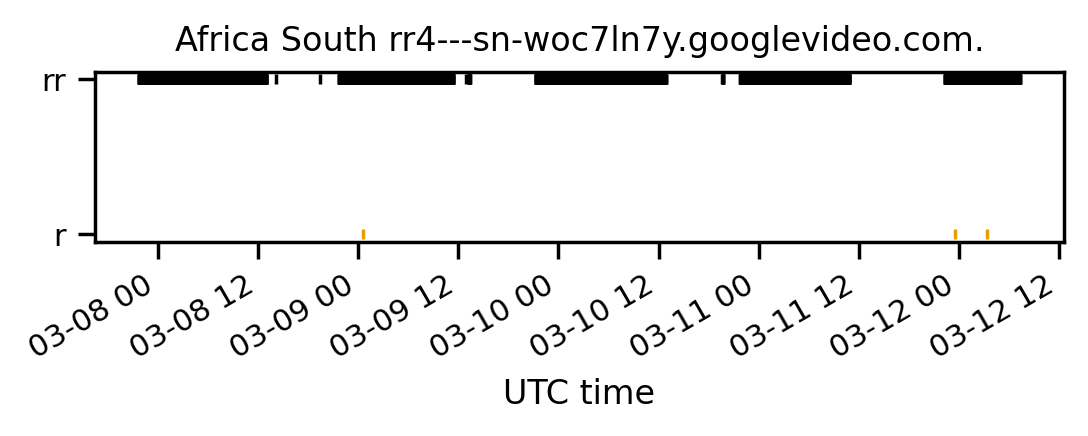

Africa South rr2---sn-5hnekn7z.googlevideo.com.


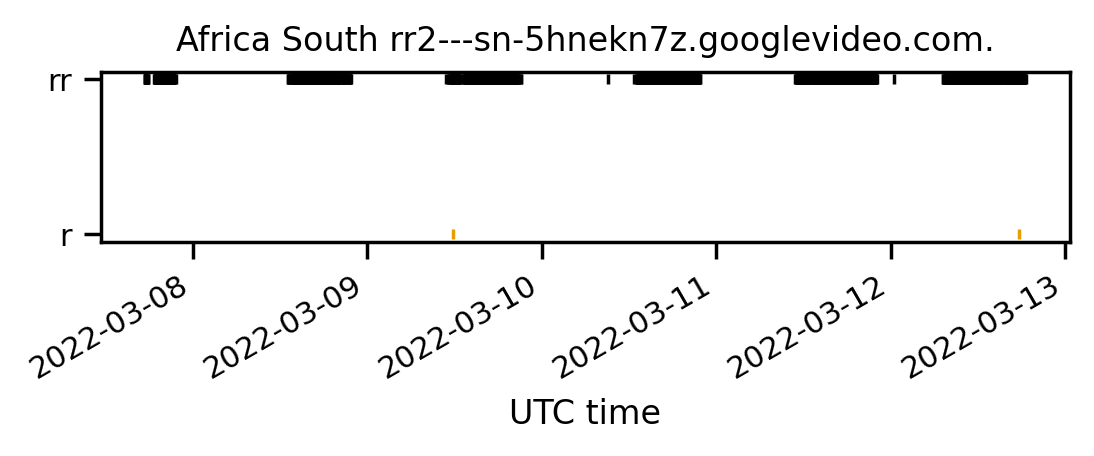

Africa South rr4---sn-5hnekn7k.googlevideo.com.


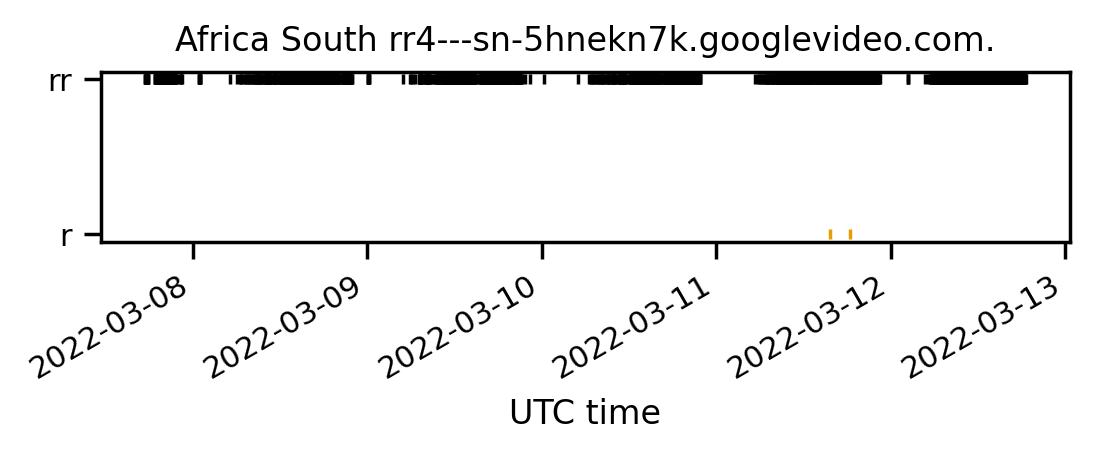

Africa South rr2---sn-woc7ln7y.googlevideo.com.


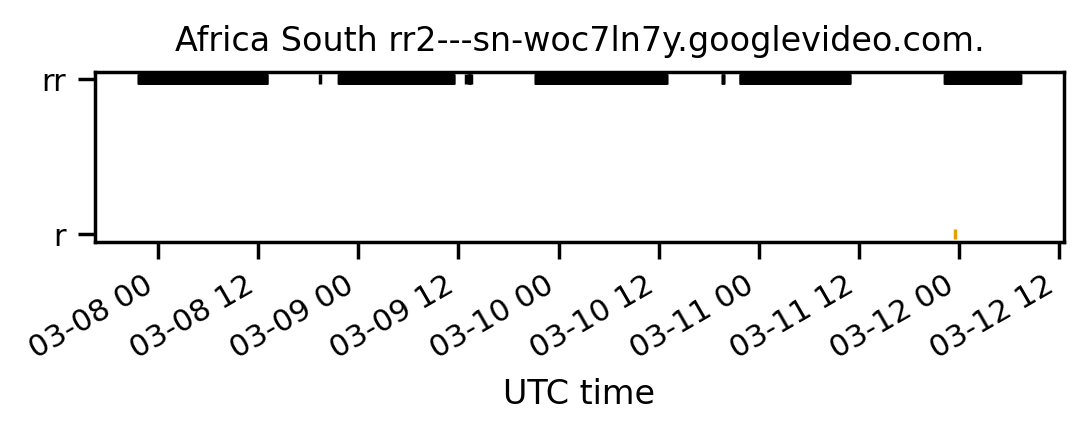

Asia Pacific Northeast rr6---sn-3pm76n7s.googlevideo.com.


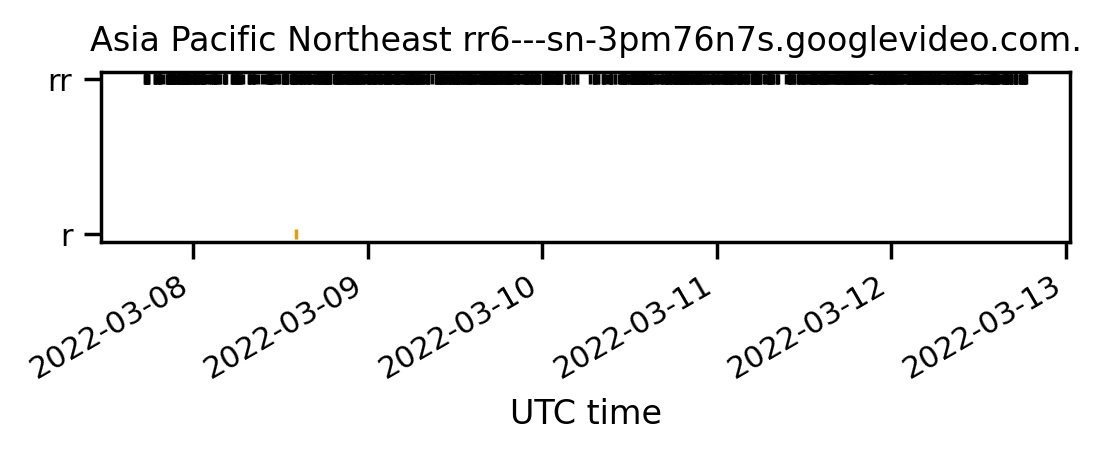

Asia Pacific Northeast rr6---sn-3pm7sn7y.googlevideo.com.


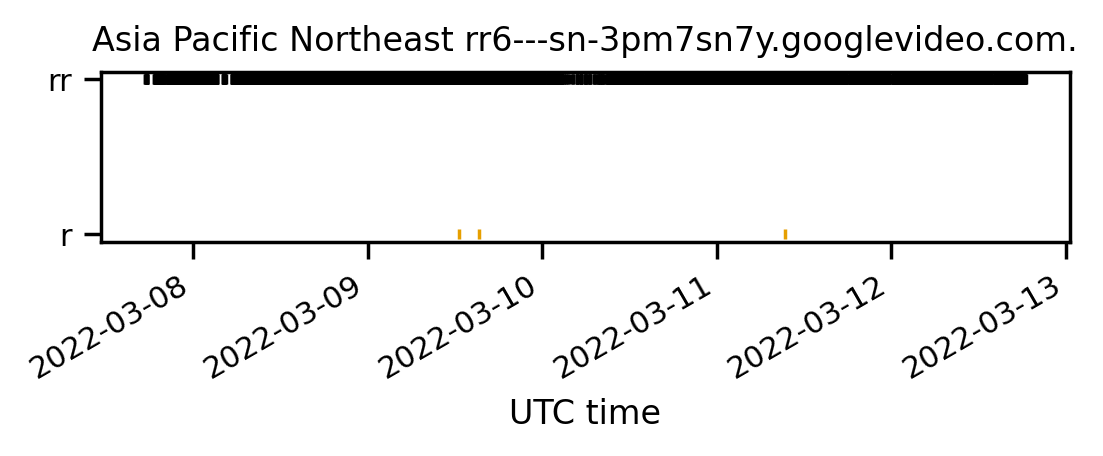

Asia Pacific Southeast rr2---sn-ntqe6nez.googlevideo.com.


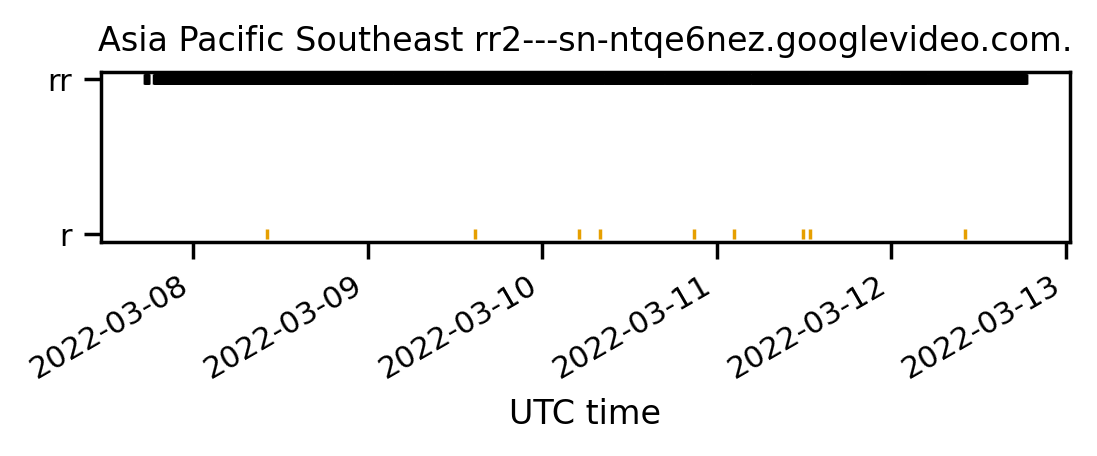

Asia Pacific Southeast rr4---sn-ntq7ynle.googlevideo.com.


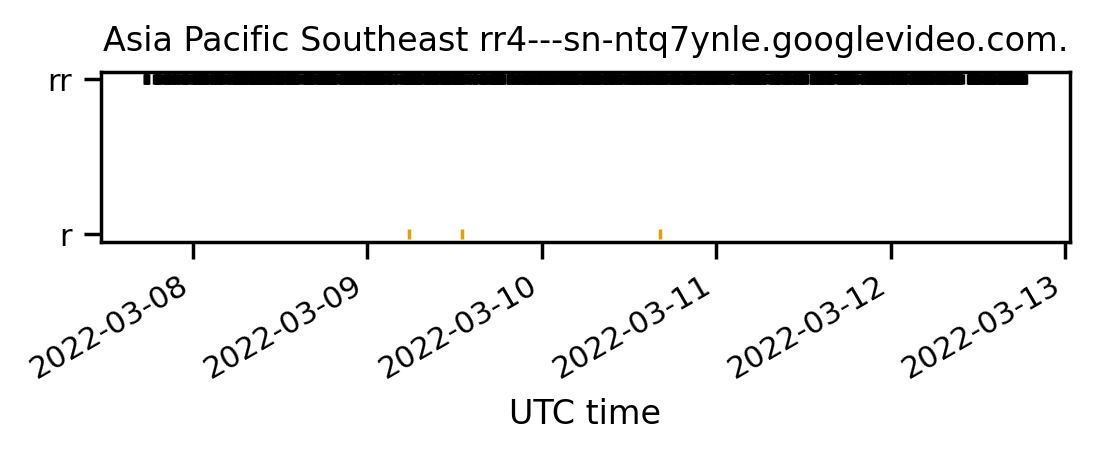

Asia Pacific Southeast rr2---sn-ntq7yned.googlevideo.com.


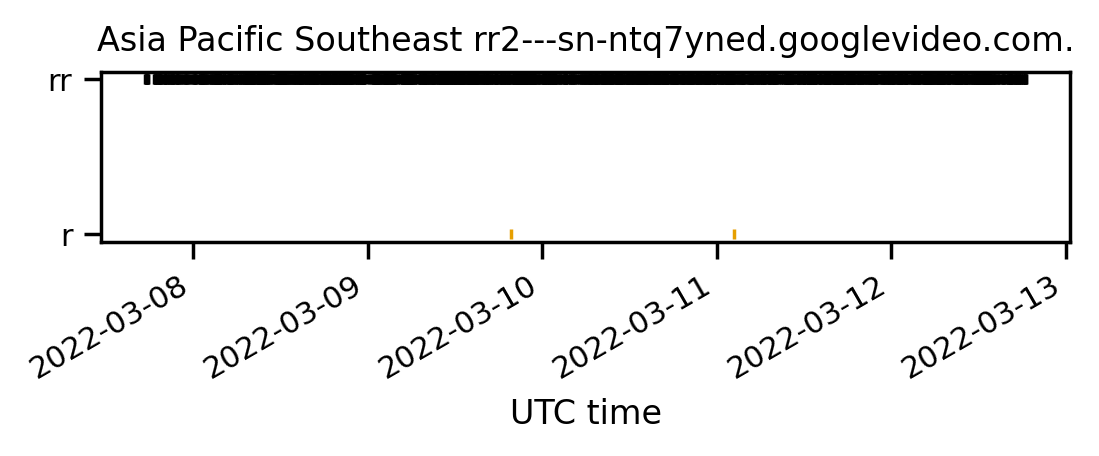

Asia Pacific Southeast rr4---sn-ntqe6n76.googlevideo.com.


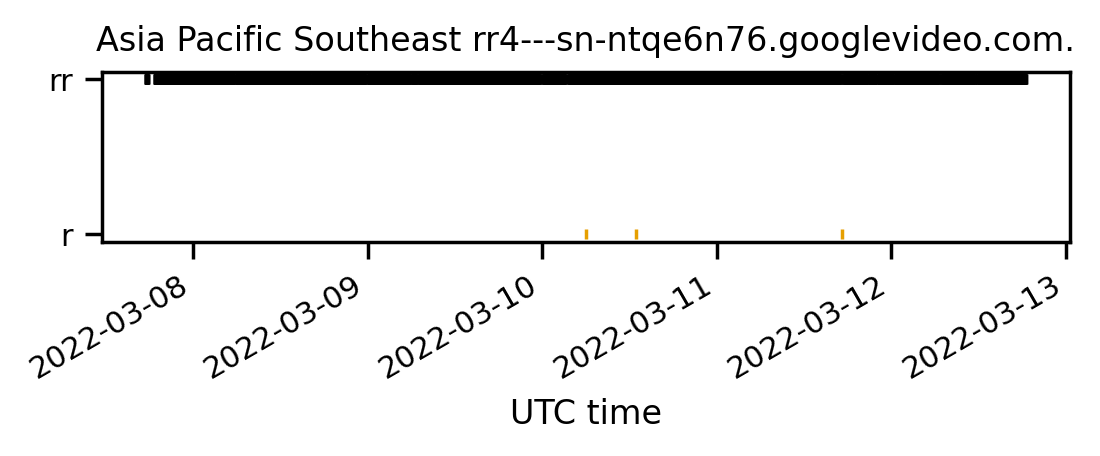

Europe Central rr2---sn-4g5lzner.googlevideo.com.


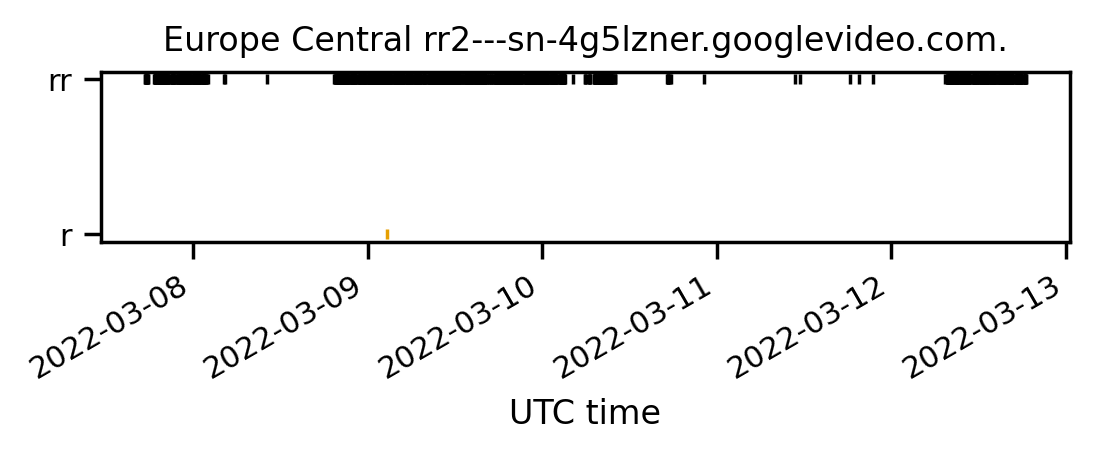

Europe Central rr4---sn-4g5e6nsr.googlevideo.com.


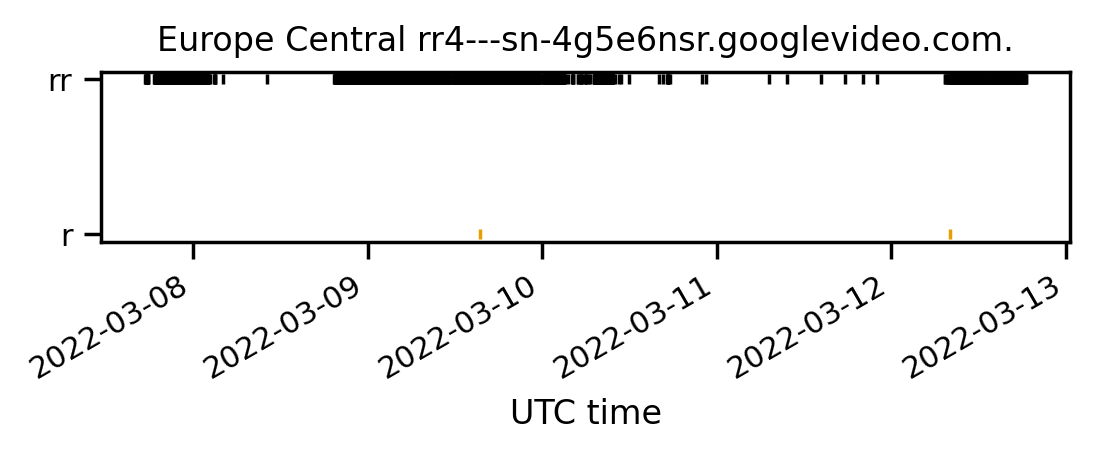

Europe Central rr4---sn-4g5ednde.googlevideo.com.


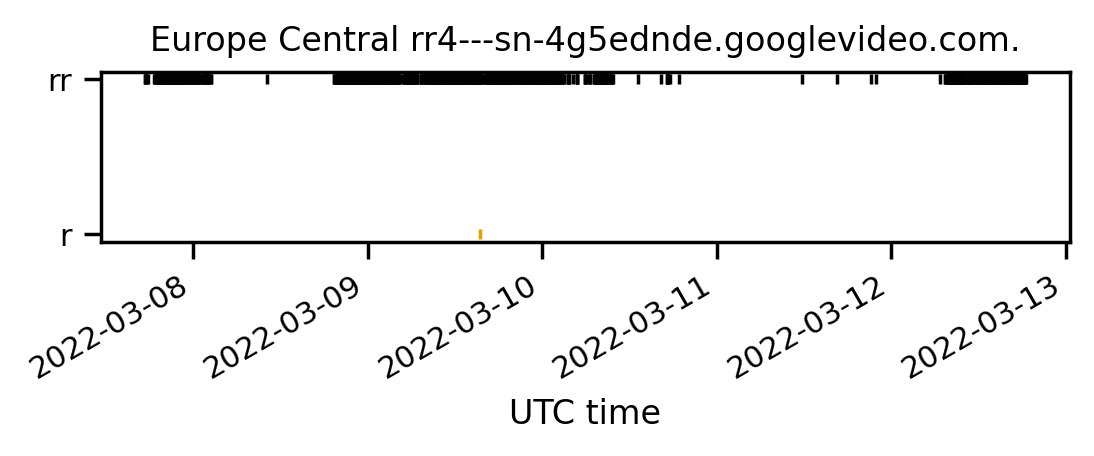

Europe Central rr1---sn-1gi7znek.googlevideo.com.


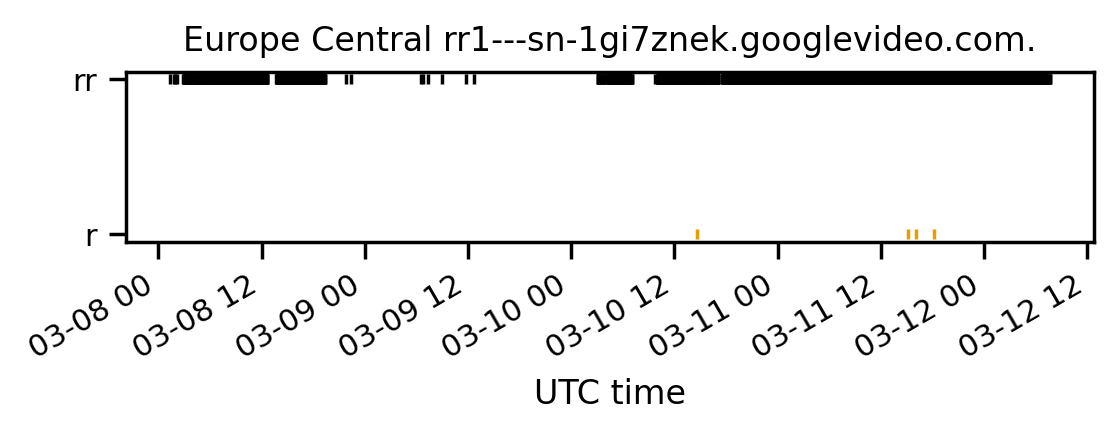

Europe Central rr5---sn-1gi7znek.googlevideo.com.


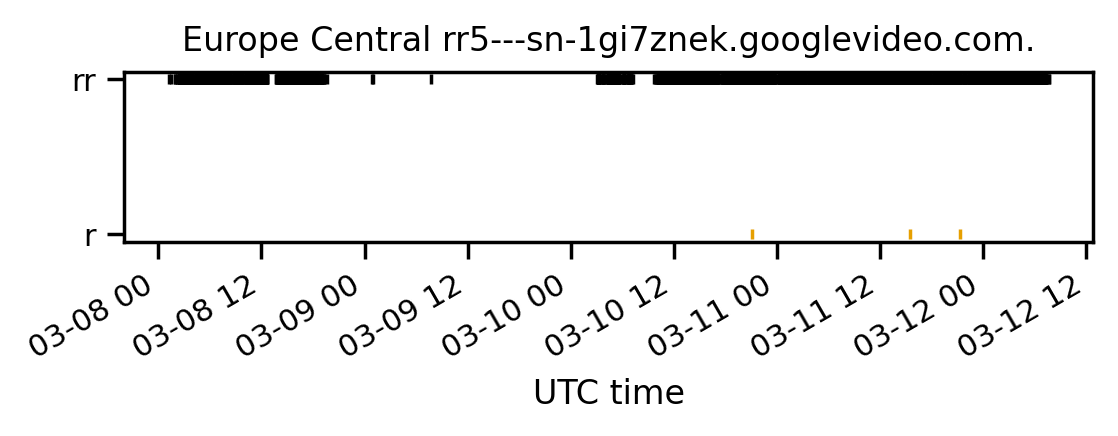

Europe Central rr5---sn-1gieen7e.googlevideo.com.


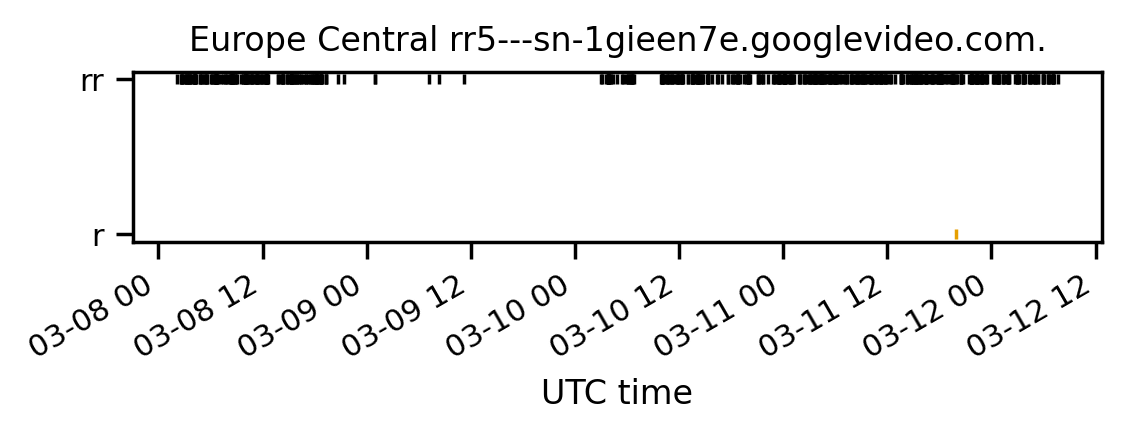

Europe Central rr3---sn-1gieen7e.googlevideo.com.


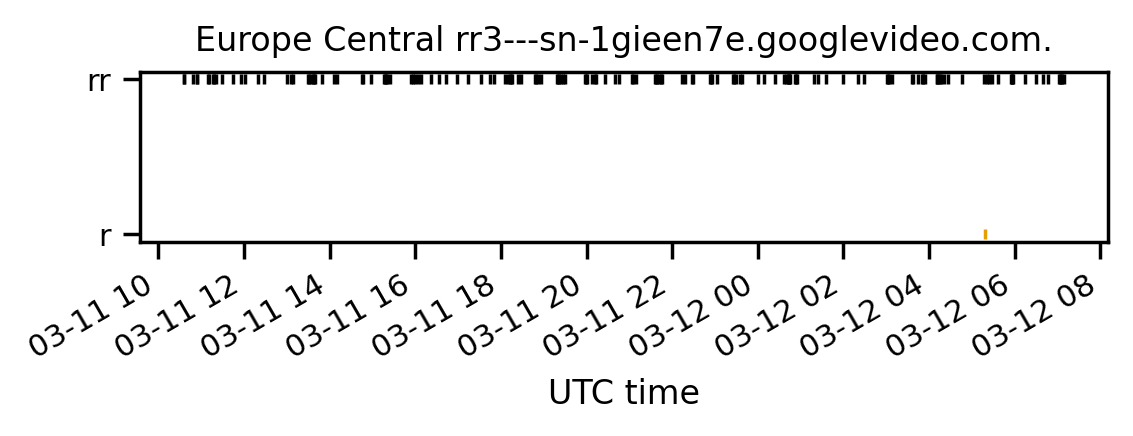

Europe Central rr2---sn-4g5ednly.googlevideo.com.


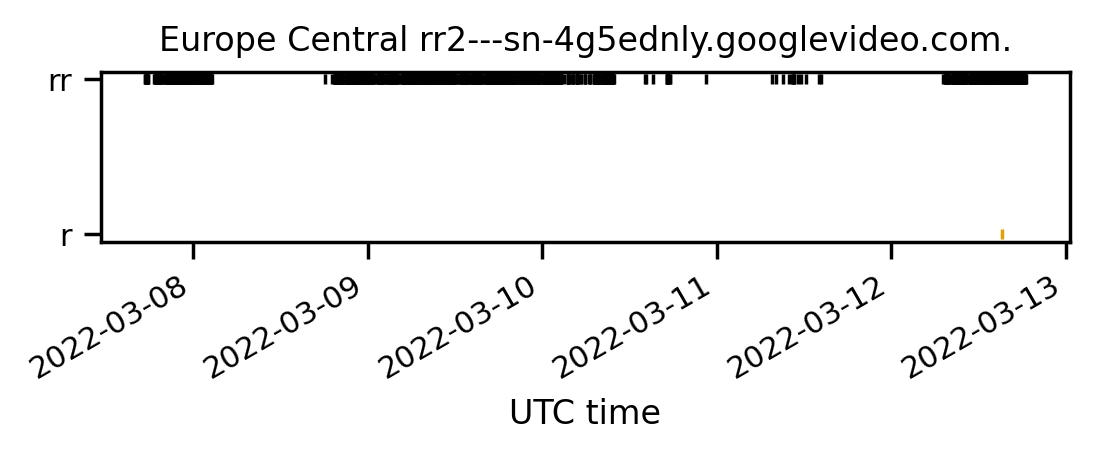

South America East rr2---sn-bg07dn6r.googlevideo.com.


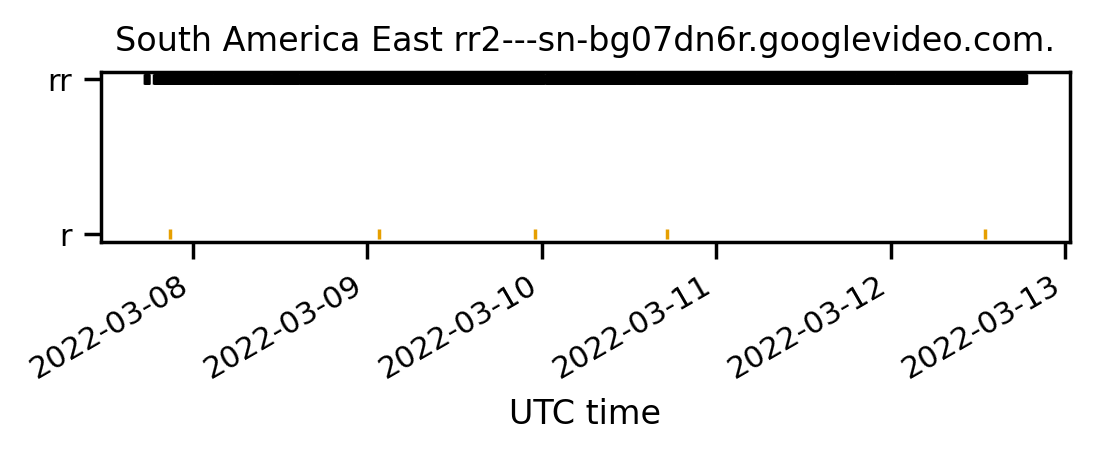

South America East rr4---sn-bg07dnsl.googlevideo.com.


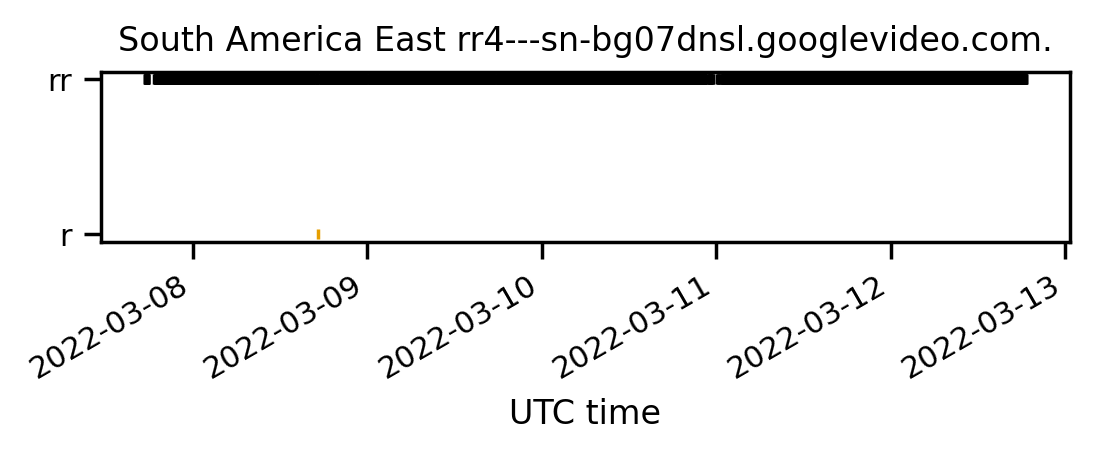

South America East rr2---sn-bg0eznek.googlevideo.com.


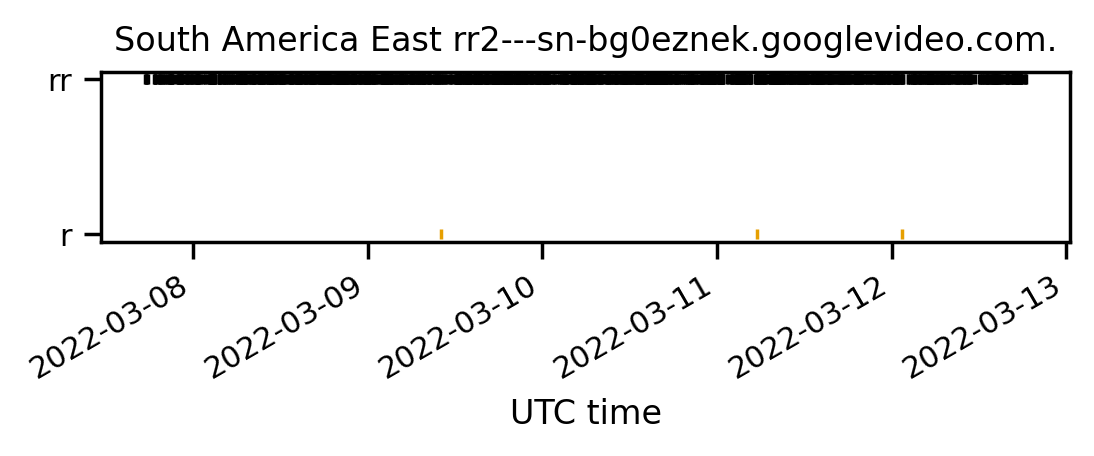

South America East rr4---sn-bg0ezn7l.googlevideo.com.


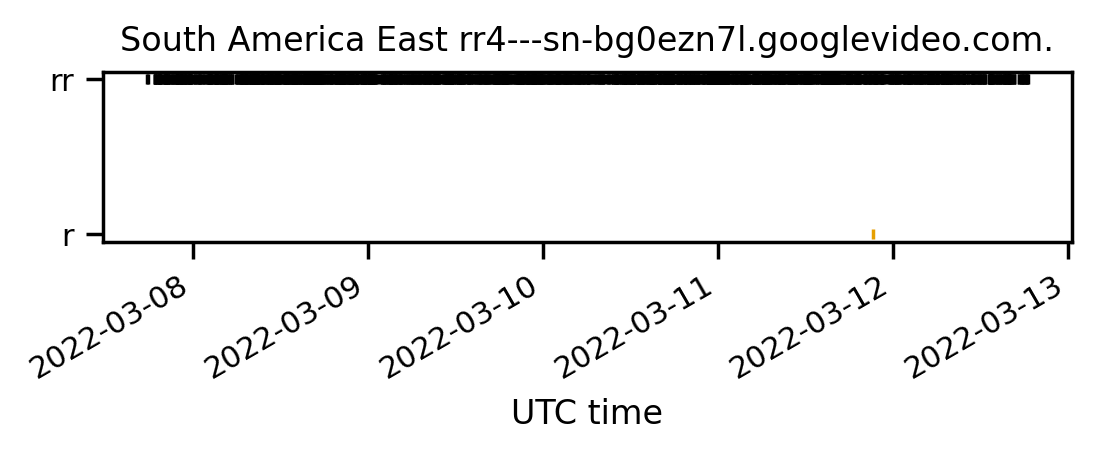

US East rr2---sn-p5qddn7k.googlevideo.com.


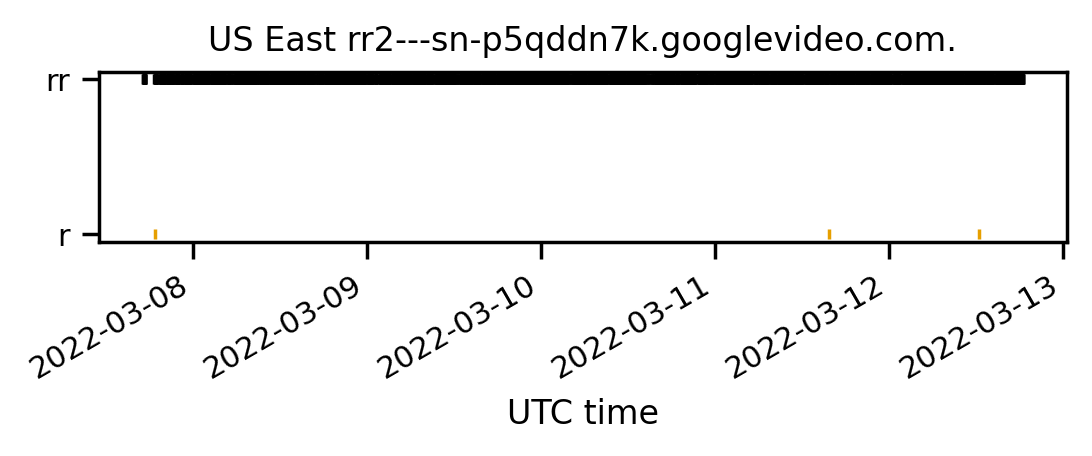

US East rr4---sn-p5qs7n7d.googlevideo.com.


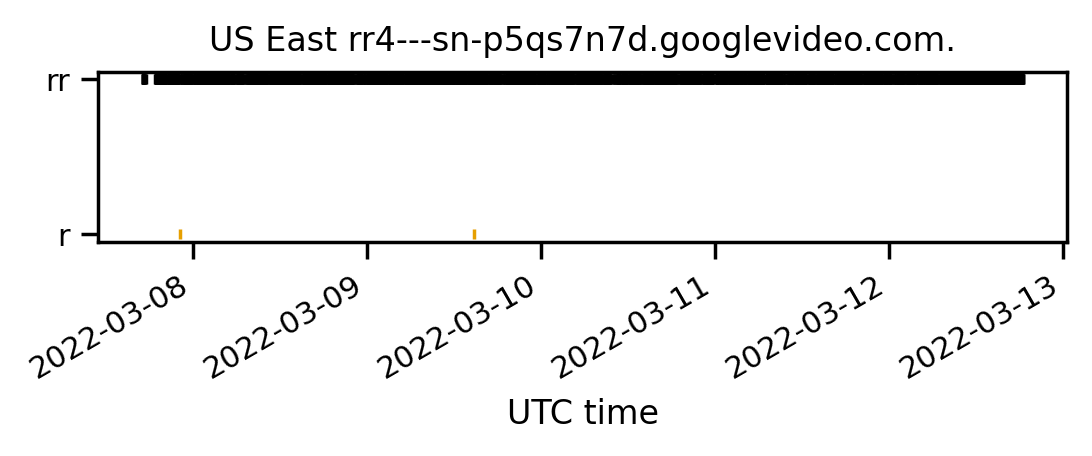

US East rr4---sn-p5qlsn76.googlevideo.com.


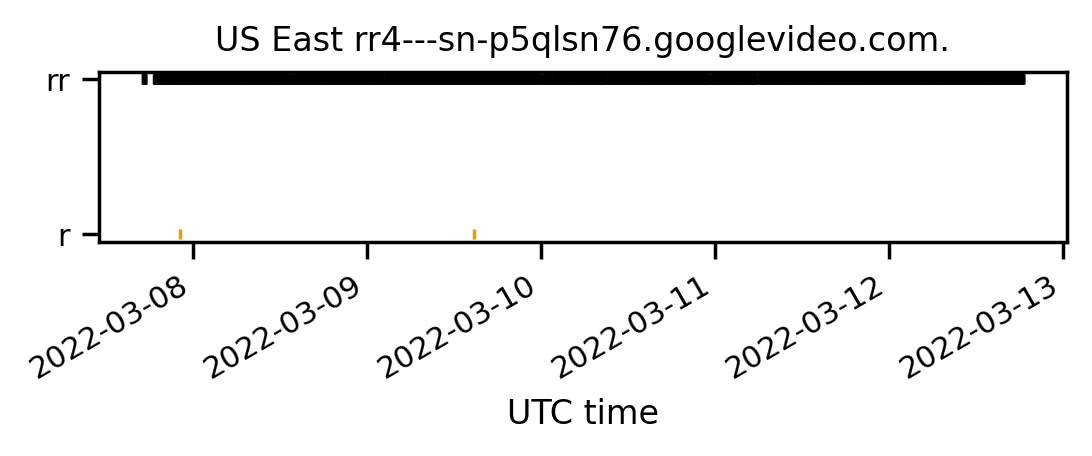

US West rr2---sn-n4v7sney.googlevideo.com.


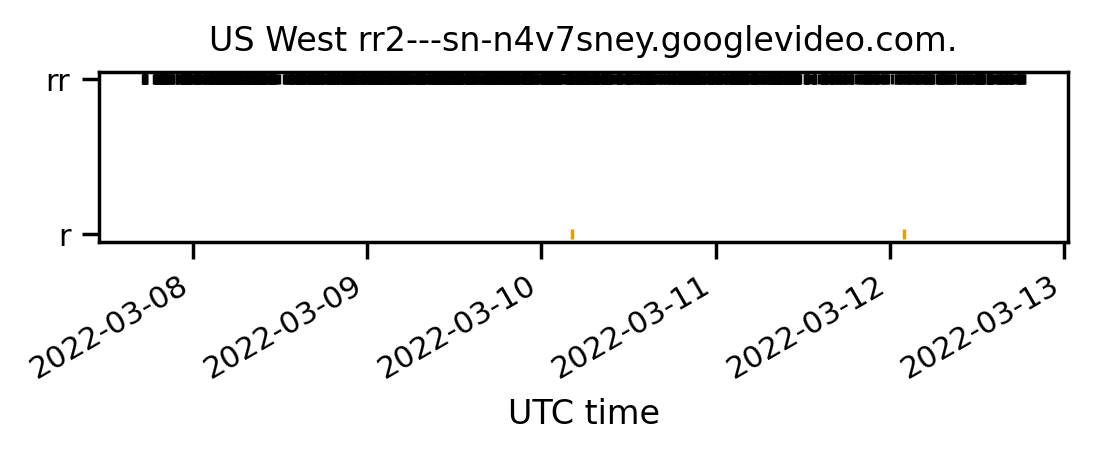

US West rr4---sn-o097znse.googlevideo.com.


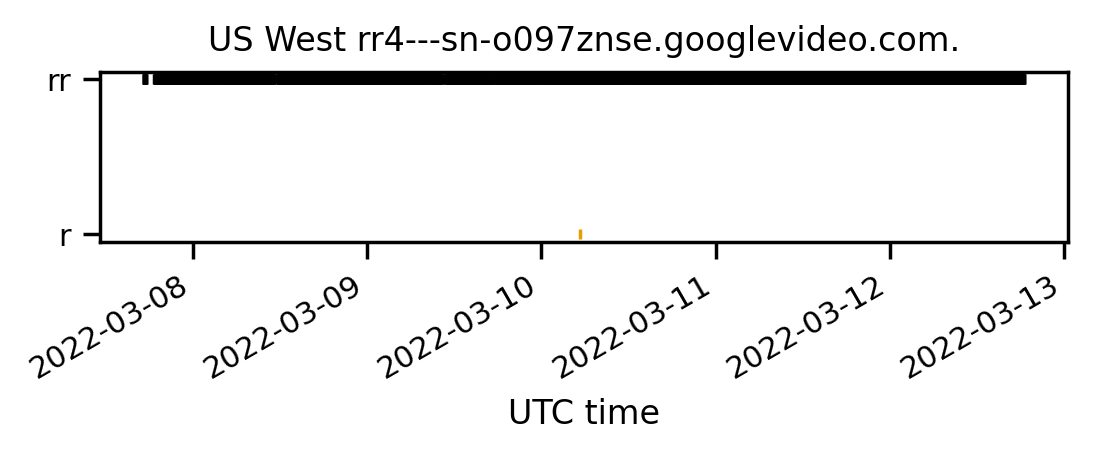

In [252]:
for dn in r_list:
    for vp in r_msms[r_msms.domain == dn[1:]].vantagePoint.unique():
        print(vp+' '+dn)
        fig = plt.figure(figsize=(5,1))
        ax = fig.add_subplot(111)



        df_tmp = r_msms[(r_msms.domain == dn[1:]) & (r_msms.vantagePoint == vp)][['first_time_seen']].set_index('first_time_seen')

        df_tmp['dummy'] = 1
        df_tmp.plot(y='dummy', ax=ax, marker='|', markersize=3, drawstyle="default", lw=0, label='r', color='C1')

        df_tmp = corr_rr_msm[(corr_rr_msm.domain == dn) & (corr_rr_msm.vantagePoint == vp)][['first_time_seen']].set_index('first_time_seen')

        df_tmp['dummy'] = 2
        df_tmp.plot(y='dummy', ax=ax, marker='|', markersize=3, drawstyle="default", lw=0, label='rr', color='C0')

        ax.legend_.remove()
        ax.set_title(vp+' '+dn)
        ax.set_yticks([1.,2.])
        ax.set_yticklabels(['r', 'rr'])
        ax.set_ylabel('')
        ax.set_xlabel("UTC time")
        #ax.legend(loc='center', ncol=2, markerscale=2, bbox_to_anchor=(.5, -.6), labelspacing=1)
        plt.show()

In [253]:
df_redirector = lookups[lookups.video_subdomain == 'redirector'].copy()
df_redirector.reset_index(drop=True, inplace=True)
df_redirector

msm_id                       domain  \
0   ca22505b-3797-9b9e-295f-67688c18ee09  redirector.googlevideo.com.   
1   6583d20e-b07c-b967-0f46-597acd192576  redirector.googlevideo.com.   
2   22842c55-c7f2-3f86-c3f2-f505be338bba  redirector.googlevideo.com.   
3   c16fc6c5-1419-2eb3-1e9e-5a385e13e24a  redirector.googlevideo.com.   
4   0cc1c590-62d5-4ace-e16c-87aecffcef54  redirector.googlevideo.com.   
5   bd03c8e8-1921-d1f6-e1fb-745296688c9c  redirector.googlevideo.com.   
6   1e427b6a-49a0-a8bb-6c0f-04f5757fa7d8  redirector.googlevideo.com.   
7   edc94675-6463-5971-8321-49601de0c588  redirector.googlevideo.com.   
8   16f332e1-a9e6-3872-3128-e23cde754c17  redirector.googlevideo.com.   
9   4e83db4e-53c8-9032-e224-8f01fb970b78  redirector.googlevideo.com.   
10  ba306a22-f175-abf8-0868-7ad7ad3851fe  redirector.googlevideo.com.   
11  2358f654-ca2a-95c8-f643-24a26941e499  redirector.googlevideo.com.   
12  efa37cf0-5cca-006e-2065-3304779f8ad3  redirector.googlevideo.com.   
13  0b42c284-752b-b2cb-50b6-5dbd10ffb44e  redirector.googlevideo.com.   
14  998658df-5b87-ee68-e269-f1a5ee9e477d  redirector.googlevideo.com.   
15  f5ffeef2-521b-066c-4063-8c7fe6c2a3ee  redirector.googlevideo.com.   
16  d9f77456-116a-c414-3053-fa645b2fa2c6  redirector.googlevideo.com.   
17  29ead078-39c6-a3da-5a12-85387cf1bb01  redirector.googlevideo.com.   
18  a389a9c4-25fa-e6e8-27b4-416ade2f880c  redirector.googlevideo.com.   
19  5029cd82-b537-c2b6-b396-d72a890a2498  redirector.googlevideo.com.   
20  000fdce4-b9fb-f5ce-cfac-4e7a04f84ce6  redirector.googlevideo.com.   
21  412e6046-ddad-e464-1bdb-8082a4949ceb  redirector.googlevideo.com.   
22  90431a70-ef88-fdc8-1d93-4607740a553d  redirector.googlevideo.com.   
23  2357e05e-6d22-8ea6-cce8-c66e1a712579  redirector.googlevideo.com.   
24  ed884095-ec75-abf6-d454-ca87c1bccf4a  redirector.googlevideo.com.   
25  2f5764c4-382d-db68-cec6-00497ee533af  redirector.googlevideo.com.   
26  890c000d-9059-c721-4aa1-fb6202c29a7f  redirector.googlevideo.com.   
27  c77a07b9-67cf-9ba1-46b2-979f078e1d31  redirector.googlevideo.com.   
28  73124a7d-f579-18fe-433d-56817fb685f3  redirector.googlevideo.com.   
29  a940f13a-e4fc-9e67-acb4-cccdb1bca243  redirector.googlevideo.com.   
30  ce81a07f-c208-41fc-33ba-68b03cdd6443  redirector.googlevideo.com.   
31  b2c9e180-5e3b-ee18-ea23-cf5ae0233586  redirector.googlevideo.com.   
32  f01b3603-b447-0a56-4404-aeaca375fae5  redirector.googlevideo.com.   
33  ffe7be0c-446a-33cf-4b1d-be8a936962f3  redirector.googlevideo.com.   
34  2643954b-3b5d-bac5-ad3a-5997714d03f1  redirector.googlevideo.com.   
35  5fa567f0-b1ea-2e4d-9813-7f8179087295  redirector.googlevideo.com.   
36  f1e691f1-2a30-6410-ae68-b0ccc5095c0e  redirector.googlevideo.com.   
37  4ba512e0-3c93-0214-a406-8c2b3614c608  redirector.googlevideo.com.   

       elapsed   status                                             answer  \
0   148.308688  NOERROR  redirector.googlevideo.com.,124,IN,A,142.250.1...   
1   148.539392  NOERROR  redirector.googlevideo.com.,255,IN,A,142.250.1...   
2   164.137688  NOERROR  redirector.googlevideo.com.,218,IN,A,172.217.1...   
3   300.500607  NOERROR  redirector.googlevideo.com.,105,IN,A,142.250.1...   
4   162.473625  NOERROR  redirector.googlevideo.com.,143,IN,A,142.250.1...   
5   155.717689  NOERROR  redirector.googlevideo.com.,80,IN,A,172.217.16...   
6   153.084218  NOERROR  redirector.googlevideo.com.,159,IN,A,142.250.1...   
7    20.159757  NOERROR  redirector.googlevideo.com.,286,IN,A,216.58.22...   
8   185.362536  NOERROR  redirector.googlevideo.com.,15,IN,A,74.125.24....   
9    94.121297  NOERROR  redirector.googlevideo.com.,282,IN,A,74.125.24...   
10   94.065837  NOERROR  redirector.googlevideo.com.,21,IN,A,74.125.200...   
11   94.129299  NOERROR  redirector.googlevideo.com.,281,IN,A,74.125.20...   
12   92.602020  NOERROR  redirector.googlevideo.com.,243,IN,A,74.125.20...   
13  199.694747  NOERROR  redirector.googlevideo.com.,190,IN,A,74.125.20...   
14  189.360742  

In [254]:
df_redirector.vantagePoint.unique()

array(['Africa South', 'Asia Pacific Northeast', 'Asia Pacific Southeast',
       'Europe Central', 'South America East', 'US East', 'US West'],
      dtype=object)

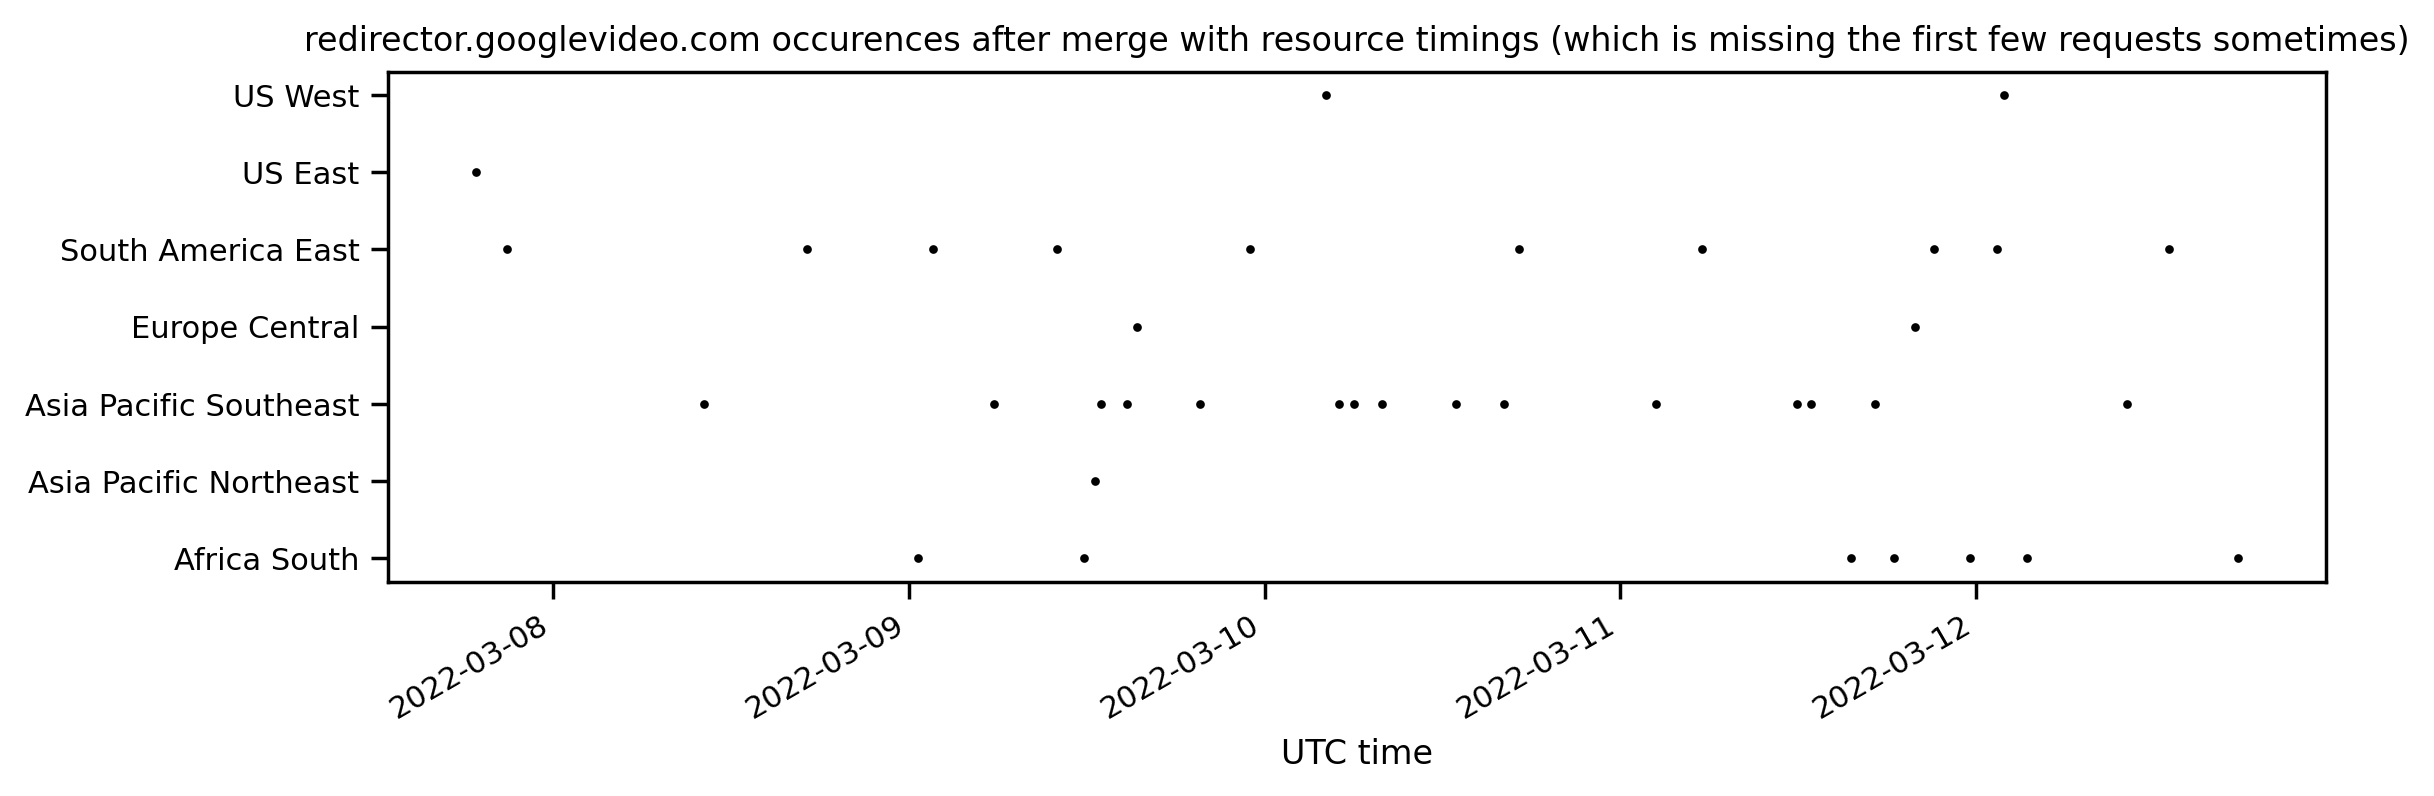

In [255]:
with sns.color_palette(sns.color_palette(okabe_ito)):
    fig = plt.figure(figsize=(10,3))
    ax = fig.add_subplot(111)
    vp_list = df_redirector.vantagePoint.unique().tolist()
    for index in range(len(vp_list)):
        vp = vp_list[index]
        df_tmp = df_redirector[df_redirector.vantagePoint == vp][['first_time_seen']].set_index('first_time_seen')
        df_tmp['yaxis'] = index + 1.
        df_tmp.plot(y='yaxis', ax=ax, marker=".", markersize=3, drawstyle="default", lw=0, color='C0')

    ax.legend_.remove()
    ax.set_title('redirector.googlevideo.com occurences after merge with resource timings (which is missing the first few requests sometimes)')
    ax.set_yticks(list(range(1,len(vp_list)+1)))
    ax.set_yticklabels(vp_list)

    ax.set_xlabel("UTC time")
    plt.show()

In [256]:
df_redirector.vantagePoint.value_counts()

Asia Pacific Southeast    15
South America East        10
Africa South               7
Europe Central             2
US West                    2
Asia Pacific Northeast     1
US East                    1
Name: vantagePoint, dtype: int64

In [257]:
df_redirector.msm_id.nunique()

38

In [258]:
lookups.msm_id.nunique()

57634

In [259]:
redirector_msm_ids_before_merge_with_resource_timings = pd.read_sql_query('SELECT DISTINCT(measurement_id) AS msm_id FROM lookups WHERE domain = "redirector.googlevideo.com."', conn)
redirector_msm_ids_before_merge_with_resource_timings

msm_id
0     b387519a-1fa3-59f5-6734-c552e0bd8d15
1     2a7e1906-ccf3-c3d6-bdae-e8ee1481209b
2     8c99c0dd-a232-115a-5d0e-a393a55acc87
3     ea7501dc-6f5c-b180-0665-60ce956ccd7e
4     0daccb40-4410-f885-4645-d7f8ae0122b3
...                                    ...
1194  20f945cf-3b3a-a2c5-4972-b2340c10e6b8
1195  bc68035f-cde8-a7e5-8239-0a34b463b11a
1196  2b4a1179-6ecb-b9ba-8774-8c66662e100e
1197  ba05af06-42ec-4c7d-1c2b-423cb47c9b32
1198  bb99d143-a97e-da58-58b7-93ad4506003d

[1199 rows x 1 columns]

In [260]:
df_redirector_before_merge_with_resource_timings = pd.read_sql_query('SELECT * FROM lookups WHERE domain = "redirector.googlevideo.com."', conn)
df_redirector_before_merge_with_resource_timings.rename(columns=lambda x: x.replace('measurement_id', 'msm_id'), inplace=True)
df_redirector_before_merge_with_resource_timings

msm_id                       domain  \
0     b387519a-1fa3-59f5-6734-c552e0bd8d15  redirector.googlevideo.com.   
1     2a7e1906-ccf3-c3d6-bdae-e8ee1481209b  redirector.googlevideo.com.   
2     8c99c0dd-a232-115a-5d0e-a393a55acc87  redirector.googlevideo.com.   
3     ea7501dc-6f5c-b180-0665-60ce956ccd7e  redirector.googlevideo.com.   
4     0daccb40-4410-f885-4645-d7f8ae0122b3  redirector.googlevideo.com.   
...                                    ...                          ...   
1194  20f945cf-3b3a-a2c5-4972-b2340c10e6b8  redirector.googlevideo.com.   
1195  bc68035f-cde8-a7e5-8239-0a34b463b11a  redirector.googlevideo.com.   
1196  2b4a1179-6ecb-b9ba-8774-8c66662e100e  redirector.googlevideo.com.   
1197  ba05af06-42ec-4c7d-1c2b-423cb47c9b32  redirector.googlevideo.com.   
1198  bb99d143-a97e-da58-58b7-93ad4506003d  redirector.googlevideo.com.   

         elapsed   status                                             answer  
0     177.559247  NOERROR  redirector.googlevideo.com.,224,IN,A,172.217.1...  
1     315.090083  NOERROR  redirector.googlevideo.com.,18,IN,A,142.250.17...  
2     151.943714  NOERROR  redirector.googlevideo.com.,177,IN,A,142.250.1...  
3     146.140474  NOERROR  redirector.googlevideo.com.,87,IN,A,142.250.18...  
4     161.024436  NOERROR  redirector.googlevideo.com.,126,IN,A,142.250.1...  
...          ...      ...                                                ...  
1194    9.531599  NOERROR  redirector.googlevideo.com.,232,IN,A,142.250.6...  
1195    8.948602  NOERROR  redirector.googlevideo.com.,216,IN,A,142.250.6...  
1196    8.782888  NOERROR  redirector.googlevideo.com.,237,IN,A,142.250.6...  
1197   10.127887  NOERROR  redirector.googlevideo.com.,83,IN,A,142.250.68...  
1198    8.838675  NOERROR  redirector.googlevideo.com.,42,IN,A,142.250.68...  

[1199 rows x 5 columns]

In [261]:
df_redirector_before_merge_with_resource_timings = pd.merge(df_redirector_before_merge_with_resource_timings, measurements[(measurements.error == '') & (measurements.cacheWarming == 0)][['msm_id', 'video_id', 'player_dimensions', 'timestamp', 'vantagePoint']], on='msm_id')
df_redirector_before_merge_with_resource_timings

msm_id                       domain  \
0    8c99c0dd-a232-115a-5d0e-a393a55acc87  redirector.googlevideo.com.   
1    0daccb40-4410-f885-4645-d7f8ae0122b3  redirector.googlevideo.com.   
2    95f6717f-4c99-d2f4-736f-08a1164fb9c6  redirector.googlevideo.com.   
3    2217e873-dffe-1bbf-fb7c-d18627fe1240  redirector.googlevideo.com.   
4    826649d5-e1d5-7c95-8fe5-b821ebd518a3  redirector.googlevideo.com.   
..                                    ...                          ...   
611  4403b300-4857-eab4-9905-9d3852f91fe6  redirector.googlevideo.com.   
612  3242ae7e-2d25-eb07-4e42-768e9c06700e  redirector.googlevideo.com.   
613  61cb7d44-8969-ae86-9d74-1faa7b78d848  redirector.googlevideo.com.   
614  ba05af06-42ec-4c7d-1c2b-423cb47c9b32  redirector.googlevideo.com.   
615  bb99d143-a97e-da58-58b7-93ad4506003d  redirector.googlevideo.com.   

        elapsed   status                                             answer  \
0    151.943714  NOERROR  redirector.googlevideo.com.,177,IN,A,142.250.1...   
1    161.024436  NOERROR  redirector.googlevideo.com.,126,IN,A,142.250.1...   
2    147.909799  NOERROR  redirector.googlevideo.com.,55,IN,A,172.217.16...   
3    405.262589  NOERROR  redirector.googlevideo.com.,149,IN,A,216.58.21...   
4    468.051335  NOERROR  redirector.googlevideo.com.,193,IN,A,142.250.1...   
..          ...      ...                                                ...   
611    8.657579  NOERROR  redirector.googlevideo.com.,229,IN,A,142.250.6...   
612    9.598712  NOERROR  redirector.googlevideo.com.,230,IN,A,142.250.6...   
613   10.031381  NOERROR  redirector.googlevideo.com.,72,IN,A,142.250.68...   
614   10.127887  NOERROR  redirector.googlevideo.com.,83,IN,A,142.250.68...   
615    8.838675  NOERROR  redirector.googlevideo.com.,42,IN,A,142.250.68...   

        video_id player_dimensions                  timestamp  vantagePoint  
0    aqz-KE-bpKQ         3840x2160 2022-03-07 20:00:38.455709  Africa South  
1    lqiN98z6Dak         2560x1440 2022-03-07 20:05:20.213408  Africa South  
2    lqiN98z6Dak         2560x1440 2022-03-07 21:15:48.251623  Africa South  
3    aqz-KE-bpKQ         2560x1440 2022-03-07 22:59:59.276350  Africa South  
4    lqiN98z6Dak          1280x720 2022-03-08 00:00:53.452533  Africa South  
..           ...               ...                        ...           ...  
611  lqiN98z6Dak         1920x1080 2022-03-12 09:57:04.856145       US West  
612  aqz-KE-bpKQ         1920x1080 2022-03-12 13:37:04.204249       US West  
613  aqz-KE-bpKQ         3840x2160 2022-03-12 13:39:42.449503       US West  
614  lqiN98z6Dak         2560x1440 2022-03-12 17:19:30.751912       US West  
615  aqz-KE-bpKQ         3840x2160 2022-03-12 17:20:11.815973       US West  

[616 rows x 9 columns]

In [262]:
df_redirector_before_merge_with_resource_timings.video_id.value_counts()

lqiN98z6Dak    311
aqz-KE-bpKQ    305
Name: video_id, dtype: int64

In [263]:
df_redirector_before_merge_with_resource_timings.vantagePoint.value_counts()

Asia Pacific Southeast    98
Europe Central            96
Asia Pacific Northeast    94
US East                   89
South America East        86
US West                   77
Africa South              76
Name: vantagePoint, dtype: int64

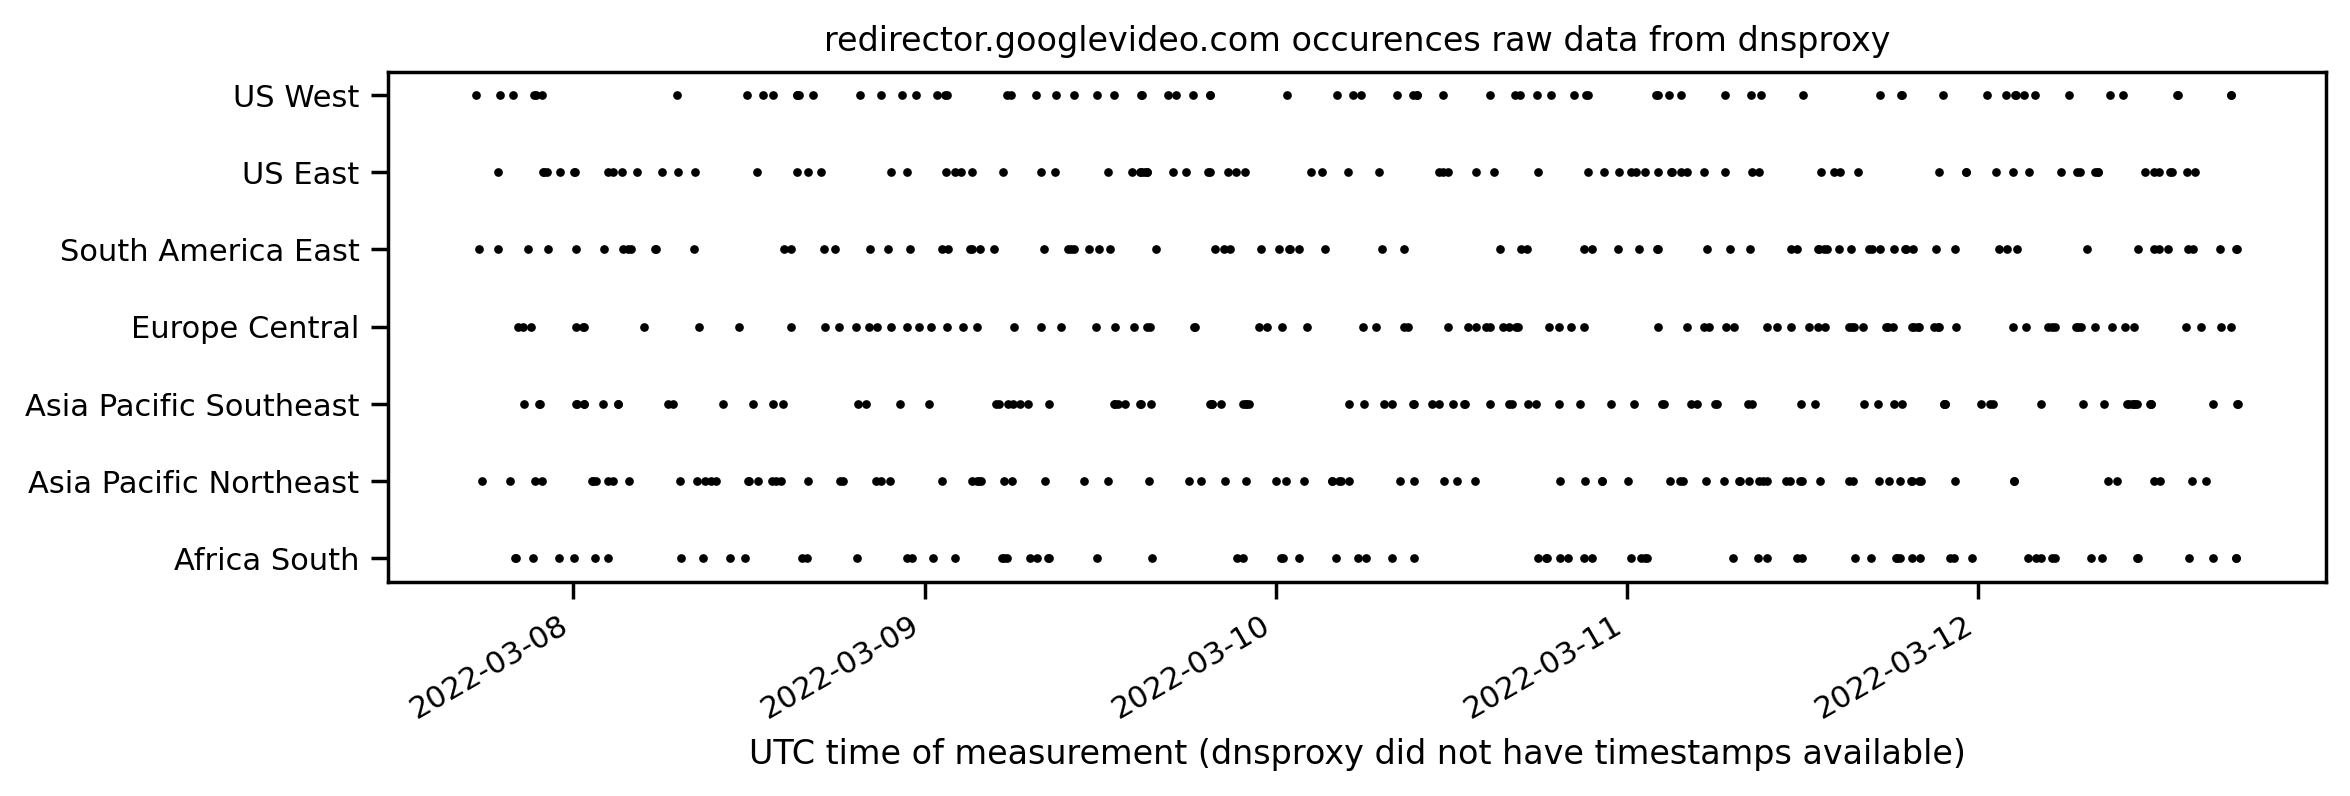

In [264]:
with sns.color_palette(sns.color_palette(okabe_ito)):
    fig = plt.figure(figsize=(10,3))
    ax = fig.add_subplot(111)
    vp_list = df_redirector_before_merge_with_resource_timings.vantagePoint.unique().tolist()
    for index in range(len(vp_list)):
        vp = vp_list[index]
        df_tmp = df_redirector_before_merge_with_resource_timings[df_redirector_before_merge_with_resource_timings.vantagePoint == vp][['timestamp']].set_index('timestamp')
        df_tmp['yaxis'] = index + 1.
        df_tmp.plot(y='yaxis', ax=ax, marker=".", markersize=3, drawstyle="default", lw=0, color='C0')

    ax.legend_.remove()
    ax.set_title('redirector.googlevideo.com occurences raw data from dnsproxy')
    ax.set_yticks(list(range(1,len(vp_list)+1)))
    ax.set_yticklabels(vp_list)

    ax.set_xlabel("UTC time of measurement (dnsproxy did not have timestamps available)")
    plt.show()

In [265]:
red_msm_ids_all = redirector_msm_ids_before_merge_with_resource_timings.msm_id.unique().tolist()

In [266]:
msm_ids_succ = measurements[(measurements.error == '') & (measurements.cacheWarming == 0)].msm_id.unique().tolist()

In [267]:
msm_ids_err = measurements[(measurements.error != '') & (measurements.cacheWarming == 0)].msm_id.unique().tolist()

In [268]:
msm_ids_cw = pd.read_sql_query("SELECT DISTINCT(msm_id) FROM measurements WHERE cacheWarming = 1", conn).msm_id.tolist()

In [269]:
print(len(red_msm_ids_all))
print(len(msm_ids_cw))
print(len(set(red_msm_ids_all).intersection(set(msm_ids_cw))))
print(len(msm_ids_succ))
print(len(set(red_msm_ids_all).intersection(set(msm_ids_succ))))
print(len(msm_ids_err))
print(len(set(red_msm_ids_all).intersection(set(msm_ids_err))))

1199
57681
563
57635
616
45
20


In [270]:
where_do_these_msm_ids_come_from = list(set(red_msm_ids_all) - set(msm_ids_succ) - set(msm_ids_err))

In [271]:
measurements[measurements.msm_id.isin(where_do_these_msm_ids_come_from)]

Empty DataFrame
Columns: [msm_id, py_time, js_time, resource_time_origin, protocol, server, video_id, vantagePoint, timestamp, suggested_quality, player_width, player_height, start_time, play_time, video_ids, cacheWarming, error, player_dimensions]
Index: []

In [272]:
df_redirector_before_merge_with_resource_timings.status.value_counts()

NOERROR    616
Name: status, dtype: int64

In [273]:
all_msm_ids = pd.read_sql_query("SELECT DISTINCT(msm_id) FROM measurements", conn)

In [274]:
all_msm_ids = all_msm_ids.msm_id.tolist()

In [275]:
print(len(set(red_msm_ids_all).intersection(set(all_msm_ids))))

1199


In [276]:
redirector_urls = googlevideo_subdomains[googlevideo_subdomains.googlevideo == 'redirector.googlevideo.com'].name.unique().tolist()

In [277]:
redirector_urls

['https://redirector.googlevideo.com/videoplayback?expire=1646807758&ei=bvYnYvK1Hv65mLAPvbOnyAk&ip=13.245.160.192&id=96a88df7ccfa0da9&itag=251&source=youtube&requiressl=yes&pcm2=no&vprv=1&mime=audio%2Fwebm&ns=tBmhXnZVIyA3U4bhwZOG9X4G&gir=yes&clen=3028899&dur=193.221&lmt=1541292746216032&keepalive=yes&fexp=24001373%2C24007246&beids=23886212&c=WEB_EMBEDDED_PLAYER&txp=5411222&n=3wj0vOEY1zCBOA&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cpcm2%2Cvprv%2Cmime%2Cns%2Cgir%2Cclen%2Cdur%2Clmt&sig=AOq0QJ8wRgIhAMzMm7g82GE6bEemZqini67fmOCXDBMucE4wlqJAX5TAAiEApHWCDQaxuGX3SbRF_lhl6sFbThNNmvVpagtK96zLZuc%3D&alr=yes&cpn=jVbB3KCqzEoTMC5k&cver=1.20220306.00.00&range=0-66138&rn=2&rbuf=0',
 'https://redirector.googlevideo.com/videoplayback?expire=1646807758&ei=bvYnYvK1Hv65mLAPvbOnyAk&ip=13.245.160.192&id=96a88df7ccfa0da9&itag=247&aitags=133%2C134%2C135%2C136%2C137%2C160%2C242%2C243%2C244%2C247%2C248%2C271%2C278%2C313&source=youtube&requiressl=yes&pcm2=no&vprv=1&mime=video%2Fwebm&ns=tBmhXnZVI

In [278]:
msm_with_changing_video_domain = lookups[lookups.googlevideo != 'redirector.googlevideo.com'].groupby('msm_id', as_index=False).agg(nunique_googlevideo=('googlevideo', pd.Series.nunique))
msm_with_changing_video_domain = msm_with_changing_video_domain[msm_with_changing_video_domain.nunique_googlevideo > 1]
msm_with_changing_video_domain

msm_id  nunique_googlevideo
7      0002d2cd-7203-95eb-6c0a-46349bbb5341                    2
56     0032a5f9-b99a-ef28-8edc-d0beda4abeb9                    2
64     003d14fc-0e22-8d3c-f1e6-58bd29e32aa1                    2
85     005777ec-1bd1-9382-994b-c20dd9156c2a                    2
100    006a261e-ac55-15e2-ea88-05c65d3b72be                    2
...                                     ...                  ...
57549  ffab2bf3-1b77-f4fc-8ccd-b0febfdc2e2c                    2
57569  ffbd4673-37dd-13f8-4fbb-c444816c7f87                    3
57588  ffd2f443-d9fb-cdea-b2a5-644005f97f86                    2
57616  ffee776d-eb1b-ad5d-fd1e-b47a5872c5fe                    3
57621  fff3abcb-096c-b807-a04b-867619fb605a                    3

[2757 rows x 2 columns]

In [279]:
msm_ids_subdomain_change = msm_with_changing_video_domain.msm_id.unique().tolist()

In [280]:
msm_ids_with_num_rr_subdomain = lookups[lookups.msm_id.isin(msm_ids_subdomain_change)][['msm_id', 'googlevideo', 'starts_with_rr']].drop_duplicates().groupby('msm_id', as_index=False).agg(nunique_rr_subdomain=('starts_with_rr', np.sum))

In [281]:
msm_ids_with_changing_video_subdomain_and_rr_count = pd.merge(msm_ids_with_num_rr_subdomain, msm_with_changing_video_domain, on='msm_id')

In [282]:
msm_ids_with_changing_video_subdomain_and_rr_count[msm_ids_with_changing_video_subdomain_and_rr_count.nunique_rr_subdomain != msm_ids_with_changing_video_subdomain_and_rr_count.nunique_googlevideo]

msm_id  nunique_rr_subdomain  \
130   0cc1c590-62d5-4ace-e16c-87aecffcef54                     0   
367   2357e05e-6d22-8ea6-cce8-c66e1a712579                     0   
1670  9a02b2c5-58f5-fff4-e5c3-650445d97bd5                     0   
1779  a389a9c4-25fa-e6e8-27b4-416ade2f880c                     0   

      nunique_googlevideo  
130                     2  
367                     2  
1670                    2  
1779                    2

In [283]:
lookups[lookups.msm_id == '0cc1c590-62d5-4ace-e16c-87aecffcef54'].googlevideo.unique()

array(['redirector.googlevideo.com', 'r2---sn-woc7ln7y.googlevideo.com',
       'r4---sn-woc7ln7y.googlevideo.com'], dtype=object)

In [284]:
lookups[lookups.msm_id == '2357e05e-6d22-8ea6-cce8-c66e1a712579'].googlevideo.unique()

array(['redirector.googlevideo.com', 'r4---sn-4g5e6nsr.googlevideo.com',
       'r4---sn-4g5ednde.googlevideo.com'], dtype=object)

In [285]:
lookups[lookups.msm_id == '9a02b2c5-58f5-fff4-e5c3-650445d97bd5'].googlevideo.unique()

array(['r4---sn-p5qs7n7d.googlevideo.com',
       'r4---sn-p5qlsn76.googlevideo.com'], dtype=object)

In [286]:
lookups[lookups.msm_id == 'a389a9c4-25fa-e6e8-27b4-416ade2f880c'].googlevideo.unique()

array(['redirector.googlevideo.com', 'r2---sn-ntq7yned.googlevideo.com',
       'r2---sn-ntqe6nez.googlevideo.com'], dtype=object)

In [287]:
all_non_rr_resolutions = pd.read_sql_query('SELECT * FROM lookups WHERE domain not like "rr%"', conn)

In [288]:
all_non_rr_resolutions = all_non_rr_resolutions[all_non_rr_resolutions.domain.str.endswith('googlevideo.com.')]

In [289]:
msm_ids_for_all_r_only = all_non_rr_resolutions[all_non_rr_resolutions.domain != 'redirector.googlevideo.com.'].measurement_id.unique().tolist()

In [290]:
msm_ids_for_redirector = all_non_rr_resolutions[all_non_rr_resolutions.domain == 'redirector.googlevideo.com.'].measurement_id.unique().tolist()

#### no visible correlation between "r" subdomains and using redirector in the same measurement run

In [291]:
print(len(msm_ids_for_all_r_only))
print(len(msm_ids_for_redirector))
print(len(set(msm_ids_for_all_r_only).intersection(set(msm_ids_for_redirector))))

4305
1199
633


In [292]:
all_non_rr_resolutions

measurement_id  \
154     b387519a-1fa3-59f5-6734-c552e0bd8d15   
392     2a7e1906-ccf3-c3d6-bdae-e8ee1481209b   
1798    8c99c0dd-a232-115a-5d0e-a393a55acc87   
1802    8c99c0dd-a232-115a-5d0e-a393a55acc87   
1826    ea7501dc-6f5c-b180-0665-60ce956ccd7e   
...                                      ...   
768763  ba05af06-42ec-4c7d-1c2b-423cb47c9b32   
768774  bb99d143-a97e-da58-58b7-93ad4506003d   
768778  bb99d143-a97e-da58-58b7-93ad4506003d   
768871  fde76312-2591-5454-29e5-bb7e4775734d   
768899  a7525bb3-a8bc-90f6-060c-b81d6e1652a4   

                                   domain     elapsed   status  \
154           redirector.googlevideo.com.  177.559247  NOERROR   
392           redirector.googlevideo.com.  315.090083  NOERROR   
1798          redirector.googlevideo.com.  151.943714  NOERROR   
1802    r2---sn-5hne6nzk.googlevideo.com.  152.250911  NOERROR   
1826          redirector.googlevideo.com.  146.140474  NOERROR   
...                                   ...         ...      ...   
768763  r2---sn-o097znsd.googlevideo.com.   10.044402  NOERROR   
768774        redirector.googlevideo.com.    8.838675  NOERROR   
768778  r2---sn-o097znsd.googlevideo.com.    9.897664  NOERROR   
768871  r1---sn-25glenez.googlevideo.com.    8.668677  NOERROR   
768899  r5---sn-o097znz7.googlevideo.com.    8.717487  NOERROR   

                                                   answer  
154     redirector.googlevideo.com.,224,IN,A,172.217.1...  
392     redirector.googlevideo.com.,18,IN,A,142.250.17...  
1798    redirector.googlevideo.com.,177,IN,A,142.250.1...  
1802    r2---sn-5hne6nzk.googlevideo.com.,1430,IN,CNAM...  
1826    redirector.googlevideo.com.,87,IN,A,142.250.18...  
...                                                   ...  
768763  r2---sn-o097znsd.googlevideo.com.,1563,IN,CNAM...  
768774  redirector.googlevideo.com.,42,IN,A,142.250.68...  
768778  r2---sn-o097znsd.googlevideo.com.,1522,IN,CNAM...  
768871  r1---sn-25glenez.googlevideo.com.,30,IN,CNAME,...  
768899  r5---sn-o097znz7.googlevideo.com.,30,IN,CNAME,...  

[5551 rows x 5 columns]

In [356]:
df_all_lookups = pd.read_sql_query('SELECT * FROM lookups WHERE domain LIKE "%.googlevideo.com." AND status = "NOERROR"', conn)
df_all_lookups.rename(columns=lambda x: x.replace('measurement_id', 'msm_id'), inplace=True)
df_all_lookups

msm_id  \
0      544b9c53-fb16-e2fe-5fb0-0268b693a586   
1      7a1a699c-6c32-6b28-f8f1-cac46c3d96c8   
2      e2576b0d-50a9-f803-e475-4d880109c675   
3      22cb024f-8247-54be-730f-b2b57f8a4074   
4      150bdff4-3e93-9c75-8236-5c550ea665e1   
...                                     ...   
66508  3c7e0c54-cae9-53bd-6256-b9189b271137   
66509  2cf02006-5094-efc4-77ec-750435ef9ad0   
66510  892bb7e6-6971-f8e2-dbad-f9193758c29c   
66511  651c800b-d38c-86f8-5228-bdbb1bf68384   
66512  d26cd0d1-ce4e-c917-9f5f-d1a416ce98f1   

                                   domain     elapsed   status  \
0      rr2---sn-5hnekn7z.googlevideo.com.  152.211291  NOERROR   
1      rr4---sn-5hnekn7k.googlevideo.com.  149.194440  NOERROR   
2      rr2---sn-5hnekn7z.googlevideo.com.  142.190267  NOERROR   
3      rr4---sn-5hnekn7k.googlevideo.com.  171.337583  NOERROR   
4      rr2---sn-5hnekn7z.googlevideo.com.  150.356304  NOERROR   
...                                   ...         ...      ...   
66508  rr4---sn-n4v7snl7.googlevideo.com.    9.886096  NOERROR   
66509  rr2---sn-o097znsr.googlevideo.com.   12.252375  NOERROR   
66510  rr4---sn-o097znse.googlevideo.com.    8.844368  NOERROR   
66511  rr2---sn-n4v7sney.googlevideo.com.    8.729008  NOERROR   
66512  rr4---sn-n4v7snl7.googlevideo.com.    9.915850  NOERROR   

                                                  answer  
0      rr2---sn-5hnekn7z.googlevideo.com.,699,IN,CNAM...  
1      rr4---sn-5hnekn7k.googlevideo.com.,627,IN,CNAM...  
2      rr2---sn-5hnekn7z.googlevideo.com.,610,IN,CNAM...  
3      rr4---sn-5hnekn7k.googlevideo.com.,538,IN,CNAM...  
4      rr2---sn-5hnekn7z.googlevideo.com.,521,IN,CNAM...  
...                                                  ...  
66508  rr4---sn-n4v7snl7.googlevideo.com.,860,IN,CNAM...  
66509  rr2---sn-o097znsr.googlevideo.com.,1041,IN,CNA...  
66510  rr4---sn-o097znse.googlevideo.com.,666,IN,CNAM...  
66511  rr2---sn-n4v7sney.googlevideo.com.,179,IN,CNAM...  
66512  rr4---sn-n4v7snl7.googlevideo.com.,702,IN,CNAM...  

[66513 rows x 5 columns]

In [357]:
df_all_lookups = pd.merge(df_all_lookups, measurements[['msm_id', 'timestamp', 'video_id', 'vantagePoint']], on='msm_id')

In [301]:
missing_domains_in_resource_timing = pd.merge(
    df_all_lookups.groupby('msm_id', as_index=False).agg(nunique_dn=('domain', pd.Series.nunique)),
    lookups[lookups.status == 'NOERROR'].groupby('msm_id', as_index=False).agg(nunique_dn_rt=('domain', pd.Series.nunique)),
    on='msm_id')

In [304]:
potentially_incomplete_msm_rt = missing_domains_in_resource_timing[missing_domains_in_resource_timing.nunique_dn != missing_domains_in_resource_timing.nunique_dn_rt].msm_id.unique().tolist()

In [338]:
df_tmp_no_rt_filter = df_all_lookups[df_all_lookups.msm_id.isin(potentially_incomplete_msm_rt)].groupby('msm_id', as_index=False).agg(domains=('domain',pd.Series.unique))

In [339]:
df_tmp_rt_filter = lookups[(lookups.status == 'NOERROR')&(lookups.msm_id.isin(potentially_incomplete_msm_rt))].groupby('msm_id', as_index=False).agg(domains=('domain',pd.Series.unique))

In [340]:
df_tmp_no_rt_filter['non_rt_domains'] = ""
for index, row in df_tmp_no_rt_filter.iterrows():
    msm_id = row['msm_id']
    if isinstance(df_tmp_rt_filter[df_tmp_rt_filter.msm_id == msm_id].domains.values[0], str):
        df_tmp_no_rt_filter.loc[index, 'non_rt_domains'] = list(set(df_tmp_no_rt_filter.loc[index, 'domains']) - set([df_tmp_rt_filter[df_tmp_rt_filter.msm_id == msm_id].domains.values[0]]))
    else:
        df_tmp_no_rt_filter.loc[index, 'non_rt_domains'] = list(set(df_tmp_no_rt_filter.loc[index, 'domains']) - set(df_tmp_rt_filter[df_tmp_rt_filter.msm_id == msm_id].domains.values[0]))

In [341]:
df_tmp_no_rt_filter

msm_id  \
0     00016162-7fd0-7bad-e433-9b925952d80e   
1     0003dbce-af07-aec8-469d-33740e948c3f   
2     0004b7c2-341d-6111-e0d1-115990b5a9d4   
3     0005ca93-9c9f-47c6-6ecb-e4081e4a074f   
4     000c54a3-6885-f46b-ac1d-2a70d031245e   
...                                    ...   
4344  ffa207c3-df58-5d88-5918-8c337e89e803   
4345  ffb866bd-c31a-72c6-0370-8711e2f69bb9   
4346  ffc4e7a8-db30-b456-c8f6-2e22d18a6228   
4347  ffd73e9b-cd16-b6dc-a0e8-2971530ec410   
4348  ffe70413-f71e-6e07-894a-8bfbe0b5b9eb   

                                                domains  \
0     [rr4---sn-bg07dnsl.googlevideo.com., r5---sn-i...   
1     [rr4---sn-bg07dnsl.googlevideo.com., r8---sn-j...   
2     [rr4---sn-bg07dnsl.googlevideo.com., r6---sn-a...   
3     [rr4---sn-n4v7snl7.googlevideo.com., r3---sn-n...   
4     [redirector.googlevideo.com., r2---sn-3pm7sn7z...   
...                                                 ...   
4344  [rr4---sn-4g5e6nsr.googlevideo.com., r1---sn-i...   
4345  [rr4---sn-o097znse.googlevideo.com., r1---sn-2...   
4346  [rr4---sn-4g5e6nsr.googlevideo.com., r4---sn-4...   
4347  [rr5---sn-1gieen7e.googlevideo.com., r2---sn-v...   
4348  [rr4---sn-bg0ezn7l.googlevideo.com., r3---sn-5...   

                                         non_rt_domains  
0                   [r5---sn-ixh7yn7e.googlevideo.com.]  
1                [r8---sn-j5c5nx-x1x6.googlevideo.com.]  
2                   [r6---sn-a5meknll.googlevideo.com.]  
3                   [r3---sn-nx5s7n7d.googlevideo.com.]  
4     [redirector.googlevideo.com., r2---sn-3pm7sn7z...  
...                                                 ...  
4344                [r1---sn-i3b7knzs.googlevideo.com.]  
4345                [r1---sn-25glen7y.googlevideo.com.]  
4346                [r4---sn-4g5e6nzl.googlevideo.com.]  
4347                [r2---sn-vgqsrnsd.googlevideo.com.]  
4348                [r3---sn-5uaeznd7.googlevideo.com.]  

[4349 rows x 3 columns]

In [336]:
set(df_tmp_no_rt_filter.loc[index, 'domains']) - set(df_tmp_rt_filter[df_tmp_rt_filter.msm_id == msm_id].domains.values[0])

{'r3---sn-5uaeznd7.googlevideo.com.', 'rr4---sn-bg0ezn7l.googlevideo.com.'}

In [389]:
for vp in df_all_lookups.vantagePoint.unique():
    print(vp)
    domain_video_id_map = []
    for video_id in df_all_lookups.video_id.unique():
        
        print(video_id+': ' + str(df_all_lookups[(df_all_lookups.vantagePoint == vp) & (df_all_lookups.video_id == video_id)].domain.nunique()))
        domain_video_id_map.append(df_all_lookups[(df_all_lookups.vantagePoint == vp) & (df_all_lookups.video_id == video_id)].domain.unique().tolist())

        #if df_all_lookups[(df_all_lookups.vantagePoint == vp) & (df_all_lookups.video_id == video_id)].domain.nunique() > 100:
        #    print(df_all_lookups[(df_all_lookups.vantagePoint == vp) & (df_all_lookups.video_id == video_id)].domain.unique().tolist())

    intersection = set(domain_video_id_map[0]).intersection(domain_video_id_map[1])
    print('intersection: '+ str(len(intersection)))


Africa South
aqz-KE-bpKQ: 11
lqiN98z6Dak: 10
intersection: 6
Asia Pacific Northeast
aqz-KE-bpKQ: 13
lqiN98z6Dak: 10
intersection: 5
Asia Pacific Southeast
aqz-KE-bpKQ: 10
lqiN98z6Dak: 29
intersection: 3
Europe Central
aqz-KE-bpKQ: 21
lqiN98z6Dak: 914
intersection: 7
South America East
aqz-KE-bpKQ: 12
lqiN98z6Dak: 933
intersection: 4
US East
aqz-KE-bpKQ: 10
lqiN98z6Dak: 10
intersection: 3
US West
aqz-KE-bpKQ: 8
lqiN98z6Dak: 802
intersection: 3


In [371]:
for vp in lookups.vantagePoint.unique():
    print(vp)
    domain_video_id_map = []
    for video_id in lookups.video_id.unique():
        
        print(video_id+': ' + str(lookups[(lookups.vantagePoint == vp) & (lookups.video_id == video_id)].domain.nunique()))
        domain_video_id_map.append(lookups[(lookups.vantagePoint == vp) & (lookups.video_id == video_id)].domain.unique().tolist())

        if lookups[(lookups.vantagePoint == vp) & (lookups.video_id == video_id)].domain.nunique() > 100:
            print(lookups[(lookups.vantagePoint == vp) & (lookups.video_id == video_id)].domain.unique().tolist())

    intersection = set(domain_video_id_map[0]).intersection(domain_video_id_map[1])
    print('intersection: '+ str(len(intersection)))


Africa South
aqz-KE-bpKQ: 9
lqiN98z6Dak: 7
intersection: 3
Asia Pacific Northeast
aqz-KE-bpKQ: 9
lqiN98z6Dak: 5
intersection: 0
Asia Pacific Southeast
aqz-KE-bpKQ: 8
lqiN98z6Dak: 7
intersection: 1
Europe Central
aqz-KE-bpKQ: 16
lqiN98z6Dak: 14
intersection: 0
South America East
aqz-KE-bpKQ: 10
lqiN98z6Dak: 9
intersection: 1
US East
aqz-KE-bpKQ: 8
lqiN98z6Dak: 7
intersection: 0
US West
aqz-KE-bpKQ: 7
lqiN98z6Dak: 5
intersection: 0


In [372]:
df_tmp_no_rt_filter

msm_id  \
0     00016162-7fd0-7bad-e433-9b925952d80e   
1     0003dbce-af07-aec8-469d-33740e948c3f   
2     0004b7c2-341d-6111-e0d1-115990b5a9d4   
3     0005ca93-9c9f-47c6-6ecb-e4081e4a074f   
4     000c54a3-6885-f46b-ac1d-2a70d031245e   
...                                    ...   
4344  ffa207c3-df58-5d88-5918-8c337e89e803   
4345  ffb866bd-c31a-72c6-0370-8711e2f69bb9   
4346  ffc4e7a8-db30-b456-c8f6-2e22d18a6228   
4347  ffd73e9b-cd16-b6dc-a0e8-2971530ec410   
4348  ffe70413-f71e-6e07-894a-8bfbe0b5b9eb   

                                                domains  \
0     [rr4---sn-bg07dnsl.googlevideo.com., r5---sn-i...   
1     [rr4---sn-bg07dnsl.googlevideo.com., r8---sn-j...   
2     [rr4---sn-bg07dnsl.googlevideo.com., r6---sn-a...   
3     [rr4---sn-n4v7snl7.googlevideo.com., r3---sn-n...   
4     [redirector.googlevideo.com., r2---sn-3pm7sn7z...   
...                                                 ...   
4344  [rr4---sn-4g5e6nsr.googlevideo.com., r1---sn-i...   
4345  [rr4---sn-o097znse.googlevideo.com., r1---sn-2...   
4346  [rr4---sn-4g5e6nsr.googlevideo.com., r4---sn-4...   
4347  [rr5---sn-1gieen7e.googlevideo.com., r2---sn-v...   
4348  [rr4---sn-bg0ezn7l.googlevideo.com., r3---sn-5...   

                                         non_rt_domains  
0                   [r5---sn-ixh7yn7e.googlevideo.com.]  
1                [r8---sn-j5c5nx-x1x6.googlevideo.com.]  
2                   [r6---sn-a5meknll.googlevideo.com.]  
3                   [r3---sn-nx5s7n7d.googlevideo.com.]  
4     [redirector.googlevideo.com., r2---sn-3pm7sn7z...  
...                                                 ...  
4344                [r1---sn-i3b7knzs.googlevideo.com.]  
4345                [r1---sn-25glen7y.googlevideo.com.]  
4346                [r4---sn-4g5e6nzl.googlevideo.com.]  
4347                [r2---sn-vgqsrnsd.googlevideo.com.]  
4348                [r3---sn-5uaeznd7.googlevideo.com.]  

[4349 rows x 3 columns]

In [373]:
df_tmp_no_rt_filter = pd.merge(df_tmp_no_rt_filter, measurements[['msm_id', 'timestamp', 'video_id', 'vantagePoint']], on='msm_id')

In [375]:
df_tmp_no_rt_filter.vantagePoint.value_counts()

South America East        1446
Europe Central            1328
US West                   1175
Africa South               106
Asia Pacific Southeast     105
US East                     96
Asia Pacific Northeast      93
Name: vantagePoint, dtype: int64

In [385]:
df_tmp_no_rt_filter[df_tmp_no_rt_filter.vantagePoint == "Europe Central"].video_id.value_counts()

lqiN98z6Dak    1272
aqz-KE-bpKQ      56
Name: video_id, dtype: int64

In [388]:
df_tmp_no_rt_filter[(df_tmp_no_rt_filter.vantagePoint == "Europe Central") & (df_tmp_no_rt_filter.video_id == "lqiN98z6Dak")].non_rt_domains.astype(str).nunique()

915